# Forecasting Spotify’s Top 50 Songs: A Comparative Analysis of Predictive Models with Weather Impact

 In this project, I aim to forecast the Spotify Top 50 songs using 4 distinct predictive models: FB Prophet, SARIMAX, Random Forest Regressor, and XGBoost on 3 feature sets- audio and weather combined, only weather and only audio.
 Let's perform Exploratory Data Analysis first in order to understand the dataset.

## **Exploratory Data Analysis**

In [ ]:
import pandas as pd

# Load the primary dataset
file_path = '/content/Weather Audio 1.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()



name            artists  daily_rank snapshot_date  \
0    BIRDS OF A FEATHER      Billie Eilish           1    31-07-2024   
1              Espresso  Sabrina Carpenter           2    31-07-2024   
2      Good Luck, Babe!      Chappell Roan           3    31-07-2024   
3  Please Please Please  Sabrina Carpenter           4    31-07-2024   
4    A Bar Song (Tipsy)          Shaboozey           5    31-07-2024   

   popularity  duration_ms  danceability  energy  key  loudness  mode  \
0          99       210373         0.747   0.507    2   -10.171     1   
1          99       175459         0.701   0.760    0    -5.478     1   
2          96       218423         0.700   0.582   11    -5.960     0   
3          98       186365         0.669   0.586    9    -6.073     1   
4          88       171291         0.722   0.706    9    -4.857     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0358        0.2000          0.060800    0.1170    0.438  104.978   
1       0.0285        0.1070          0.000065    0.1850    0.690  103.969   
2       0.0356        0.0502          0.000000    0.0881    0.785  116.712   
3       0.0540        0.2740          0.000000    0.1040    0.579  107.071   
4       0.0292        0.0720          0.000000    0.0670    0.599   80.969   

   time_signature  Rainfall  Temperature  
0               4       1.0        20.26  
1               4       1.0        20.26  
2               4       1.0        20.26  
3               4       1.0        20.26  
4               4       1.0        20.26

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values, data_types

(name                0
 artists             0
 daily_rank          0
 snapshot_date       0
 popularity          0
 duration_ms         0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 Rainfall            0
 Temperature         0
 dtype: int64,
 name                 object
 artists              object
 daily_rank            int64
 snapshot_date        object
 popularity            int64
 duration_ms           int64
 danceability        float64
 energy              float64
 key                   int64
 loudness            float64
 mode                  int64
 speechiness         float64
 acousticness        float64
 instrumentalness    float64
 liveness            float64
 valence             float64
 tempo               float64
 time_signature        int64
 Ra

In [ ]:
# Summary
summary_stats = data.describe()
summary_stats

daily_rank    popularity    duration_ms  danceability        energy  \
count  14069.000000  14069.000000   14069.000000  14069.000000  14069.000000   
mean      25.500817     86.813633  199776.234629      0.627641      0.633144   
std       14.428984     12.379827   53506.572566      0.146183      0.178995   
min        1.000000      0.000000   37314.000000      0.159000      0.091100   
25%       13.000000     84.000000  165733.000000      0.527000      0.523000   
50%       26.000000     89.000000  191706.000000      0.637000      0.658000   
75%       38.000000     93.000000  228639.000000      0.731000      0.751000   
max       50.000000    100.000000  547733.000000      0.949000      0.989000   

                key      loudness          mode   speechiness  acousticness  \
count  14069.000000  14069.000000  14069.000000  14069.000000  14069.000000   
mean       5.002701     -6.770484      0.715332      0.071631      0.251228   
std        3.782131      2.797991      0.451272      0.065863      0.274581   
min        0.000000    -20.597000      0.000000      0.024300      0.000013   
25%        1.000000     -8.067000      0.000000      0.035800      0.035100   
50%        5.000000     -6.247000      1.000000      0.050100      0.138000   
75%        9.000000     -4.930000      1.000000      0.073600      0.424000   
max       11.000000     -0.210000      1.000000      0.921000      0.969000   

       instrumentalness      liveness       valence         tempo  \
count      14069.000000  14069.000000  14069.000000  14069.000000   
mean           0.016312      0.176682      0.503801    124.954277   
std            0.081263      0.136509      0.248479     28.206605   
min            0.000000      0.023200      0.036500     63.050000   
25%            0.000000      0.094700      0.292000    104.978000   
50%            0.000002      0.114000      0.504000    123.010000   
75%            0.000235      0.214000      0.709000    145.104000   
max            0.911000      0.952000      0.971000    210.224000   

       time_signature      Rainfall   Temperature  
count    14069.000000  14069.000000  14069.000000  
mean         3.866017      3.824433     10.668294  
std          0.476968      4.548724      4.598191  
min          1.000000      0.000000     -1.100000  
25%          4.000000      0.470000      7.950000  
50%          4.000000      2.000000     10.350000  
75%          4.000000      5.450000     14.240000  
max          5.000000     22.820000     21.600000

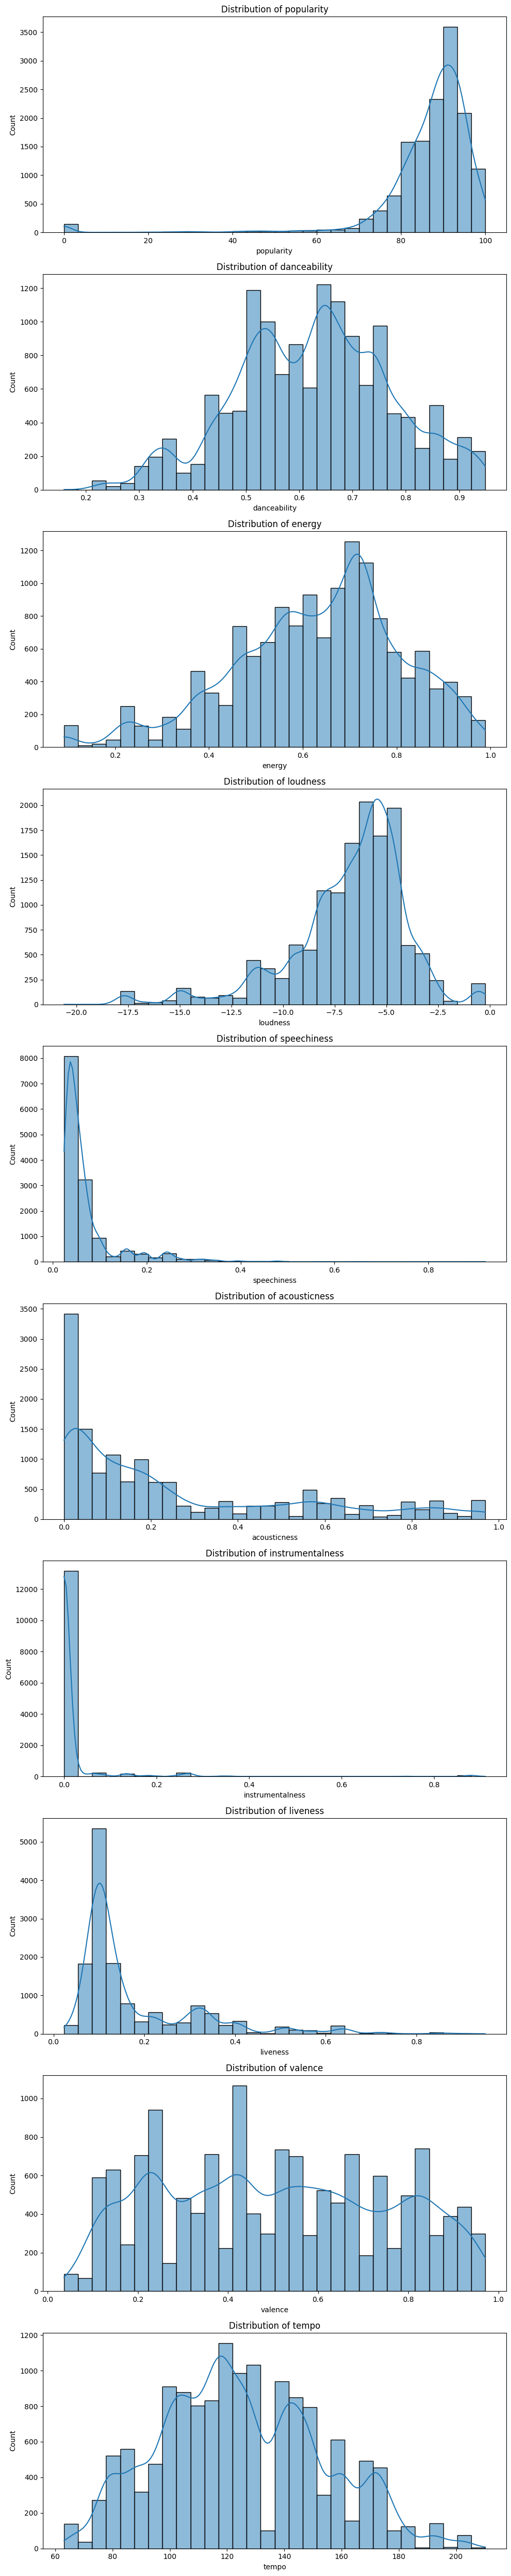

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plot distributions
fig, axs = plt.subplots(len(numerical_columns), 1, figsize=(10, 50))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-6-73ca7e7f1fb6>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])


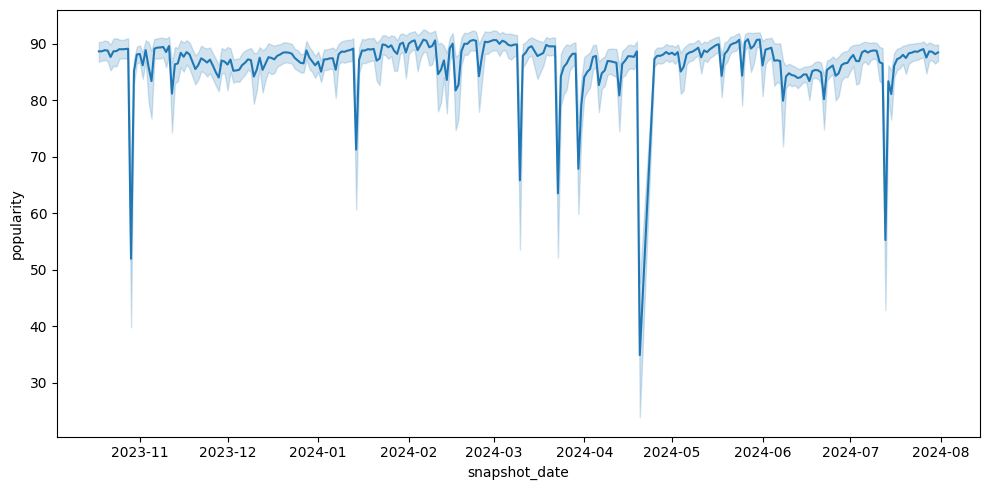

In [ ]:
# Convert 'snapshot_date' column to datetime format
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])

# Plot trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='snapshot_date', y='popularity')
axs[0].set_title('Trend of Popularity Over Time')
plt.tight_layout()
plt.show()

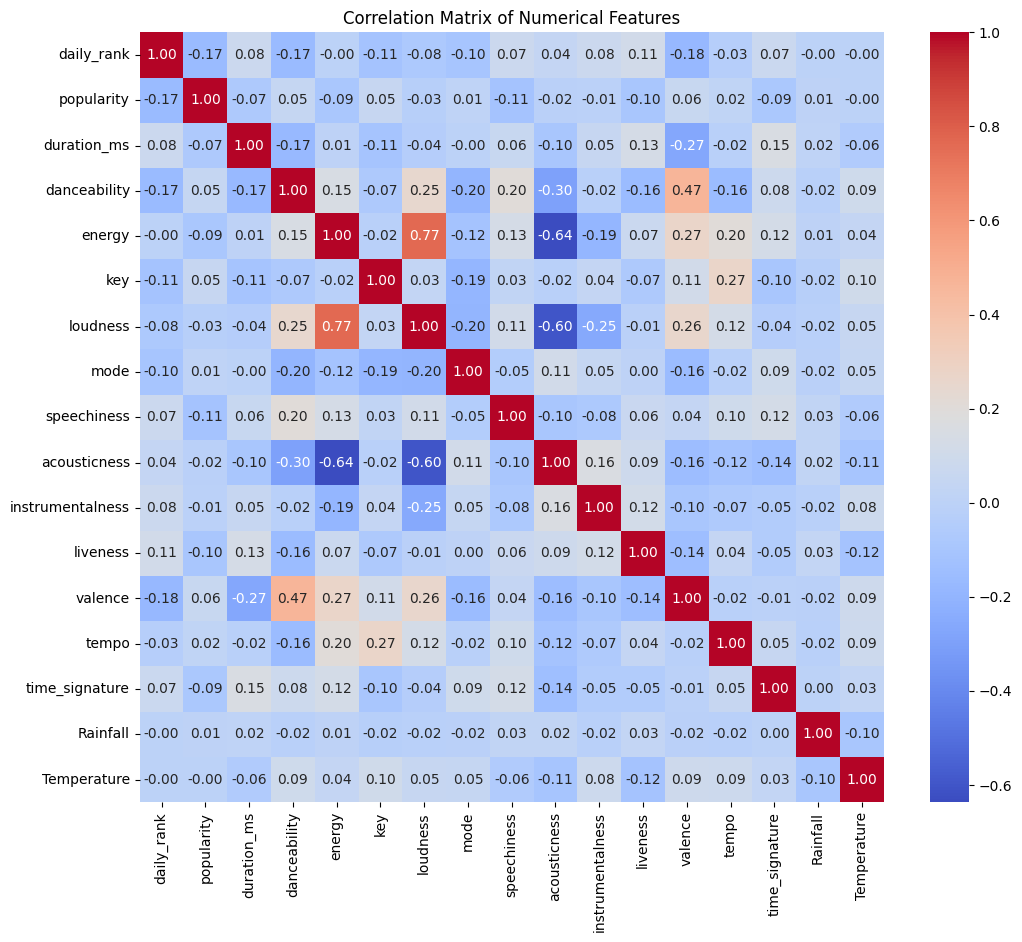

In [ ]:
# Columns to include in the correlation matrix
correlation_features = ['daily_rank','popularity', 'duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature', 'Rainfall', 'Temperature']

# Correlation matrix
correlation_matrix = data[correlation_features].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

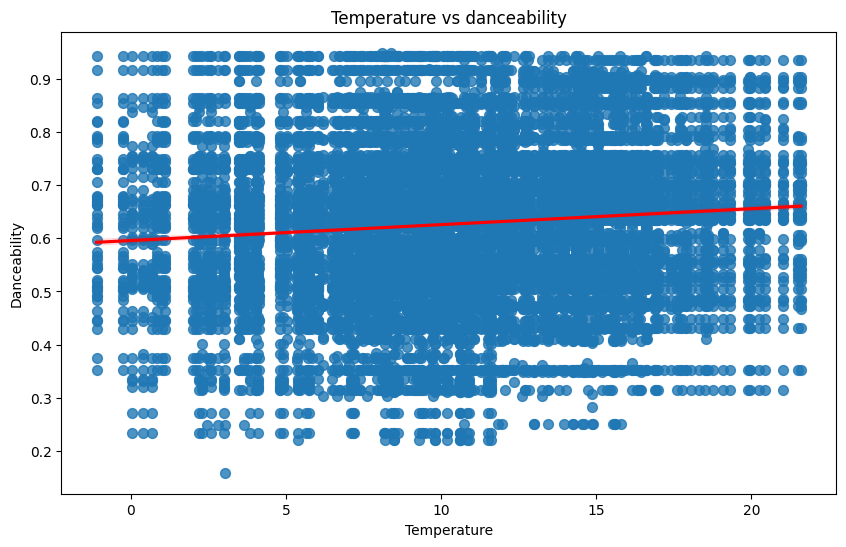

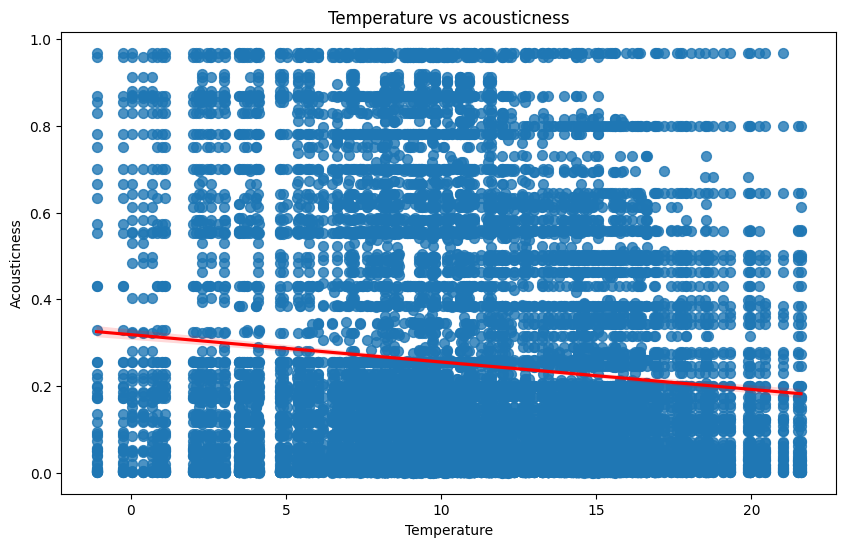

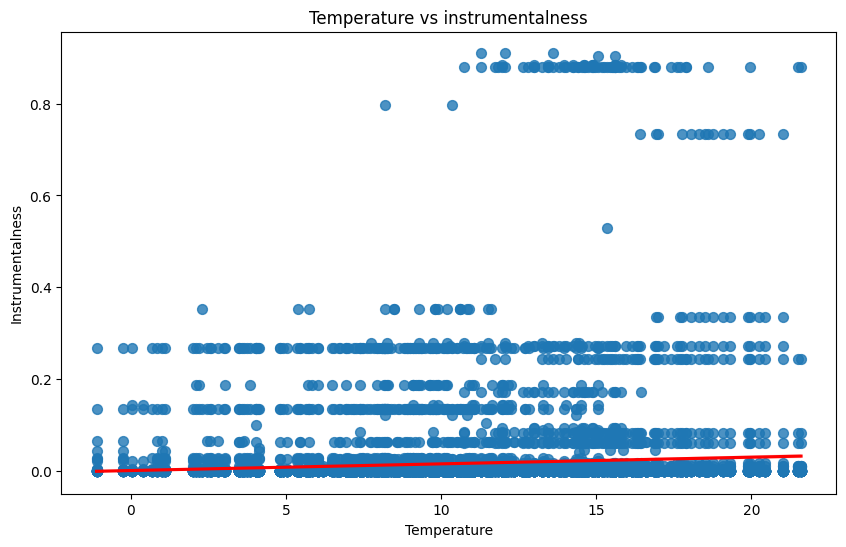

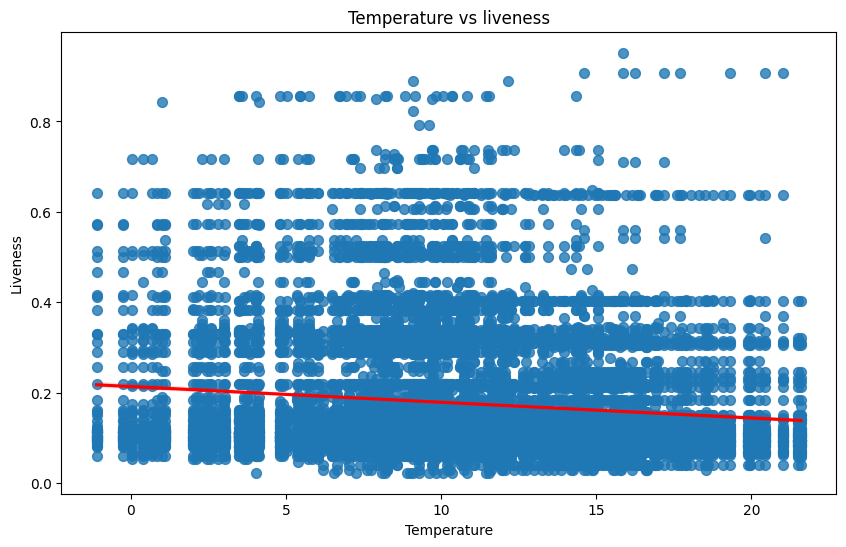

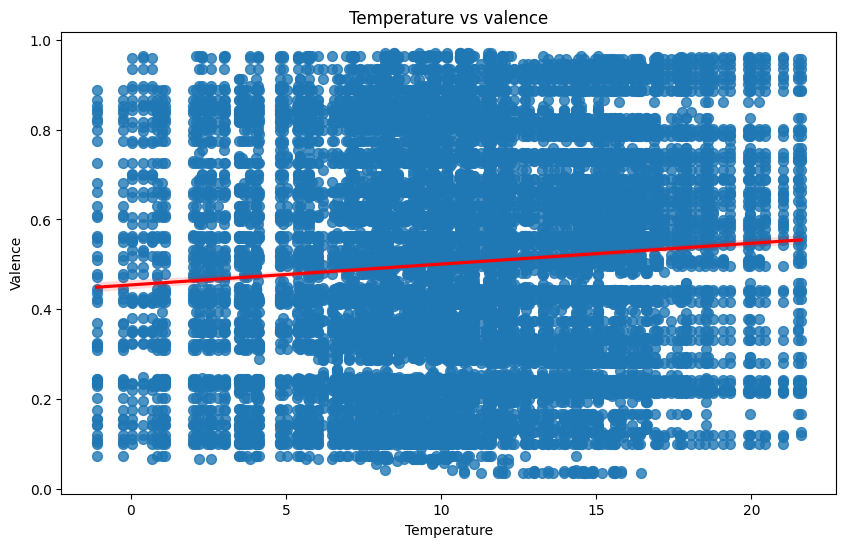

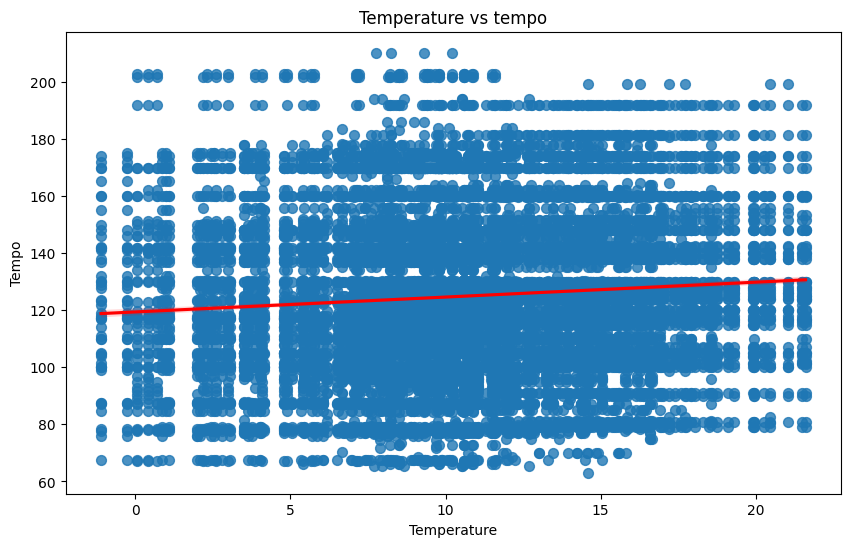

In [ ]:
#Regression plots to study relationship between temperature and audio features.
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='danceability', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs danceability')
plt.xlabel('Temperature')
plt.ylabel('Danceability')
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='acousticness', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs acousticness')
plt.xlabel('Temperature')
plt.ylabel('Acousticness')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='instrumentalness', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs instrumentalness')
plt.xlabel('Temperature')
plt.ylabel('Instrumentalness')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='liveness', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs liveness')
plt.xlabel('Temperature')
plt.ylabel('Liveness')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='valence', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs valence')
plt.xlabel('Temperature')
plt.ylabel('Valence')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature', y='tempo', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Temperature vs tempo')
plt.xlabel('Temperature')
plt.ylabel('Tempo')
plt.show()

In [ ]:
# Top 10 artists by count
top_artists = data['artists'].value_counts().head(10)
print(top_artists)


artists
Taylor Swift                    1145
Billie Eilish                    490
Dua Lipa                         336
Tate McRae                       335
Ariana Grande                    333
Olivia Rodrigo                   331
Sabrina Carpenter                327
Benson Boone                     305
Noah Kahan                       281
cassÃ¶, RAYE, D-Block Europe     258
Name: count, dtype: int64


Load the secondary datasets to study them

In [ ]:
# Load the secondary datasets
monthly_weather = pd.read_excel('/content/Monthly weather data.xlsx')
song_details = pd.read_excel('/content/Song Details new.xlsx')

# Display the first few rows of each dataset to understand their structure
print(monthly_weather.head())
print(song_details.head())

# Display the info and summary statistics of the datasets
print(monthly_weather.info())
print(monthly_weather.describe())

print(song_details.info())
print(song_details.describe())

# Check for missing values in the datasets
print(monthly_weather.isnull().sum())
print(song_details.isnull().sum())


     Month  Max_temp  Min_temp  Mean_temp  Sunshine  Rainfall
0  2024-07      19.0      10.6       14.8     153.7      82.4
1  2024-06      17.3       8.6       12.9     178.8      55.4
2  2024-05      17.2       9.0       13.1     159.3      82.5
3  2024-04      12.0       4.6        8.3     122.9     111.4
4  2024-03      10.0       3.5        6.7      95.2     107.8
                   name            artists  duration_ms  danceability  energy  \
0    BIRDS OF A FEATHER      Billie Eilish       210373         0.747   0.507   
1              Espresso  Sabrina Carpenter       175459         0.701   0.760   
2      Good Luck, Babe!      Chappell Roan       218423         0.700   0.582   
3  Please Please Please  Sabrina Carpenter       186365         0.669   0.586   
4    A Bar Song (Tipsy)          Shaboozey       171291         0.722   0.706   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    2   -10.171     1       0.0358        0.2000          0

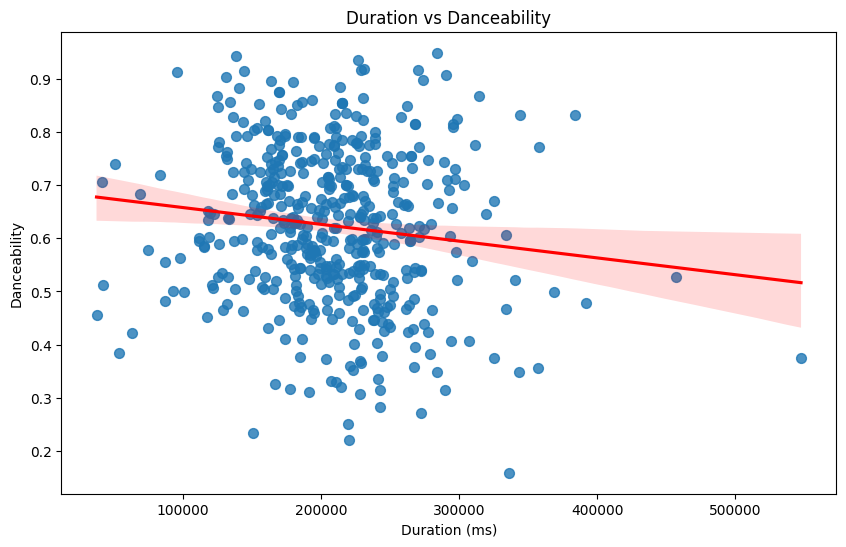

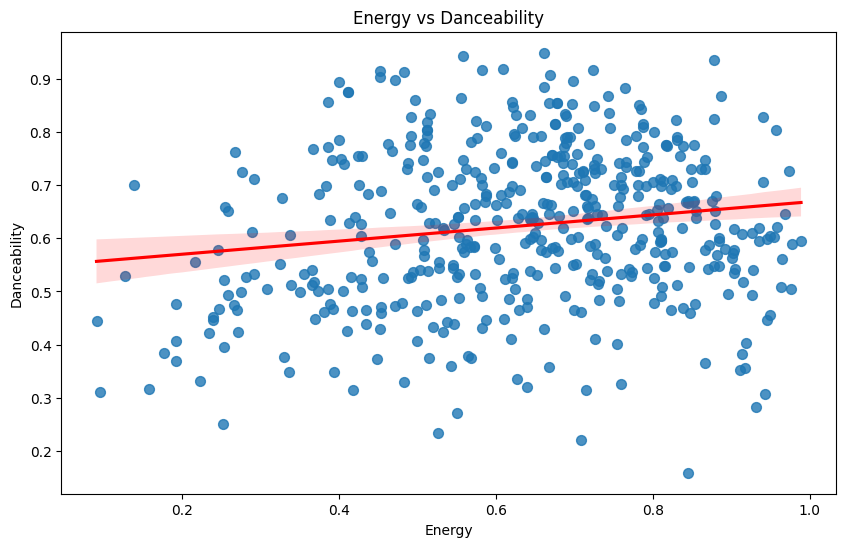

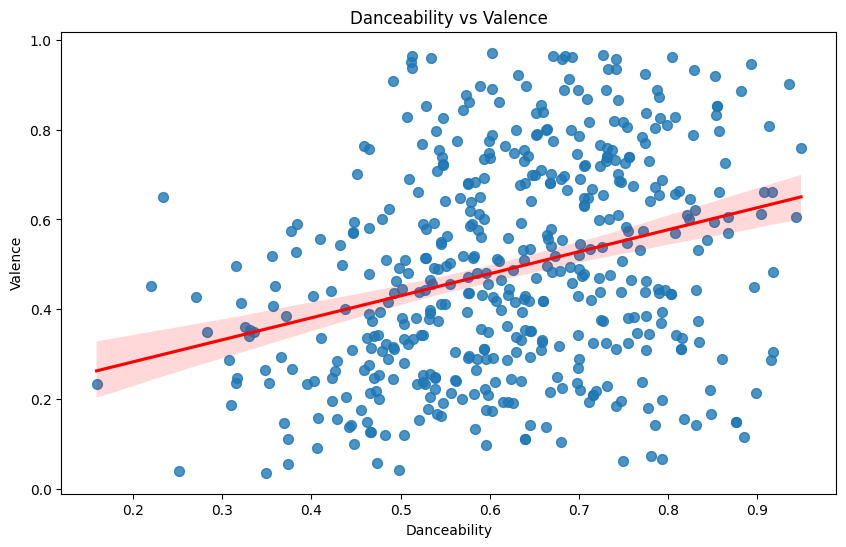

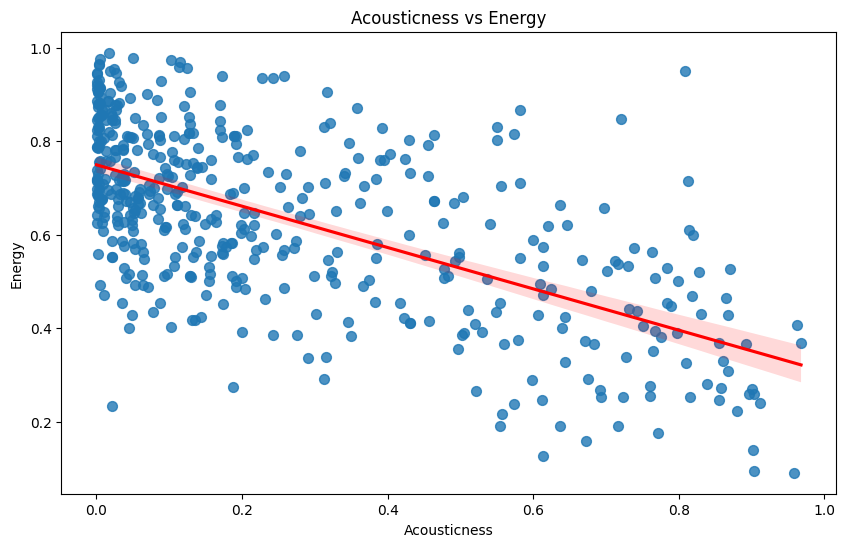

In [ ]:

# Plot Duration vs Danceability with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=song_details, x='duration_ms', y='danceability', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Duration vs Danceability')
plt.xlabel('Duration (ms)')
plt.ylabel('Danceability')
plt.show()

# Plot Energy vs Danceability with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=song_details, x='energy', y='danceability', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

# Plot Danceability vs Valence with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=song_details, x='danceability', y='valence', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()

# Plot Acousticness vs Energy with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=song_details, x='acousticness', y='energy', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Acousticness vs Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

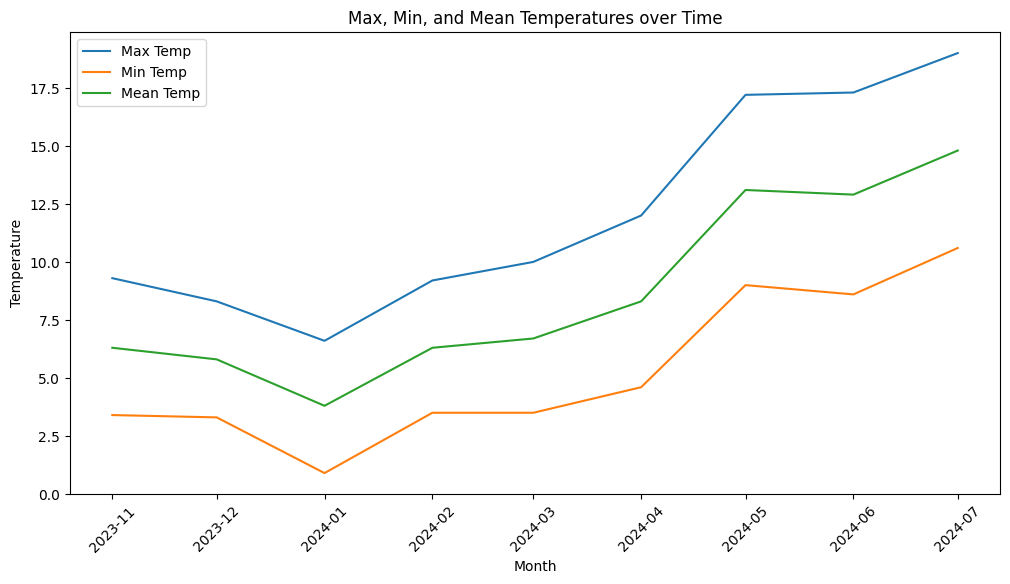

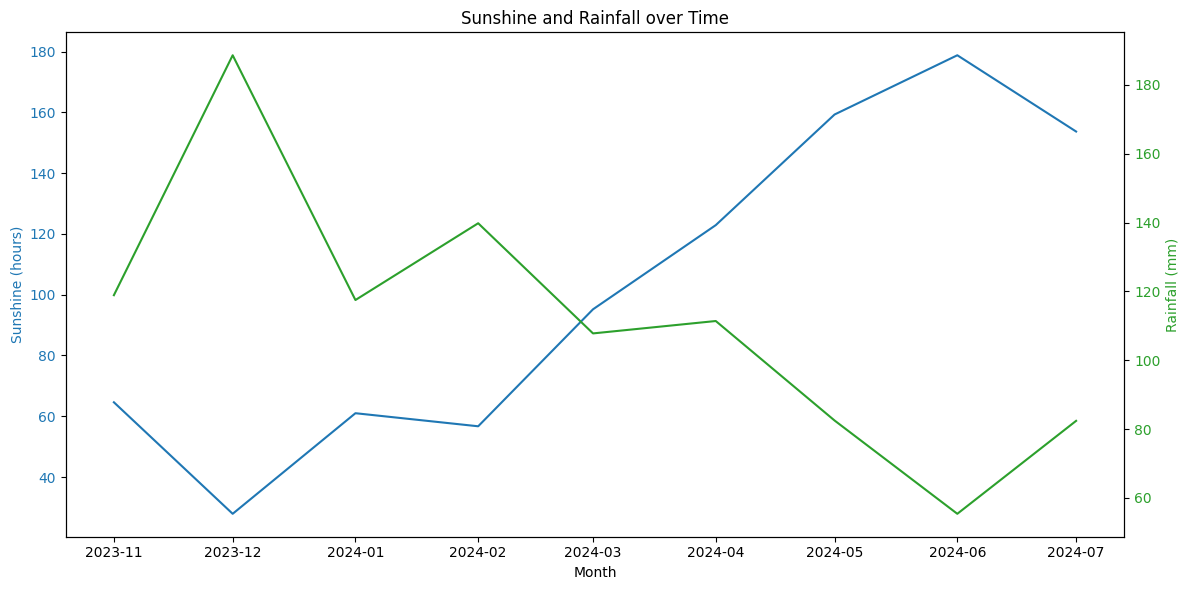

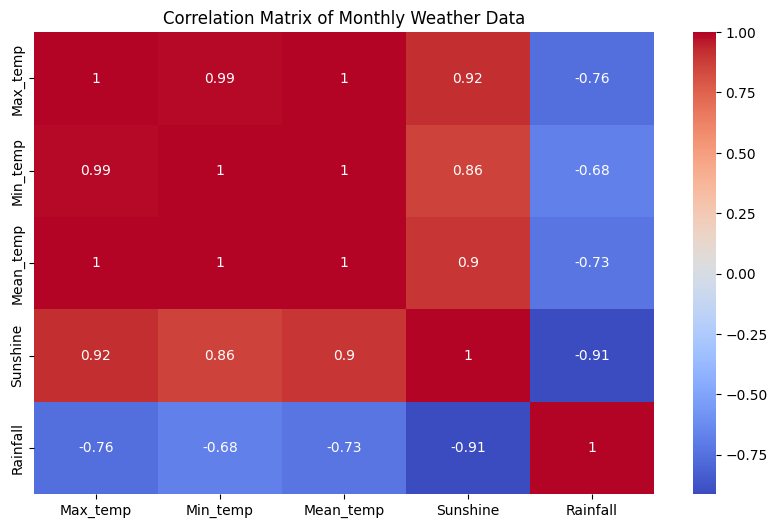

In [ ]:
# Monthly Weather Dataset Analysis
monthly_weather['Month'] = pd.to_datetime(monthly_weather['Month'])
monthly_weather = monthly_weather.sort_values('Month')

# Plot Max, Min, and Mean Temperatures over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_weather['Month'], monthly_weather['Max_temp'], label='Max Temp')
plt.plot(monthly_weather['Month'], monthly_weather['Min_temp'], label='Min Temp')
plt.plot(monthly_weather['Month'], monthly_weather['Mean_temp'], label='Mean Temp')
plt.title('Max, Min, and Mean Temperatures over Time')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Plot Sunshine and Rainfall over Time
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Sunshine (hours)', color=color)
ax1.plot(monthly_weather['Month'], monthly_weather['Sunshine'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Rainfall (mm)', color=color)
ax2.plot(monthly_weather['Month'], monthly_weather['Rainfall'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sunshine and Rainfall over Time')
fig.tight_layout()
plt.show()

# Plot Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_weather.drop(columns=['Month']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Weather Data')
plt.show()

## **Prediction Models:**


Now let's predict the Spotify Top 50 songs using 4 different models on 3 feature sets - audio and weather, only weather and only audio.

### A) Based on Audio and Weather Features

### 1. Facebook Prophet

In [ ]:
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Convert 'snapshot_date' column to datetime format
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'], format='%d-%m-%Y')

# Combine 'name' and 'artists' to create a song id
data['song_id'] = data['name'] + ' - ' + data['artists']

# Define a forecast horizon
forecast_horizon = 10

# Prepare a dictionary to store forecasts for each song
song_forecasts = {}
evaluation_metrics = {}

# Function to calculate MAPE
def calculate_mape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Function to process each song with train-test split
def process_song_with_split(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio and weather features
    df = song_data[['duration_ms', 'danceability', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Reset index to make 'snapshot_date' a column
    df.reset_index(inplace=True)
    df.rename(columns={'snapshot_date': 'ds', 'daily_rank': 'y'}, inplace=True)

    # Add audio and weather regressors to Prophet model
    model = Prophet()
    regressors = ['duration_ms', 'danceability', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'Rainfall', 'Temperature']

    for reg in regressors:
        model.add_regressor(reg)

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    # Train the model on the training set
    model.fit(train_df)

    # Predict on the test set to evaluate performance
    test_forecast = model.predict(test_df[['ds'] + regressors])
    test_forecast_values = test_forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    test_forecast_values = test_forecast_values.clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['y'], test_forecast_values)
    test_mse = mean_squared_error(test_df['y'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['y'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df['ds'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)
    future = pd.DataFrame({'ds': future_dates})

    # Copy the latest values of features for future periods
    for reg in regressors:
        future[reg] = df[reg].iloc[-1]

    forecast = model.predict(future)
    forecast_values = forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    forecast_values = forecast_values.clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_split(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Prophet Model: {overall_accuracy:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uc83qdmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9oxf262g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14887', 'data', 'file=/tmp/tmpe3w281pv/uc83qdmc.json', 'init=/tmp/tmpe3w281pv/9oxf262g.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg0kxczxc/prophet_model-20240908233254.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.7333333333333333
Test MSE: 0.8666666666666667
Test RMSE: 0.9309493362512627
Test MAPE: 43.333333333333336
Accuracy (%): 56.666666666666664
----------------------------------------


23:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kzdk9j_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/weaeyyie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74279', 'data', 'file=/tmp/tmpe3w281pv/kzdk9j_m.json', 'init=/tmp/tmpe3w281pv/weaeyyie.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldlhxd86z/prophet_model-20240908233255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.7272727272727273
Test MSE: 1.0
Test RMSE: 1.0
Test MAPE: 68.18181818181817
Accuracy (%): 31.818181818181827
----------------------------------------


23:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ezpkajwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l0lybe0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43831', 'data', 'file=/tmp/tmpe3w281pv/ezpkajwg.json', 'init=/tmp/tmpe3w281pv/l0lybe0q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljsv3ll5n/prophet_model-20240908233256.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.5454545454545454
Test MSE: 6.909090909090909
Test RMSE: 2.6285149626910838
Test MAPE: 63.84199134199133
Accuracy (%): 36.15800865800867
----------------------------------------


23:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6p3k_igs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bs_kzprg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63378', 'data', 'file=/tmp/tmpe3w281pv/6p3k_igs.json', 'init=/tmp/tmpe3w281pv/bs_kzprg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8mybd7fp/prophet_model-20240908233256.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.9090909090909091
Test MSE: 1.6363636363636365
Test RMSE: 1.2792042981336627
Test MAPE: 24.24242424242424
Accuracy (%): 75.75757575757576
----------------------------------------


23:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/imh37ndh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pl5wsmss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67340', 'data', 'file=/tmp/tmpe3w281pv/imh37ndh.json', 'init=/tmp/tmpe3w281pv/pl5wsmss.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model041h_m_c/prophet_model-20240908233257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:32:57 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 2.5238095238095237
Test MSE: 9.857142857142858
Test RMSE: 3.1396087108337016
Test MAPE: 43.12169312169313
Accuracy (%): 56.87830687830687
----------------------------------------


23:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/93k_6d89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rfquajge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20138', 'data', 'file=/tmp/tmpe3w281pv/93k_6d89.json', 'init=/tmp/tmpe3w281pv/rfquajge.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltpjkaurs/prophet_model-20240908233258.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 1.3703703703703705
Test MSE: 3.2962962962962963
Test RMSE: 1.8155705153742436
Test MAPE: 20.129870129870127
Accuracy (%): 79.87012987012987
----------------------------------------


23:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/v3cgmz3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oidns_y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82813', 'data', 'file=/tmp/tmpe3w281pv/v3cgmz3y.json', 'init=/tmp/tmpe3w281pv/oidns_y9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwnsevv_8/prophet_model-20240908233323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:33:23 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.7058823529411764
Test MSE: 3.823529411764706
Test RMSE: 1.9553847221876073
Test MAPE: 22.198879551820728
Accuracy (%): 77.80112044817928
----------------------------------------


23:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ufk0r_lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xu31ct3f.json


Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 4.564102564102564
Test MSE: 25.128205128205128
Test RMSE: 5.01280411827603
Test MAPE: 57.926332926332925
Accuracy (%): 42.073667073667075
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17195', 'data', 'file=/tmp/tmpe3w281pv/ufk0r_lz.json', 'init=/tmp/tmpe3w281pv/xu31ct3f.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6thjs5hz/prophet_model-20240908233356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rz8n1qg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ajjd3524.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 2.0588235294117645
Test MSE: 6.529411764705882
Test RMSE: 2.5552713681145263
Test MAPE: 21.011149557862364
Accuracy (%): 78.98885044213763
----------------------------------------


23:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lz62z60g.json


Evaluation Metrics for Austin (Boots Stop Workin') - Dasha:
Test MAE: 1.5384615384615385
Test MSE: 3.8461538461538463
Test RMSE: 1.9611613513818404
Test MAPE: 14.927380311995694
Accuracy (%): 85.07261968800431
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lpxahvcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45089', 'data', 'file=/tmp/tmpe3w281pv/lz62z60g.json', 'init=/tmp/tmpe3w281pv/lpxahvcm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelblprcnh9/prophet_model-20240908233358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:33:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:33:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/t1t9907v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yl6o5x7l.json
DE

Evaluation Metrics for Stick Season - Noah Kahan:
Test MAE: 2.310344827586207
Test MSE: 8.413793103448276
Test RMSE: 2.900653909629392
Test MAPE: 16.976101745940124
Accuracy (%): 83.02389825405987
----------------------------------------


23:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5lq2z23t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g12_sqrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61437', 'data', 'file=/tmp/tmpe3w281pv/5lq2z23t.json', 'init=/tmp/tmpe3w281pv/g12_sqrh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model72iszti0/prophet_model-20240908233420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:20 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Not Like Us - Kendrick Lamar:
Test MAE: 7.055555555555555
Test MSE: 53.5
Test RMSE: 7.314369419163897
Test MAPE: 63.7100862100862
Accuracy (%): 36.2899137899138
----------------------------------------


23:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qm3df9qr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ntjr34uu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87769', 'data', 'file=/tmp/tmpe3w281pv/qm3df9qr.json', 'init=/tmp/tmpe3w281pv/ntjr34uu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrar3hx3_/prophet_model-20240908233421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Lose Control - Teddy Swims:
Test MAE: 4.5813953488372094
Test MSE: 28.069767441860463
Test RMSE: 5.298090924272673
Test MAPE: 32.12256735512549
Accuracy (%): 67.87743264487452
----------------------------------------


23:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_kry0coc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qfx1lbtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9579', 'data', 'file=/tmp/tmpe3w281pv/_kry0coc.json', 'init=/tmp/tmpe3w281pv/qfx1lbtf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb5ihyy64/prophet_model-20240908233422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose:
Test MAE: 7.0
Test MSE: 62.75
Test RMSE: 7.92148975887743
Test MAPE: 41.29645715123657
Accuracy (%): 58.70354284876343
----------------------------------------


23:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r8eylv_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1zaxeqru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25727', 'data', 'file=/tmp/tmpe3w281pv/r8eylv_j.json', 'init=/tmp/tmpe3w281pv/1zaxeqru.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltp4q92cg/prophet_model-20240908233422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Houdini - Eminem:
Test MAE: 4.0
Test MSE: 18.615384615384617
Test RMSE: 4.314554973040049
Test MAPE: 33.59081089850321
Accuracy (%): 66.40918910149679
----------------------------------------


23:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2cmajoig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5bw_vxl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71640', 'data', 'file=/tmp/tmpe3w281pv/2cmajoig.json', 'init=/tmp/tmpe3w281pv/5bw_vxl1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbn3epnt6/prophet_model-20240908233423.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for 360 - Charli xcx:
Test MAE: 13.0
Test MSE: 184.27272727272728
Test RMSE: 13.574709104534332
Test MAPE: 74.60312192264064
Accuracy (%): 25.39687807735936
----------------------------------------


23:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pyfb0oe_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xo9duccb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90673', 'data', 'file=/tmp/tmpe3w281pv/pyfb0oe_.json', 'init=/tmp/tmpe3w281pv/xo9duccb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfo3cbxto/prophet_model-20240908233424.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 1.3333333333333333
Test MSE: 4.222222222222222
Test RMSE: 2.0548046676563256
Test MAPE: 7.437220502235981
Accuracy (%): 92.56277949776401
----------------------------------------


23:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b1imimh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iprq0rgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27603', 'data', 'file=/tmp/tmpe3w281pv/b1imimh5.json', 'init=/tmp/tmpe3w281pv/iprq0rgu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljmudidrd/prophet_model-20240908233424.csv', 'method=optimiz

Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 3.0
Test MSE: 10.777777777777779
Test RMSE: 3.2829526005987018
Test MAPE: 14.977479931713342
Accuracy (%): 85.02252006828665
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
23:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n8w3s931.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5fgcm5pn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14473', 'data', 'file=/tmp/tmpe3w281pv/n8w3s931.json', 'init=/tmp/tmpe3w281pv/5fgcm5pn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1a3zepv8/prophet_model-20240908233425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processin

Evaluation Metrics for Apple - Charli xcx:
Test MAE: 7.666666666666667
Test MSE: 65.66666666666667
Test RMSE: 8.103497187428813
Test MAPE: 35.62753036437247
Accuracy (%): 64.37246963562754
----------------------------------------


23:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:34:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6vdrhmah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6hzh5m2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89649', 'data', 'file=/tmp/tmpe3w281pv/6vdrhmah.json', 'init=/tmp/tmpe3w281pv/6hzh5m2k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9_yw748d/prophet_model-20240908233425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 5.8076923076923075
Test MSE: 43.96153846153846
Test RMSE: 6.630349799334757
Test MAPE: 29.411041376036884
Accuracy (%): 70.58895862396312
----------------------------------------


INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dzd4s69d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jbz15zid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59752', 'data', 'file=/tmp/tmpe3w281pv/dzd4s69d.json', 'init=/tmp/tmpe3w281pv/jbz15zid.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely60vygn_/prophet_model-20240908233425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_

Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 2.6666666666666665
Test MSE: 8.0
Test RMSE: 2.8284271247461903
Test MAPE: 11.505050505050505
Accuracy (%): 88.4949494949495
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/szp8xvj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42038', 'data', 'file=/tmp/tmpe3w281pv/rd9o827n.json', 'init=/tmp/tmpe3w281pv/szp8xvj7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleiy_3kxy/prophet_model-20240908233426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9errte2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 5.75
Test MSE: 39.25
Test RMSE: 6.264982043070834
Test MAPE: 25.82815734989648
Accuracy (%): 74.17184265010351
----------------------------------------


23:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/acvo8g86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pb2ita8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6829', 'data', 'file=/tmp/tmpe3w281pv/acvo8g86.json', 'init=/tmp/tmpe3w281pv/pb2ita8l.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluxtandlv/prophet_model-20240908233427.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.3846153846153846
Test MSE: 20.615384615384617
Test RMSE: 4.540416788730371
Test MAPE: 13.507333515122635
Accuracy (%): 86.49266648487736
----------------------------------------


23:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pqmvgrzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/x5oghqr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51189', 'data', 'file=/tmp/tmpe3w281pv/pqmvgrzw.json', 'init=/tmp/tmpe3w281pv/x5oghqr2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellg5uwf0w/prophet_model-20240908233427.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 4.357142857142857
Test MSE: 21.928571428571427
Test RMSE: 4.6827952580239325
Test MAPE: 25.76319195939939
Accuracy (%): 74.23680804060061
----------------------------------------


23:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qdoo30fb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yg06uy07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59505', 'data', 'file=/tmp/tmpe3w281pv/qdoo30fb.json', 'init=/tmp/tmpe3w281pv/yg06uy07.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnc_lxewg/prophet_model-20240908233428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:28 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 8.105263157894736
Test MSE: 83.15789473684211
Test RMSE: 9.119095061289915
Test MAPE: 43.47736461352022
Accuracy (%): 56.52263538647978
----------------------------------------


23:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/upc4bg3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eu_wg5n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54547', 'data', 'file=/tmp/tmpe3w281pv/upc4bg3s.json', 'init=/tmp/tmpe3w281pv/eu_wg5n6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfcq0bslw/prophet_model-20240908233430.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 3.324324324324324
Test MSE: 17.91891891891892
Test RMSE: 4.233074405077109
Test MAPE: 12.286479446864428
Accuracy (%): 87.71352055313557
----------------------------------------


23:34:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0ga9cpt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kla15dh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7389', 'data', 'file=/tmp/tmpe3w281pv/0ga9cpt7.json', 'init=/tmp/tmpe3w281pv/kla15dh0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model11kxaogx/prophet_model-20240908233444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:44 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for LUNCH - Billie Eilish:
Test MAE: 2.6
Test MSE: 12.733333333333333
Test RMSE: 3.5683796509527026
Test MAPE: 12.020579725616052
Accuracy (%): 87.97942027438395
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xg4ofa0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35171', 'data', 'file=/tmp/tmpe3w281pv/lovref00.json', 'init=/tmp/tmpe3w281pv/xg4ofa0e.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model3imzbo73/prophet_model-20240908233444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m9k4dffe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Cruel Summer - Taylor Swift:
Test MAE: 9.241379310344827
Test MSE: 103.20689655172414
Test RMSE: 10.159079513013182
Test MAPE: 43.05567673093893
Accuracy (%): 56.94432326906107
----------------------------------------


23:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/as7oq3ww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1yqbm88m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44276', 'data', 'file=/tmp/tmpe3w281pv/as7oq3ww.json', 'init=/tmp/tmpe3w281pv/1yqbm88m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfqt7_es4/prophet_model-20240908233446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:46 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Mr. Brightside - The Killers:
Test MAE: 9.689655172413794
Test MSE: 103.93103448275862
Test RMSE: 10.194657153762387
Test MAPE: 34.88042876095956
Accuracy (%): 65.11957123904044
----------------------------------------


23:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wxrj0884.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8yevuvh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56216', 'data', 'file=/tmp/tmpe3w281pv/wxrj0884.json', 'init=/tmp/tmpe3w281pv/8yevuvh6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model68s7in3y/prophet_model-20240908233449.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Iris - The Goo Goo Dolls:
Test MAE: 5.103174603174603
Test MSE: 54.647819846232544
Test RMSE: 7.392416373976276
Test MAPE: 13.430108969931432
Accuracy (%): 86.56989103006856
----------------------------------------


23:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c5uxqm06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4cxmqgn2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for NIGHTS LIKE THIS - The Kid LAROI:
Test MAE: 3.75
Test MSE: 18.0
Test RMSE: 4.242640687119285
Test MAPE: 11.500946969696969
Accuracy (%): 88.49905303030303
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20516', 'data', 'file=/tmp/tmpe3w281pv/c5uxqm06.json', 'init=/tmp/tmpe3w281pv/4cxmqgn2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbqlhlnxv/prophet_model-20240908233450.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7qbo2muz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y2rlrv69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/lo

Evaluation Metrics for Fortnight (feat. Post Malone) - Taylor Swift, Post Malone:
Test MAE: 8.80952380952381
Test MSE: 99.0
Test RMSE: 9.9498743710662
Test MAPE: 29.281505979007385
Accuracy (%): 70.71849402099261
----------------------------------------


23:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ah4wskz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zyywqfti.json


Evaluation Metrics for I Don't Wanna Wait - David Guetta, OneRepublic:
Test MAE: 9.066666666666666
Test MSE: 94.66666666666667
Test RMSE: 9.72967967955095
Test MAPE: 26.287324927210147
Accuracy (%): 73.71267507278985
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18990', 'data', 'file=/tmp/tmpe3w281pv/ah4wskz9.json', 'init=/tmp/tmpe3w281pv/zyywqfti.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellwlb4va_/prophet_model-20240908233452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations

Evaluation Metrics for misses - Dominic Fike:
Test MAE: 9.0
Test MSE: 105.0
Test RMSE: 10.246950765959598
Test MAPE: 21.524886550364826
Accuracy (%): 78.47511344963517
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qrv_g3z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zhd8xgyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78096', 'data', 'file=/tmp/tmpe3w281pv/qrv_g3z9.json', 'init=/tmp/tmpe3w281pv/zhd8xgyj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqycwe99a/prophet_model-20240908233453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:34:53 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Angel Of My Dreams - JADE:
Test MAE: 6.333333333333333
Test MSE: 51.666666666666664
Test RMSE: 7.187952884282608
Test MAPE: 17.06164206164206
Accuracy (%): 82.93835793835794
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3xvnsd0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28165', 'data', 'file=/tmp/tmpe3w281pv/4z1ebn3v.json', 'init=/tmp/tmpe3w281pv/3xvnsd0l.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelaarm_tzt/prophet_model-20240908233453.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:35:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bhvq7vlx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.571428571428571
Test MSE: 102.21428571428571
Test RMSE: 10.110108096073242
Test MAPE: 22.71476348671134
Accuracy (%): 77.28523651328865
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37250', 'data', 'file=/tmp/tmpe3w281pv/bhvq7vlx.json', 'init=/tmp/tmpe3w281pv/de1un1pb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvts2eeoj/prophet_model-20240908233557.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:35:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9uc4cwj5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/

Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 3.2222222222222223
Test MSE: 15.222222222222221
Test RMSE: 3.9015666369065416
Test MAPE: 7.762500724616735
Accuracy (%): 92.23749927538327
----------------------------------------


23:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/45j5u3st.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lbg3td7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85293', 'data', 'file=/tmp/tmpe3w281pv/45j5u3st.json', 'init=/tmp/tmpe3w281pv/lbg3td7b.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1betk7g5/prophet_model-20240908233559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:35:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 4.6
Test MSE: 29.4
Test RMSE: 5.422176684690384
Test MAPE: 11.734347685567199
Accuracy (%): 88.2656523144328
----------------------------------------


23:35:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:35:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/23tqly4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d278v9uq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42116', 'data', 'file=/tmp/tmpe3w281pv/23tqly4b.json', 'init=/tmp/tmpe3w281pv/d278v9uq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelkzo6l_q9/prophet_model-20240908233559.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:35:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 6.148148148148148
Test MSE: 52.592592592592595
Test RMSE: 7.252075054258098
Test MAPE: 18.138714764348173
Accuracy (%): 81.86128523565182
----------------------------------------


23:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hzdrxtnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aw9s_kn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20579', 'data', 'file=/tmp/tmpe3w281pv/hzdrxtnn.json', 'init=/tmp/tmpe3w281pv/aw9s_kn8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model26sn8xr8/prophet_model-20240908233619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:19 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 8.285714285714286
Test MSE: 97.33333333333333
Test RMSE: 9.865765724632494
Test MAPE: 22.665023750451514
Accuracy (%): 77.33497624954849
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s70468hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lbblyom4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59202', 'data', 'file=/tmp/tmpe3w281pv/s70468hr.json', 'init=/tmp/tmpe3w281pv/lbblyom4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg_v2g7rc/prophet_model-20240908233619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:36:19 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 7.976744186046512
Test MSE: 82.92183462532299
Test RMSE: 9.10614268641355
Test MAPE: 17.578392494880347
Accuracy (%): 82.42160750511965
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3j8noxw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43519', 'data', 'file=/tmp/tmpe3w281pv/g5f0m5_m.json', 'init=/tmp/tmpe3w281pv/3j8noxw6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6dkj2rn3/prophet_model-20240908233619.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kjh4llf0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Viva La Vida - Coldplay:
Test MAE: 10.516666666666667
Test MSE: 130.375
Test RMSE: 11.418187246669236
Test MAPE: 30.55496807088992
Accuracy (%): 69.44503192911009
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73760', 'data', 'file=/tmp/tmpe3w281pv/7_02eg8d.json', 'init=/tmp/tmpe3w281pv/3r_g7ovh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_umn6ya4/prophet_model-20240908233620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2o9yja97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bvzq1bo2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_th

Evaluation Metrics for End of Beginning - Djo:
Test MAE: 3.712121212121212
Test MSE: 21.15530303030303
Test RMSE: 4.599489431480741
Test MAPE: 8.98650542696296
Accuracy (%): 91.01349457303704
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69016', 'data', 'file=/tmp/tmpe3w281pv/pt5f41e2.json', 'init=/tmp/tmpe3w281pv/eikwfenz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0qpo3776/prophet_model-20240908233621.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9cj7akr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zxy_6f4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/lo

Evaluation Metrics for Riptide - Vance Joy:
Test MAE: 7.344827586206897
Test MSE: 89.07758620689656
Test RMSE: 9.438092297010904
Test MAPE: 22.437831018827172
Accuracy (%): 77.56216898117283
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gliq5etx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10234', 'data', 'file=/tmp/tmpe3w281pv/1rca3wc0.json', 'init=/tmp/tmpe3w281pv/gliq5etx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7obwak7s/prophet_model-20240908233644.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:36:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kp4wrfq7.json


Evaluation Metrics for The Night We Met - Lord Huron:
Test MAE: 6.22257053291536
Test MSE: 68.52213949843261
Test RMSE: 8.277810066583589
Test MAPE: 16.678690399529525
Accuracy (%): 83.32130960047047
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rmbbafv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50532', 'data', 'file=/tmp/tmpe3w281pv/kp4wrfq7.json', 'init=/tmp/tmpe3w281pv/rmbbafv8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvqk_8xpw/prophet_model-20240908233652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:36:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zltj7je6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9yn9ggg0.json
DE

Evaluation Metrics for As It Was - Harry Styles:
Test MAE: 4.508620689655173
Test MSE: 31.176724137931036
Test RMSE: 5.583612104895095
Test MAPE: 11.76311484976716
Accuracy (%): 88.23688515023284
----------------------------------------


23:37:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ussbw54p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pqcukznp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67727', 'data', 'file=/tmp/tmpe3w281pv/ussbw54p.json', 'init=/tmp/tmpe3w281pv/pqcukznp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelttx9wxhv/prophet_model-20240908233719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Dreams - 2004 Remaster - Fleetwood Mac:
Test MAE: 2.626847290640394
Test MSE: 10.82807757376723
Test RMSE: 3.2906044389697207
Test MAPE: 5.824712396371159
Accuracy (%): 94.17528760362885
----------------------------------------


23:37:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas:
Test MAE: 4.875
Test MSE: 30.337962962962962
Test RMSE: 5.507990828148043
Test MAPE: 10.247725608716166
Accuracy (%): 89.75227439128383
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h47uwgzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/37kkjr6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96506', 'data', 'file=/tmp/tmpe3w281pv/h47uwgzw.json', 'init=/tmp/tmpe3w281pv/37kkjr6d.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvajn1_u4/prophet_model-20240908233720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:37:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l43pyy4a.json
DE

Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 1.3460925039872407
Test MSE: 1.8620932496530584
Test RMSE: 1.3645853764616775
Test MAPE: 2.769379167126268
Accuracy (%): 97.23062083287373
----------------------------------------


23:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f_94pazd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m2xv48cg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91769', 'data', 'file=/tmp/tmpe3w281pv/f_94pazd.json', 'init=/tmp/tmpe3w281pv/m2xv48cg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxuee63o5/prophet_model-20240908233722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:22 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for The Door - Teddy Swims:
Test MAE: 3.55625
Test MSE: 19.219140625
Test RMSE: 4.383964030988393
Test MAPE: 7.211347614623039
Accuracy (%): 92.78865238537696
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/py53mma9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31491', 'data', 'file=/tmp/tmpe3w281pv/ruih_ajg.json', 'init=/tmp/tmpe3w281pv/py53mma9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5p0_noa7/prophet_model-20240908233722.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 2.107142857142857
Test MSE: 7.175642479213908
Test RMSE: 2.678738971832438
Test MAPE: 4.5254194052408305
Accuracy (%): 95.47458059475917
----------------------------------------


23:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mvjbzdh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p4_k8ayb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88152', 'data', 'file=/tmp/tmpe3w281pv/mvjbzdh7.json', 'init=/tmp/tmpe3w281pv/p4_k8ayb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrrgrhdem/prophet_model-20240908233724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:24 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 2.0
Test MSE: 7.5
Test RMSE: 2.7386127875258306
Test MAPE: 4.678341719228979
Accuracy (%): 95.32165828077102
----------------------------------------


23:37:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wnqdzk8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dyj_qxar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9487', 'data', 'file=/tmp/tmpe3w281pv/wnqdzk8y.json', 'init=/tmp/tmpe3w281pv/dyj_qxar.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg9wvbm37/prophet_model-20240908233740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:40 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 3.056122448979592
Test MSE: 13.564058956916098
Test RMSE: 3.6829416173645892
Test MAPE: 7.074628325615692
Accuracy (%): 92.92537167438431
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j0htvl5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73853', 'data', 'file=/tmp/tmpe3w281pv/cb_sloyb.json', 'init=/tmp/tmpe3w281pv/j0htvl5o.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrfilibti/prophet_model-20240908233740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qehmruf4.json


Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 10.083333333333334
Test MSE: 156.9487433862434
Test RMSE: 12.527918557615363
Test MAPE: 30.098154113991516
Accuracy (%): 69.90184588600849
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kfgtrp9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68855', 'data', 'file=/tmp/tmpe3w281pv/qehmruf4.json', 'init=/tmp/tmpe3w281pv/kfgtrp9n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq6nsryiq/prophet_model-20240908233741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:37:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cghw21qg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fzykt3n3.json
DE

Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 10.767857142857142
Test MSE: 197.37824675324677
Test RMSE: 14.049136868621032
Test MAPE: 26.78988036536519
Accuracy (%): 73.21011963463481
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40279', 'data', 'file=/tmp/tmpe3w281pv/mnfsva94.json', 'init=/tmp/tmpe3w281pv/ypnpqbym.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9qbhq5d2/prophet_model-20240908233743.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdst

Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 1.3
Test MSE: 2.175
Test RMSE: 1.4747881203752624
Test MAPE: 2.6900991482210435
Accuracy (%): 97.30990085177896
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13899', 'data', 'file=/tmp/tmpe3w281pv/43oxp43s.json', 'init=/tmp/tmpe3w281pv/dwxymb9n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu50b762c/prophet_model-20240908233747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 1.5
Test MSE: 3.5
Test RMSE: 1.8708286933869707
Test MAPE: 3.701666373291087
Accuracy (%): 96.29833362670891
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/krj2d9a6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jva8yzh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14689', 'data', 'file=/tmp/tmpe3w281pv/krj2d9a6.json', 'init=/tmp/tmpe3w281pv/jva8yzh_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmhqbaz8k/prophet_model-20240908233748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 3.3846153846153846
Test MSE: 16.24615384615384
Test RMSE: 4.030651789246231
Test MAPE: 8.44176837751123
Accuracy (%): 91.55823162248876
----------------------------------------


23:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kufh600k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/604ncyce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45430', 'data', 'file=/tmp/tmpe3w281pv/kufh600k.json', 'init=/tmp/tmpe3w281pv/604ncyce.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1je0mgj7/prophet_model-20240908233754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 0.631578947368421
Test MSE: 1.0526315789473684
Test RMSE: 1.025978352085154
Test MAPE: 1.3227883538633818
Accuracy (%): 98.67721164613661
----------------------------------------


23:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zik96_kb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yf7opvqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95745', 'data', 'file=/tmp/tmpe3w281pv/zik96_kb.json', 'init=/tmp/tmpe3w281pv/yf7opvqn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltm79txiy/prophet_model-20240908233754.csv', 'method=optimiz

Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 0.6666666666666662
Test MSE: 0.48888888888888804
Test RMSE: 0.6992058987801004
Test MAPE: 1.3532022396996264
Accuracy (%): 98.64679776030037
----------------------------------------


23:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p6hbu51e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lb7ik22s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90483', 'data', 'file=/tmp/tmpe3w281pv/p6hbu51e.json', 'init=/tmp/tmpe3w281pv/lb7ik22s.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelou30nvfq/prophet_model-20240908233755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Yellow - Coldplay:
Test MAE: 5.0
Test MSE: 26.0
Test RMSE: 5.0990195135927845
Test MAPE: 11.363636363636363
Accuracy (%): 88.63636363636364
----------------------------------------


23:37:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qh5qs63r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cp71obfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9263', 'data', 'file=/tmp/tmpe3w281pv/qh5qs63r.json', 'init=/tmp/tmpe3w281pv/cp71obfz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluhti4pyr/prophet_model-20240908233757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:37:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:37:57 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.7895238095238102
Test MSE: 9.73655076845553
Test RMSE: 3.120344655395543
Test MAPE: 4.025910912140956
Accuracy (%): 95.97408908785904
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95306', 'data', 'file=/tmp/tmpe3w281pv/mdqig9d5.json', 'init=/tmp/tmpe3w281pv/1adge_tr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_kan58u2/prophet_model-20240908233757.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:37:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qjwqpp2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_oi97m18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/lo

Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.33853410740203194
Test MSE: 0.16974970561656225
Test RMSE: 0.4120069242337588
Test MAPE: 0.7600969861718787
Accuracy (%): 99.23990301382813
----------------------------------------


23:38:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o7wca3hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o00v1y5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89302', 'data', 'file=/tmp/tmpe3w281pv/o7wca3hk.json', 'init=/tmp/tmpe3w281pv/o00v1y5f.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model3by38gw3/prophet_model-20240908233810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:10 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 4.28125
Test MSE: 25.640625
Test RMSE: 5.0636572751322735
Test MAPE: 9.402992487912023
Accuracy (%): 90.59700751208797
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85181', 'data', 'file=/tmp/tmpe3w281pv/m46q3nvv.json', 'init=/tmp/tmpe3w281pv/qkqi8ljh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7cnu91f9/prophet_model-20240908233810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5cflpy6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ipztyi6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 3.798632218844985
Test MSE: 21.80609531046461
Test RMSE: 4.669699702386076
Test MAPE: 8.06334654583275
Accuracy (%): 91.93665345416724
----------------------------------------


23:38:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gg0ismzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u8zn648k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80469', 'data', 'file=/tmp/tmpe3w281pv/gg0ismzh.json', 'init=/tmp/tmpe3w281pv/u8zn648k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb86rmmu_/prophet_model-20240908233811.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 1.0242346938775508
Test MSE: 1.5020564348188241
Test RMSE: 1.2255841198460529
Test MAPE: 2.155701109975226
Accuracy (%): 97.84429889002477
----------------------------------------


23:38:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yhcsy73y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hsp5jenp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67012', 'data', 'file=/tmp/tmpe3w281pv/yhcsy73y.json', 'init=/tmp/tmpe3w281pv/hsp5jenp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_inm_rjv/prophet_model-20240908233812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Revisited - Mark Ronson, Amy Winehouse:
Test MAE: 6.177083333333334
Test MSE: 45.043402777777786
Test RMSE: 6.711438204869191
Test MAPE: 12.665471321258348
Accuracy (%): 87.33452867874165
----------------------------------------


23:38:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r5_tlsz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cw04jbsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62753', 'data', 'file=/tmp/tmpe3w281pv/r5_tlsz7.json', 'init=/tmp/tmpe3w281pv/cw04jbsg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj2svjnag/prophet_model-20240908233812.csv', 'method=optimiz

Evaluation Metrics for Whoâ€™s Afraid of Little Old Me? - Taylor Swift:
Test MAE: 8.0
Test MSE: 83.33333333333333
Test RMSE: 9.128709291752768
Test MAPE: 22.109396639780016
Accuracy (%): 77.89060336021998
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
23:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hkd4628x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rpowmkd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27013', 'data', 'file=/tmp/tmpe3w281pv/hkd4628x.json', 'init=/tmp/tmpe3w281pv/rpowmkd_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelkid2go4g/prophet_model-20240908233813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processi

Evaluation Metrics for Nonsense - Sabrina Carpenter:
Test MAE: 1.6666666666666667
Test MSE: 4.333333333333333
Test RMSE: 2.0816659994661326
Test MAPE: 3.4492753623188404
Accuracy (%): 96.55072463768116
----------------------------------------


23:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 9.214285714285714
Test MSE: 107.64285714285714
Test RMSE: 10.37510757259206
Test MAPE: 24.511205151302068
Accuracy (%): 75.48879484869794
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7abixz75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xytk7jl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91452', 'data', 'file=/tmp/tmpe3w281pv/7abixz75.json', 'init=/tmp/tmpe3w281pv/xytk7jl6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzkfth9vo/prophet_model-20240908233813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than

Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 4.037037037037037
Test MSE: 18.94708994708995
Test RMSE: 4.352825513053555
Test MAPE: 9.522414700040096
Accuracy (%): 90.4775852999599
----------------------------------------


23:38:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/60ojl8ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/257i394e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65221', 'data', 'file=/tmp/tmpe3w281pv/60ojl8ko.json', 'init=/tmp/tmpe3w281pv/257i394e.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8qb00eeq/prophet_model-20240908233822.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 7.0
Test MSE: 65.0
Test RMSE: 8.06225774829855
Test MAPE: 17.40224128242045
Accuracy (%): 82.59775871757955
----------------------------------------


23:38:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0khufdb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j_s5tbqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65056', 'data', 'file=/tmp/tmpe3w281pv/0khufdb4.json', 'init=/tmp/tmpe3w281pv/j_s5tbqj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb4cfpaf6/prophet_model-20240908233823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------


23:38:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7s8tzmer.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hjuudbde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38468', 'data', 'file=/tmp/tmpe3w281pv/7s8tzmer.json', 'init=/tmp/tmpe3w281pv/hjuudbde.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9t2v_g8n/prophet_model-20240908233843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:43 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 3.4285714285714284
Test MSE: 20.571428571428573
Test RMSE: 4.535573676110727
Test MAPE: 8.612989268655792
Accuracy (%): 91.3870107313442
----------------------------------------


23:38:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2faoe4tc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/verhlnq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35944', 'data', 'file=/tmp/tmpe3w281pv/2faoe4tc.json', 'init=/tmp/tmpe3w281pv/verhlnq_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model13gozqwn/prophet_model-20240908233844.csv', 'method=optimiz

Evaluation Metrics for greedy - Tate McRae:
Test MAE: 18.82
Test MSE: 394.1
Test RMSE: 19.85195204507607
Test MAPE: 50.821521676286544
Accuracy (%): 49.178478323713456
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z5h5lb95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wz4zcne9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54200', 'data', 'file=/tmp/tmpe3w281pv/z5h5lb95.json', 'init=/tmp/tmpe3w281pv/wz4zcne9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq4pyutl5/prophet_model-20240908233844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Without Me - Eminem:
Test MAE: 1.3333333333333333
Test MSE: 3.3333333333333335
Test RMSE: 1.8257418583505538
Test MAPE: 2.9024943310657596
Accuracy (%): 97.09750566893425
----------------------------------------


23:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y1nij8kj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gxs6_jm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49251', 'data', 'file=/tmp/tmpe3w281pv/y1nij8kj.json', 'init=/tmp/tmpe3w281pv/gxs6_jm0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu78sor01/prophet_model-20240908233844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for BLUE - Billie Eilish:
Test MAE: 2.3333333333333335
Test MSE: 13.666666666666666
Test RMSE: 3.696845502136472
Test MAPE: 5.521048999309869
Accuracy (%): 94.47895100069013
----------------------------------------


23:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wqpwjy46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o1_eifsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88665', 'data', 'file=/tmp/tmpe3w281pv/wqpwjy46.json', 'init=/tmp/tmpe3w281pv/o1_eifsh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0krze9ie/prophet_model-20240908233845.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for one of wun - Gunna:
Test MAE: 13.75
Test MSE: 215.04166666666666
Test RMSE: 14.66429905132416
Test MAPE: 29.357871147340102
Accuracy (%): 70.6421288526599
----------------------------------------


23:38:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qqjyul7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l4keaa9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73042', 'data', 'file=/tmp/tmpe3w281pv/qqjyul7g.json', 'init=/tmp/tmpe3w281pv/l4keaa9_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelffckwki6/prophet_model-20240908233845.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 2.6
Test MSE: 11.8
Test RMSE: 3.4351128074635335
Test MAPE: 6.343843843843844
Accuracy (%): 93.65615615615616
----------------------------------------


23:38:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vo_vka5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jfckjx8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56961', 'data', 'file=/tmp/tmpe3w281pv/vo_vka5o.json', 'init=/tmp/tmpe3w281pv/jfckjx8n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_models6ekn0s8/prophet_model-20240908233846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 2.8125
Test MSE: 15.4375
Test RMSE: 3.929058411375428
Test MAPE: 6.9089339811266495
Accuracy (%): 93.09106601887335
----------------------------------------


23:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fyuq13gz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kc32mn52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60222', 'data', 'file=/tmp/tmpe3w281pv/fyuq13gz.json', 'init=/tmp/tmpe3w281pv/kc32mn52.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5bfb8v0r/prophet_model-20240908233846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:46 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 2.0
Test MSE: 4.722222222222224
Test RMSE: 2.1730674684008835
Test MAPE: 4.235463367917667
Accuracy (%): 95.76453663208233
----------------------------------------


23:38:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/scx_cyo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9k4a8huo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82852', 'data', 'file=/tmp/tmpe3w281pv/scx_cyo_.json', 'init=/tmp/tmpe3w281pv/9k4a8huo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2umppt9h/prophet_model-20240908233847.csv', 'method=optimiz

Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 3.2713440405748098
Test MSE: 18.82671174978867
Test RMSE: 4.33897588720987
Test MAPE: 7.553979470686413
Accuracy (%): 92.44602052931359
----------------------------------------


23:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sp7tkewi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4_q88j_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73661', 'data', 'file=/tmp/tmpe3w281pv/sp7tkewi.json', 'init=/tmp/tmpe3w281pv/4_q88j_k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0hj7ti9d/prophet_model-20240908233849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 3.3333333333333335
Test MSE: 14.666666666666666
Test RMSE: 3.8297084310253524
Test MAPE: 8.744588744588745
Accuracy (%): 91.25541125541126
----------------------------------------


23:38:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jgmb8bso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/am44bulh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70809', 'data', 'file=/tmp/tmpe3w281pv/jgmb8bso.json', 'init=/tmp/tmpe3w281pv/am44bulh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_feds_dz/prophet_model-20240908233849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Saturn - SZA:
Test MAE: 9.75
Test MSE: 126.35
Test RMSE: 11.24055158788927
Test MAPE: 22.50700041044743
Accuracy (%): 77.49299958955257
----------------------------------------


23:38:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m2d98usw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mp6619e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43733', 'data', 'file=/tmp/tmpe3w281pv/m2d98usw.json', 'init=/tmp/tmpe3w281pv/mp6619e9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model857a3dtl/prophet_model-20240908233850.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Austin - Dasha:
Test MAE: 4.25
Test MSE: 20.625
Test RMSE: 4.541475531146237
Test MAPE: 33.03316781257958
Accuracy (%): 66.96683218742042
----------------------------------------


23:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5zvjt81b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6baru5nb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66955', 'data', 'file=/tmp/tmpe3w281pv/5zvjt81b.json', 'init=/tmp/tmpe3w281pv/6baru5nb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq_cym2e4/prophet_model-20240908233850.csv', 'method=optimiz

Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 15.3
Test MSE: 270.3
Test RMSE: 16.44080290010193
Test MAPE: 37.13676381027188
Accuracy (%): 62.86323618972812
----------------------------------------


23:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/86im1fpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_8aopyq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76587', 'data', 'file=/tmp/tmpe3w281pv/86im1fpg.json', 'init=/tmp/tmpe3w281pv/_8aopyq2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleqq_9gmp/prophet_model-20240908233850.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BITTERSUITE - Billie Eilish:
Test MAE: 4.0
Test MSE: 22.0
Test RMSE: 4.69041575982343
Test MAPE: 8.406189555125726
Accuracy (%): 91.59381044487428
----------------------------------------


23:38:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ibc53n4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5r58c18l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80775', 'data', 'file=/tmp/tmpe3w281pv/ibc53n4c.json', 'init=/tmp/tmpe3w281pv/5r58c18l.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele3u595h6/prophet_model-20240908233851.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 3.8297213622291024
Test MSE: 15.294443539188524
Test RMSE: 3.910811110139241
Test MAPE: 8.339769767605508
Accuracy (%): 91.6602302323945
----------------------------------------


23:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jzib8z5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_ew0gpyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46660', 'data', 'file=/tmp/tmpe3w281pv/jzib8z5a.json', 'init=/tmp/tmpe3w281pv/_ew0gpyd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4_j7301w/prophet_model-20240908233852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:52 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.8541666666666665
Test MSE: 20.1078869047619
Test RMSE: 4.484181854559637
Test MAPE: 8.419916763339332
Accuracy (%): 91.58008323666067
----------------------------------------


23:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/55jk56dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0wict178.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67385', 'data', 'file=/tmp/tmpe3w281pv/55jk56dz.json', 'init=/tmp/tmpe3w281pv/0wict178.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0zkw9mpp/prophet_model-20240908233853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Water - Tyla:
Test MAE: 8.44975845410628
Test MSE: 99.53730158730158
Test RMSE: 9.97683825604593
Test MAPE: 19.088858426735676
Accuracy (%): 80.91114157326433
----------------------------------------


23:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5s528ubo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2r4swogx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45292', 'data', 'file=/tmp/tmpe3w281pv/5s528ubo.json', 'init=/tmp/tmpe3w281pv/2r4swogx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv25qey3l/prophet_model-20240908233853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 3.4285714285714284
Test MSE: 16.285714285714285
Test RMSE: 4.035556254807296
Test MAPE: 7.484286396061032
Accuracy (%): 92.51571360393896
----------------------------------------


23:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9936_hde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lqx02ak0.json


Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 2.7
Test MSE: 9.05
Test RMSE: 3.0083217912982647
Test MAPE: 5.848876686064475
Accuracy (%): 94.15112331393553
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47229', 'data', 'file=/tmp/tmpe3w281pv/9936_hde.json', 'init=/tmp/tmpe3w281pv/lqx02ak0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelce8hmich/prophet_model-20240908233854.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 9.805555555555555
Test MSE: 127.96527777777777
Test RMSE: 11.3121738749799
Test MAPE: 23.969206418972995
Accuracy (%): 76.03079358102701
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u5ufuqvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9u479wnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1692', 'data', 'file=/tmp/tmpe3w281pv/u5ufuqvl.json', 'init=/tmp/tmpe3w281pv/9u479wnz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelm_u5h6qa/prophet_model-20240908233854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:38:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gswpef9m.json
DEB

Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 9.174418604651162
Test MSE: 90.53265862761987
Test RMSE: 9.514865139749478
Test MAPE: 20.308369168178658
Accuracy (%): 79.69163083182134
----------------------------------------


23:39:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ymzio0kk.json


Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 14.166666666666666
Test MSE: 230.16666666666666
Test RMSE: 15.171244730300367
Test MAPE: 42.59420838107822
Accuracy (%): 57.40579161892178
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a1gveaqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88724', 'data', 'file=/tmp/tmpe3w281pv/ymzio0kk.json', 'init=/tmp/tmpe3w281pv/a1gveaqv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbqymnslq/prophet_model-20240908233910.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 7.666666666666667
Test MSE: 68.33333333333333
Test RMSE: 8.266397845091497
Test MAPE: 22.143620268620268
Accuracy (%): 77.85637973137973
----------------------------------------


23:39:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ha8461p7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bnoxrjra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63903', 'data', 'file=/tmp/tmpe3w281pv/ha8461p7.json', 'init=/tmp/tmpe3w281pv/bnoxrjra.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljflrphma/prophet_model-20240908233912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 7.166666666666667
Test MSE: 70.83333333333333
Test RMSE: 8.416254115301731
Test MAPE: 17.929367548743404
Accuracy (%): 82.0706324512566
----------------------------------------


23:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iihuw8fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jv5xdbby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34553', 'data', 'file=/tmp/tmpe3w281pv/iihuw8fa.json', 'init=/tmp/tmpe3w281pv/jv5xdbby.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model41cczpoh/prophet_model-20240908233916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 2.6666666666666665
Test MSE: 7.9259259259259265
Test RMSE: 2.815302102071095
Test MAPE: 6.364940518687691
Accuracy (%): 93.63505948131231
----------------------------------------


23:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/szz3kgmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zww5rbaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11351', 'data', 'file=/tmp/tmpe3w281pv/szz3kgmq.json', 'init=/tmp/tmpe3w281pv/zww5rbaw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpjitmua8/prophet_model-20240908233916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 7.363636363636363
Test MSE: 75.36363636363636
Test RMSE: 8.681223206647573
Test MAPE: 16.84157446546645
Accuracy (%): 83.15842553453355
----------------------------------------


23:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d3o4b4zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/suev98v_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62282', 'data', 'file=/tmp/tmpe3w281pv/d3o4b4zx.json', 'init=/tmp/tmpe3w281pv/suev98v_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_models8w74uy5/prophet_model-20240908233919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:19 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------


23:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 2.993355481727575
Test MSE: 13.217192691029904
Test RMSE: 3.635545721212966
Test MAPE: 6.794298394051777
Accuracy (%): 93.20570160594822
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m6_33ptz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/90ja58r5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16281', 'data', 'file=/tmp/tmpe3w281pv/m6_33ptz.json', 'init=/tmp/tmpe3w281pv/90ja58r5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelivgq8ewc/prophet_model-20240908233921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:39:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0k2bldqy.json
DE

Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 19.13157894736842
Test MSE: 450.3388157894737
Test RMSE: 21.22118789769964
Test MAPE: 44.77922308615073
Accuracy (%): 55.22077691384927
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ly9vzpm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80688', 'data', 'file=/tmp/tmpe3w281pv/gnn52emw.json', 'init=/tmp/tmpe3w281pv/ly9vzpm7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfhter1sh/prophet_model-20240908233923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aahbvmx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 1.5
Test MSE: 3.1666666666666665
Test RMSE: 1.7795130420052185
Test MAPE: 3.1914893617021276
Accuracy (%): 96.80851063829788
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nefiae2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11793', 'data', 'file=/tmp/tmpe3w281pv/c98h63f4.json', 'init=/tmp/tmpe3w281pv/nefiae2c.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8z0gilxb/prophet_model-20240908233925.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 1.9328847481021392
Test MSE: 4.435224389062493
Test RMSE: 2.1059972433653593
Test MAPE: 4.2220277449110775
Accuracy (%): 95.77797225508893
----------------------------------------


23:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6pdiiu52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/63b65m3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76684', 'data', 'file=/tmp/tmpe3w281pv/6pdiiu52.json', 'init=/tmp/tmpe3w281pv/63b65m3w.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelz5pi1pf6/prophet_model-20240908233933.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Push Ups - Drake:
Test MAE: 7.75
Test MSE: 78.75
Test RMSE: 8.874119674649425
Test MAPE: 24.035085048512162
Accuracy (%): 75.96491495148784
----------------------------------------


23:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bc00vc6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gdgm55i9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75087', 'data', 'file=/tmp/tmpe3w281pv/bc00vc6_.json', 'init=/tmp/tmpe3w281pv/gdgm55i9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelr2r2oxa6/prophet_model-20240908233934.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 21.30382775119617
Test MSE: 480.67127011744236
Test RMSE: 21.924216522317106
Test MAPE: 47.91448524243053
Accuracy (%): 52.08551475756947
----------------------------------------


23:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/021wu6et.json


Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 5.4375
Test MSE: 36.912499999999994
Test RMSE: 6.075565817271672
Test MAPE: 15.18801138702984
Accuracy (%): 84.81198861297015
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cqe9tma0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6490', 'data', 'file=/tmp/tmpe3w281pv/021wu6et.json', 'init=/tmp/tmpe3w281pv/cqe9tma0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellkl7b_u6/prophet_model-20240908233935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:39:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/54rwwrhn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wbbbgj57.json
DEB

Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 8.01923076923077
Test MSE: 74.2920673076923
Test RMSE: 8.619284616932678
Test MAPE: 19.337647482039838
Accuracy (%): 80.66235251796016
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r__jyl5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54578', 'data', 'file=/tmp/tmpe3w281pv/rrzn7c9n.json', 'init=/tmp/tmpe3w281pv/r__jyl5q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxsswjkb0/prophet_model-20240908233936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for loml - Taylor Swift:
Test MAE: 4.333333333333333
Test MSE: 30.333333333333332
Test RMSE: 5.507570547286102
Test MAPE: 9.313008130081302
Accuracy (%): 90.6869918699187
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g_g2atl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76897', 'data', 'file=/tmp/tmpe3w281pv/lxbfjibe.json', 'init=/tmp/tmpe3w281pv/g_g2atl8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model57d20tje/prophet_model-20240908233936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/529gijdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.0
Test RMSE: 3.872983346207417
Test MAPE: 8.32010582010582
Accuracy (%): 91.67989417989418
----------------------------------------


23:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j72hnqlg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8fn6m2lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16499', 'data', 'file=/tmp/tmpe3w281pv/j72hnqlg.json', 'init=/tmp/tmpe3w281pv/8fn6m2lu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt2cpyahd/prophet_model-20240908233940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 3.090909090909091
Test MSE: 15.272727272727273
Test RMSE: 3.908033683673578
Test MAPE: 14.500044577847781
Accuracy (%): 85.49995542215223
----------------------------------------


23:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jl0w0ac0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pyovakog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38170', 'data', 'file=/tmp/tmpe3w281pv/jl0w0ac0.json', 'init=/tmp/tmpe3w281pv/pyovakog.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmeppvhqf/prophet_model-20240908233940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 5.0
Test MSE: 36.0
Test RMSE: 6.0
Test MAPE: 17.882471694971695
Accuracy (%): 82.1175283050283
----------------------------------------


23:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fnv8vkji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e_6k9gnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89631', 'data', 'file=/tmp/tmpe3w281pv/fnv8vkji.json', 'init=/tmp/tmpe3w281pv/e_6k9gnx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_0fi7bsn/prophet_model-20240908233942.csv', 'method=optimiz

Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 4.352941176470588
Test MSE: 23.176470588235293
Test RMSE: 4.814194697790617
Test MAPE: 14.160768359609058
Accuracy (%): 85.83923164039095
----------------------------------------


23:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 0.75
Test MSE: 0.75
Test RMSE: 0.8660254037844386
Test MAPE: 1.773176010980889
Accuracy (%): 98.22682398901911
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tcqdrq0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/63h1c3qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49483', 'data', 'file=/tmp/tmpe3w281pv/tcqdrq0v.json', 'init=/tmp/tmpe3w281pv/63h1c3qu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele7yx36ms/prophet_model-20240908233943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonali

Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 16.72972972972973
Test MSE: 333.8457207207207
Test RMSE: 18.271445501676126
Test MAPE: 39.668296547209906
Accuracy (%): 60.331703452790094
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26250', 'data', 'file=/tmp/tmpe3w281pv/jmi0oq4n.json', 'init=/tmp/tmpe3w281pv/80xxbxgm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model28790eju/prophet_model-20240908233943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/adyll492.json


Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 0.5
Test MSE: 0.5
Test RMSE: 0.7071067811865476
Test MAPE: 1.7241379310344827
Accuracy (%): 98.27586206896552
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/szbb8pkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46291', 'data', 'file=/tmp/tmpe3w281pv/adyll492.json', 'init=/tmp/tmpe3w281pv/szbb8pkr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmqefx8_t/prophet_model-20240908233943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4rz9m0op.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 17.55263157894737
Test MSE: 337.80263157894734
Test RMSE: 18.379407813608886
Test MAPE: 46.0445674230324
Accuracy (%): 53.9554325769676
----------------------------------------


23:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/utmwfnyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ss1x4xen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40983', 'data', 'file=/tmp/tmpe3w281pv/utmwfnyk.json', 'init=/tmp/tmpe3w281pv/ss1x4xen.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2we0bz3s/prophet_model-20240908233958.csv', 'method=optimiz

Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 2.477272727272727
Test MSE: 10.556818181818182
Test RMSE: 3.2491257565410088
Test MAPE: 5.406602026550882
Accuracy (%): 94.59339797344911
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9szl1ppa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vrpp2ks2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43207', 'data', 'file=/tmp/tmpe3w281pv/9szl1ppa.json', 'init=/tmp/tmpe3w281pv/vrpp2ks2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5dzpohmh/prophet_model-20240908233958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:39:58 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 6.0
Test MSE: 50.0
Test RMSE: 7.0710678118654755
Test MAPE: 13.710317460317459
Accuracy (%): 86.28968253968254
----------------------------------------


23:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xq5ebfvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jkwxur1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33000', 'data', 'file=/tmp/tmpe3w281pv/xq5ebfvp.json', 'init=/tmp/tmpe3w281pv/jkwxur1r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9443m9i1/prophet_model-20240908233959.csv', 'method=optimiz

Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 3.0069444444444446
Test MSE: 17.59809027777778
Test RMSE: 4.1950077804192185
Test MAPE: 7.161310625763795
Accuracy (%): 92.83868937423621
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/do9hzlq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yxz1ktt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2534', 'data', 'file=/tmp/tmpe3w281pv/do9hzlq9.json', 'init=/tmp/tmpe3w281pv/yxz1ktt9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelo69jqwln/prophet_model-20240908233959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:39:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:39:59 - cmdstanpy - ERROR - Chain [1] 

Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 1.3333333333333333
Test MSE: 2.6666666666666665
Test RMSE: 1.632993161855452
Test MAPE: 3.1278414257137657
Accuracy (%): 96.87215857428623
----------------------------------------


23:40:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0spebmti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/40web2hk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52922', 'data', 'file=/tmp/tmpe3w281pv/0spebmti.json', 'init=/tmp/tmpe3w281pv/40web2hk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelogwm0_hu/prophet_model-20240908234001.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 6.4033950617283955
Test MSE: 63.07093621399177
Test RMSE: 7.941721237489501
Test MAPE: 18.436009753023473
Accuracy (%): 81.56399024697653
----------------------------------------


23:40:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1dm03n_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2zoxbo2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for redrum - 21 Savage:
Test MAE: 9.472222222222221
Test MSE: 102.46527777777777
Test RMSE: 10.122513412081892
Test MAPE: 21.55940118089204
Accuracy (%): 78.44059881910796
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25893', 'data', 'file=/tmp/tmpe3w281pv/1dm03n_w.json', 'init=/tmp/tmpe3w281pv/2zoxbo2b.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model08kw9247/prophet_model-20240908234002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:40:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:40:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uzezg7re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z0wwf9rj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 7.360197368421053
Test MSE: 71.26956130732533
Test RMSE: 8.442130140392608
Test MAPE: 22.264873867994847
Accuracy (%): 77.73512613200515
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/09r8g0zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f7k8gizh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4149', 'data', 'file=/tmp/tmpe3w281pv/09r8g0zp.json', 'init=/tmp/tmpe3w281pv/f7k8gizh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely1h1cun0/prophet_model-20240908234003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.0
Test MSE: 4.0
Test RMSE: 2.0
Test MAPE: 4.444444444444445
Accuracy (%): 95.55555555555556
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/unp2zuxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87635', 'data', 'file=/tmp/tmpe3w281pv/kc__9x2u.json', 'init=/tmp/tmpe3w281pv/unp2zuxe.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2qkg_1gh/prophet_model-20240908234003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:40:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g24z_vjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 13.928571428571429
Test MSE: 345.15317460317453
Test RMSE: 18.578298485145904
Test MAPE: 38.81380373057573
Accuracy (%): 61.18619626942427
----------------------------------------


23:40:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:40:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i9ggeyeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i_hxempm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63898', 'data', 'file=/tmp/tmpe3w281pv/i9ggeyeb.json', 'init=/tmp/tmpe3w281pv/i_hxempm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7em3pod2/prophet_model-20240908234004.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:40:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 18.181818181818183
Test MSE: 402.39772727272725
Test RMSE: 20.059853620421244
Test MAPE: 45.39384882645675
Accuracy (%): 54.60615117354325
----------------------------------------


23:41:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/24cdubto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i7sdwtf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29392', 'data', 'file=/tmp/tmpe3w281pv/24cdubto.json', 'init=/tmp/tmpe3w281pv/i7sdwtf1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelaw0jg3oq/prophet_model-20240908234100.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 11.428571428571429
Test MSE: 137.71428571428572
Test RMSE: 11.7351730159502
Test MAPE: 25.079422203003887
Accuracy (%): 74.92057779699611
----------------------------------------


23:41:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p3c5wi4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fbeqmh15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39773', 'data', 'file=/tmp/tmpe3w281pv/p3c5wi4f.json', 'init=/tmp/tmpe3w281pv/fbeqmh15.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvjmxmnjt/prophet_model-20240908234101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:01 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for bye - Ariana Grande:
Test MAE: 1.25
Test MSE: 2.25
Test RMSE: 1.5
Test MAPE: 3.1134466308884914
Accuracy (%): 96.88655336911151
----------------------------------------


23:41:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/140qgrij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1bqbvs0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17665', 'data', 'file=/tmp/tmpe3w281pv/140qgrij.json', 'init=/tmp/tmpe3w281pv/1bqbvs0q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfikbo35k/prophet_model-20240908234102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:02 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 12.606060606060606
Test MSE: 190.7310606060606
Test RMSE: 13.810541647816011
Test MAPE: 28.099831697175066
Accuracy (%): 71.90016830282494
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wj5n69wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52221', 'data', 'file=/tmp/tmpe3w281pv/_9w2rur4.json', 'init=/tmp/tmpe3w281pv/wj5n69wi.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnaiypz81/prophet_model-20240908234102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/prtegiu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:
Test MAE: 3.984848484848485
Test MSE: 18.065776815776815
Test RMSE: 4.250385490255773
Test MAPE: 8.2716185784338
Accuracy (%): 91.7283814215662
----------------------------------------


23:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/srh78n_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zmfbs8l9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17216', 'data', 'file=/tmp/tmpe3w281pv/srh78n_p.json', 'init=/tmp/tmpe3w281pv/zmfbs8l9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsaujxz3q/prophet_model-20240908234115.csv', 'method=optimi

Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 4.896103896103896
Test MSE: 33.953246753246745
Test RMSE: 5.82694145785306
Test MAPE: 11.106450494289598
Accuracy (%): 88.8935495057104
----------------------------------------


23:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/smdxyiks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7cl9qcgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33556', 'data', 'file=/tmp/tmpe3w281pv/smdxyiks.json', 'init=/tmp/tmpe3w281pv/7cl9qcgr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgfjzn8li/prophet_model-20240908234121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:21 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for the boy is mine - Ariana Grande:
Test MAE: 6.1875
Test MSE: 39.828125
Test RMSE: 6.310952780682169
Test MAPE: 13.536742380568045
Accuracy (%): 86.46325761943196
----------------------------------------


23:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u_d3jhf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a5a2nz5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40278', 'data', 'file=/tmp/tmpe3w281pv/u_d3jhf6.json', 'init=/tmp/tmpe3w281pv/a5a2nz5q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcgx6bwvk/prophet_model-20240908234122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 1.8802083333333335
Test MSE: 10.28732638888889
Test RMSE: 3.2073862238416018
Test MAPE: 4.395462606200885
Accuracy (%): 95.60453739379912
----------------------------------------


23:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/52a2oc_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_gaot17q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82736', 'data', 'file=/tmp/tmpe3w281pv/52a2oc_5.json', 'init=/tmp/tmpe3w281pv/_gaot17q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfq6qp4mn/prophet_model-20240908234144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 4.888888888888889
Test MSE: 26.444444444444443
Test RMSE: 5.14241620684717
Test MAPE: 11.41810976623298
Accuracy (%): 88.58189023376701
----------------------------------------


23:41:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/x2ui750j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4al2sugf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6574', 'data', 'file=/tmp/tmpe3w281pv/x2ui750j.json', 'init=/tmp/tmpe3w281pv/4al2sugf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcul2qhmr/prophet_model-20240908234153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 6.029411764705882
Test MSE: 42.22385620915033
Test RMSE: 6.497988627964066
Test MAPE: 13.121739646926178
Accuracy (%): 86.87826035307383
----------------------------------------


23:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/du7qcf_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3lp_3adf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87539', 'data', 'file=/tmp/tmpe3w281pv/du7qcf_g.json', 'init=/tmp/tmpe3w281pv/3lp_3adf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv5k140yl/prophet_model-20240908234154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:54 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for exes - Tate McRae:
Test MAE: 12.94
Test MSE: 203.33
Test RMSE: 14.259382875847047
Test MAPE: 29.75519818329197
Accuracy (%): 70.24480181670803
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53912', 'data', 'file=/tmp/tmpe3w281pv/c95usngv.json', 'init=/tmp/tmpe3w281pv/564s6k2i.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj9iq11d0/prophet_model-20240908234154.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7774ob75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ji2fbmdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 1.6969439728353142
Test MSE: 3.8534313287463138
Test RMSE: 1.9630158758263556
Test MAPE: 3.5999152644318975
Accuracy (%): 96.4000847355681
----------------------------------------


23:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xti9ga40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kqa3cyev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34614', 'data', 'file=/tmp/tmpe3w281pv/xti9ga40.json', 'init=/tmp/tmpe3w281pv/kqa3cyev.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmjrxgpr9/prophet_model-20240908234155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:41:55 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Never Lose Me - Flo Milli:
Test MAE: 12.73076923076923
Test MSE: 184.55769230769232
Test RMSE: 13.585201224409314
Test MAPE: 40.410150957041
Accuracy (%): 59.589849042959
----------------------------------------


23:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gj820n_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8p8f8td0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52682', 'data', 'file=/tmp/tmpe3w281pv/gj820n_m.json', 'init=/tmp/tmpe3w281pv/8p8f8td0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9tqldvyr/prophet_model-20240908234206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:06 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Dance The Night - From Barbie The Album - Dua Lipa:
Test MAE: 3.616487455197133
Test MSE: 18.321385902031057
Test RMSE: 4.2803488061174475
Test MAPE: 7.910333214810733
Accuracy (%): 92.08966678518927
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y3bvauft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72017', 'data', 'file=/tmp/tmpe3w281pv/0cmhzh3w.json', 'init=/tmp/tmpe3w281pv/y3bvauft.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb_u3cj9y/prophet_model-20240908234206.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Escapism. - RAYE, 070 Shake:
Test MAE: 5.105376344086021
Test MSE: 132.30072840790842
Test RMSE: 11.502205371488914
Test MAPE: 16.39175697539721
Accuracy (%): 83.60824302460279
----------------------------------------


23:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gshl_428.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hijqyocw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7057', 'data', 'file=/tmp/tmpe3w281pv/gshl_428.json', 'init=/tmp/tmpe3w281pv/hijqyocw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluonlrhl6/prophet_model-20240908234207.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BURN - Â¥$, Kanye West, Ty Dolla $ign:
Test MAE: 6.2
Test MSE: 59.0
Test RMSE: 7.681145747868608
Test MAPE: 16.09916214612061
Accuracy (%): 83.9008378538794
----------------------------------------


23:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1_x9k2o0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/92m3jnph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52389', 'data', 'file=/tmp/tmpe3w281pv/1_x9k2o0.json', 'init=/tmp/tmpe3w281pv/92m3jnph.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeloy616xyj/prophet_model-20240908234207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:07 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 2.888888888888889
Test MSE: 12.0
Test RMSE: 3.4641016151377544
Test MAPE: 8.461732662001479
Accuracy (%): 91.53826733799852
----------------------------------------


23:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y655r088.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/47qszn9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71027', 'data', 'file=/tmp/tmpe3w281pv/y655r088.json', 'init=/tmp/tmpe3w281pv/47qszn9p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeligezb9f9/prophet_model-20240908234208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:08 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 1.3050397877984077
Test MSE: 2.061710761976012
Test RMSE: 1.4358658579324226
Test MAPE: 2.7019710504218293
Accuracy (%): 97.29802894957817
----------------------------------------


23:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s_2uko4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o7o2lw76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16412', 'data', 'file=/tmp/tmpe3w281pv/s_2uko4c.json', 'init=/tmp/tmpe3w281pv/o7o2lw76.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvj34ii3v/prophet_model-20240908234209.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:42:09 - cmdstanpy - INFO - Chain [1]

Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 11.413793103448276
Test MSE: 152.79310344827587
Test RMSE: 12.36095075017597
Test MAPE: 25.238911590306902
Accuracy (%): 74.7610884096931
----------------------------------------


23:42:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xuvueqd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/774ow8cg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22685', 'data', 'file=/tmp/tmpe3w281pv/xuvueqd5.json', 'init=/tmp/tmpe3w281pv/774ow8cg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5k_8h8nj/prophet_model-20240908234212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:12 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 1.1153846153846154
Test MSE: 1.6826923076923077
Test RMSE: 1.2971863041569272
Test MAPE: 2.2996942190692997
Accuracy (%): 97.7003057809307
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dzkmxjys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18718', 'data', 'file=/tmp/tmpe3w281pv/6g4rlmmh.json', 'init=/tmp/tmpe3w281pv/dzkmxjys.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyyxsr8lm/prophet_model-20240908234212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0o3h_9su.json


Evaluation Metrics for Daylight - David Kushner:
Test MAE: 5.125
Test MSE: 40.01884920634921
Test RMSE: 6.326045305429705
Test MAPE: 10.701615938157413
Accuracy (%): 89.29838406184258
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iqot6dln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29529', 'data', 'file=/tmp/tmpe3w281pv/0o3h_9su.json', 'init=/tmp/tmpe3w281pv/iqot6dln.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0vvsuccu/prophet_model-20240908234257.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/azvnyxvo.json


Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.8436363636363637
Test MSE: 6.752727272727273
Test RMSE: 2.5986010222285514
Test MAPE: 4.140116221366962
Accuracy (%): 95.85988377863303
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2iv3am0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92604', 'data', 'file=/tmp/tmpe3w281pv/azvnyxvo.json', 'init=/tmp/tmpe3w281pv/2iv3am0k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelz94aztop/prophet_model-20240908234258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
23:42:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o0bkomb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rqlx6ryf.json
DE

Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 7.425925925925926
Test MSE: 71.57510288065843
Test RMSE: 8.46020702351062
Test MAPE: 16.520998110382536
Accuracy (%): 83.47900188961746
----------------------------------------


23:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sod5tpfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2whw4vvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89861', 'data', 'file=/tmp/tmpe3w281pv/sod5tpfc.json', 'init=/tmp/tmpe3w281pv/2whw4vvi.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0nykr5ku/prophet_model-20240908234304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 9.142857142857142
Test MSE: 104.57142857142857
Test RMSE: 10.22601723895616
Test MAPE: 20.66578175985841
Accuracy (%): 79.33421824014158
----------------------------------------


23:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uk7ma67e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/udlpdjbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96536', 'data', 'file=/tmp/tmpe3w281pv/uk7ma67e.json', 'init=/tmp/tmpe3w281pv/udlpdjbj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxgqybhj0/prophet_model-20240908234305.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 6.916666666666667
Test MSE: 60.177083333333336
Test RMSE: 7.757388950757422
Test MAPE: 14.507616911129203
Accuracy (%): 85.4923830888708
----------------------------------------


23:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zx78i8h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pi54rdsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22805', 'data', 'file=/tmp/tmpe3w281pv/zx78i8h8.json', 'init=/tmp/tmpe3w281pv/pi54rdsl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg_snltgo/prophet_model-20240908234305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:05 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 7.636363636363637
Test MSE: 80.98863636363636
Test RMSE: 8.999368664725118
Test MAPE: 19.40898569163167
Accuracy (%): 80.59101430836833
----------------------------------------


23:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6zpkdwza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/os3v6_uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18636', 'data', 'file=/tmp/tmpe3w281pv/6zpkdwza.json', 'init=/tmp/tmpe3w281pv/os3v6_uy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele3hww_0u/prophet_model-20240908234306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 8.826923076923077
Test MSE: 87.13091715976331
Test RMSE: 9.334394311350003
Test MAPE: 18.257540936099257
Accuracy (%): 81.74245906390074
----------------------------------------


23:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jm_dyna7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/so5ltll7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31053', 'data', 'file=/tmp/tmpe3w281pv/jm_dyna7.json', 'init=/tmp/tmpe3w281pv/so5ltll7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfgwyn4w9/prophet_model-20240908234307.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 3.289473684210526
Test MSE: 19.189327485380115
Test RMSE: 4.3805624622164805
Test MAPE: 8.117567081992462
Accuracy (%): 91.88243291800754
----------------------------------------


23:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1l4o3qex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3gwhbm_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49357', 'data', 'file=/tmp/tmpe3w281pv/1l4o3qex.json', 'init=/tmp/tmpe3w281pv/3gwhbm_4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelee9jce1t/prophet_model-20240908234307.csv', 'method=optimiz

Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 7.388888888888889
Test MSE: 73.19135802469135
Test RMSE: 8.555194797588852
Test MAPE: 16.313452188684295
Accuracy (%): 83.6865478113157
----------------------------------------


23:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xv2e1415.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sfmz5e5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84740', 'data', 'file=/tmp/tmpe3w281pv/xv2e1415.json', 'init=/tmp/tmpe3w281pv/sfmz5e5k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model91was069/prophet_model-20240908234308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 3.25
Test MSE: 11.25
Test RMSE: 3.3541019662496847
Test MAPE: 25.48076923076923
Accuracy (%): 74.51923076923077
----------------------------------------


23:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8q_1ms0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p9t1460j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46420', 'data', 'file=/tmp/tmpe3w281pv/8q_1ms0w.json', 'init=/tmp/tmpe3w281pv/p9t1460j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2oc2d_4m/prophet_model-20240908234308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 8.0
Test MSE: 71.44444444444444
Test RMSE: 8.452481555403978
Test MAPE: 17.851903135038935
Accuracy (%): 82.14809686496106
----------------------------------------


23:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7zcp2j1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5mbiduy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56829', 'data', 'file=/tmp/tmpe3w281pv/7zcp2j1t.json', 'init=/tmp/tmpe3w281pv/5mbiduy3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0agdzfe6/prophet_model-20240908234308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 1.8333333333333333
Test MSE: 3.9693877551020393
Test RMSE: 1.9923322401401928
Test MAPE: 3.8784953898320493
Accuracy (%): 96.12150461016795
----------------------------------------


23:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ug2oxus6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zvgkdqdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21040', 'data', 'file=/tmp/tmpe3w281pv/ug2oxus6.json', 'init=/tmp/tmpe3w281pv/zvgkdqdh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_p350y8s/prophet_model-20240908234309.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Heartless - Kanye West:
Test MAE: 0.6818181818181834
Test MSE: 0.6818181818181851
Test RMSE: 0.8257228238447725
Test MAPE: 1.3915324645022946
Accuracy (%): 98.60846753549771
----------------------------------------


23:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/022crsdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nvqi988t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50282', 'data', 'file=/tmp/tmpe3w281pv/022crsdb.json', 'init=/tmp/tmpe3w281pv/nvqi988t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcgq_cl7r/prophet_model-20240908234309.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 2.25
Test MSE: 5.875
Test RMSE: 2.4238399287081647
Test MAPE: 4.722159954752305
Accuracy (%): 95.2778400452477
----------------------------------------


23:43:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ua6r_cq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/edqlabjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44165', 'data', 'file=/tmp/tmpe3w281pv/ua6r_cq6.json', 'init=/tmp/tmpe3w281pv/edqlabjp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellzqisazf/prophet_model-20240908234310.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 6.588235294117647
Test MSE: 59.64705882352941
Test RMSE: 7.72315083521806
Test MAPE: 19.331820004610623
Accuracy (%): 80.66817999538938
----------------------------------------


23:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7nj9x_zc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vsgeya00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23564', 'data', 'file=/tmp/tmpe3w281pv/7nj9x_zc.json', 'init=/tmp/tmpe3w281pv/vsgeya00.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell_gp9a14/prophet_model-20240908234311.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 36.7
Test MSE: 1396.5
Test RMSE: 37.36977388210959
Test MAPE: 407.87175324675326
Accuracy (%): -307.87175324675326
----------------------------------------


23:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_0i51t8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wchip9_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80799', 'data', 'file=/tmp/tmpe3w281pv/_0i51t8q.json', 'init=/tmp/tmpe3w281pv/wchip9_6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelf246vb8b/prophet_model-20240908234314.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Practice - Drake:
Test MAE: 2.5
Test MSE: 8.45
Test RMSE: 2.9068883707497264
Test MAPE: 5.440304376474589
Accuracy (%): 94.55969562352541
----------------------------------------


23:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7fuvbhlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rfcdj9rf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81831', 'data', 'file=/tmp/tmpe3w281pv/7fuvbhlf.json', 'init=/tmp/tmpe3w281pv/rfcdj9rf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelthttaymd/prophet_model-20240908234316.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 12.868421052631579
Test MSE: 209.56203007518798
Test RMSE: 14.47625746093195
Test MAPE: 28.532144240387886
Accuracy (%): 71.46785575961212
----------------------------------------


23:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aogn7wj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ie62yex4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33124', 'data', 'file=/tmp/tmpe3w281pv/aogn7wj1.json', 'init=/tmp/tmpe3w281pv/ie62yex4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelexjlim4h/prophet_model-20240908234317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 3.797478991596639
Test MSE: 65.77849939975991
Test RMSE: 8.110394527996768
Test MAPE: 14.55125064147073
Accuracy (%): 85.44874935852927
----------------------------------------


23:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bcmrlv8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qu538qjk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81732', 'data', 'file=/tmp/tmpe3w281pv/bcmrlv8u.json', 'init=/tmp/tmpe3w281pv/qu538qjk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnnl2kq_x/prophet_model-20240908234317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 7.993079584775086
Test MSE: 115.70165321030373
Test RMSE: 10.756470295143465
Test MAPE: 24.62482432717695
Accuracy (%): 75.37517567282305
----------------------------------------


23:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_nlserxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4pd28p_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33494', 'data', 'file=/tmp/tmpe3w281pv/_nlserxq.json', 'init=/tmp/tmpe3w281pv/4pd28p_h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelk_biind8/prophet_model-20240908234318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 6.497685185185185
Test MSE: 50.199502743484224
Test RMSE: 7.085160742247435
Test MAPE: 14.415198940507565
Accuracy (%): 85.58480105949243
----------------------------------------


23:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c4xygda8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ng_j287_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11484', 'data', 'file=/tmp/tmpe3w281pv/c4xygda8.json', 'init=/tmp/tmpe3w281pv/ng_j287_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelau68ea_b/prophet_model-20240908234318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for fukumean - Gunna:
Test MAE: 3.2291666666666665
Test MSE: 14.53472222222222
Test RMSE: 3.812443077899291
Test MAPE: 7.019076069680265
Accuracy (%): 92.98092393031973
----------------------------------------


23:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3f4nbw46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3866pngy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4297', 'data', 'file=/tmp/tmpe3w281pv/3f4nbw46.json', 'init=/tmp/tmpe3w281pv/3866pngy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelesz8q4c7/prophet_model-20240908234319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Giving Me - Jazzy:
Test MAE: 0.33552631578947434
Test MSE: 0.1729763004001233
Test RMSE: 0.41590419617998964
Test MAPE: 1.0689138271414804
Accuracy (%): 98.93108617285851
----------------------------------------


23:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hxrzj3ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ydxjo4zo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47188', 'data', 'file=/tmp/tmpe3w281pv/hxrzj3ab.json', 'init=/tmp/tmpe3w281pv/ydxjo4zo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelh4068x17/prophet_model-20240908234320.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for bad idea right? - Olivia Rodrigo:
Test MAE: 10.016447368421053
Test MSE: 106.11911357340719
Test RMSE: 10.30141318331651
Test MAPE: 26.44365279800373
Accuracy (%): 73.55634720199627
----------------------------------------


23:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8uajhfjg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a9egmaw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16992', 'data', 'file=/tmp/tmpe3w281pv/8uajhfjg.json', 'init=/tmp/tmpe3w281pv/a9egmaw7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrivqswp1/prophet_model-20240908234320.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Last Christmas - Single Version - Wham!:
Test MAE: 1.9166666666666667
Test MSE: 24.416666666666668
Test RMSE: 4.9413223601245315
Test MAPE: 19.152661064425768
Accuracy (%): 80.84733893557423
----------------------------------------


23:43:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7xpk6njy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8cfale20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60735', 'data', 'file=/tmp/tmpe3w281pv/7xpk6njy.json', 'init=/tmp/tmpe3w281pv/8cfale20.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyn1z3utl/prophet_model-20240908234344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for All I Want for Christmas Is You - Mariah Carey:
Test MAE: 4.083333333333333
Test MSE: 73.41666666666667
Test RMSE: 8.568352622684635
Test MAPE: 59.9904214559387
Accuracy (%): 40.0095785440613
----------------------------------------


23:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u8qeqocq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xggv87xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14448', 'data', 'file=/tmp/tmpe3w281pv/u8qeqocq.json', 'init=/tmp/tmpe3w281pv/xggv87xt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleudw2g1u/prophet_model-20240908234344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Rockin' Around The Christmas Tree - Brenda Lee:
Test MAE: 6.6
Test MSE: 171.8
Test RMSE: 13.107249902248755
Test MAPE: 64.86904761904762
Accuracy (%): 35.13095238095238
----------------------------------------


23:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ehwxlz4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oa3h1inz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20968', 'data', 'file=/tmp/tmpe3w281pv/ehwxlz4t.json', 'init=/tmp/tmpe3w281pv/oa3h1inz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgbpv72xd/prophet_model-20240908234344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Fairytale of New York (feat. Kirsty MacColl) - The Pogues, Kirsty MacColl:
Test MAE: 6.25
Test MSE: 62.75
Test RMSE: 7.92148975887743
Test MAPE: 79.84805764411027
Accuracy (%): 20.15194235588973
----------------------------------------


23:43:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/awe0zskm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nai_1te5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50210', 'data', 'file=/tmp/tmpe3w281pv/awe0zskm.json', 'init=/tmp/tmpe3w281pv/nai_1te5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqolljnit/prophet_model-20240908234345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 5.5
Test MSE: 57.7
Test RMSE: 7.5960516059331775
Test MAPE: 66.1904761904762
Accuracy (%): 33.809523809523796
----------------------------------------


23:43:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pih0x5on.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pi5g9v3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92256', 'data', 'file=/tmp/tmpe3w281pv/pih0x5on.json', 'init=/tmp/tmpe3w281pv/pi5g9v3r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelesq9xzs8/prophet_model-20240908234345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 6.25
Test MSE: 90.25
Test RMSE: 9.5
Test MAPE: 57.24778693528694
Accuracy (%): 42.75221306471306
----------------------------------------


23:43:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d215cfh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0dyti1sw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58813', 'data', 'file=/tmp/tmpe3w281pv/d215cfh6.json', 'init=/tmp/tmpe3w281pv/0dyti1sw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelohtih6bq/prophet_model-20240908234346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 6.0
Test MSE: 92.0
Test RMSE: 9.591663046625438
Test MAPE: 66.2504105090312
Accuracy (%): 33.7495894909688
----------------------------------------


23:43:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rkrt87_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bayvcgp3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54369', 'data', 'file=/tmp/tmpe3w281pv/rkrt87_g.json', 'init=/tmp/tmpe3w281pv/bayvcgp3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelk9yvadm7/prophet_model-20240908234346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 6.3
Test MSE: 105.7
Test RMSE: 10.2810505299799
Test MAPE: 52.495670995671006
Accuracy (%): 47.504329004328994
----------------------------------------


23:43:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cupenst6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wq3pjcad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81521', 'data', 'file=/tmp/tmpe3w281pv/cupenst6.json', 'init=/tmp/tmpe3w281pv/wq3pjcad.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelljp87k8l/prophet_model-20240908234347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 9.25
Test MSE: 186.0
Test RMSE: 13.638181696985855
Test MAPE: 66.54130591630592
Accuracy (%): 33.458694083694084
----------------------------------------


23:43:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/72a6mk_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wf_wwcjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74730', 'data', 'file=/tmp/tmpe3w281pv/72a6mk_1.json', 'init=/tmp/tmpe3w281pv/wf_wwcjt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq_85vdgw/prophet_model-20240908234347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Snowman - Sia:
Test MAE: 10.625
Test MSE: 186.125
Test RMSE: 13.642763649642253
Test MAPE: 38.72239475500345
Accuracy (%): 61.27760524499655
----------------------------------------


23:43:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yofrusrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ubiys_zs.json


Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 5.0
Test MSE: 33.25
Test RMSE: 5.766281297335398
Test MAPE: 44.11324786324787
Accuracy (%): 55.88675213675213
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78090', 'data', 'file=/tmp/tmpe3w281pv/yofrusrb.json', 'init=/tmp/tmpe3w281pv/ubiys_zs.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv8yjsqax/prophet_model-20240908234348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/63y9dc1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qg7e6ntu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 5.75
Test MSE: 45.75
Test RMSE: 6.7638746292343415
Test MAPE: 48.39847652347652
Accuracy (%): 51.60152347652348
----------------------------------------


23:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/njqzghgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nk6kdzwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3931', 'data', 'file=/tmp/tmpe3w281pv/njqzghgp.json', 'init=/tmp/tmpe3w281pv/nk6kdzwv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelz5zqjh9x/prophet_model-20240908234349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 6.111111111111111
Test MSE: 49.888888888888886
Test RMSE: 7.06320670013903
Test MAPE: 53.33814333814334
Accuracy (%): 46.66185666185666
----------------------------------------


23:43:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zv6g5co3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/amm6cbpv.json


Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 7.571428571428571
Test MSE: 73.85714285714286
Test RMSE: 8.59401785296859
Test MAPE: 51.461988304093566
Accuracy (%): 48.538011695906434
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89845', 'data', 'file=/tmp/tmpe3w281pv/zv6g5co3.json', 'init=/tmp/tmpe3w281pv/amm6cbpv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelye02p3mv/prophet_model-20240908234349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_auqkq14.json
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 7.5
Test MSE: 72.25
Test RMSE: 8.5
Test MAPE: 49.58584715937657
Accuracy (%): 50.41415284062343
----------------------------------------


23:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2wi6elpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uk6s4waq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63370', 'data', 'file=/tmp/tmpe3w281pv/2wi6elpv.json', 'init=/tmp/tmpe3w281pv/uk6s4waq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2brawudo/prophet_model-20240908234356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 5.714285714285714
Test MSE: 48.57142857142857
Test RMSE: 6.969320524371696
Test MAPE: 40.37214885954382
Accuracy (%): 59.62785114045618
----------------------------------------


23:43:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y78ued33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/alfrhuf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79255', 'data', 'file=/tmp/tmpe3w281pv/y78ued33.json', 'init=/tmp/tmpe3w281pv/alfrhuf1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluejv27ff/prophet_model-20240908234358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:43:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 2.142857142857143
Test MSE: 5.285714285714286
Test RMSE: 2.29906813420444
Test MAPE: 11.437908496732026
Accuracy (%): 88.56209150326798
----------------------------------------


23:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eyip15qw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kkk1mmyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47925', 'data', 'file=/tmp/tmpe3w281pv/eyip15qw.json', 'init=/tmp/tmpe3w281pv/kkk1mmyl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_models6gzob__/prophet_model-20240908234401.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 10.625
Test MSE: 132.375
Test RMSE: 11.505433499003852
Test MAPE: 63.53467922256621
Accuracy (%): 36.46532077743379
----------------------------------------


23:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vgmm19ax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h2i50k2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85013', 'data', 'file=/tmp/tmpe3w281pv/vgmm19ax.json', 'init=/tmp/tmpe3w281pv/h2i50k2_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6b1c3n4b/prophet_model-20240908234404.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 1.5714285714285714
Test MSE: 2.7142857142857144
Test RMSE: 1.647508942095828
Test MAPE: 7.4815591585777925
Accuracy (%): 92.5184408414222
----------------------------------------


23:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xdcktycg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fn_ekc37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11049', 'data', 'file=/tmp/tmpe3w281pv/xdcktycg.json', 'init=/tmp/tmpe3w281pv/fn_ekc37.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleuyrlbca/prophet_model-20240908234405.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 7.714285714285714
Test MSE: 73.71428571428571
Test RMSE: 8.58570240075241
Test MAPE: 38.17531311810488
Accuracy (%): 61.82468688189512
----------------------------------------


23:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sqtj43ca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mid0gnmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73105', 'data', 'file=/tmp/tmpe3w281pv/sqtj43ca.json', 'init=/tmp/tmpe3w281pv/mid0gnmo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleayk05e2/prophet_model-20240908234410.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 3.5714285714285716
Test MSE: 18.142857142857142
Test RMSE: 4.2594432902501635
Test MAPE: 16.441869724478423
Accuracy (%): 83.55813027552158
----------------------------------------


23:44:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 4.285714285714286
Test MSE: 31.142857142857142
Test RMSE: 5.5805785670356025
Test MAPE: 19.957035445757253
Accuracy (%): 80.04296455424274
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6gawd76i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dzaw0j75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25640', 'data', 'file=/tmp/tmpe3w281pv/6gawd76i.json', 'init=/tmp/tmpe3w281pv/dzaw0j75.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9pdqumgp/prophet_model-20240908234412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 3.857142857142857
Test MSE: 31.285714285714285
Test RMSE: 5.593363414414826
Test MAPE: 16.706770241253004
Accuracy (%): 83.293229758747
----------------------------------------


23:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5_caluqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lnc7mu82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26166', 'data', 'file=/tmp/tmpe3w281pv/5_caluqs.json', 'init=/tmp/tmpe3w281pv/lnc7mu82.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzct41nyg/prophet_model-20240908234412.csv', 'method=optimi

Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 13.0
Test MSE: 242.25
Test RMSE: 15.56438241627338
Test MAPE: 61.01590539090539
Accuracy (%): 38.98409460909461
----------------------------------------


23:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5u13gvpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ne37g4yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72769', 'data', 'file=/tmp/tmpe3w281pv/5u13gvpw.json', 'init=/tmp/tmpe3w281pv/ne37g4yc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbpht5me9/prophet_model-20240908234413.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 5.0
Test MSE: 35.5
Test RMSE: 5.958187643906492
Test MAPE: 16.145833333333332
Accuracy (%): 83.85416666666667
----------------------------------------


23:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n8690121.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/el90o4ks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38714', 'data', 'file=/tmp/tmpe3w281pv/n8690121.json', 'init=/tmp/tmpe3w281pv/el90o4ks.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpbvg5wp7/prophet_model-20240908234413.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 8.714285714285714
Test MSE: 103.85714285714286
Test RMSE: 10.191032472578177
Test MAPE: 33.06841545551223
Accuracy (%): 66.93158454448778
----------------------------------------


23:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b_tifzia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ogc0gapd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71359', 'data', 'file=/tmp/tmpe3w281pv/b_tifzia.json', 'init=/tmp/tmpe3w281pv/ogc0gapd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4k3w7t8r/prophet_model-20240908234414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 4.333333333333333
Test MSE: 27.666666666666668
Test RMSE: 5.259911279353167
Test MAPE: 15.787264220453876
Accuracy (%): 84.21273577954612
----------------------------------------


23:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p9qqaxag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/66w_ozlz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37158', 'data', 'file=/tmp/tmpe3w281pv/p9qqaxag.json', 'init=/tmp/tmpe3w281pv/66w_ozlz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfvx6cn9s/prophet_model-20240908234414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 3.0
Test MSE: 14.428571428571429
Test RMSE: 3.7984959429452374
Test MAPE: 10.023564981548175
Accuracy (%): 89.97643501845182
----------------------------------------


23:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8a5c1nn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9lzglxds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74704', 'data', 'file=/tmp/tmpe3w281pv/8a5c1nn9.json', 'init=/tmp/tmpe3w281pv/9lzglxds.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelc6grm5m_/prophet_model-20240908234427.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 4.333333333333333
Test MSE: 22.0
Test RMSE: 4.69041575982343
Test MAPE: 14.004979077281634
Accuracy (%): 85.99502092271837
----------------------------------------


23:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zkc86hzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ojcrbr8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66492', 'data', 'file=/tmp/tmpe3w281pv/zkc86hzt.json', 'init=/tmp/tmpe3w281pv/ojcrbr8k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelegyx9y_f/prophet_model-20240908234427.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 8.1
Test MSE: 110.1
Test RMSE: 10.492854711659739
Test MAPE: 24.336622160058003
Accuracy (%): 75.663377839942
----------------------------------------


23:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7k_rxnvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yup5__yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76365', 'data', 'file=/tmp/tmpe3w281pv/7k_rxnvc.json', 'init=/tmp/tmpe3w281pv/yup5__yj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt7q_0ktf/prophet_model-20240908234428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 10.666666666666666
Test MSE: 147.0
Test RMSE: 12.12435565298214
Test MAPE: 31.849608428555797
Accuracy (%): 68.1503915714442
----------------------------------------


23:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gf0z42qd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nqebbxl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82936', 'data', 'file=/tmp/tmpe3w281pv/gf0z42qd.json', 'init=/tmp/tmpe3w281pv/nqebbxl2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelf8gwibx_/prophet_model-20240908234428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 10.714285714285714
Test MSE: 135.85714285714286
Test RMSE: 11.655777230933287
Test MAPE: 34.67186890832211
Accuracy (%): 65.32813109167789
----------------------------------------


23:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f3z25rsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/esg9u_so.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52062', 'data', 'file=/tmp/tmpe3w281pv/f3z25rsh.json', 'init=/tmp/tmpe3w281pv/esg9u_so.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelav2qgeqb/prophet_model-20240908234428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 2.7142857142857144
Test MSE: 10.142857142857142
Test RMSE: 3.1847852585154217
Test MAPE: 7.610074332763409
Accuracy (%): 92.3899256672366
----------------------------------------


23:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/078qjqp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jc79y0dp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18295', 'data', 'file=/tmp/tmpe3w281pv/078qjqp9.json', 'init=/tmp/tmpe3w281pv/jc79y0dp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7ry7z8x7/prophet_model-20240908234429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 4.571428571428571
Test MSE: 27.714285714285715
Test RMSE: 5.264435935053794
Test MAPE: 13.491368775364407
Accuracy (%): 86.5086312246356
----------------------------------------


23:44:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n6bl2_i7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pmkff8mb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28811', 'data', 'file=/tmp/tmpe3w281pv/n6bl2_i7.json', 'init=/tmp/tmpe3w281pv/pmkff8mb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj8a31ec3/prophet_model-20240908234430.csv', 'method=optimi

Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 6.8
Test MSE: 54.0
Test RMSE: 7.3484692283495345
Test MAPE: 17.606795165618692
Accuracy (%): 82.39320483438131
----------------------------------------


23:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p18nqece.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_176v01c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15255', 'data', 'file=/tmp/tmpe3w281pv/p18nqece.json', 'init=/tmp/tmpe3w281pv/_176v01c.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeld87wpvjz/prophet_model-20240908234433.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 3.5
Test MSE: 18.5
Test RMSE: 4.301162633521313
Test MAPE: 8.809523809523808
Accuracy (%): 91.19047619047619
----------------------------------------


23:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3ggm_iud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ovyiobtm.json
DEBUG:cmdstanpy:idx 0


Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 5.166666666666667
Test MSE: 35.166666666666664
Test RMSE: 5.930148958219065
Test MAPE: 14.100251486643858
Accuracy (%): 85.89974851335614
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59360', 'data', 'file=/tmp/tmpe3w281pv/3ggm_iud.json', 'init=/tmp/tmpe3w281pv/ovyiobtm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model14fxlvy1/prophet_model-20240908234433.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zj265pnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/

Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 5.2
Test MSE: 37.2
Test RMSE: 6.099180272790763
Test MAPE: 12.606937301674142
Accuracy (%): 87.39306269832586
----------------------------------------


23:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/axrc6r6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8s8r7gxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21566', 'data', 'file=/tmp/tmpe3w281pv/axrc6r6p.json', 'init=/tmp/tmpe3w281pv/8s8r7gxt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj4ae2j2b/prophet_model-20240908234442.csv', 'method=optimiz

Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 3.4
Test MSE: 18.2
Test RMSE: 4.266145801540309
Test MAPE: 8.087717550971888
Accuracy (%): 91.91228244902811
----------------------------------------


23:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c3u913qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/epqaxx_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7199', 'data', 'file=/tmp/tmpe3w281pv/c3u913qv.json', 'init=/tmp/tmpe3w281pv/epqaxx_p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9arfztys/prophet_model-20240908234442.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 3.6666666666666665
Test MSE: 13.666666666666666
Test RMSE: 3.696845502136472
Test MAPE: 8.187095082949481
Accuracy (%): 91.81290491705052
----------------------------------------


23:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/68ejafa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k8xoqyrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38521', 'data', 'file=/tmp/tmpe3w281pv/68ejafa7.json', 'init=/tmp/tmpe3w281pv/k8xoqyrx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelp0s_k849/prophet_model-20240908234442.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 8.571428571428571
Test MSE: 106.85714285714286
Test RMSE: 10.337172865786025
Test MAPE: 22.102919002917105
Accuracy (%): 77.8970809970829
----------------------------------------


23:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cq8npv97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g6mher6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57917', 'data', 'file=/tmp/tmpe3w281pv/cq8npv97.json', 'init=/tmp/tmpe3w281pv/g6mher6y.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model75l_9to0/prophet_model-20240908234445.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:44:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 3.25
Test MSE: 15.75
Test RMSE: 3.968626966596886
Test MAPE: 7.403882575272519
Accuracy (%): 92.59611742472748
----------------------------------------


23:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h9qsi7i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pob3_kq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66660', 'data', 'file=/tmp/tmpe3w281pv/h9qsi7i9.json', 'init=/tmp/tmpe3w281pv/pob3_kq1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelplim8pe7/prophet_model-20240908234507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 6.6875
Test MSE: 66.53125
Test RMSE: 8.156669050537726
Test MAPE: 16.944938894850097
Accuracy (%): 83.0550611051499
----------------------------------------


23:45:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wg0d1ca3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7f3vubth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37225', 'data', 'file=/tmp/tmpe3w281pv/wg0d1ca3.json', 'init=/tmp/tmpe3w281pv/7f3vubth.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgw0vatk5/prophet_model-20240908234509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 2.0679347826086953
Test MSE: 8.437440926275992
Test RMSE: 2.9047273411244627
Test MAPE: 4.836592267586713
Accuracy (%): 95.16340773241329
----------------------------------------


23:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ds9xwn10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xxjgxo00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84432', 'data', 'file=/tmp/tmpe3w281pv/ds9xwn10.json', 'init=/tmp/tmpe3w281pv/xxjgxo00.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model853jtkft/prophet_model-20240908234509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 9.285714285714286
Test MSE: 109.85714285714286
Test RMSE: 10.481275822014362
Test MAPE: 21.243171432706824
Accuracy (%): 78.75682856729318
----------------------------------------


23:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9tidbv5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_pi2ug_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76460', 'data', 'file=/tmp/tmpe3w281pv/9tidbv5y.json', 'init=/tmp/tmpe3w281pv/_pi2ug_t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelw3f9fh6p/prophet_model-20240908234511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 2.0
Test MSE: 5.6
Test RMSE: 2.3664319132398464
Test MAPE: 5.156902593973532
Accuracy (%): 94.84309740602647
----------------------------------------


23:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kdcp1thq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sjidbu39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26818', 'data', 'file=/tmp/tmpe3w281pv/kdcp1thq.json', 'init=/tmp/tmpe3w281pv/sjidbu39.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4440f_21/prophet_model-20240908234511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 2.2857142857142856
Test MSE: 7.428571428571429
Test RMSE: 2.7255405754769875
Test MAPE: 4.938698795671743
Accuracy (%): 95.06130120432826
----------------------------------------


23:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ce80irz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qd_urfqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7135', 'data', 'file=/tmp/tmpe3w281pv/ce80irz_.json', 'init=/tmp/tmpe3w281pv/qd_urfqr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2g0utlbn/prophet_model-20240908234512.csv', 'method=optimiz

Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 5.428571428571429
Test MSE: 38.317460317460316
Test RMSE: 6.19010987927196
Test MAPE: 13.07810523273453
Accuracy (%): 86.92189476726547
----------------------------------------


23:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4a4x0a6u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wjj6s97q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62867', 'data', 'file=/tmp/tmpe3w281pv/4a4x0a6u.json', 'init=/tmp/tmpe3w281pv/wjj6s97q.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model__tu3t5s/prophet_model-20240908234517.csv', 'method=optimiz

Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 19.875
Test MSE: 411.0625
Test RMSE: 20.274676322940397
Test MAPE: 43.060196867398666
Accuracy (%): 56.939803132601334
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vogjbmnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nfrcoh2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79052', 'data', 'file=/tmp/tmpe3w281pv/vogjbmnd.json', 'init=/tmp/tmpe3w281pv/nfrcoh2o.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_qe68gdo/prophet_model-20240908234517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 7.0
Test MSE: 91.0
Test RMSE: 9.539392014169456
Test MAPE: 16.260697827518104
Accuracy (%): 83.7393021724819
----------------------------------------


23:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yrgndc4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/grcq3sw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81015', 'data', 'file=/tmp/tmpe3w281pv/yrgndc4n.json', 'init=/tmp/tmpe3w281pv/grcq3sw4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmdabudjk/prophet_model-20240908234517.csv', 'method=optimiz

Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 7.8
Test MSE: 63.0
Test RMSE: 7.937253933193772
Test MAPE: 18.71467286101432
Accuracy (%): 81.28532713898568
----------------------------------------


23:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6z9as1c6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/32qohyrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35778', 'data', 'file=/tmp/tmpe3w281pv/6z9as1c6.json', 'init=/tmp/tmpe3w281pv/32qohyrc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelycmxajcx/prophet_model-20240908234518.csv', 'method=optimiz

Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 6.666666666666667
Test MSE: 50.666666666666664
Test RMSE: 7.118052168020874
Test MAPE: 14.000331840053096
Accuracy (%): 85.9996681599469
----------------------------------------


23:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_oxdtj5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jwhiy08u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27790', 'data', 'file=/tmp/tmpe3w281pv/_oxdtj5q.json', 'init=/tmp/tmpe3w281pv/jwhiy08u.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwuwwr6th/prophet_model-20240908234518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 10.0
Test MSE: 132.66666666666666
Test RMSE: 11.51810169544733
Test MAPE: 23.92857142857143
Accuracy (%): 76.07142857142857
----------------------------------------


23:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.


Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 4.2
Test MSE: 24.911111111111115
Test RMSE: 4.991103195798612
Test MAPE: 9.546566296618849
Accuracy (%): 90.45343370338115
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_v8wxxre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yj7u8zwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7648', 'data', 'file=/tmp/tmpe3w281pv/_v8wxxre.json', 'init=/tmp/tmpe3w281pv/yj7u8zwj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsclvumjy/prophet_model-20240908234518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonali

Evaluation Metrics for Style - Taylor Swift:
Test MAE: 12.666666666666666
Test MSE: 371.3333333333333
Test RMSE: 19.270011243726177
Test MAPE: 33.904761904761905
Accuracy (%): 66.0952380952381
----------------------------------------
Evaluation Metrics for Blank Space - Taylor Swift:
Test MAE: 4.666666666666667
Test MSE: 23.333333333333332
Test RMSE: 4.83045891539648
Test MAPE: 16.998556998557
Accuracy (%): 83.001443001443
----------------------------------------
Top 50 Songs for 2024-08-01:
----------------------------------------
Rank	Song ID
----------------------------------------
1	Espresso - Sabrina Carpenter
2	Good Luck, Babe! - Chappell Roan
3	Please Please Please - Sabrina Carpenter
4	BIRDS OF A FEATHER - Billie Eilish
5	A Bar Song (Tipsy) - Shaboozey
6	Too Sweet - Hozier
7	Stargazing - Myles Smith
8	Apple - Charli xcx
9	Slow It Down - Benson Boone
10	Houdini - Eminem
11	MILLION DOLLAR BABY - Tommy Richman
12	I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen
1

### 2. SARIMAX

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to process each song with train-test split
def process_song_with_sarima(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio and weather features
    df = song_data[['duration_ms', 'danceability', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    #Create a dataframe for exogenous audio and weather variables
    exog = train_df[['duration_ms', 'danceability', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'Rainfall', 'Temperature']]
    # SARIMA model
    model = SARIMAX(train_df['daily_rank'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=exog, enforce_stationarity=False, enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Forecasting
    exog_test = test_df[['duration_ms', 'danceability', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'Rainfall', 'Temperature']]

    test_forecast = sarima_model.get_forecast(steps=len(test_df), exog=exog_test)
    test_forecast_values = test_forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['daily_rank'], test_forecast_values)
    test_mse = mean_squared_error(test_df['daily_rank'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['daily_rank'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df.index.max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

    exog_future = exog.iloc[-1:].reindex(future_dates, method='ffill')

    forecast = sarima_model.get_forecast(steps=forecast_horizon, exog=exog_future)
    forecast_values = forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    return pd.Series(forecast_values, index=future_dates)

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_sarima(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of SARIMA Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 1.6666666666666667
Test MSE: 3.933333333333333
Test RMSE: 1.983263304085802
Test MAPE: 91.11111111111111
Accuracy (%): 8.888888888888886
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.6818181818181818
Test MSE: 0.6818181818181818
Test RMSE: 0.8257228238447705
Test MAPE: 65.9090909090909
Accuracy (%): 34.09090909090909
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.727272727272727
Test MSE: 8.545454545454545
Test RMSE: 2.9232609437842774
Test MAPE: 66.2012987012987
Accuracy (%): 33.7987012987013
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.5454545454545454
Test MSE: 0.5454545454545454
Test RMSE: 0.7385489458759964
Test MAPE: 22.727272727272727
Accuracy (%): 77.27272727272728
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 1.5238095238095237
Test MSE: 3.238095238095238
Test RMSE: 1.7994708216848747
Test MAPE: 27.513227513227516
Accuracy (%): 72.48677248677248
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 0.8148148148148148
Test MSE: 1.7037037037037037
Test RMSE: 1.3052600138300812
Test MAPE: 11.664261664261664
Accuracy (%): 88.33573833573834
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.8235294117647058
Test MSE: 4.764705882352941
Test RMSE: 2.182820625326997
Test MAPE: 25.42016806722689
Accuracy (%): 74.57983193277312
----------------------------------------
Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 3.923076923076923
Test MSE: 18.846153846153847
Test RMSE: 4.341215710622296
Test MAPE: 49.81694231694232
Accuracy (%): 50.18305768305768
----------------------------------------
Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 4.823529411764706
Test MSE: 29.764705882352942
Test RMSE: 5.45570397678915
Test MAPE: 50.439341512005875
Accuracy (%): 49.560658487994125
----------------------------------------
Evaluation Metrics for Austin (Boots Stop Workin') - Dasha:
Test MAE: 2.1538461538461537
Test MSE: 8.0
Test RMSE: 2.8284271247461903
Test MAPE: 20.86247086247086
Accuracy (%): 79.13752913752914
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Stick Season - Noah Kahan:
Test MAE: 2.4482758620689653
Test MSE: 10.10344827586207
Test RMSE: 3.178592184578272
Test MAPE: 19.15544970418172
Accuracy (%): 80.84455029581828
----------------------------------------
Evaluation Metrics for Not Like Us - Kendrick Lamar:
Test MAE: 7.388888888888889
Test MSE: 60.27777777777778
Test RMSE: 7.763876465901411
Test MAPE: 65.53206053206053
Accuracy (%): 34.46793946793947
----------------------------------------
Evaluation Metrics for Lose Control - Teddy Swims:
Test MAE: 2.5348837209302326
Test MSE: 9.465116279069768
Test RMSE: 3.0765429103247963
Test MAPE: 17.91644402109518
Accuracy (%): 82.08355597890483
----------------------------------------
Evaluation Metrics for Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose:
Test MAE: 8.375
Test MSE: 79.125
Test RMSE: 8.895223437328598
Test MAPE: 46.46854201082142
Accuracy (%): 53.53145798917858
----------------------------------------
Evaluation Metrics for Houdini - Emine

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 8.333333333333334
Test MSE: 106.55555555555556
Test RMSE: 10.322575044801349
Test MAPE: 47.4922600619195
Accuracy (%): 52.5077399380805
----------------------------------------
Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 4.444444444444445
Test MSE: 37.77777777777778
Test RMSE: 6.146362971528592
Test MAPE: 21.694372808026507
Accuracy (%): 78.30562719197349
----------------------------------------
Evaluation Metrics for Apple - Charli xcx:
Test MAE: 4.666666666666667
Test MSE: 28.666666666666668
Test RMSE: 5.354126134736337
Test MAPE: 21.72739541160594
Accuracy (%): 78.27260458839406
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 1.7692307692307692
Test MSE: 7.384615384615385
Test RMSE: 2.7174648819470297
Test MAPE: 8.441351294654503
Accuracy (%): 91.55864870534549
----------------------------------------
Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 13.0
Test MSE: 201.66666666666666
Test RMSE: 14.200938936093861
Test MAPE: 56.358585858585855
Accuracy (%): 43.641414141414145
----------------------------------------
Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 6.75
Test MSE: 47.25
Test RMSE: 6.87386354243376
Test MAPE: 30.48654244306418
Accuracy (%): 69.51345755693582
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.230769230769231
Test MSE: 23.923076923076923
Test RMSE: 4.891122255993702
Test MAPE: 12.018426106350768
Accuracy (%): 87.98157389364923
----------------------------------------
Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 2.7142857142857144
Test MSE: 15.285714285714286
Test RMSE: 3.909694909544003
Test MAPE: 14.504080499823532
Accuracy (%): 85.49591950017647
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 2.736842105263158
Test MSE: 14.631578947368421
Test RMSE: 3.8251246969698154
Test MAPE: 13.47983716004311
Accuracy (%): 86.5201628399569
----------------------------------------
Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 2.4864864864864864
Test MSE: 13.027027027027026
Test RMSE: 3.6092973037735514
Test MAPE: 8.913691456496679
Accuracy (%): 91.08630854350332
----------------------------------------
Evaluation Metrics for LUNCH - Billie Eilish:
Test MAE: 6.533333333333333
Test MSE: 80.26666666666667
Test RMSE: 8.959166627910582
Test MAPE: 24.716830797090825
Accuracy (%): 75.28316920290918
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Cruel Summer - Taylor Swift:
Test MAE: 8.189655172413794
Test MSE: 78.63793103448276
Test RMSE: 8.867803055688752
Test MAPE: 38.06368753424908
Accuracy (%): 61.93631246575092
----------------------------------------
Evaluation Metrics for Mr. Brightside - The Killers:
Test MAE: 3.413793103448276
Test MSE: 15.068965517241379
Test RMSE: 3.8818765458527116
Test MAPE: 12.335401585737104
Accuracy (%): 87.6645984142629
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Iris - The Goo Goo Dolls:
Test MAE: 5.113756613756613
Test MSE: 54.65840185681455
Test RMSE: 7.393132073540587
Test MAPE: 13.450958970793103
Accuracy (%): 86.5490410292069
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for NIGHTS LIKE THIS - The Kid LAROI:
Test MAE: 6.125
Test MSE: 49.375
Test RMSE: 7.026734661277598
Test MAPE: 18.891030844155843
Accuracy (%): 81.10896915584416
----------------------------------------
Evaluation Metrics for Fortnight (feat. Post Malone) - Taylor Swift, Post Malone:
Test MAE: 9.476190476190476
Test MSE: 110.42857142857143
Test RMSE: 10.508499960915993
Test MAPE: 31.81443189477714
Accuracy (%): 68.18556810522286
----------------------------------------
Evaluation Metrics for I Don't Wanna Wait - David Guetta, OneRepublic:
Test MAE: 13.4
Test MSE: 191.8
Test RMSE: 13.849187701811251
Test MAPE: 38.486010420371976
Accuracy (%): 61.513989579628024
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for misses - Dominic Fike:
Test MAE: 9.0
Test MSE: 107.28571428571429
Test RMSE: 10.35788174704241
Test MAPE: 21.813831915745023
Accuracy (%): 78.18616808425497
----------------------------------------
Could not process Angel Of My Dreams - JADE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.166666666666666
Test MSE: 91.9047619047619
Test RMSE: 9.586697132212006
Test MAPE: 21.586874907795163
Accuracy (%): 78.41312509220484
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 3.888888888888889
Test MSE: 27.88888888888889
Test RMSE: 5.280993172584953
Test MAPE: 9.345474039924289
Accuracy (%): 90.65452596007572
----------------------------------------
Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 4.2
Test MSE: 25.4
Test RMSE: 5.039841267341661
Test MAPE: 10.739261690481202
Accuracy (%): 89.2607383095188
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 6.2592592592592595
Test MSE: 53.074074074074076
Test RMSE: 7.285195541238003
Test MAPE: 18.62544191975979
Accuracy (%): 81.3745580802402
----------------------------------------
Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 5.904761904761905
Test MSE: 57.61904761904762
Test RMSE: 7.590721152765896
Test MAPE: 17.399219017537366
Accuracy (%): 82.60078098246264
----------------------------------------
Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 5.953488372093023
Test MSE: 46.91020671834625
Test RMSE: 6.849102621391086
Test MAPE: 13.263419133506682
Accuracy (%): 86.73658086649331
----------------------------------------
Evaluation Metrics for Viva La Vida - Coldplay:
Test MAE: 10.716666666666667
Test MSE: 136.30833333333334
Test RMSE: 11.675115988003432
Test MAPE: 31.172921425310808
Accuracy (%): 68.8270785746892
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for As It Was - Harry Styles:
Test MAE: 5.681034482758621
Test MSE: 46.814655172413794
Test RMSE: 6.842123586461574
Test MAPE: 13.723201989110498
Accuracy (%): 86.27679801088951
----------------------------------------
Evaluation Metrics for Dreams - 2004 Remaster - Fleetwood Mac:
Test MAE: 20.732758620689655
Test MSE: 556.444139672588
Test RMSE: 23.589068223916517
Test MAPE: 44.23001012011791
Accuracy (%): 55.76998987988209
----------------------------------------
Evaluation Metrics for Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas:
Test MAE: 2.2916666666666665
Test MSE: 9.012566137566138
Test RMSE: 3.00209362571625
Test MAPE: 4.895482195491821
Accuracy (%): 95.10451780450818
----------------------------------------
Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 0.4709501025290499
Test MSE: 0.3057022722094491
Test RMSE: 0.5529034926724998
Test MAPE: 0.9671299105343638
Accuracy (%): 99.03287008946563
------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 24.297619047619047
Test MSE: 918.8785903250189
Test RMSE: 30.313010248489327
Test MAPE: 51.329991854479864
Accuracy (%): 48.670008145520136
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 10.625
Test MSE: 158.125
Test RMSE: 12.574776339959291
Test MAPE: 24.513958465443412
Accuracy (%): 75.48604153455659
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 2.9285714285714284
Test MSE: 12.579365079365077
Test RMSE: 3.5467400636873685
Test MAPE: 6.749801468548158
Accuracy (%): 93.25019853145184
----------------------------------------
Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 8.654761904761907
Test MSE: 114.42493386243387
Test RMSE: 10.696959094174096
Test MAPE: 25.628017731056364
Accuracy (%): 74.37198226894364
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 7.410714285714286
Test MSE: 116.70941558441557
Test RMSE: 10.803213206468508
Test MAPE: 17.14164809115361
Accuracy (%): 82.85835190884639
----------------------------------------
Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 1.3
Test MSE: 2.175
Test RMSE: 1.4747881203752624
Test MAPE: 2.6900991482210435
Accuracy (%): 97.30990085177896
----------------------------------------
Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 12.25
Test MSE: 212.25
Test RMSE: 14.568802284333465
Test MAPE: 29.04322889162706
Accuracy (%): 70.95677110837295
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 3.769230769230769
Test MSE: 19.21538461538461
Test RMSE: 4.383535629532925
Test MAPE: 9.33825087570844
Accuracy (%): 90.66174912429156
----------------------------------------
Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 0.21052631578947367
Test MSE: 0.5263157894736842
Test RMSE: 0.7254762501100116
Test MAPE: 0.4455953714072414
Accuracy (%): 99.55440462859276
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 0.6666666666666662
Test MSE: 0.48888888888888804
Test RMSE: 0.6992058987801004
Test MAPE: 1.3532022396996264
Accuracy (%): 98.64679776030037
----------------------------------------
Evaluation Metrics for Yellow - Coldplay:
Test MAE: 8.5
Test MSE: 84.5
Test RMSE: 9.192388155425117
Test MAPE: 19.318181818181817
Accuracy (%): 80.68181818181819
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.4295238095238103
Test MSE: 6.41655076845553
Test RMSE: 2.533091148864472
Test MAPE: 3.212942866816995
Accuracy (%): 96.787057133183
----------------------------------------
Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.2536284470246732
Test MSE: 0.0848440452392035
Test RMSE: 0.29128001173991236
Test MAPE: 0.5700741390982876
Accuracy (%): 99.42992586090172
----------------------------------------
Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 5.09375
Test MSE: 31.953125
Test RMSE: 5.652709527297507
Test MAPE: 11.804333600578099
Accuracy (%): 88.1956663994219
----------------------------------------
Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 2.561550151975683
Test MSE: 8.037098349978288
Test RMSE: 2.8349776630475043
Test MAPE: 5.49519785792416
Accuracy (%): 94.50480214207585
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 0.4795918367346941
Test MSE: 0.3451686797167851
Test RMSE: 0.5875105783871343
Test MAPE: 1.0108337801429492
Accuracy (%): 98.98916621985705
----------------------------------------
Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Revisited - Mark Ronson, Amy Winehouse:
Test MAE: 8.614583333333334
Test MSE: 84.2661591880342
Test RMSE: 9.179660080200911
Test MAPE: 17.685219078409872
Accuracy (%): 82.31478092159013
----------------------------------------
Evaluation Metrics for Whoâ€™s Afraid of Little Old Me? - Taylor Swift:
Test MAE: 3.8
Test MSE: 19.666666666666668
Test RMSE: 4.43471156521669
Test MAPE: 10.154992043602805
Accuracy (%): 89.8450079563972
----------------------------------------
Evaluation Metrics for Nonsense - Sabrina Carpenter:
Test MAE: 1.6666666666666667
Test MSE: 4.333333333333333
Test RMSE: 2.0816659994661326
Test MAPE: 3.5769349367869254
Accuracy (%): 96.42306506321307
----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 7.142857142857143
Test MSE: 71.57142857142857
Test RMSE: 8.459989868281674
Test MAPE: 18.953090657184777
Accuracy (%): 81.04690934281523
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 3.4074074074074074
Test MSE: 20.084656084656082
Test RMSE: 4.481590798439331
Test MAPE: 7.568121168832362
Accuracy (%): 92.43187883116764
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 3.1666666666666665
Test MSE: 19.5
Test RMSE: 4.415880433163924
Test MAPE: 8.295691492779959
Accuracy (%): 91.70430850722005
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 5.428571428571429
Test MSE: 49.714285714285715
Test RMSE: 7.050835816716038
Test MAPE: 11.906172179728411
Accuracy (%): 88.09382782027158
----------------------------------------
Evaluation Metrics for greedy - Tate McRae:
Test MAE: 3.28
Test MSE: 18.8
Test RMSE: 4.33589667773576
Test MAPE: 9.773535802869418
Accuracy (%): 90.22646419713058
----------------------------------------
Evaluation Metrics for Without Me - Eminem:
Test MAE: 12.333333333333334
Test MSE: 195.0
Test RMSE: 13.96424004376894
Test MAPE: 26.325018896447467
Accuracy (%): 73.67498110355254
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

Evaluation Metrics for BLUE - Billie Eilish:
Test MAE: 3.0
Test MSE: 16.333333333333332
Test RMSE: 4.041451884327381
Test MAPE: 7.197394334191788
Accuracy (%): 92.80260566580822
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for one of wun - Gunna:
Test MAE: 3.25
Test MSE: 18.041666666666668
Test RMSE: 4.247548312458219
Test MAPE: 7.33070939556195
Accuracy (%): 92.66929060443805
----------------------------------------
Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 12.2
Test MSE: 375.8
Test RMSE: 19.385561637466168
Test MAPE: 27.6981981981982
Accuracy (%): 72.3018018018018
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 4.1875
Test MSE: 31.4375
Test RMSE: 5.606915373001451
Test MAPE: 10.569349066272867
Accuracy (%): 89.43065093372714
----------------------------------------
Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 2.0
Test MSE: 5.055555555555556
Test RMSE: 2.2484562605386738
Test MAPE: 4.242902737059165
Accuracy (%): 95.75709726294083
----------------------------------------
Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 4.049450549450549
Test MSE: 25.397717666948434
Test RMSE: 5.039614833193945
Test MAPE: 9.323657069983387
Accuracy (%): 90.67634293001662
----------------------------------------
Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 3.0
Test MSE: 9.0
Test RMSE: 3.0
Test MAPE: 7.402597402597403
Accuracy (%): 92.59740259740259
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Saturn - SZA:
Test MAE: 8.65
Test MSE: 104.25
Test RMSE: 10.21028892833107
Test MAPE: 19.79926897295038
Accuracy (%): 80.20073102704961
----------------------------------------
Evaluation Metrics for Austin - Dasha:
Test MAE: 3.625
Test MSE: 16.125
Test RMSE: 4.0155946010522525
Test MAPE: 27.95055434761317
Accuracy (%): 72.04944565238682
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 5.2
Test MSE: 41.6
Test RMSE: 6.44980619863884
Test MAPE: 13.266036043359383
Accuracy (%): 86.73396395664062
----------------------------------------
Could not process BITTERSUITE - Billie Eilish: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 2.5356037151702786
Test MSE: 7.266579762098743
Test RMSE: 2.6956594299166845
Test MAPE: 5.528082802672735
Accuracy (%): 94.47191719732726
----------------------------------------
Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.3541666666666665
Test MSE: 19.503720238095237
Test RMSE: 4.41630164709061
Test MAPE: 7.648644635059155
Accuracy (%): 92.35135536494084
----------------------------------------
Evaluation Metrics for Water - Tyla:
Test MAE: 10.174396

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 2.5714285714285716
Test MSE: 12.0
Test RMSE: 3.4641016151377544
Test MAPE: 5.5756499648857485
Accuracy (%): 94.42435003511426
----------------------------------------
Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 3.9
Test MSE: 17.05
Test RMSE: 4.129164564412516
Test MAPE: 8.554354218091497
Accuracy (%): 91.4456457819085
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 9.305555555555555
Test MSE: 117.4375
Test RMSE: 10.836858400846621
Test MAPE: 22.525812430229703
Accuracy (%): 77.4741875697703
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 3.895348837209302
Test MSE: 19.075294286534593
Test RMSE: 4.36752725080618
Test MAPE: 8.881760679398196
Accuracy (%): 91.1182393206018
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 30.333333333333332
Test MSE: 968.3333333333334
Test RMSE: 31.118054780678907
Test MAPE: 86.317040854962
Accuracy (%): 13.682959145037998
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 10.0
Test MSE: 114.33333333333333
Test RMSE: 10.692676621563626
Test MAPE: 29.23153235653236
Accuracy (%): 70.76846764346764
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 7.666666666666667
Test MSE: 73.33333333333333
Test RMSE: 8.563488385776752
Test MAPE: 19.01632407048253
Accuracy (%): 80.98367592951747
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 2.1666666666666665
Test MSE: 8.092592592592595
Test RMSE: 2.8447482476649135
Test MAPE: 5.178573525469597
Accuracy (%): 94.8214264745304
----------------------------------------
Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 5.636363636363637
Test MSE: 50.36363636363637
Test RMSE: 7.096734204099542
Test MAPE: 14.428270187221559
Accuracy (%): 85.57172981277844
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 4.151162790697675
Test MSE: 24.846760797342203
Test RMSE: 4.984652525236057
Test MAPE: 9.310078041604099
Accuracy (%): 90.6899219583959
----------------------------------------
Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 14.473684210526315
Test MSE: 278.93092105263156
Test RMSE: 16.701225136277625
Test MAPE: 32.5566114249604
Accuracy (%): 67.44338857503959
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 2.3333333333333335
Test MSE: 6.666666666666667
Test RMSE: 2.581988897471611
Test MAPE: 4.964539007092197
Accuracy (%): 95.0354609929078
----------------------------------------
Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 1.5433057280883367
Test MSE: 4.621017546905341
Test RMSE: 2.1496552158207467
Test MAPE: 3.430998172894629
Accuracy (%): 96.56900182710537
----------------------------------------
Evaluation Metrics for Push Ups - Drake:
Test MAE: 18.75
Test MSE: 489.75
Test RMSE: 22.13029597633073
Test MAPE: 48.82753826168148
Accuracy (%): 51.17246173831852
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 17.145933014354068
Test MSE: 319.08753806002613
Test RMSE: 17.863021526607028
Test MAPE: 38.408172188290976
Accuracy (%): 61.591827811709024
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 5.0625
Test MSE: 31.9125
Test RMSE: 5.649114974931914
Test MAPE: 14.51919277328742
Accuracy (%): 85.48080722671259
----------------------------------------
Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 2.9038461538461537
Test MSE: 15.27764423076923
Test RMSE: 3.9086627164247916
Test MAPE: 6.907856739512605
Accuracy (%): 93.09214326048739
----------------------------------------
Evaluation Metrics for loml - Taylor Swift:
Test MAE: 6.333333333333333
Test MSE: 60.333333333333336
Test RMSE: 7.767453465154029
Test MAPE: 15.650406504065039
Accuracy (%): 84.34959349593495
----------------------------------------
Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 14.333333333333334
Test RMSE: 3.7859388972001824
Test MAPE: 8.273809523809524
Accuracy (%): 91.72619047619048
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 2.4545454545454546
Test MSE: 9.181818181818182
Test RMSE: 3.0301515113634467
Test MAPE: 14.570175438596491
Accuracy (%): 85.4298245614035
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 2.5
Test MSE: 10.833333333333334
Test RMSE: 3.2914029430219167
Test MAPE: 8.468434343434344
Accuracy (%): 91.53156565656566
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 5.0588235294117645
Test MSE: 60.23529411764706
Test RMSE: 7.761140001162655
Test MAPE: 17.980146754467317
Accuracy (%): 82.01985324553269
----------------------------------------
Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 7.0
Test MSE: 51.5
Test RMSE: 7.176350047203662
Test MAPE: 16.49970963995354
Accuracy (%): 83.50029036004646
----------------------------------------
Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 4.711711711711711
Test MSE: 31.841216216216218
Test RMSE: 5.642802159939352
Test MAPE: 11.97702986590171
Accuracy (%): 88.02297013409829
----------------------------------------
Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 2.0
Test MSE: 5.0
Test RMSE: 2.23606797749979
Test MAPE: 7.0242656449553
Accuracy (%): 92.9757343550447
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 11.605263157894736
Test MSE: 161.96052631578948
Test RMSE: 12.726371294119526
Test MAPE: 29.71195920741854
Accuracy (%): 70.28804079258146
----------------------------------------
Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 5.0227272727272725
Test MSE: 34.73863636363637
Test RMSE: 5.893949131408954
Test MAPE: 10.319080332151284
Accuracy (%): 89.68091966784871
----------------------------------------
Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 5.333333333333333
Test MSE: 43.333333333333336
Test RMSE: 6.582805886043833
Test MAPE: 12.083333333333334
Accuracy (%): 87.91666666666667
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 1.085648148148148
Test MSE: 4.746238425925926
Test RMSE: 2.1785863365783613
Test MAPE: 2.7300982159470117
Accuracy (%): 97.26990178405299
----------------------------------------
Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 5.666666666666667
Test MSE: 40.333333333333336
Test RMSE: 6.3508529610858835
Test MAPE: 12.637834978260509
Accuracy (%): 87.36216502173949
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 9.430555555555555
Test MSE: 137.19068930041152
Test RMSE: 11.712842921358227
Test MAPE: 27.567149669425138
Accuracy (%): 72.43285033057487
----------------------------------------
Evaluation Metrics for redrum - 21 Savage:
Test MAE: 2.8333333333333335
Test MSE: 11.659722222222221
Test RMSE: 3.4146335414246463
Test MAPE: 6.965943979110005
Accuracy (%): 93.03405602088999
----------------------------------------
Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 7.127558479532165
Test MSE: 68.04021189212065
Test RMSE: 8.248649094980381
Test MAPE: 18.575735137020565
Accuracy (%): 81.42426486297944
----------------------------------------
Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.5
Test MSE: 12.5
Test RMSE: 3.5355339059327378
Test MAPE: 5.555555555555555
Accuracy (%): 94.44444444444444
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 10.985714285714286
Test MSE: 219.99126984126983
Test RMSE: 14.83210267768093
Test MAPE: 31.039034205132648
Accuracy (%): 68.96096579486735
----------------------------------------
Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 5.787878787878788
Test MSE: 52.391666666666666
Test RMSE: 7.238208802367245
Test MAPE: 14.518708559426251
Accuracy (%): 85.48129144057376
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 3.0612244897959187
Test MSE: 11.79591836734694
Test RMSE: 3.434518651477517
Test MAPE: 6.684341729069891
Accuracy (%): 93.31565827093011
----------------------------------------
Evaluation Metrics for bye - Ariana Grande:
Test MAE: 4.25
Test MSE: 29.25
Test RMSE: 5.408326913195984
Test MAPE: 10.489713774597496
Accuracy (%): 89.51028622540251
----------------------------------------
Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 3.909090909090909
Test MSE: 28.731060606060606
Test RMSE: 5.360136248833663
Test MAPE: 11.001093992128558
Accuracy (%): 88.99890600787144
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:
Test MAE: 1.4797979797979797
Test MSE: 4.267797017797017
Test RMSE: 2.0658647143017417
Test MAPE: 3.167673259270333
Accuracy (%): 96.83232674072967
----------------------------------------
Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 5.941558441558442
Test MSE: 49.53376623376624
Test RMSE: 7.038022892387196
Test MAPE: 13.526247104144396
Accuracy (%): 86.4737528958556
----------------------------------------
Evaluation Metrics for the boy is mine - Ariana Grande:
Test MAE: 4.3125
Test MSE: 33.828125
Test RMSE: 5.816195062065921
Test MAPE: 9.089371388856861
Accuracy (%): 90.91062861114314
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 2.1927083333333335
Test MSE: 8.651909722222223
Test RMSE: 2.941412878570811
Test MAPE: 4.873809249654541
Accuracy (%): 95.12619075034546
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 4.111111111111111
Test MSE: 21.444444444444443
Test RMSE: 4.630814663149935
Test MAPE: 9.455279711297662
Accuracy (%): 90.54472028870234
----------------------------------------
Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 2.2450980392156867
Test MSE: 8.321895424836601
Test RMSE: 2.884769561825797
Test MAPE: 4.94611889822291
Accuracy (%): 95.0538811017771
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for exes - Tate McRae:
Test MAE: 5.54
Test MSE: 41.85
Test RMSE: 6.469157595854347
Test MAPE: 12.634582563652016
Accuracy (%): 87.36541743634798
----------------------------------------
Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 0.8701188455008488
Test MSE: 1.1131936377446157
Test RMSE: 1.055079920074596
Test MAPE: 1.8445882641257028
Accuracy (%): 98.1554117358743
----------------------------------------
Evaluation Metrics for Never Lose Me - Flo Milli:
Test MAE: 8.884615384615385
Test MSE: 92.32692307692308
Test RMSE: 9.60868997714689
Test MAPE: 27.927637442407654
Accuracy (%): 72.07236255759234
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Dance The Night - From Barbie The Album - Dua Lipa:
Test MAE: 2.6523297491039424
Test MSE: 12.188769414575868
Test RMSE: 3.491241815540119
Test MAPE: 5.875040551221159
Accuracy (%): 94.12495944877884
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


Evaluation Metrics for Escapism. - RAYE, 070 Shake:
Test MAE: 4.927956989247311
Test MSE: 154.66524453694066
Test RMSE: 12.436448228370537
Test MAPE: 13.921544343873416
Accuracy (%): 86.07845565612658
----------------------------------------
Evaluation Metrics for BURN - Â¥$, Kanye West, Ty Dolla $ign:
Test MAE: 6.8
Test MSE: 65.2
Test RMSE: 8.07465169527454
Test MAPE: 18.082156611039796
Accuracy (%): 81.91784338896021
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 3.7777777777777777
Test MSE: 25.77777777777778
Test RMSE: 5.0771820705759385
Test MAPE: 11.7884166808898
Accuracy (%): 88.2115833191102
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 1.5083996463306801
Test MSE: 2.4843455984039515
Test RMSE: 1.576180699794269
Test MAPE: 3.1227438615728036
Accuracy (%): 96.8772561384272
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 3.3448275862068964
Test MSE: 15.96551724137931
Test RMSE: 3.995687330282402
Test MAPE: 7.744482844343219
Accuracy (%): 92.25551715565678
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 6.8076923076923075
Test MSE: 57.875
Test RMSE: 7.607562027351469
Test MAPE: 13.934834083608806
Accuracy (%): 86.0651659163912
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Daylight - David Kushner:
Test MAE: 3.2916666666666674
Test MSE: 14.197420634920634
Test RMSE: 3.7679464745296785
Test MAPE: 6.840106838736533
Accuracy (%): 93.15989316126347
----------------------------------------
Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.52
Test MSE: 6.327272727272727
Test RMSE: 2.515407069894002
Test MAPE: 3.5145617866969583
Accuracy (%): 96.48543821330304
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 5.611111111111111
Test MSE: 43.068930041152264
Test RMSE: 6.562692286032636
Test MAPE: 12.244632073983839
Accuracy (%): 87.75536792601616
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 6.857142857142857
Test MSE: 76.57142857142857
Test RMSE: 8.750510189207745
Test MAPE: 15.383219954648528
Accuracy (%): 84.61678004535148
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 4.833333333333333
Test MSE: 34.34375
Test RMSE: 5.860354084865521
Test MAPE: 10.052577101353554
Accuracy (%): 89.94742289864645
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 37.40909090909091
Test MSE: 1428.4431818181818
Test RMSE: 37.79475071776743
Test MAPE: 97.34577430217733
Accuracy (%): 2.6542256978226675
----------------------------------------
Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 4.365384615384615
Test MSE: 22.98890532544378
Test RMSE: 4.794674684005557
Test MAPE: 9.378400432181175
Accuracy (%): 90.62159956781882
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 4.973684210526316
Test MSE: 48.759502923976605
Test RMSE: 6.982800507244683
Test MAPE: 12.971917484854387
Accuracy (%): 87.02808251514561
----------------------------------------
Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 7.222222222222222
Test MSE: 79.58024691358024
Test RMSE: 8.920776138519576
Test MAPE: 16.01068404983775
Accuracy (%): 83.98931595016225
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 0.25
Test MSE: 0.25
Test RMSE: 0.5
Test MAPE: 1.9230769230769231
Accuracy (%): 98.07692307692308
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 4.5
Test MSE: 30.27777777777778
Test RMSE: 5.50252467307306
Test MAPE: 10.211690446282965
Accuracy (%): 89.78830955371703
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 35.23809523809524
Test MSE: 1505.8503401360542
Test RMSE: 38.80528752806831
Test MAPE: 73.47656796944348
Accuracy (%): 26.52343203055652
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Heartless - Kanye West:
Test MAE: 4.4848484848484835
Test MSE: 21.78787878787877
Test RMSE: 4.667748792285074
Test MAPE: 9.099602640865223
Accuracy (%): 90.90039735913477
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 1.9166666666666667
Test MSE: 5.208333333333333
Test RMSE: 2.282177322938192
Test MAPE: 4.055493288085638
Accuracy (%): 95.94450671191436
----------------------------------------
Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 4.117647058823529
Test MSE: 25.88235294117647
Test RMSE: 5.0874701906916835
Test MAPE: 10.139293807235136
Accuracy (%): 89.86070619276487
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 8.4
Test MSE: 72.6
Test RMSE: 8.520563361656317
Test MAPE: 89.09794372294373
Accuracy (%): 10.902056277056275
----------------------------------------
Evaluation Metrics for Practice - Drake:
Test MAE: 2.3
Test MSE: 7.85
Test RMSE: 2.80178514522438
Test MAPE:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 9.657894736842104
Test MSE: 116.1936090225564
Test RMSE: 10.779313940254102
Test MAPE: 21.412380971015367
Accuracy (%): 78.58761902898463
----------------------------------------
Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 4.269747899159664
Test MSE: 67.96169267707081
Test RMSE: 8.243888201393249
Test MAPE: 15.571842784238518
Accuracy (%): 84.42815721576149
----------------------------------------
Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 4.404844290657439
Test MSE: 44.80084582852749
Test RMSE: 6.693343396877789
Test MAPE: 12.98365984468665
Accuracy (%): 87.01634015531334
----------------------------------------
Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 3.689814814814815
Test MSE: 28.914780521262
Test RMSE: 5.37724655574412
Test MAPE: 8.872328371607374
Accuracy (%): 91.12767162839262
----------------------------------------
Evaluation Metrics for fukumean 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Last Christmas - Single Version - Wham!:
Test MAE: 1.9166666666666667
Test MSE: 24.416666666666668
Test RMSE: 4.9413223601245315
Test MAPE: 19.152661064425768
Accuracy (%): 80.84733893557423
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for All I Want for Christmas Is You - Mariah Carey:
Test MAE: 3.0833333333333335
Test MSE: 66.25
Test RMSE: 8.139410298049853
Test MAPE: 19.980842911877396
Accuracy (%): 80.0191570881226
----------------------------------------
Evaluation Metrics for Rockin' Around The Christmas Tree - Brenda Lee:
Test MAE: 6.7
Test MSE: 172.1
Test RMSE: 13.118688958886096
Test MAPE: 68.20238095238095
Accuracy (%): 31.79761904761905
----------------------------------------
Evaluation Metrics for Fairytale of New York (feat. Kirsty MacColl) - The Pogues, Kirsty MacColl:
Test MAE: 3.75
Test MSE: 24.0
Test RMSE: 4.898979485566356
Test MAPE: 59.11184210526316
Accuracy (%): 40.88815789473684
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 3.0
Test MSE: 24.2
Test RMSE: 4.919349550499537
Test MAPE: 37.0
Accuracy (%): 63.0
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 4.375
Test MSE: 33.375
Test RMSE: 5.777110004145672
Test MAPE: 54.216269841269835
Accuracy (%): 45.783730158730165
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 3.5
Test MSE: 64.5
Test RMSE: 8.031189202104505
Test MAPE: 27.644499178981942
Accuracy (%): 72.35550082101805
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 5.6
Test MSE: 65.6
Test RMSE: 8.099382692526634
Test MAPE: 51.67857142857144
Accuracy (%): 48.32142857142856
----------------------------------------
Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 4.625
Test MSE: 94.125
Test RMSE: 9.701803955966128
Test MAPE: 23.15566378066378
Accuracy (%): 76.84433621933621
----------------------------------------
Evaluation Metrics for Snowman - Sia:
Test MAE: 4.625
Test MSE: 76.875
Test RMSE: 8.76783895837509
Test MAPE: 13.71570910973085
Accuracy (%): 86.28429089026915
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 1.25
Test MSE: 2.0
Test RMSE: 1.4142135623730951
Test MAPE: 10.790598290598291
Accuracy (%): 89.2094017094017
----------------------------------------
Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 0.875
Test MSE: 1.125
Test RMSE: 1.0606601717798212
Test MAPE: 7.4269480519480515
Accuracy (%): 92.57305194805195
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 1.5555555555555556
Test MSE: 4.444444444444445
Test RMSE: 2.1081851067789197
Test MAPE: 12.987012987012985
Accuracy (%): 87.01298701298701
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 3.2857142857142856
Test MSE: 13.857142857142858
Test RMSE: 3.722518348798681
Test MAPE: 22.7437641723356
Accuracy (%): 77.2562358276644
----------------------------------------
Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 2.75
Test MSE: 10.25
Test RMSE: 3.2015621187164243
Test MAPE: 18.010856586224232
Accuracy (%): 81.98914341377576
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 4.857142857142857
Test MSE: 28.0
Test RMSE: 5.291502622129181
Test MAPE: 37.149013451534465
Accuracy (%): 62.850986548465535
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 3.142857142857143
Test MSE: 11.428571428571429
Test RMSE: 3.3806170189140663
Test MAPE: 16.246498599439775
Accuracy (%): 83.75350140056022
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 5.125
Test MSE: 31.375
Test RMSE: 5.60133912560202
Test MAPE: 30.544805641554866
Accuracy (%): 69.45519435844514
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 2.7142857142857144
Test MSE: 10.714285714285714
Test RMSE: 3.2732683535398857
Test MAPE: 13.491032776747062
Accuracy (%): 86.50896722325294
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 2.0
Test MSE: 6.571428571428571
Test RMSE: 2.5634797778466227
Test MAPE: 10.100986514847254
Accuracy (%): 89.89901348515275
----------------------------------------
Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 5.428571428571429
Test MSE: 51.714285714285715
Test RMSE: 7.191264542087554
Test MAPE: 25.35966449009927
Accuracy (%): 74.64033550990072
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 2.2857142857142856
Test MSE: 8.285714285714286
Test RMSE: 2.878491668515698
Test MAPE: 10.800572860723236
Accuracy (%): 89.19942713927676
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 10.857142857142858
Test MSE: 139.14285714285714
Test RMSE: 11.795883059053152
Test MAPE: 42.26411519514968
Accuracy (%): 57.73588480485032
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 5.625
Test MSE: 43.875
Test RMSE: 6.623820649745885
Test MAPE: 26.800259925259923
Accuracy (%): 73.19974007474008
----------------------------------------
Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 9.25
Test MSE: 98.25
Test RMSE: 9.912113800799505
Test MAPE: 30.208333333333336
Accuracy (%): 69.79166666666666
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 1.8571428571428572
Test MSE: 4.714285714285714
Test RMSE: 2.1712405933672376
Test MAPE: 6.920241049273308
Accuracy (%): 93.0797589507267
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 4.333333333333333
Test MSE: 27.666666666666668
Test RMSE: 5.259911279353167
Test MAPE: 14.867226643088713
Accuracy (%): 85.13277335691129
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 4.857142857142857
Test MSE: 28.285714285714285
Test RMSE: 5.31843156256751
Test MAPE: 16.71424125205638
Accuracy (%): 83.28575874794362
----------------------------------------
Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 5.833333333333333
Test MSE: 43.166666666666664
Test RMSE: 6.570134448142341
Test MAPE: 18.709147730282325
Accuracy (%): 81.29085226971767
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 9.0
Test MSE: 101.4
Test RMSE: 10.069756700139283
Test MAPE: 22.23466133858499
Accuracy (%): 77.76533866141502
----------------------------------------
Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 20.0
Test MSE: 501.3333333333333
Test RMSE: 22.390474164995553
Test MAPE: 56.94198463935306
Accuracy (%): 43.05801536064694
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 7.285714285714286
Test MSE: 63.285714285714285
Test RMSE: 7.955231881329059
Test MAPE: 23.867160936126457
Accuracy (%): 76.13283906387355
----------------------------------------
Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 4.428571428571429
Test MSE: 32.42857142857143
Test RMSE: 5.694608979427072
Test MAPE: 11.733884380943204
Accuracy (%): 88.26611561905679
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 4.571428571428571
Test MSE: 36.57142857142857
Test RMSE: 6.047431568147635
Test MAPE: 13.876873892842958
Accuracy (%): 86.12312610715705
----------------------------------------
Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 11.4
Test MSE: 186.2
Test RMSE: 13.64551208273255
Test MAPE: 29.18797868797869
Accuracy (%): 70.81202131202132
----------------------------------------
Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 26.5
Test MSE: 882.5
Test RMSE: 29.706901555025897
Test MAPE: 67.35902255639098
Accuracy (%): 32.64097744360902
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 11.0
Test MSE: 176.66666666666666
Test RMSE: 13.291601358251256
Test MAPE: 29.154267694707674
Accuracy (%): 70.84573230529233
----------------------------------------
Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 5.6
Test MSE: 34.8
Test RMSE: 5.89915248150105
Test MAPE: 13.589422621001567
Accuracy (%): 86.41057737899843
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 10.0
Test MSE: 151.2
Test RMSE: 12.296340919151518
Test MAPE: 24.665748815456574
Accuracy (%): 75.33425118454343
----------------------------------------
Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 2.0
Test MSE: 6.0
Test RMSE: 2.449489742783178
Test MAPE: 4.414485263828034
Accuracy (%): 95.58551473617197
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 5.714285714285714
Test MSE: 44.57142857142857
Test RMSE: 6.676183683170241
Test MAPE: 15.507953401836556
Accuracy (%): 84.49204659816344
----------------------------------------
Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 3.25
Test MSE: 13.75
Test RMSE: 3.7080992435478315
Test MAPE: 7.344013771836078
Accuracy (%): 92.65598622816393
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 6.3125
Test MSE: 54.15625
Test RMSE: 7.359093014767513
Test MAPE: 15.134388759715417
Accuracy (%): 84.86561124028458
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 1.7201086956521738
Test MSE: 7.339614839319471
Test RMSE: 2.709172353195616
Test MAPE: 4.012900635843664
Accuracy (%): 95.98709936415634
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 7.857142857142857
Test MSE: 104.14285714285714
Test RMSE: 10.205040771249134
Test MAPE: 19.387744763558917
Accuracy (%): 80.61225523644109
----------------------------------------
Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 2.4
Test MSE: 9.2
Test RMSE: 3.03315017762062
Test MAPE: 6.647037173352962
Accuracy (%): 93.35296282664704
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 6.571428571428571
Test MSE: 54.285714285714285
Test RMSE: 7.367883976130073
Test MAPE: 13.750647203950079
Accuracy (%): 86.24935279604992
----------------------------------------
Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 7.0
Test MSE: 54.079365079365076
Test RMSE: 7.353867355301228
Test MAPE: 16.918963701261696
Accuracy (%): 83.0810362987383
----------------------------------------
Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 19.125
Test MSE: 378.0625
Test RMSE: 19.44382935535076
Test MAPE: 41.420866580281434
Accuracy (%): 58.579133419718566
----------------------------------------
Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 5.0
Test MSE: 33.0
Test RMSE: 5.744562646538029
Test MAPE: 12.574061882817645
Accuracy (%): 87.42593811718235
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 6.4
Test MSE: 50.4
Test RMSE: 7.0992957397195395
Test MAPE: 15.300038714672862
Accuracy (%): 84.69996128532713
----------------------------------------
Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 8.666666666666666
Test MSE: 115.33333333333333
Test RMSE: 10.739335795724674
Test MAPE: 17.48299319727891
Accuracy (%): 82.51700680272108
----------------------------------------
Could not process Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 10.2
Test MSE: 204.91111111111113
Test RMSE: 14.314716592063956
Test MAPE: 21.54656629661885
Accuracy (%): 78.45343370338115
----------------------------------------
Could not process Style - Taylor Swift: all the input arrays must have same

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Top 50 Songs for 2024-08-01:
----------------------------------------
Rank	Song ID
----------------------------------------
1	BIRDS OF A FEATHER - Billie Eilish
2	Espresso - Sabrina Carpenter
3	Good Luck, Babe! - Chappell Roan
4	Please Please Please - Sabrina Carpenter
5	A Bar Song (Tipsy) - Shaboozey
6	Too Sweet - Hozier
7	Stargazing - Myles Smith
8	Beautiful Things - Benson Boone
9	I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen
10	Austin (Boots Stop Workin') - Dasha
11	Stick Season - Noah Kahan
12	Not Like Us - Kendrick Lamar
13	Lose Control - Teddy Swims
14	Apple - Charli xcx
15	HOT TO GO! - Chappell Roan
16	Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose
17	Houdini - Eminem
18	360 - Charli xcx
19	KEHLANI - Jordan Adetunji
20	Slow It Down - Benson Boone
21	Did It First (with Central Cee) - Ice Spice, Central Cee
22	Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii
23	Belong Together - Mark Ambor
24	BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby
25	

### 3. Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


# Function to process each song with Random Forest Regressor
def process_song_with_random_forest(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio and weather features
    df = song_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature', 'Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature', 'Rainfall', 'Temperature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the Random Forest regressor
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_random_forest(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Random Forest Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.8699999999999999
Test MSE: 1.06178
Test RMSE: 1.0304270959170279
Test MAPE: 49.83333333333333
Accuracy (%): 50.16666666666667
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.5551515151515152
Test MSE: 0.3940747474747475
Test RMSE: 0.6277537315498392
Test MAPE: 52.848484848484844
Accuracy (%): 47.151515151515156
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 0.8
Test MSE: 1.422627272727273
Test RMSE: 1.1927393984971206
Test MAPE: 20.407792207792212
Accuracy (%): 79.59220779220779
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.8372727272727272
Test MSE: 0.8395363636363637
Test RMSE: 0.9162621697071006
Test MAPE: 28.15151515151515
Accuracy (%): 71.84848484848484
----------------------------------------
Evaluation Metrics for A Bar S

### 4. XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process each song with XGBoost
def process_song_with_xgboost(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio and weather features
    df = song_data[[ 'popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature', 'Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[[ 'popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature', 'Rainfall', 'Temperature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_xgboost(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of XGBoost Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.8813156922658284
Test MSE: 1.1333586509916094
Test RMSE: 1.0645931856778013
Test MAPE: 50.55713680055406
Accuracy (%): 49.44286319944594
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.4955095946788788
Test MSE: 0.38757104379078183
Test RMSE: 0.622552041030131
Test MAPE: 46.28420797261325
Accuracy (%): 53.71579202738675
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 1.141517314043912
Test MSE: 2.335380449394987
Test RMSE: 1.5281951607680828
Test MAPE: 30.038022938228792
Accuracy (%): 69.96197706177121
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.7951640324159102
Test MSE: 0.8682562741322409
Test RMSE: 0.9318027012904829
Test MAPE: 27.789741573911726
Accuracy (%): 72.21025842608827
----------------------------------------
Evalua

### B) Based on just Weather Features

### 1. Facebook Prophet

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to process each song with train-test split
def process_song_with_split(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional weather features
    df = song_data[['Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Reset index to make 'snapshot_date' a column
    df.reset_index(inplace=True)
    df.rename(columns={'snapshot_date': 'ds', 'daily_rank': 'y'}, inplace=True)

    # Add weather regressors to Prophet model
    model = Prophet()
    regressors = ['Rainfall', 'Temperature']

    for reg in regressors:
        model.add_regressor(reg)

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    # Train the model on the training set
    model.fit(train_df)

    # Predict on the test set to evaluate performance
    test_forecast = model.predict(test_df[['ds'] + regressors])
    test_forecast_values = test_forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    test_forecast_values = test_forecast_values.clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['y'], test_forecast_values)
    test_mse = mean_squared_error(test_df['y'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['y'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df['ds'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)
    future = pd.DataFrame({'ds': future_dates})

    # Copy the latest values of features for future periods
    for reg in regressors:
        future[reg] = df[reg].iloc[-1]

    forecast = model.predict(future)
    forecast_values = forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    forecast_values = forecast_values.clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_split(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Prophet Model: {overall_accuracy:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jl2guciw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hx0vbdrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15110', 'data', 'file=/tmp/tmpe3w281pv/jl2guciw.json', 'init=/tmp/tmpe3w281pv/hx0vbdrb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelom63r43j/prophet_model-20240909002730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.8
Test MSE: 0.9333333333333333
Test RMSE: 0.9660917830792959
Test MAPE: 46.666666666666664
Accuracy (%): 53.333333333333336
----------------------------------------


00:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ek586uid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k_tr3phg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14929', 'data', 'file=/tmp/tmpe3w281pv/ek586uid.json', 'init=/tmp/tmpe3w281pv/k_tr3phg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelucsuoq81/prophet_model-20240909002731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.22727272727272727
Test MSE: 0.22727272727272727
Test RMSE: 0.4767312946227962
Test MAPE: 18.181818181818183
Accuracy (%): 81.81818181818181
----------------------------------------


00:27:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g8dqymmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nsgij_zh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71831', 'data', 'file=/tmp/tmpe3w281pv/g8dqymmf.json', 'init=/tmp/tmpe3w281pv/nsgij_zh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model81yd5_2t/prophet_model-20240909002731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.590909090909091
Test MSE: 7.2272727272727275
Test RMSE: 2.688358742294772
Test MAPE: 64.59956709956708
Accuracy (%): 35.40043290043292
----------------------------------------


00:27:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6esipf1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wiosys55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42225', 'data', 'file=/tmp/tmpe3w281pv/6esipf1f.json', 'init=/tmp/tmpe3w281pv/wiosys55.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelk15q7yfn/prophet_model-20240909002731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.9090909090909091
Test MSE: 1.6363636363636365
Test RMSE: 1.2792042981336627
Test MAPE: 24.24242424242424
Accuracy (%): 75.75757575757576
----------------------------------------


00:27:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yl445fj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tzqmqxuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76474', 'data', 'file=/tmp/tmpe3w281pv/yl445fj_.json', 'init=/tmp/tmpe3w281pv/tzqmqxuo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelw47unip7/prophet_model-20240909002732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:32 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 1.1428571428571428
Test MSE: 4.190476190476191
Test RMSE: 2.047065262876636
Test MAPE: 17.3015873015873
Accuracy (%): 82.6984126984127
----------------------------------------
Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 1.3333333333333333
Test MSE: 3.4074074074074074
Test RMSE: 1.8459164139817945
Test MAPE: 19.26567259900594
Accuracy (%): 80.73432740099406
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cbod6ac0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7hcnn0_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30507', 'data', 'file=/tmp/tmpe3w281pv/cbod6ac0.json', 'init=/tmp/tmpe3w281pv/7hcnn0_h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8nthc9s3/prophet_model-20240909002732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.6470588235294117
Test MSE: 3.5294117647058822
Test RMSE: 1.8786728732554485
Test MAPE: 21.358543417366942
Accuracy (%): 78.64145658263305
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6k7iq4_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8wda0gd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85236', 'data', 'file=/tmp/tmpe3w281pv/6k7iq4_c.json', 'init=/tmp/tmpe3w281pv/8wda0gd4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyn70tkfb/prophet_model-20240909002732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 4.717948717948718
Test MSE: 26.205128205128204
Test RMSE: 5.119094471205646
Test MAPE: 59.47293447293448
Accuracy (%): 40.52706552706552
----------------------------------------


00:27:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u6bq7btx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ewbobwhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55771', 'data', 'file=/tmp/tmpe3w281pv/u6bq7btx.json', 'init=/tmp/tmpe3w281pv/ewbobwhq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvp9yrota/prophet_model-20240909002733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 1.9411764705882353
Test MSE: 6.176470588235294
Test RMSE: 2.485250608738542
Test MAPE: 19.769319492502884
Accuracy (%): 80.23068050749711
----------------------------------------


00:27:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/id6uai4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/buebtmfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98175', 'data', 'file=/tmp/tmpe3w281pv/id6uai4f.json', 'init=/tmp/tmpe3w281pv/buebtmfd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4t0rcpy7/prophet_model-20240909002733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:33 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Austin (Boots Stop Workin') - Dasha:
Test MAE: 1.5384615384615385
Test MSE: 3.8461538461538463
Test RMSE: 1.9611613513818404
Test MAPE: 14.927380311995694
Accuracy (%): 85.07261968800431
----------------------------------------
Evaluation Metrics for Stick Season - Noah Kahan:
Test MAE: 3.2586206896551726
Test MSE: 17.32758620689655
Test RMSE: 4.162641734151109
Test MAPE: 25.314339460767606
Accuracy (%): 74.6856605392324
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/taemgzq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wl65mymi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54499', 'data', 'file=/tmp/tmpe3w281pv/taemgzq8.json', 'init=/tmp/tmpe3w281pv/wl65mymi.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelujrsye3i/prophet_model-20240909002734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for Not Like Us - Kendrick Lamar:
Test MAE: 7.0
Test MSE: 52.888888888888886
Test RMSE: 7.272474743090476
Test MAPE: 63.24712324712325
Accuracy (%): 36.75287675287675
----------------------------------------
Evaluation Metrics for Lose Control - Teddy Swims:
Test MAE: 4.6976744186046515
Test MSE: 30.46511627906977
Test RMSE: 5.519521381340032
Test MAPE: 32.97924943273781
Accuracy (%): 67.02075056726218
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_54kyx55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qzvm4zy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69127', 'data', 'file=/tmp/tmpe3w281pv/_54kyx55.json', 'init=/tmp/tmpe3w281pv/qzvm4zy_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model368q_vpf/prophet_model-20240909002734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose:
Test MAE: 7.0
Test MSE: 62.75
Test RMSE: 7.92148975887743
Test MAPE: 41.29645715123657
Accuracy (%): 58.70354284876343
----------------------------------------


00:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uch4j5kt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f29x139z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33251', 'data', 'file=/tmp/tmpe3w281pv/uch4j5kt.json', 'init=/tmp/tmpe3w281pv/f29x139z.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model18h7ikfo/prophet_model-20240909002735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Houdini - Eminem:
Test MAE: 1.8461538461538463
Test MSE: 5.384615384615385
Test RMSE: 2.3204774044612857
Test MAPE: 14.815910585141351
Accuracy (%): 85.18408941485865
----------------------------------------


00:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0lpqyq5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q4p37iel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36128', 'data', 'file=/tmp/tmpe3w281pv/0lpqyq5n.json', 'init=/tmp/tmpe3w281pv/q4p37iel.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeloopwn5kg/prophet_model-20240909002735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for 360 - Charli xcx:
Test MAE: 13.0
Test MSE: 184.27272727272728
Test RMSE: 13.574709104534332
Test MAPE: 74.60312192264064
Accuracy (%): 25.39687807735936
----------------------------------------


00:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vjphkps0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a9l_ehj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53109', 'data', 'file=/tmp/tmpe3w281pv/vjphkps0.json', 'init=/tmp/tmpe3w281pv/a9l_ehj7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell2e991ul/prophet_model-20240909002735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 1.4444444444444444
Test MSE: 3.888888888888889
Test RMSE: 1.9720265943665387
Test MAPE: 8.086610862668655
Accuracy (%): 91.91338913733135
----------------------------------------


00:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wwf5eitw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_puqx6qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67198', 'data', 'file=/tmp/tmpe3w281pv/wwf5eitw.json', 'init=/tmp/tmpe3w281pv/_puqx6qq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely46ba4ko/prophet_model-20240909002736.csv', 'method=optimiz

Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 3.0
Test MSE: 10.777777777777779
Test RMSE: 3.2829526005987018
Test MAPE: 14.977479931713342
Accuracy (%): 85.02252006828665
----------------------------------------
Evaluation Metrics for Apple - Charli xcx:
Test MAE: 7.666666666666667
Test MSE: 65.66666666666667
Test RMSE: 8.103497187428813
Test MAPE: 35.62753036437247
Accuracy (%): 64.37246963562754
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/avbu8dj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/w8iy3c6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59807', 'data', 'file=/tmp/tmpe3w281pv/avbu8dj7.json', 'init=/tmp/tmpe3w281pv/w8iy3c6g.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpepftu8s/prophet_model-20240909002736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 5.653846153846154
Test MSE: 42.26923076923077
Test RMSE: 6.501479121648455
Test MAPE: 28.63753710253261
Accuracy (%): 71.3624628974674
----------------------------------------


00:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a0rjyrg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tto6whw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62261', 'data', 'file=/tmp/tmpe3w281pv/a0rjyrg9.json', 'init=/tmp/tmpe3w281pv/tto6whw8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxh7ju15c/prophet_model-20240909002736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 2.6666666666666665
Test MSE: 8.0
Test RMSE: 2.8284271247461903
Test MAPE: 11.505050505050505
Accuracy (%): 88.4949494949495
----------------------------------------


00:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/waptuvec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r4oy0dng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32026', 'data', 'file=/tmp/tmpe3w281pv/waptuvec.json', 'init=/tmp/tmpe3w281pv/r4oy0dng.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelo4_sxvjj/prophet_model-20240909002737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:37 - cmdstanpy - INFO - Chain [1] start processing


Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 5.75
Test MSE: 39.25
Test RMSE: 6.264982043070834
Test MAPE: 25.82815734989648
Accuracy (%): 74.17184265010351
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
00:27:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/thaxlsww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rabw66dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27823', 'data', 'file=/tmp/tmpe3w281pv/thaxlsww.json', 'init=/tmp/tmpe3w281pv/rabw66dj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model71iaouyv/prophet_model-20240909002737.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processi

Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.3461538461538463
Test MSE: 20.96153846153846
Test RMSE: 4.578377273831686
Test MAPE: 13.3454691810175
Accuracy (%): 86.6545308189825
----------------------------------------


00:27:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m5nk5qvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d6tgnca2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93287', 'data', 'file=/tmp/tmpe3w281pv/m5nk5qvk.json', 'init=/tmp/tmpe3w281pv/d6tgnca2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfzr8yh67/prophet_model-20240909002737.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 4.357142857142857
Test MSE: 21.928571428571427
Test RMSE: 4.6827952580239325
Test MAPE: 25.76319195939939
Accuracy (%): 74.23680804060061
----------------------------------------


00:27:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y2_bch7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h7cerwxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46619', 'data', 'file=/tmp/tmpe3w281pv/y2_bch7x.json', 'init=/tmp/tmpe3w281pv/h7cerwxe.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_b_pmyfq/prophet_model-20240909002738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:38 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 5.631578947368421
Test MSE: 47.63157894736842
Test RMSE: 6.901563514694943
Test MAPE: 29.079235282896608
Accuracy (%): 70.9207647171034
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cfmvh8sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zfyc5zdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69892', 'data', 'file=/tmp/tmpe3w281pv/cfmvh8sq.json', 'init=/tmp/tmpe3w281pv/zfyc5zdd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellup3do_7/prophet_model-20240909002738.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 3.918918918918919
Test MSE: 21.7027027027027
Test RMSE: 4.658615964286249
Test MAPE: 14.700817834854533
Accuracy (%): 85.29918216514547
----------------------------------------


00:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9p79p0p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k50hi1lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55279', 'data', 'file=/tmp/tmpe3w281pv/9p79p0p5.json', 'init=/tmp/tmpe3w281pv/k50hi1lh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model3fts4wnz/prophet_model-20240909002739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:39 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for LUNCH - Billie Eilish:
Test MAE: 2.533333333333333
Test MSE: 12.666666666666666
Test RMSE: 3.559026084010437
Test MAPE: 11.798357503393829
Accuracy (%): 88.20164249660617
----------------------------------------
Evaluation Metrics for Cruel Summer - Taylor Swift:
Test MAE: 7.844827586206897
Test MSE: 77.53448275862068
Test RMSE: 8.80536670210961
Test MAPE: 36.74447111137086
Accuracy (%): 63.25552888862914
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/um9yf73n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/55z0arkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77421', 'data', 'file=/tmp/tmpe3w281pv/um9yf73n.json', 'init=/tmp/tmpe3w281pv/55z0arkg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvkvrju_v/prophet_model-20240909002739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Mr. Brightside - The Killers:
Test MAE: 9.03448275862069
Test MSE: 91.96551724137932
Test RMSE: 9.589865340106675
Test MAPE: 32.57753495998035
Accuracy (%): 67.42246504001966
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/98x8yg37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ecntdui0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12411', 'data', 'file=/tmp/tmpe3w281pv/98x8yg37.json', 'init=/tmp/tmpe3w281pv/ecntdui0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluezar_f4/prophet_model-20240909002740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Iris - The Goo Goo Dolls:
Test MAE: 5.084656084656085
Test MSE: 54.51819021660291
Test RMSE: 7.383643424258983
Test MAPE: 13.38985132097813
Accuracy (%): 86.61014867902188
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dclt3iyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/71r43qki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66442', 'data', 'file=/tmp/tmpe3w281pv/dclt3iyj.json', 'init=/tmp/tmpe3w281pv/71r43qki.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhp4ng09t/prophet_model-20240909002740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for NIGHTS LIKE THIS - The Kid LAROI:
Test MAE: 3.75
Test MSE: 18.0
Test RMSE: 4.242640687119285
Test MAPE: 11.500946969696969
Accuracy (%): 88.49905303030303
----------------------------------------


00:27:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2li032gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ipeorvqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29487', 'data', 'file=/tmp/tmpe3w281pv/2li032gi.json', 'init=/tmp/tmpe3w281pv/ipeorvqr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelea1fgtez/prophet_model-20240909002740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Fortnight (feat. Post Malone) - Taylor Swift, Post Malone:
Test MAE: 9.0
Test MSE: 103.76190476190476
Test RMSE: 10.186358758747149
Test MAPE: 29.850392073798776
Accuracy (%): 70.14960792620123
----------------------------------------


00:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lkalfqa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xa21ku2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31586', 'data', 'file=/tmp/tmpe3w281pv/lkalfqa7.json', 'init=/tmp/tmpe3w281pv/xa21ku2s.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfi215796/prophet_model-20240909002741.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for I Don't Wanna Wait - David Guetta, OneRepublic:
Test MAE: 10.066666666666666
Test MSE: 118.06666666666666
Test RMSE: 10.865848639966723
Test MAPE: 29.20526918321036
Accuracy (%): 70.79473081678964
----------------------------------------


00:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/voohge_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ea47rtnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10416', 'data', 'file=/tmp/tmpe3w281pv/voohge_y.json', 'init=/tmp/tmpe3w281pv/ea47rtnk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9fr3_jcv/prophet_model-20240909002741.csv', 'method=optimiz

Evaluation Metrics for misses - Dominic Fike:
Test MAE: 9.571428571428571
Test MSE: 119.57142857142857
Test RMSE: 10.934872133291206
Test MAPE: 22.939282095817052
Accuracy (%): 77.06071790418295
----------------------------------------
Evaluation Metrics for Angel Of My Dreams - JADE:
Test MAE: 6.333333333333333
Test MSE: 51.666666666666664
Test RMSE: 7.187952884282608
Test MAPE: 17.06164206164206
Accuracy (%): 82.93835793835794
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e4vx650y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xt3kssg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54789', 'data', 'file=/tmp/tmpe3w281pv/e4vx650y.json', 'init=/tmp/tmpe3w281pv/xt3kssg5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbosw532y/prophet_model-20240909002741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.595238095238095
Test MSE: 102.71428571428571
Test RMSE: 10.134805657450256
Test MAPE: 22.778511652379965
Accuracy (%): 77.22148834762004
----------------------------------------


00:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/in7yjlkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/td43qa7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11395', 'data', 'file=/tmp/tmpe3w281pv/in7yjlkp.json', 'init=/tmp/tmpe3w281pv/td43qa7w.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model99x0aco0/prophet_model-20240909002742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 3.2222222222222223
Test MSE: 15.222222222222221
Test RMSE: 3.9015666369065416
Test MAPE: 7.762500724616735
Accuracy (%): 92.23749927538327
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f4nt7z5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uzk395ut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18200', 'data', 'file=/tmp/tmpe3w281pv/f4nt7z5b.json', 'init=/tmp/tmpe3w281pv/uzk395ut.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxbkmgmn_/prophet_model-20240909002742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 4.6
Test MSE: 29.4
Test RMSE: 5.422176684690384
Test MAPE: 11.734347685567199
Accuracy (%): 88.2656523144328
----------------------------------------
Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 6.074074074074074
Test MSE: 51.333333333333336
Test RMSE: 7.164728420068226
Test MAPE: 17.927370821120174
Accuracy (%): 82.07262917887982
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1s2dxft4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/doqcy42u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86106', 'data', 'file=/tmp/tmpe3w281pv/1s2dxft4.json', 'init=/tmp/tmpe3w281pv/doqcy42u.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele4ugtru8/prophet_model-20240909002742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 8.619047619047619
Test MSE: 105.38095238095238
Test RMSE: 10.265522508910706
Test MAPE: 23.521986554156634
Accuracy (%): 76.47801344584337
----------------------------------------
Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 4.2015503875969
Test MSE: 31.069121447028422
Test RMSE: 5.573968195731693
Test MAPE: 10.563513714176514
Accuracy (%): 89.43648628582349
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uh7597al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8ow5x05p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43374', 'data', 'file=/tmp/tmpe3w281pv/uh7597al.json', 'init=/tmp/tmpe3w281pv/8ow5x05p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model72pq6vp3/prophet_model-20240909002743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Viva La Vida - Coldplay:
Test MAE: 10.583333333333334
Test MSE: 131.84166666666667
Test RMSE: 11.482232651652145
Test MAPE: 30.731506979136146
Accuracy (%): 69.26849302086386
----------------------------------------
Evaluation Metrics for End of Beginning - Djo:
Test MAE: 3.590909090909091
Test MSE: 19.700757575757574
Test RMSE: 4.438553545442206
Test MAPE: 8.724039678895858
Accuracy (%): 91.27596032110414
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n2vjztz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oehj0y4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61078', 'data', 'file=/tmp/tmpe3w281pv/n2vjztz2.json', 'init=/tmp/tmpe3w281pv/oehj0y4p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8b7fy379/prophet_model-20240909002743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Riptide - Vance Joy:
Test MAE: 7.310344827586207
Test MSE: 89.00862068965517
Test RMSE: 9.434438016631153
Test MAPE: 22.37469814660051
Accuracy (%): 77.62530185339949
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/626dfvkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fgqkk3ja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81714', 'data', 'file=/tmp/tmpe3w281pv/626dfvkg.json', 'init=/tmp/tmpe3w281pv/fgqkk3ja.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelujogc85b/prophet_model-20240909002744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for The Night We Met - Lord Huron:
Test MAE: 6.672413793103448
Test MSE: 79.1349921630094
Test RMSE: 8.895785078508215
Test MAPE: 17.902189495272076
Accuracy (%): 82.09781050472793
----------------------------------------
Evaluation Metrics for As It Was - Harry Styles:
Test MAE: 4.732758620689655
Test MSE: 34.22844827586207
Test RMSE: 5.85050837755678
Test MAPE: 12.33784871704467
Accuracy (%): 87.66215128295534
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/csc_djs5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b9xz9215.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76431', 'data', 'file=/tmp/tmpe3w281pv/csc_djs5.json', 'init=/tmp/tmpe3w281pv/b9xz9215.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfw_el44j/prophet_model-20240909002744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Dreams - 2004 Remaster - Fleetwood Mac:
Test MAE: 2.612740707568294
Test MSE: 10.858753794098622
Test RMSE: 3.295262325536257
Test MAPE: 5.813573875530515
Accuracy (%): 94.18642612446949
----------------------------------------


00:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2evlzjjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4qkykumm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43636', 'data', 'file=/tmp/tmpe3w281pv/2evlzjjo.json', 'init=/tmp/tmpe3w281pv/4qkykumm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeliotx1ey_/prophet_model-20240909002744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas:
Test MAE: 4.875
Test MSE: 30.337962962962962
Test RMSE: 5.507990828148043
Test MAPE: 10.247725608716166
Accuracy (%): 89.75227439128383
----------------------------------------


00:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_qe1agzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nnoxa56t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42444', 'data', 'file=/tmp/tmpe3w281pv/_qe1agzd.json', 'init=/tmp/tmpe3w281pv/nnoxa56t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmv01sm1c/prophet_model-20240909002745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 1.3636363636363635
Test MSE: 1.9051554506099961
Test RMSE: 1.3802736868498204
Test MAPE: 2.8057223792054304
Accuracy (%): 97.19427762079457
----------------------------------------


00:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/49d3pwii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c0h71jxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30100', 'data', 'file=/tmp/tmpe3w281pv/49d3pwii.json', 'init=/tmp/tmpe3w281pv/c0h71jxt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeliaf7uqsk/prophet_model-20240909002745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:45 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for The Door - Teddy Swims:
Test MAE: 3.55625
Test MSE: 19.219140625
Test RMSE: 4.383964030988393
Test MAPE: 7.211347614623039
Accuracy (%): 92.78865238537696
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ok3c750s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9j5so8ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43339', 'data', 'file=/tmp/tmpe3w281pv/ok3c750s.json', 'init=/tmp/tmpe3w281pv/9j5so8ii.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldlqha7dj/prophet_model-20240909002745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 2.107142857142857
Test MSE: 7.175642479213908
Test RMSE: 2.678738971832438
Test MAPE: 4.5254194052408305
Accuracy (%): 95.47458059475917
----------------------------------------


00:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/luljv05q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_cudjl69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74883', 'data', 'file=/tmp/tmpe3w281pv/luljv05q.json', 'init=/tmp/tmpe3w281pv/_cudjl69.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvyd2g1fb/prophet_model-20240909002746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:46 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 2.0
Test MSE: 7.5
Test RMSE: 2.7386127875258306
Test MAPE: 4.678341719228979
Accuracy (%): 95.32165828077102
----------------------------------------
Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 3.75
Test MSE: 20.757936507936506
Test RMSE: 4.556087851209249
Test MAPE: 8.473870123487188
Accuracy (%): 91.52612987651281
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rp8vlben.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qh62ugkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15976', 'data', 'file=/tmp/tmpe3w281pv/rp8vlben.json', 'init=/tmp/tmpe3w281pv/qh62ugkp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelr_pkdecz/prophet_model-20240909002746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 9.892857142857144
Test MSE: 150.42493386243387
Test RMSE: 12.264784297427896
Test MAPE: 29.490136713482922
Accuracy (%): 70.50986328651707
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8sldeip3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b0m5wu6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71024', 'data', 'file=/tmp/tmpe3w281pv/8sldeip3.json', 'init=/tmp/tmpe3w281pv/b0m5wu6r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluf9hlikl/prophet_model-20240909002746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 10.571428571428571
Test MSE: 192.28246753246754
Test RMSE: 13.866595383599664
Test MAPE: 26.22172331180113
Accuracy (%): 73.77827668819887
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gju_0gdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9fj4jsy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56131', 'data', 'file=/tmp/tmpe3w281pv/gju_0gdl.json', 'init=/tmp/tmpe3w281pv/9fj4jsy4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelniblvkza/prophet_model-20240909002746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:46 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 1.5
Test MSE: 2.375
Test RMSE: 1.541103500742244
Test MAPE: 3.098262413527166
Accuracy (%): 96.90173758647283
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eqj1z7jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xr6x6a9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87386', 'data', 'file=/tmp/tmpe3w281pv/eqj1z7jx.json', 'init=/tmp/tmpe3w281pv/xr6x6a9t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_xcrch10/prophet_model-20240909002747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 13.75
Test MSE: 228.75
Test RMSE: 15.124483462254174
Test MAPE: 32.908232118758434
Accuracy (%): 67.09176788124157
----------------------------------------


00:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7f4ybse6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0p9sboyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64759', 'data', 'file=/tmp/tmpe3w281pv/7f4ybse6.json', 'init=/tmp/tmpe3w281pv/0p9sboyo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9f4gwgq9/prophet_model-20240909002747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 3.3846153846153846
Test MSE: 16.24615384615384
Test RMSE: 4.030651789246231
Test MAPE: 8.44176837751123
Accuracy (%): 91.55823162248876
----------------------------------------


00:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dz_xnbz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4qkn92ee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93257', 'data', 'file=/tmp/tmpe3w281pv/dz_xnbz9.json', 'init=/tmp/tmpe3w281pv/4qkn92ee.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrteychwq/prophet_model-20240909002747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 0.5789473684210527
Test MSE: 1.0
Test RMSE: 1.0
Test MAPE: 1.2131392310563645
Accuracy (%): 98.78686076894364
----------------------------------------


00:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c47nb9a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8z5vvbry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92284', 'data', 'file=/tmp/tmpe3w281pv/c47nb9a5.json', 'init=/tmp/tmpe3w281pv/8z5vvbry.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpfmg6kwo/prophet_model-20240909002748.csv', 'method=optimiz

Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 0.6666666666666662
Test MSE: 0.48888888888888804
Test RMSE: 0.6992058987801004
Test MAPE: 1.3532022396996264
Accuracy (%): 98.64679776030037
----------------------------------------
Evaluation Metrics for Yellow - Coldplay:
Test MAE: 5.0
Test MSE: 26.0
Test RMSE: 5.0990195135927845
Test MAPE: 11.363636363636363
Accuracy (%): 88.63636363636364
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3ndj54lu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/304_c1rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92656', 'data', 'file=/tmp/tmpe3w281pv/3ndj54lu.json', 'init=/tmp/tmpe3w281pv/304_c1rx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpiyudpxo/prophet_model-20240909002748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.7895238095238102
Test MSE: 9.73655076845553
Test RMSE: 3.120344655395543
Test MAPE: 4.025910912140956
Accuracy (%): 95.97408908785904
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/29y3p9sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j_5qhej0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65566', 'data', 'file=/tmp/tmpe3w281pv/29y3p9sk.json', 'init=/tmp/tmpe3w281pv/j_5qhej0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelc5t87v9m/prophet_model-20240909002749.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.312409288824383
Test MSE: 0.14362488703891332
Test RMSE: 0.37897874219923383
Test MAPE: 0.7025049327719435
Accuracy (%): 99.29749506722806
----------------------------------------


00:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bxn38g5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7v0wohej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46460', 'data', 'file=/tmp/tmpe3w281pv/bxn38g5y.json', 'init=/tmp/tmpe3w281pv/7v0wohej.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_js_0zj8/prophet_model-20240909002749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 4.28125
Test MSE: 25.640625
Test RMSE: 5.0636572751322735
Test MAPE: 9.402992487912023
Accuracy (%): 90.59700751208797
----------------------------------------


00:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yvnk4cgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dd3aim_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22937', 'data', 'file=/tmp/tmpe3w281pv/yvnk4cgr.json', 'init=/tmp/tmpe3w281pv/dd3aim_4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9ja1u76i/prophet_model-20240909002750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 4.532674772036474
Test MSE: 29.944393182805033
Test RMSE: 5.472147035927035
Test MAPE: 9.619228191447839
Accuracy (%): 90.38077180855217
----------------------------------------


00:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e579w5c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jc6i9uhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97907', 'data', 'file=/tmp/tmpe3w281pv/e579w5c1.json', 'init=/tmp/tmpe3w281pv/jc6i9uhd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzx94kybo/prophet_model-20240909002750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 2.3431122448979584
Test MSE: 6.104097251145353
Test RMSE: 2.470647132057784
Test MAPE: 4.9648903156313136
Accuracy (%): 95.03510968436869
----------------------------------------


00:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vft64pyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uund4rea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92447', 'data', 'file=/tmp/tmpe3w281pv/vft64pyz.json', 'init=/tmp/tmpe3w281pv/uund4rea.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqvk57j_z/prophet_model-20240909002751.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Revisited - Mark Ronson, Amy Winehouse:
Test MAE: 6.177083333333334
Test MSE: 45.043402777777786
Test RMSE: 6.711438204869191
Test MAPE: 12.665471321258348
Accuracy (%): 87.33452867874165
----------------------------------------


00:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6na2bu88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u3bjag9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77644', 'data', 'file=/tmp/tmpe3w281pv/6na2bu88.json', 'init=/tmp/tmpe3w281pv/u3bjag9d.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhmryl9n5/prophet_model-20240909002751.csv', 'method=optimiz

Evaluation Metrics for Whoâ€™s Afraid of Little Old Me? - Taylor Swift:
Test MAE: 9.933333333333334
Test MSE: 119.93333333333334
Test RMSE: 10.951407824263205
Test MAPE: 27.34853466606974
Accuracy (%): 72.65146533393026
----------------------------------------


00:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6rc6bnpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hy73ioyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=207', 'data', 'file=/tmp/tmpe3w281pv/6rc6bnpr.json', 'init=/tmp/tmpe3w281pv/hy73ioyp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelppt234sl/prophet_model-20240909002752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Nonsense - Sabrina Carpenter:
Test MAE: 1.6666666666666667
Test MSE: 4.333333333333333
Test RMSE: 2.0816659994661326
Test MAPE: 3.4492753623188404
Accuracy (%): 96.55072463768116
----------------------------------------


00:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ucrsh4e5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yqro55dk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90888', 'data', 'file=/tmp/tmpe3w281pv/ucrsh4e5.json', 'init=/tmp/tmpe3w281pv/yqro55dk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx84j5jy0/prophet_model-20240909002752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:52 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 9.428571428571429
Test MSE: 112.71428571428571
Test RMSE: 10.616698437569267
Test MAPE: 25.10733834142022
Accuracy (%): 74.89266165857978
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h0ymb8sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3kude8nl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89444', 'data', 'file=/tmp/tmpe3w281pv/h0ymb8sq.json', 'init=/tmp/tmpe3w281pv/3kude8nl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu692xjg1/prophet_model-20240909002752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 3.5185185185185186
Test MSE: 14.46031746031746
Test RMSE: 3.8026724103342717
Test MAPE: 8.20353458105296
Accuracy (%): 91.79646541894704
----------------------------------------


00:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4fmagoav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/600opw53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72124', 'data', 'file=/tmp/tmpe3w281pv/4fmagoav.json', 'init=/tmp/tmpe3w281pv/600opw53.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_mb42x2i/prophet_model-20240909002753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 7.333333333333333
Test MSE: 73.33333333333333
Test RMSE: 8.563488385776752
Test MAPE: 18.184201638848897
Accuracy (%): 81.81579836115111
----------------------------------------


00:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jfyzh45z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_zxyvfi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84313', 'data', 'file=/tmp/tmpe3w281pv/jfyzh45z.json', 'init=/tmp/tmpe3w281pv/_zxyvfi5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5fda7x3c/prophet_model-20240909002753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------


00:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ukop269a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2ll7a5eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92589', 'data', 'file=/tmp/tmpe3w281pv/ukop269a.json', 'init=/tmp/tmpe3w281pv/2ll7a5eh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_aemoamf/prophet_model-20240909002753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:53 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 3.857142857142857
Test MSE: 21.285714285714285
Test RMSE: 4.613644360558612
Test MAPE: 8.935420540283763
Accuracy (%): 91.06457945971624
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7ue6sdop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1i3n5ejz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10372', 'data', 'file=/tmp/tmpe3w281pv/7ue6sdop.json', 'init=/tmp/tmpe3w281pv/1i3n5ejz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfx29xv06/prophet_model-20240909002754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:54 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for greedy - Tate McRae:
Test MAE: 18.52
Test MSE: 381.88
Test RMSE: 19.54175017750457
Test MAPE: 49.99416043143516
Accuracy (%): 50.00583956856484
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l46rn9vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q9olmph9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62428', 'data', 'file=/tmp/tmpe3w281pv/l46rn9vc.json', 'init=/tmp/tmpe3w281pv/q9olmph9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model423sitrt/prophet_model-20240909002754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Without Me - Eminem:
Test MAE: 1.3333333333333333
Test MSE: 3.3333333333333335
Test RMSE: 1.8257418583505538
Test MAPE: 2.9024943310657596
Accuracy (%): 97.09750566893425
----------------------------------------


00:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kltf1931.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wnrqn4dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28059', 'data', 'file=/tmp/tmpe3w281pv/kltf1931.json', 'init=/tmp/tmpe3w281pv/wnrqn4dt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelth_v5qgj/prophet_model-20240909002754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for BLUE - Billie Eilish:
Test MAE: 2.3333333333333335
Test MSE: 13.666666666666666
Test RMSE: 3.696845502136472
Test MAPE: 5.521048999309869
Accuracy (%): 94.47895100069013
----------------------------------------


00:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/17ee2di_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i4d4cu5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7803', 'data', 'file=/tmp/tmpe3w281pv/17ee2di_.json', 'init=/tmp/tmpe3w281pv/i4d4cu5r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9yvp_o_1/prophet_model-20240909002754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for one of wun - Gunna:
Test MAE: 13.75
Test MSE: 215.04166666666666
Test RMSE: 14.66429905132416
Test MAPE: 29.357871147340102
Accuracy (%): 70.6421288526599
----------------------------------------


00:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7wtjfrwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gxyuy9n8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96481', 'data', 'file=/tmp/tmpe3w281pv/7wtjfrwr.json', 'init=/tmp/tmpe3w281pv/gxyuy9n8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeln9md4pe7/prophet_model-20240909002755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 2.6
Test MSE: 11.8
Test RMSE: 3.4351128074635335
Test MAPE: 6.343843843843844
Accuracy (%): 93.65615615615616
----------------------------------------


00:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kbia99qe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/24zy_rxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37941', 'data', 'file=/tmp/tmpe3w281pv/kbia99qe.json', 'init=/tmp/tmpe3w281pv/24zy_rxs.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelscyieep0/prophet_model-20240909002755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 2.8125
Test MSE: 15.4375
Test RMSE: 3.929058411375428
Test MAPE: 6.9089339811266495
Accuracy (%): 93.09106601887335
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ibh506zq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5l8t37gj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27200', 'data', 'file=/tmp/tmpe3w281pv/ibh506zq.json', 'init=/tmp/tmpe3w281pv/5l8t37gj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6fkrwrak/prophet_model-20240909002755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 2.0
Test MSE: 4.722222222222224
Test RMSE: 2.1730674684008835
Test MAPE: 4.235463367917667
Accuracy (%): 95.76453663208233
----------------------------------------
Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 3.8461538461538463
Test MSE: 23.115807269653423
Test RMSE: 4.807890105821204
Test MAPE: 8.831313748520616
Accuracy (%): 91.16868625147939
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c28_u430.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z3ihrfi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72654', 'data', 'file=/tmp/tmpe3w281pv/c28_u430.json', 'init=/tmp/tmpe3w281pv/z3ihrfi6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbwzb_cfj/prophet_model-20240909002755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:55 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 3.3333333333333335
Test MSE: 14.666666666666666
Test RMSE: 3.8297084310253524
Test MAPE: 8.744588744588745
Accuracy (%): 91.25541125541126
----------------------------------------


00:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ny814md4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5mo3mqdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32256', 'data', 'file=/tmp/tmpe3w281pv/ny814md4.json', 'init=/tmp/tmpe3w281pv/5mo3mqdl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelimzrpn1v/prophet_model-20240909002756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Saturn - SZA:
Test MAE: 9.8
Test MSE: 127.0
Test RMSE: 11.269427669584644
Test MAPE: 22.645889299336314
Accuracy (%): 77.35411070066368
----------------------------------------


00:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q_tjr3sm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sf1_97y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48369', 'data', 'file=/tmp/tmpe3w281pv/q_tjr3sm.json', 'init=/tmp/tmpe3w281pv/sf1_97y_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelc0eg3fmp/prophet_model-20240909002756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Austin - Dasha:
Test MAE: 6.125
Test MSE: 41.375
Test RMSE: 6.4323401651343035
Test MAPE: 47.99802321861145
Accuracy (%): 52.00197678138855
----------------------------------------


00:27:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9j4hx_yo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/52o6juh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78096', 'data', 'file=/tmp/tmpe3w281pv/9j4hx_yo.json', 'init=/tmp/tmpe3w281pv/52o6juh7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwjl7btlw/prophet_model-20240909002757.csv', 'method=optimiz

Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 15.4
Test MSE: 274.6
Test RMSE: 16.57105910918189
Test MAPE: 37.380666249296276
Accuracy (%): 62.619333750703724
----------------------------------------
Evaluation Metrics for BITTERSUITE - Billie Eilish:
Test MAE: 3.6666666666666665
Test MSE: 21.666666666666668
Test RMSE: 4.654746681256314
Test MAPE: 7.696969696969698
Accuracy (%): 92.3030303030303
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/97yt8srr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vml8of1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73585', 'data', 'file=/tmp/tmpe3w281pv/97yt8srr.json', 'init=/tmp/tmpe3w281pv/vml8of1f.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwnp524gq/prophet_model-20240909002757.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 3.888544891640867
Test MSE: 15.669056542284503
Test RMSE: 3.9584159132517267
Test MAPE: 8.466775115199091
Accuracy (%): 91.53322488480092
----------------------------------------


00:27:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c029uls3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cdkuukcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33983', 'data', 'file=/tmp/tmpe3w281pv/c029uls3.json', 'init=/tmp/tmpe3w281pv/cdkuukcz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxs2mhtdb/prophet_model-20240909002758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:58 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.1875
Test MSE: 16.4203869047619
Test RMSE: 4.052207658149062
Test MAPE: 7.2005090549359965
Accuracy (%): 92.79949094506401
----------------------------------------
Evaluation Metrics for Water - Tyla:
Test MAE: 7.398550724637682
Test MSE: 75.05117322291235
Test RMSE: 8.663208021449812
Test MAPE: 17.05125796603162
Accuracy (%): 82.94874203396839
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8mkrmysw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xy103lwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44941', 'data', 'file=/tmp/tmpe3w281pv/8mkrmysw.json', 'init=/tmp/tmpe3w281pv/xy103lwt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9g61b8u3/prophet_model-20240909002758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 2.7142857142857144
Test MSE: 11.571428571428571
Test RMSE: 3.401680257083045
Test MAPE: 6.140198187757158
Accuracy (%): 93.85980181224284
----------------------------------------


00:27:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fd91ggoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u6whown3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74036', 'data', 'file=/tmp/tmpe3w281pv/fd91ggoy.json', 'init=/tmp/tmpe3w281pv/u6whown3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbwfgvcmn/prophet_model-20240909002759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 2.7
Test MSE: 9.05
Test RMSE: 3.0083217912982647
Test MAPE: 5.848876686064475
Accuracy (%): 94.15112331393553
----------------------------------------


00:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hk4fgv13.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u1md78qc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12856', 'data', 'file=/tmp/tmpe3w281pv/hk4fgv13.json', 'init=/tmp/tmpe3w281pv/u1md78qc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwu7t1pq_/prophet_model-20240909002759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 13.694444444444445
Test MSE: 240.4375
Test RMSE: 15.506047207460707
Test MAPE: 33.579103055941296
Accuracy (%): 66.42089694405871
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9sddp91x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3zbo3idt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56526', 'data', 'file=/tmp/tmpe3w281pv/9sddp91x.json', 'init=/tmp/tmpe3w281pv/3zbo3idt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_kh6ug49/prophet_model-20240909002759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 9.569767441860465
Test MSE: 98.51629342520815
Test RMSE: 9.925537437600452
Test MAPE: 21.177332177593378
Accuracy (%): 78.82266782240663
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dwua19wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0elkcctl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23313', 'data', 'file=/tmp/tmpe3w281pv/dwua19wk.json', 'init=/tmp/tmpe3w281pv/0elkcctl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb94icoj4/prophet_model-20240909002800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 14.166666666666666
Test MSE: 230.16666666666666
Test RMSE: 15.171244730300367
Test MAPE: 42.59420838107822
Accuracy (%): 57.40579161892178
----------------------------------------


00:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/st_jqcxi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3n2th8yr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24716', 'data', 'file=/tmp/tmpe3w281pv/st_jqcxi.json', 'init=/tmp/tmpe3w281pv/3n2th8yr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj2u4_jnc/prophet_model-20240909002800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 7.166666666666667
Test MSE: 62.166666666666664
Test RMSE: 7.884584115009914
Test MAPE: 20.684523809523807
Accuracy (%): 79.31547619047619
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wgxmm73v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yyxvowv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98094', 'data', 'file=/tmp/tmpe3w281pv/wgxmm73v.json', 'init=/tmp/tmpe3w281pv/yyxvowv_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpbkdpqma/prophet_model-20240909002800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 7.5
Test MSE: 66.83333333333333
Test RMSE: 8.175165645620481
Test MAPE: 18.479576484045506
Accuracy (%): 81.52042351595449
----------------------------------------


00:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fhlux3n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qdv7n08i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34352', 'data', 'file=/tmp/tmpe3w281pv/fhlux3n9.json', 'init=/tmp/tmpe3w281pv/qdv7n08i.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelex1_xw38/prophet_model-20240909002800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 3.3333333333333335
Test MSE: 13.925925925925926
Test RMSE: 3.7317456941659257
Test MAPE: 7.983257691612132
Accuracy (%): 92.01674230838786
----------------------------------------


00:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d3w1rv54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2xqx22s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28121', 'data', 'file=/tmp/tmpe3w281pv/d3w1rv54.json', 'init=/tmp/tmpe3w281pv/2xqx22s8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqeysbso_/prophet_model-20240909002801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 7.363636363636363
Test MSE: 75.36363636363636
Test RMSE: 8.681223206647573
Test MAPE: 16.84157446546645
Accuracy (%): 83.15842553453355
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/89vm2kp6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/twagrkjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74060', 'data', 'file=/tmp/tmpe3w281pv/89vm2kp6.json', 'init=/tmp/tmpe3w281pv/twagrkjp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8ebcdj9l/prophet_model-20240909002801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m118rcr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1b3pt20n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55400', 'data', 'file=/tmp/tmpe3w281pv/m118rcr8.json', 'init=/tmp/tmpe3w281pv/1b3pt20n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsbql9tgs/prophet_model-20240909002801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 3.3621262458471772
Test MSE: 16.582641196013295
Test RMSE: 4.072178924852553
Test MAPE: 7.6014513872199165
Accuracy (%): 92.39854861278009
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0c_w9th2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fnr482ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43475', 'data', 'file=/tmp/tmpe3w281pv/0c_w9th2.json', 'init=/tmp/tmpe3w281pv/fnr482ds.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzmvvhdto/prophet_model-20240909002801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 20.57894736842105
Test MSE: 511.5493421052632
Test RMSE: 22.61745657905113
Test MAPE: 48.58612735805591
Accuracy (%): 51.41387264194409
----------------------------------------


00:28:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yjwqaxve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yttf2qhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41677', 'data', 'file=/tmp/tmpe3w281pv/yjwqaxve.json', 'init=/tmp/tmpe3w281pv/yttf2qhp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2t7ws4ah/prophet_model-20240909002802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:02 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 2.5
Test MSE: 7.5
Test RMSE: 2.7386127875258306
Test MAPE: 5.319148936170212
Accuracy (%): 94.68085106382979
----------------------------------------
Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 1.694789510006901
Test MSE: 3.5270611237563707
Test RMSE: 1.8780471569575592
Test MAPE: 3.690361365941166
Accuracy (%): 96.30963863405883
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ynq_nom2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z8433ysb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62904', 'data', 'file=/tmp/tmpe3w281pv/ynq_nom2.json', 'init=/tmp/tmpe3w281pv/z8433ysb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9a1cfnh5/prophet_model-20240909002802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:02 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Push Ups - Drake:
Test MAE: 7.75
Test MSE: 78.75
Test RMSE: 8.874119674649425
Test MAPE: 24.035085048512162
Accuracy (%): 75.96491495148784
----------------------------------------


00:28:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mo8f0o7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vv59kvej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19794', 'data', 'file=/tmp/tmpe3w281pv/mo8f0o7d.json', 'init=/tmp/tmpe3w281pv/vv59kvej.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modela5o2071w/prophet_model-20240909002803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 21.409090909090907
Test MSE: 485.6282079164854
Test RMSE: 22.0369736560283
Test MAPE: 48.13823322653686
Accuracy (%): 51.86176677346314
----------------------------------------


00:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/un1m7ugm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z56kga0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35478', 'data', 'file=/tmp/tmpe3w281pv/un1m7ugm.json', 'init=/tmp/tmpe3w281pv/z56kga0c.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgy35rryt/prophet_model-20240909002803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:03 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 5.4375
Test MSE: 36.912499999999994
Test RMSE: 6.075565817271672
Test MAPE: 15.18801138702984
Accuracy (%): 84.81198861297015
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wugcy__f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fqwyjz8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24219', 'data', 'file=/tmp/tmpe3w281pv/wugcy__f.json', 'init=/tmp/tmpe3w281pv/fqwyjz8x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelixub0jmm/prophet_model-20240909002803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:03 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 6.480769230769231
Test MSE: 51.06129807692308
Test RMSE: 7.1457188635520135
Test MAPE: 15.594675337719252
Accuracy (%): 84.40532466228075
----------------------------------------


00:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rxl3bzh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z3aeetxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91368', 'data', 'file=/tmp/tmpe3w281pv/rxl3bzh_.json', 'init=/tmp/tmpe3w281pv/z3aeetxq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelszz31cja/prophet_model-20240909002804.csv', 'method=optimiz

Evaluation Metrics for loml - Taylor Swift:
Test MAE: 4.333333333333333
Test MSE: 30.333333333333332
Test RMSE: 5.507570547286102
Test MAPE: 9.313008130081302
Accuracy (%): 90.6869918699187
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u73iraxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qkbjt312.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66814', 'data', 'file=/tmp/tmpe3w281pv/u73iraxa.json', 'init=/tmp/tmpe3w281pv/qkbjt312.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxnkixvq1/prophet_model-20240909002804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.0
Test RMSE: 3.872983346207417
Test MAPE: 8.32010582010582
Accuracy (%): 91.67989417989418
----------------------------------------


00:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wi4j2zcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h7d4nqw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11333', 'data', 'file=/tmp/tmpe3w281pv/wi4j2zcl.json', 'init=/tmp/tmpe3w281pv/h7d4nqw_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7ffh3cn4/prophet_model-20240909002804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 3.090909090909091
Test MSE: 15.272727272727273
Test RMSE: 3.908033683673578
Test MAPE: 14.500044577847781
Accuracy (%): 85.49995542215223
----------------------------------------


00:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bmyahlsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kvghe9gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93854', 'data', 'file=/tmp/tmpe3w281pv/bmyahlsv.json', 'init=/tmp/tmpe3w281pv/kvghe9gv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6y6uxvk5/prophet_model-20240909002805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 5.0
Test MSE: 36.0
Test RMSE: 6.0
Test MAPE: 17.882471694971695
Accuracy (%): 82.1175283050283
----------------------------------------


00:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eywnzgai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vjbd1nye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57996', 'data', 'file=/tmp/tmpe3w281pv/eywnzgai.json', 'init=/tmp/tmpe3w281pv/vjbd1nye.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelql2vl3om/prophet_model-20240909002806.csv', 'method=optimiz

Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 4.352941176470588
Test MSE: 23.176470588235293
Test RMSE: 4.814194697790617
Test MAPE: 14.160768359609058
Accuracy (%): 85.83923164039095
----------------------------------------


00:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7m40muah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8pq9dxz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20856', 'data', 'file=/tmp/tmpe3w281pv/7m40muah.json', 'init=/tmp/tmpe3w281pv/8pq9dxz1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely1gxxqqr/prophet_model-20240909002806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:06 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 0.75
Test MSE: 0.75
Test RMSE: 0.8660254037844386
Test MAPE: 1.773176010980889
Accuracy (%): 98.22682398901911
----------------------------------------


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xdi1tbw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cul8f785.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82064', 'data', 'file=/tmp/tmpe3w281pv/xdi1tbw7.json', 'init=/tmp/tmpe3w281pv/cul8f785.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelizistg5c/prophet_model-20240909002806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:06 - cmdstan

Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 9.91891891891892
Test MSE: 125.69707207207206
Test RMSE: 11.21147055796304
Test MAPE: 23.431898993228934
Accuracy (%): 76.56810100677106
----------------------------------------


00:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_xlgfwgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gsdo89j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30673', 'data', 'file=/tmp/tmpe3w281pv/_xlgfwgm.json', 'init=/tmp/tmpe3w281pv/gsdo89j3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7ijettia/prophet_model-20240909002806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 0.5
Test MSE: 0.5
Test RMSE: 0.7071067811865476
Test MAPE: 1.7241379310344827
Accuracy (%): 98.27586206896552
----------------------------------------


00:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d_jtk0h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zu4h_mj9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25845', 'data', 'file=/tmp/tmpe3w281pv/d_jtk0h8.json', 'init=/tmp/tmpe3w281pv/zu4h_mj9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2s3i5gfy/prophet_model-20240909002807.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 16.710526315789473
Test MSE: 316.0131578947368
Test RMSE: 17.776758925482923
Test MAPE: 43.17739572643829
Accuracy (%): 56.82260427356171
----------------------------------------


00:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8u_v8g6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/56cf2klu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55274', 'data', 'file=/tmp/tmpe3w281pv/8u_v8g6k.json', 'init=/tmp/tmpe3w281pv/56cf2klu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrtwhxq5j/prophet_model-20240909002808.csv', 'method=optimiz

Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 2.477272727272727
Test MSE: 9.784090909090908
Test RMSE: 3.127953150079283
Test MAPE: 5.3770193388622545
Accuracy (%): 94.62298066113775
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u07nh450.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qoh7x99s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25741', 'data', 'file=/tmp/tmpe3w281pv/u07nh450.json', 'init=/tmp/tmpe3w281pv/qoh7x99s.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely1rzhdf1/prophet_model-20240909002808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 6.0
Test MSE: 50.0
Test RMSE: 7.0710678118654755
Test MAPE: 13.710317460317459
Accuracy (%): 86.28968253968254
----------------------------------------
Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 3.0069444444444446
Test MSE: 17.59809027777778
Test RMSE: 4.1950077804192185
Test MAPE: 7.161310625763795
Accuracy (%): 92.83868937423621
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b5rusoji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ujt_vbq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43168', 'data', 'file=/tmp/tmpe3w281pv/b5rusoji.json', 'init=/tmp/tmpe3w281pv/ujt_vbq7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzont4mpd/prophet_model-20240909002808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 1.3333333333333333
Test MSE: 2.6666666666666665
Test RMSE: 1.632993161855452
Test MAPE: 3.1278414257137657
Accuracy (%): 96.87215857428623
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hokmr5wz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/37jorbof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45103', 'data', 'file=/tmp/tmpe3w281pv/hokmr5wz.json', 'init=/tmp/tmpe3w281pv/37jorbof.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwmxxe19r/prophet_model-20240909002809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 6.116358024691359
Test MSE: 57.578960905349795
Test RMSE: 7.588080185748553
Test MAPE: 17.58520985265283
Accuracy (%): 82.41479014734716
----------------------------------------


00:28:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5a4kp41r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s7eh0jns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59004', 'data', 'file=/tmp/tmpe3w281pv/5a4kp41r.json', 'init=/tmp/tmpe3w281pv/s7eh0jns.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt9vxr5_6/prophet_model-20240909002809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:09 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for redrum - 21 Savage:
Test MAE: 9.416666666666666
Test MSE: 101.29861111111111
Test RMSE: 10.064721114422948
Test MAPE: 21.441197871199368
Accuracy (%): 78.55880212880064
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5jwgaksn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dn1_y83k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69565', 'data', 'file=/tmp/tmpe3w281pv/5jwgaksn.json', 'init=/tmp/tmpe3w281pv/dn1_y83k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model85hwcfu3/prophet_model-20240909002809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:09 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 7.193530701754387
Test MSE: 67.79825282779318
Test RMSE: 8.233969445400753
Test MAPE: 21.724477042593364
Accuracy (%): 78.27552295740664
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_x0miwa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vkwc3_0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86407', 'data', 'file=/tmp/tmpe3w281pv/_x0miwa7.json', 'init=/tmp/tmpe3w281pv/vkwc3_0g.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmof3bcxx/prophet_model-20240909002809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.0
Test MSE: 4.0
Test RMSE: 2.0
Test MAPE: 4.444444444444445
Accuracy (%): 95.55555555555556
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_41y_anh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vj1he7m6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1190', 'data', 'file=/tmp/tmpe3w281pv/_41y_anh.json', 'init=/tmp/tmpe3w281pv/vj1he7m6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbizfw270/prophet_model-20240909002810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 11.157142857142857
Test MSE: 237.95317460317455
Test RMSE: 15.425730926059048
Test MAPE: 30.393543753211773
Accuracy (%): 69.60645624678823
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0vswj_b0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/khx42hbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61002', 'data', 'file=/tmp/tmpe3w281pv/0vswj_b0.json', 'init=/tmp/tmpe3w281pv/khx42hbu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcnkhsmxk/prophet_model-20240909002810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 20.09090909090909
Test MSE: 480.37954545454545
Test RMSE: 21.917562488893363
Test MAPE: 50.573347429403896
Accuracy (%): 49.426652570596104
----------------------------------------


00:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qfvj_xg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z78jogaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82759', 'data', 'file=/tmp/tmpe3w281pv/qfvj_xg8.json', 'init=/tmp/tmpe3w281pv/z78jogaz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelntuy89yo/prophet_model-20240909002810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 11.428571428571429
Test MSE: 137.71428571428572
Test RMSE: 11.7351730159502
Test MAPE: 25.079422203003887
Accuracy (%): 74.92057779699611
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a6vdnck4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ux_7m79l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11983', 'data', 'file=/tmp/tmpe3w281pv/a6vdnck4.json', 'init=/tmp/tmpe3w281pv/ux_7m79l.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpvynn2oa/prophet_model-20240909002810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for bye - Ariana Grande:
Test MAE: 1.25
Test MSE: 2.25
Test RMSE: 1.5
Test MAPE: 3.1134466308884914
Accuracy (%): 96.88655336911151
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n66qbgtt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lgmwbb6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91673', 'data', 'file=/tmp/tmpe3w281pv/n66qbgtt.json', 'init=/tmp/tmpe3w281pv/lgmwbb6t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj1epiqg0/prophet_model-20240909002811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 11.06060606060606
Test MSE: 148.36742424242425
Test RMSE: 12.18061674310559
Test MAPE: 24.630176292311514
Accuracy (%): 75.36982370768848
----------------------------------------
Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hzjs_w0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_yl0wdxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28626', 'data', 'file=/tmp/tmpe3w281pv/hzjs_w0t.json', 'init=/tmp/tmpe3w281pv/_yl0wdxa.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0o7ra82b/prophet_model-20240909002811.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Test MAE: 3.6515151515151514
Test MSE: 15.065776815776815
Test RMSE: 3.8814658076269093
Test MAPE: 7.5937599914653005
Accuracy (%): 92.4062400085347
----------------------------------------


00:28:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wdd0mi3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cry4gu77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17817', 'data', 'file=/tmp/tmpe3w281pv/wdd0mi3j.json', 'init=/tmp/tmpe3w281pv/cry4gu77.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7yqc8igt/prophet_model-20240909002811.csv', 'method=optimi

Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 4.896103896103896
Test MSE: 33.953246753246745
Test RMSE: 5.82694145785306
Test MAPE: 11.106450494289598
Accuracy (%): 88.8935495057104
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l5_t0mlz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lu5njipn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32468', 'data', 'file=/tmp/tmpe3w281pv/l5_t0mlz.json', 'init=/tmp/tmpe3w281pv/lu5njipn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwyecfql0/prophet_model-20240909002812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for the boy is mine - Ariana Grande:
Test MAE: 6.1875
Test MSE: 39.828125
Test RMSE: 6.310952780682169
Test MAPE: 13.536742380568045
Accuracy (%): 86.46325761943196
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r6tk4zws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/klzn2pbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44395', 'data', 'file=/tmp/tmpe3w281pv/r6tk4zws.json', 'init=/tmp/tmpe3w281pv/klzn2pbs.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelebz_ridg/prophet_model-20240909002812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 1.8489583333333335
Test MSE: 10.19357638888889
Test RMSE: 3.192738070823989
Test MAPE: 4.331687095996804
Accuracy (%): 95.6683129040032
----------------------------------------


00:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hiahonlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g2ggku3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80224', 'data', 'file=/tmp/tmpe3w281pv/hiahonlu.json', 'init=/tmp/tmpe3w281pv/g2ggku3t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeli91jfh3p/prophet_model-20240909002812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 4.888888888888889
Test MSE: 26.444444444444443
Test RMSE: 5.14241620684717
Test MAPE: 11.41810976623298
Accuracy (%): 88.58189023376701
----------------------------------------


00:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1j_wt4p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/t17zn4q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64869', 'data', 'file=/tmp/tmpe3w281pv/1j_wt4p5.json', 'init=/tmp/tmpe3w281pv/t17zn4q6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgq3ups7g/prophet_model-20240909002813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 2.735294117647059
Test MSE: 11.63562091503268
Test RMSE: 3.411102595207696
Test MAPE: 6.142623853756414
Accuracy (%): 93.85737614624358
----------------------------------------


00:28:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/92gy1bpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pg3rdyko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29113', 'data', 'file=/tmp/tmpe3w281pv/92gy1bpo.json', 'init=/tmp/tmpe3w281pv/pg3rdyko.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqld6khye/prophet_model-20240909002813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:13 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for exes - Tate McRae:
Test MAE: 9.54
Test MSE: 118.73
Test RMSE: 10.896329657274508
Test MAPE: 21.695240305441256
Accuracy (%): 78.30475969455874
----------------------------------------
Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 1.7614601018675722
Test MSE: 4.138660530783665
Test RMSE: 2.034369811706727
Test MAPE: 3.7365730306631644
Accuracy (%): 96.26342696933683
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b1xhuyxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n8w0zszz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60540', 'data', 'file=/tmp/tmpe3w281pv/b1xhuyxq.json', 'init=/tmp/tmpe3w281pv/n8w0zszz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model488jadn5/prophet_model-20240909002813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for Never Lose Me - Flo Milli:
Test MAE: 12.73076923076923
Test MSE: 184.55769230769232
Test RMSE: 13.585201224409314
Test MAPE: 40.410150957041
Accuracy (%): 59.589849042959
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2h3qf95c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/baahb7z7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28225', 'data', 'file=/tmp/tmpe3w281pv/2h3qf95c.json', 'init=/tmp/tmpe3w281pv/baahb7z7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzvt_k_fm/prophet_model-20240909002814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Dance The Night - From Barbie The Album - Dua Lipa:
Test MAE: 5.612903225806452
Test MSE: 37.09199522102748
Test RMSE: 6.090319796285535
Test MAPE: 12.31171713435105
Accuracy (%): 87.68828286564894
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/964j0cvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p_opd0kz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31493', 'data', 'file=/tmp/tmpe3w281pv/964j0cvv.json', 'init=/tmp/tmpe3w281pv/p_opd0kz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvclhpku0/prophet_model-20240909002814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Escapism. - RAYE, 070 Shake:
Test MAE: 5.105376344086021
Test MSE: 129.29857787027402
Test RMSE: 11.37095325248829
Test MAPE: 16.603838130967073
Accuracy (%): 83.39616186903292
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g1i9jiya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lokcqmtu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16154', 'data', 'file=/tmp/tmpe3w281pv/g1i9jiya.json', 'init=/tmp/tmpe3w281pv/lokcqmtu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0coy1q01/prophet_model-20240909002814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BURN - Â¥$, Kanye West, Ty Dolla $ign:
Test MAE: 6.2
Test MSE: 59.0
Test RMSE: 7.681145747868608
Test MAPE: 16.09916214612061
Accuracy (%): 83.9008378538794
----------------------------------------


00:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_p576mo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b0xx6eyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3264', 'data', 'file=/tmp/tmpe3w281pv/_p576mo7.json', 'init=/tmp/tmpe3w281pv/b0xx6eyd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu9401uat/prophet_model-20240909002815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:15 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 3.2222222222222223
Test MSE: 16.11111111111111
Test RMSE: 4.013864859597431
Test MAPE: 9.013803550093874
Accuracy (%): 90.98619644990613
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yi5vgh0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0mdsvq71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78716', 'data', 'file=/tmp/tmpe3w281pv/yi5vgh0v.json', 'init=/tmp/tmpe3w281pv/0mdsvq71.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelalk6xib3/prophet_model-20240909002815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 1.5313881520778068
Test MSE: 2.532090956494137
Test RMSE: 1.5912545228511172
Test MAPE: 3.170017868289523
Accuracy (%): 96.82998213171048
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_ha507w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/znsmz_c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82425', 'data', 'file=/tmp/tmpe3w281pv/_ha507w5.json', 'init=/tmp/tmpe3w281pv/znsmz_c6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljw8gxa93/prophet_model-20240909002815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 9.758620689655173
Test MSE: 114.58620689655173
Test RMSE: 10.704494705335312
Test MAPE: 21.52100621377548
Accuracy (%): 78.47899378622452
----------------------------------------


00:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ewcroscu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bcv_yqvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7347', 'data', 'file=/tmp/tmpe3w281pv/ewcroscu.json', 'init=/tmp/tmpe3w281pv/bcv_yqvt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfotyfnm9/prophet_model-20240909002816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:16 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 1.1153846153846154
Test MSE: 1.5288461538461537
Test RMSE: 1.236465185052193
Test MAPE: 2.296423680084475
Accuracy (%): 97.70357631991553
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fhm016y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7wwchrkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91504', 'data', 'file=/tmp/tmpe3w281pv/fhm016y4.json', 'init=/tmp/tmpe3w281pv/7wwchrkj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxo9ydtfj/prophet_model-20240909002816.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Daylight - David Kushner:
Test MAE: 6.267857142857143
Test MSE: 52.16170634920635
Test RMSE: 7.222306165568332
Test MAPE: 12.995763923528672
Accuracy (%): 87.00423607647133
----------------------------------------


00:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/98ixlt78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/moy0h8se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50518', 'data', 'file=/tmp/tmpe3w281pv/98ixlt78.json', 'init=/tmp/tmpe3w281pv/moy0h8se.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx1d22292/prophet_model-20240909002816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:16 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.8436363636363637
Test MSE: 6.752727272727273
Test RMSE: 2.5986010222285514
Test MAPE: 4.140116221366962
Accuracy (%): 95.85988377863303
----------------------------------------
Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 7.833333333333333
Test MSE: 78.82201646090535
Test RMSE: 8.878176415284017
Test MAPE: 17.470133835666335
Accuracy (%): 82.52986616433367
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_z0tc46x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7ikx9ci7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55687', 'data', 'file=/tmp/tmpe3w281pv/_z0tc46x.json', 'init=/tmp/tmpe3w281pv/7ikx9ci7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model55c3okd_/prophet_model-20240909002816.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 9.142857142857142
Test MSE: 104.57142857142857
Test RMSE: 10.22601723895616
Test MAPE: 20.66578175985841
Accuracy (%): 79.33421824014158
----------------------------------------


00:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4jzkcqrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y1iodxvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50888', 'data', 'file=/tmp/tmpe3w281pv/4jzkcqrd.json', 'init=/tmp/tmpe3w281pv/y1iodxvy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell7kivila/prophet_model-20240909002817.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 6.916666666666667
Test MSE: 60.177083333333336
Test RMSE: 7.757388950757422
Test MAPE: 14.507616911129203
Accuracy (%): 85.4923830888708
----------------------------------------


00:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ir_jql7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/neskerti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80982', 'data', 'file=/tmp/tmpe3w281pv/ir_jql7l.json', 'init=/tmp/tmpe3w281pv/neskerti.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx0p_zk3x/prophet_model-20240909002818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:18 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 7.636363636363637
Test MSE: 80.98863636363636
Test RMSE: 8.999368664725118
Test MAPE: 19.40898569163167
Accuracy (%): 80.59101430836833
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sdyaddmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0gh16v1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37585', 'data', 'file=/tmp/tmpe3w281pv/sdyaddmp.json', 'init=/tmp/tmpe3w281pv/0gh16v1x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0d2rmpml/prophet_model-20240909002818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 8.75
Test MSE: 85.13091715976331
Test RMSE: 9.226641705396569
Test MAPE: 18.100555064827674
Accuracy (%): 81.89944493517233
----------------------------------------


00:28:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 3.289473684210526
Test MSE: 19.189327485380115
Test RMSE: 4.3805624622164805
Test MAPE: 8.117567081992462
Accuracy (%): 91.88243291800754
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9is1ine8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/baii52ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29088', 'data', 'file=/tmp/tmpe3w281pv/9is1ine8.json', 'init=/tmp/tmpe3w281pv/baii52ii.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt5ypuuyc/prophet_model-20240909002818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonal

Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 7.388888888888889
Test MSE: 73.19135802469135
Test RMSE: 8.555194797588852
Test MAPE: 16.313452188684295
Accuracy (%): 83.6865478113157
----------------------------------------


00:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5y3_be38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ha66xpsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66603', 'data', 'file=/tmp/tmpe3w281pv/5y3_be38.json', 'init=/tmp/tmpe3w281pv/ha66xpsf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell5du94v2/prophet_model-20240909002819.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 3.25
Test MSE: 11.25
Test RMSE: 3.3541019662496847
Test MAPE: 25.48076923076923
Accuracy (%): 74.51923076923077
----------------------------------------


00:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/byz7zcl1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n72id0wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79407', 'data', 'file=/tmp/tmpe3w281pv/byz7zcl1.json', 'init=/tmp/tmpe3w281pv/n72id0wv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwzo9o0e9/prophet_model-20240909002820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 8.0
Test MSE: 71.44444444444444
Test RMSE: 8.452481555403978
Test MAPE: 17.851903135038935
Accuracy (%): 82.14809686496106
----------------------------------------


00:28:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r9g5z97w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xcnkdfkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91935', 'data', 'file=/tmp/tmpe3w281pv/r9g5z97w.json', 'init=/tmp/tmpe3w281pv/xcnkdfkg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwsx8mq2e/prophet_model-20240909002820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 1.8333333333333333
Test MSE: 3.9693877551020393
Test RMSE: 1.9923322401401928
Test MAPE: 3.8784953898320493
Accuracy (%): 96.12150461016795
----------------------------------------


00:28:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rrafmnjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ru3y_hr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53410', 'data', 'file=/tmp/tmpe3w281pv/rrafmnjj.json', 'init=/tmp/tmpe3w281pv/ru3y_hr8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbpkkkho6/prophet_model-20240909002820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Heartless - Kanye West:
Test MAE: 0.6818181818181834
Test MSE: 0.6818181818181851
Test RMSE: 0.8257228238447725
Test MAPE: 1.3915324645022946
Accuracy (%): 98.60846753549771
----------------------------------------


00:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4n3gr1dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/17_1autu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56390', 'data', 'file=/tmp/tmpe3w281pv/4n3gr1dx.json', 'init=/tmp/tmpe3w281pv/17_1autu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhfyuq0uh/prophet_model-20240909002821.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 2.25
Test MSE: 5.875
Test RMSE: 2.4238399287081647
Test MAPE: 4.722159954752305
Accuracy (%): 95.2778400452477
----------------------------------------


00:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ig1u7d3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8x4js5cj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68047', 'data', 'file=/tmp/tmpe3w281pv/ig1u7d3d.json', 'init=/tmp/tmpe3w281pv/8x4js5cj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcl2hz8hg/prophet_model-20240909002821.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 3.1176470588235294
Test MSE: 15.117647058823529
Test RMSE: 3.88814185168488
Test MAPE: 8.19792363469084
Accuracy (%): 91.80207636530916
----------------------------------------


00:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k_4ah1vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0cvjek11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53922', 'data', 'file=/tmp/tmpe3w281pv/k_4ah1vk.json', 'init=/tmp/tmpe3w281pv/0cvjek11.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljj6x1svb/prophet_model-20240909002821.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 36.7
Test MSE: 1396.5
Test RMSE: 37.36977388210959
Test MAPE: 407.87175324675326
Accuracy (%): -307.87175324675326
----------------------------------------


00:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zf_cjjxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pmq965z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61189', 'data', 'file=/tmp/tmpe3w281pv/zf_cjjxk.json', 'init=/tmp/tmpe3w281pv/pmq965z6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelubjj2mnf/prophet_model-20240909002822.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Practice - Drake:
Test MAE: 2.5
Test MSE: 8.45
Test RMSE: 2.9068883707497264
Test MAPE: 5.440304376474589
Accuracy (%): 94.55969562352541
----------------------------------------


00:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fgba7i6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xorgjpdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24108', 'data', 'file=/tmp/tmpe3w281pv/fgba7i6g.json', 'init=/tmp/tmpe3w281pv/xorgjpdb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelixvp_ee2/prophet_model-20240909002822.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 2.3571428571428577
Test MSE: 8.088345864661656
Test RMSE: 2.8440017342930113
Test MAPE: 5.219045935541953
Accuracy (%): 94.78095406445804
----------------------------------------


00:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ibxu6y4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hf6era04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45913', 'data', 'file=/tmp/tmpe3w281pv/ibxu6y4j.json', 'init=/tmp/tmpe3w281pv/hf6era04.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellzfyh_7g/prophet_model-20240909002823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 3.797478991596639
Test MSE: 65.77849939975991
Test RMSE: 8.110394527996768
Test MAPE: 14.55125064147073
Accuracy (%): 85.44874935852927
----------------------------------------


00:28:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/26onkthb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i8ss7k8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67220', 'data', 'file=/tmp/tmpe3w281pv/26onkthb.json', 'init=/tmp/tmpe3w281pv/i8ss7k8d.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelceg9y9g1/prophet_model-20240909002823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 7.993079584775086
Test MSE: 115.70165321030373
Test RMSE: 10.756470295143465
Test MAPE: 24.62482432717695
Accuracy (%): 75.37517567282305
----------------------------------------


00:28:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_wcke50l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qt_tu_tv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40357', 'data', 'file=/tmp/tmpe3w281pv/_wcke50l.json', 'init=/tmp/tmpe3w281pv/qt_tu_tv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model3etckc6z/prophet_model-20240909002823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 6.435185185185185
Test MSE: 49.762002743484224
Test RMSE: 7.054218790446198
Test MAPE: 14.276310051618676
Accuracy (%): 85.72368994838132
----------------------------------------


00:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/edlv0hag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yjn_xshb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12446', 'data', 'file=/tmp/tmpe3w281pv/edlv0hag.json', 'init=/tmp/tmpe3w281pv/yjn_xshb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6jx1c43l/prophet_model-20240909002824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for fukumean - Gunna:
Test MAE: 3.2291666666666665
Test MSE: 14.53472222222222
Test RMSE: 3.812443077899291
Test MAPE: 7.019076069680265
Accuracy (%): 92.98092393031973
----------------------------------------


00:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mpzszemo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/buggljl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26842', 'data', 'file=/tmp/tmpe3w281pv/mpzszemo.json', 'init=/tmp/tmpe3w281pv/buggljl7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1gxwn1dv/prophet_model-20240909002824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Giving Me - Jazzy:
Test MAE: 0.33552631578947434
Test MSE: 0.1729763004001233
Test RMSE: 0.41590419617998964
Test MAPE: 1.0689138271414804
Accuracy (%): 98.93108617285851
----------------------------------------


00:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tyo1vrw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ktrfh5km.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54536', 'data', 'file=/tmp/tmpe3w281pv/tyo1vrw3.json', 'init=/tmp/tmpe3w281pv/ktrfh5km.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbnfwnz41/prophet_model-20240909002824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for bad idea right? - Olivia Rodrigo:
Test MAE: 10.016447368421053
Test MSE: 106.11911357340719
Test RMSE: 10.30141318331651
Test MAPE: 26.44365279800373
Accuracy (%): 73.55634720199627
----------------------------------------


00:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5imv3ext.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/irg0d74r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16015', 'data', 'file=/tmp/tmpe3w281pv/5imv3ext.json', 'init=/tmp/tmpe3w281pv/irg0d74r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzu__tyym/prophet_model-20240909002825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Last Christmas - Single Version - Wham!:
Test MAE: 1.9166666666666667
Test MSE: 24.416666666666668
Test RMSE: 4.9413223601245315
Test MAPE: 19.152661064425768
Accuracy (%): 80.84733893557423
----------------------------------------


00:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qh9cwq2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/glln220y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80435', 'data', 'file=/tmp/tmpe3w281pv/qh9cwq2r.json', 'init=/tmp/tmpe3w281pv/glln220y.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7guhociy/prophet_model-20240909002825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for All I Want for Christmas Is You - Mariah Carey:
Test MAE: 4.083333333333333
Test MSE: 73.41666666666667
Test RMSE: 8.568352622684635
Test MAPE: 59.9904214559387
Accuracy (%): 40.0095785440613
----------------------------------------


00:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2vcyo652.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ik8_0h17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99991', 'data', 'file=/tmp/tmpe3w281pv/2vcyo652.json', 'init=/tmp/tmpe3w281pv/ik8_0h17.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelk8xctecv/prophet_model-20240909002825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Rockin' Around The Christmas Tree - Brenda Lee:
Test MAE: 6.6
Test MSE: 171.8
Test RMSE: 13.107249902248755
Test MAPE: 64.86904761904762
Accuracy (%): 35.13095238095238
----------------------------------------


00:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/v90cvih7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/28wxb53b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69217', 'data', 'file=/tmp/tmpe3w281pv/v90cvih7.json', 'init=/tmp/tmpe3w281pv/28wxb53b.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt6h0a9dw/prophet_model-20240909002826.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Fairytale of New York (feat. Kirsty MacColl) - The Pogues, Kirsty MacColl:
Test MAE: 6.25
Test MSE: 62.75
Test RMSE: 7.92148975887743
Test MAPE: 79.84805764411027
Accuracy (%): 20.15194235588973
----------------------------------------


00:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cvahx__r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jgjfdmn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14797', 'data', 'file=/tmp/tmpe3w281pv/cvahx__r.json', 'init=/tmp/tmpe3w281pv/jgjfdmn7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8k8hjmub/prophet_model-20240909002826.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 5.5
Test MSE: 57.7
Test RMSE: 7.5960516059331775
Test MAPE: 66.1904761904762
Accuracy (%): 33.809523809523796
----------------------------------------


00:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f9t8uq38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4xje8tuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4218', 'data', 'file=/tmp/tmpe3w281pv/f9t8uq38.json', 'init=/tmp/tmpe3w281pv/4xje8tuo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model24pqpo1b/prophet_model-20240909002826.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 6.25
Test MSE: 90.25
Test RMSE: 9.5
Test MAPE: 57.24778693528694
Accuracy (%): 42.75221306471306
----------------------------------------


00:28:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 6.0
Test MSE: 92.0
Test RMSE: 9.591663046625438
Test MAPE: 66.2504105090312
Accuracy (%): 33.7495894909688
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z0qnbyvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vtz4q0aa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35865', 'data', 'file=/tmp/tmpe3w281pv/z0qnbyvl.json', 'init=/tmp/tmpe3w281pv/vtz4q0aa.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model594yu6ie/prophet_model-20240909002827.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 6.4
Test MSE: 106.4
Test RMSE: 10.315037566582102
Test MAPE: 53.745670995671006
Accuracy (%): 46.254329004328994
----------------------------------------


00:28:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/melu3d9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ext87_dk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42604', 'data', 'file=/tmp/tmpe3w281pv/melu3d9o.json', 'init=/tmp/tmpe3w281pv/ext87_dk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelko7q_dw6/prophet_model-20240909002828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 9.25
Test MSE: 186.0
Test RMSE: 13.638181696985855
Test MAPE: 66.54130591630592
Accuracy (%): 33.458694083694084
----------------------------------------


00:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3mhxf1_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uxcnu6h7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89862', 'data', 'file=/tmp/tmpe3w281pv/3mhxf1_k.json', 'init=/tmp/tmpe3w281pv/uxcnu6h7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyxxip31f/prophet_model-20240909002828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Snowman - Sia:
Test MAE: 10.625
Test MSE: 186.125
Test RMSE: 13.642763649642253
Test MAPE: 38.72239475500345
Accuracy (%): 61.27760524499655
----------------------------------------


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kp2vq8oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c5_ptdp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20893', 'data', 'file=/tmp/tmpe3w281pv/kp2vq8oc.json', 'init=/tmp/tmpe3w281pv/c5_ptdp4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeligbn_r45/prophet_model-20240909002828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 5.0
Test MSE: 33.25
Test RMSE: 5.766281297335398
Test MAPE: 44.11324786324787
Accuracy (%): 55.88675213675213
----------------------------------------


00:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/libwz064.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/x02rgajg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34709', 'data', 'file=/tmp/tmpe3w281pv/libwz064.json', 'init=/tmp/tmpe3w281pv/x02rgajg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell7joj7si/prophet_model-20240909002829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 5.75
Test MSE: 45.75
Test RMSE: 6.7638746292343415
Test MAPE: 48.39847652347652
Accuracy (%): 51.60152347652348
----------------------------------------


00:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m8giqawa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jqrz9p0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62755', 'data', 'file=/tmp/tmpe3w281pv/m8giqawa.json', 'init=/tmp/tmpe3w281pv/jqrz9p0x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelctvpyl88/prophet_model-20240909002829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 6.111111111111111
Test MSE: 49.888888888888886
Test RMSE: 7.06320670013903
Test MAPE: 53.33814333814334
Accuracy (%): 46.66185666185666
----------------------------------------


00:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pq5qdv_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iprlgk9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31587', 'data', 'file=/tmp/tmpe3w281pv/pq5qdv_j.json', 'init=/tmp/tmpe3w281pv/iprlgk9a.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvungnv36/prophet_model-20240909002829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 7.571428571428571
Test MSE: 73.85714285714286
Test RMSE: 8.59401785296859
Test MAPE: 51.461988304093566
Accuracy (%): 48.538011695906434
----------------------------------------


00:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gzglvucc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k0bk1rcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13952', 'data', 'file=/tmp/tmpe3w281pv/gzglvucc.json', 'init=/tmp/tmpe3w281pv/k0bk1rcf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelli08dhte/prophet_model-20240909002829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 7.5
Test MSE: 72.25
Test RMSE: 8.5
Test MAPE: 49.58584715937657
Accuracy (%): 50.41415284062343
----------------------------------------


00:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2c4scwyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zc356a0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39162', 'data', 'file=/tmp/tmpe3w281pv/2c4scwyp.json', 'init=/tmp/tmpe3w281pv/zc356a0_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelo6gf9par/prophet_model-20240909002830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 5.571428571428571
Test MSE: 48.142857142857146
Test RMSE: 6.938505396903366
Test MAPE: 39.27324776064271
Accuracy (%): 60.72675223935729
----------------------------------------


00:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7_z92g4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4y233fxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47022', 'data', 'file=/tmp/tmpe3w281pv/7_z92g4v.json', 'init=/tmp/tmpe3w281pv/4y233fxb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelh392s2vo/prophet_model-20240909002830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 2.142857142857143
Test MSE: 5.285714285714286
Test RMSE: 2.29906813420444
Test MAPE: 11.437908496732026
Accuracy (%): 88.56209150326798
----------------------------------------


00:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/detidf8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zhtx7m88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97000', 'data', 'file=/tmp/tmpe3w281pv/detidf8a.json', 'init=/tmp/tmpe3w281pv/zhtx7m88.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmqlqxoh2/prophet_model-20240909002830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 10.625
Test MSE: 132.375
Test RMSE: 11.505433499003852
Test MAPE: 63.53467922256621
Accuracy (%): 36.46532077743379
----------------------------------------


00:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fwr161oe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iw2y4q16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87600', 'data', 'file=/tmp/tmpe3w281pv/fwr161oe.json', 'init=/tmp/tmpe3w281pv/iw2y4q16.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model71w_9pfp/prophet_model-20240909002831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 3.142857142857143
Test MSE: 10.285714285714286
Test RMSE: 3.2071349029490928
Test MAPE: 15.223485968827585
Accuracy (%): 84.77651403117241
----------------------------------------


00:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bgd14bna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dswc8tap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21616', 'data', 'file=/tmp/tmpe3w281pv/bgd14bna.json', 'init=/tmp/tmpe3w281pv/dswc8tap.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelw3rqjl5x/prophet_model-20240909002831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 7.714285714285714
Test MSE: 73.71428571428571
Test RMSE: 8.58570240075241
Test MAPE: 38.17531311810488
Accuracy (%): 61.82468688189512
----------------------------------------


00:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yog_m4pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8tph458c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70286', 'data', 'file=/tmp/tmpe3w281pv/yog_m4pv.json', 'init=/tmp/tmpe3w281pv/8tph458c.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelukq_kbc2/prophet_model-20240909002832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 3.5714285714285716
Test MSE: 18.714285714285715
Test RMSE: 4.326001122779063
Test MAPE: 16.346392737697084
Accuracy (%): 83.65360726230291
----------------------------------------


00:28:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7j4ma8ky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2w2z_y3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45172', 'data', 'file=/tmp/tmpe3w281pv/7j4ma8ky.json', 'init=/tmp/tmpe3w281pv/2w2z_y3x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelafurd7ko/prophet_model-20240909002832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 5.142857142857143
Test MSE: 44.57142857142857
Test RMSE: 6.676183683170241
Test MAPE: 24.257429287504475
Accuracy (%): 75.74257071249552
----------------------------------------


00:28:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/78y4e091.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u378qj58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77226', 'data', 'file=/tmp/tmpe3w281pv/78y4e091.json', 'init=/tmp/tmpe3w281pv/u378qj58.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelk4hh7v7c/prophet_model-20240909002832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 4.142857142857143
Test MSE: 32.714285714285715
Test RMSE: 5.719640348333601
Test MAPE: 17.675571554881902
Accuracy (%): 82.3244284451181
----------------------------------------


00:28:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3skew22u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jsw_9nv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37938', 'data', 'file=/tmp/tmpe3w281pv/3skew22u.json', 'init=/tmp/tmpe3w281pv/jsw_9nv_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb11c9msc/prophet_model-20240909002833.csv', 'method=optimi

Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 13.0
Test MSE: 242.25
Test RMSE: 15.56438241627338
Test MAPE: 61.01590539090539
Accuracy (%): 38.98409460909461
----------------------------------------


00:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6rf6325y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/10duibmf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6438', 'data', 'file=/tmp/tmpe3w281pv/6rf6325y.json', 'init=/tmp/tmpe3w281pv/10duibmf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgmmcwv14/prophet_model-20240909002833.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 5.0
Test MSE: 35.5
Test RMSE: 5.958187643906492
Test MAPE: 16.145833333333332
Accuracy (%): 83.85416666666667
----------------------------------------


00:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rk3qxqjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/w6wxxgjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99777', 'data', 'file=/tmp/tmpe3w281pv/rk3qxqjh.json', 'init=/tmp/tmpe3w281pv/w6wxxgjj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2qu6m7h6/prophet_model-20240909002834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 8.714285714285714
Test MSE: 103.85714285714286
Test RMSE: 10.191032472578177
Test MAPE: 33.06841545551223
Accuracy (%): 66.93158454448778
----------------------------------------


00:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9qew7gqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pnl1r8n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92108', 'data', 'file=/tmp/tmpe3w281pv/9qew7gqk.json', 'init=/tmp/tmpe3w281pv/pnl1r8n6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7vwdqwt2/prophet_model-20240909002834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 4.333333333333333
Test MSE: 27.666666666666668
Test RMSE: 5.259911279353167
Test MAPE: 15.787264220453876
Accuracy (%): 84.21273577954612
----------------------------------------


00:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e0tsmhk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lc614vzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80939', 'data', 'file=/tmp/tmpe3w281pv/e0tsmhk9.json', 'init=/tmp/tmpe3w281pv/lc614vzg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq6ifxq9r/prophet_model-20240909002834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 3.0
Test MSE: 14.428571428571429
Test RMSE: 3.7984959429452374
Test MAPE: 10.023564981548175
Accuracy (%): 89.97643501845182
----------------------------------------


00:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i5phdcv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1hvqmlac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36464', 'data', 'file=/tmp/tmpe3w281pv/i5phdcv_.json', 'init=/tmp/tmpe3w281pv/1hvqmlac.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7cj1ch7o/prophet_model-20240909002835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 3.5
Test MSE: 17.166666666666668
Test RMSE: 4.143267631552018
Test MAPE: 11.661104931405266
Accuracy (%): 88.33889506859474
----------------------------------------


00:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_mnvh23h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bjx8ak9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96971', 'data', 'file=/tmp/tmpe3w281pv/_mnvh23h.json', 'init=/tmp/tmpe3w281pv/bjx8ak9n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modela3910szx/prophet_model-20240909002835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 8.1
Test MSE: 110.1
Test RMSE: 10.492854711659739
Test MAPE: 24.336622160058003
Accuracy (%): 75.663377839942
----------------------------------------


00:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/to1g1tmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/562yf8x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89866', 'data', 'file=/tmp/tmpe3w281pv/to1g1tmz.json', 'init=/tmp/tmpe3w281pv/562yf8x9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_hwh599w/prophet_model-20240909002835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 10.666666666666666
Test MSE: 147.0
Test RMSE: 12.12435565298214
Test MAPE: 31.849608428555797
Accuracy (%): 68.1503915714442
----------------------------------------


00:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gov0sgo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/egj4xzse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64570', 'data', 'file=/tmp/tmpe3w281pv/gov0sgo5.json', 'init=/tmp/tmpe3w281pv/egj4xzse.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyxj_5y8_/prophet_model-20240909002836.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 10.714285714285714
Test MSE: 135.85714285714286
Test RMSE: 11.655777230933287
Test MAPE: 34.67186890832211
Accuracy (%): 65.32813109167789
----------------------------------------


00:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j52m_59t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ncidsg9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30191', 'data', 'file=/tmp/tmpe3w281pv/j52m_59t.json', 'init=/tmp/tmpe3w281pv/ncidsg9f.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6qy0cqam/prophet_model-20240909002836.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 2.7142857142857144
Test MSE: 10.142857142857142
Test RMSE: 3.1847852585154217
Test MAPE: 7.610074332763409
Accuracy (%): 92.3899256672366
----------------------------------------


00:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y12311i5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wduc124v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1333', 'data', 'file=/tmp/tmpe3w281pv/y12311i5.json', 'init=/tmp/tmpe3w281pv/wduc124v.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvi28ew00/prophet_model-20240909002837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 4.571428571428571
Test MSE: 27.714285714285715
Test RMSE: 5.264435935053794
Test MAPE: 13.491368775364407
Accuracy (%): 86.5086312246356
----------------------------------------


00:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zvntrg07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pvns_b8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51888', 'data', 'file=/tmp/tmpe3w281pv/zvntrg07.json', 'init=/tmp/tmpe3w281pv/pvns_b8h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeledhbhdvs/prophet_model-20240909002837.csv', 'method=optimi

Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 6.8
Test MSE: 54.0
Test RMSE: 7.3484692283495345
Test MAPE: 17.606795165618692
Accuracy (%): 82.39320483438131
----------------------------------------


00:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/72zx2d9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/07vjqbg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49996', 'data', 'file=/tmp/tmpe3w281pv/72zx2d9v.json', 'init=/tmp/tmpe3w281pv/07vjqbg0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgz6ps9g1/prophet_model-20240909002837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 3.5
Test MSE: 18.5
Test RMSE: 4.301162633521313
Test MAPE: 8.809523809523808
Accuracy (%): 91.19047619047619
----------------------------------------


00:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/houusfah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/55s83mtk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83988', 'data', 'file=/tmp/tmpe3w281pv/houusfah.json', 'init=/tmp/tmpe3w281pv/55s83mtk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcj_bypuw/prophet_model-20240909002838.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 5.166666666666667
Test MSE: 35.166666666666664
Test RMSE: 5.930148958219065
Test MAPE: 14.100251486643858
Accuracy (%): 85.89974851335614
----------------------------------------


00:28:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jjab5dsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/czakfubn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14326', 'data', 'file=/tmp/tmpe3w281pv/jjab5dsh.json', 'init=/tmp/tmpe3w281pv/czakfubn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4iy_6jhy/prophet_model-20240909002838.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 5.2
Test MSE: 37.2
Test RMSE: 6.099180272790763
Test MAPE: 12.606937301674142
Accuracy (%): 87.39306269832586
----------------------------------------


00:28:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q6f386gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/46t0w1ba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4095', 'data', 'file=/tmp/tmpe3w281pv/q6f386gw.json', 'init=/tmp/tmpe3w281pv/46t0w1ba.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelr27172oz/prophet_model-20240909002839.csv', 'method=optimize

Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 3.4
Test MSE: 18.2
Test RMSE: 4.266145801540309
Test MAPE: 8.087717550971888
Accuracy (%): 91.91228244902811
----------------------------------------


00:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9dpplqym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hkvll9kv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93204', 'data', 'file=/tmp/tmpe3w281pv/9dpplqym.json', 'init=/tmp/tmpe3w281pv/hkvll9kv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeliei5tb2z/prophet_model-20240909002839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 3.6666666666666665
Test MSE: 13.666666666666666
Test RMSE: 3.696845502136472
Test MAPE: 8.187095082949481
Accuracy (%): 91.81290491705052
----------------------------------------


00:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/murkzu22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z2rbl2do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86201', 'data', 'file=/tmp/tmpe3w281pv/murkzu22.json', 'init=/tmp/tmpe3w281pv/z2rbl2do.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelimizommd/prophet_model-20240909002839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 8.571428571428571
Test MSE: 106.85714285714286
Test RMSE: 10.337172865786025
Test MAPE: 22.102919002917105
Accuracy (%): 77.8970809970829
----------------------------------------


00:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k5pn55vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_aka6tui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44511', 'data', 'file=/tmp/tmpe3w281pv/k5pn55vj.json', 'init=/tmp/tmpe3w281pv/_aka6tui.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2dwqdbcp/prophet_model-20240909002840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 3.25
Test MSE: 15.75
Test RMSE: 3.968626966596886
Test MAPE: 7.403882575272519
Accuracy (%): 92.59611742472748
----------------------------------------


00:28:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1pe8mhn8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z7de6y8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26728', 'data', 'file=/tmp/tmpe3w281pv/1pe8mhn8.json', 'init=/tmp/tmpe3w281pv/z7de6y8v.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely9cfq0x0/prophet_model-20240909002840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 6.6875
Test MSE: 66.53125
Test RMSE: 8.156669050537726
Test MAPE: 16.944938894850097
Accuracy (%): 83.0550611051499
----------------------------------------


00:28:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/acrl7u8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/evvppaac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33392', 'data', 'file=/tmp/tmpe3w281pv/acrl7u8e.json', 'init=/tmp/tmpe3w281pv/evvppaac.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg2_erhrr/prophet_model-20240909002840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 2.100543478260869
Test MSE: 9.220049621928165
Test RMSE: 3.0364534611826617
Test MAPE: 4.89772683905222
Accuracy (%): 95.10227316094777
----------------------------------------


00:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ef4wpkpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l2jlbkon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28728', 'data', 'file=/tmp/tmpe3w281pv/ef4wpkpm.json', 'init=/tmp/tmpe3w281pv/l2jlbkon.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxitqwj_a/prophet_model-20240909002841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 12.0
Test MSE: 173.42857142857142
Test RMSE: 13.169228201704586
Test MAPE: 28.901091743688355
Accuracy (%): 71.09890825631165
----------------------------------------


00:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aatxg1ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ayygwqcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36200', 'data', 'file=/tmp/tmpe3w281pv/aatxg1ku.json', 'init=/tmp/tmpe3w281pv/ayygwqcr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelvn_imw_y/prophet_model-20240909002841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 2.0
Test MSE: 5.6
Test RMSE: 2.3664319132398464
Test MAPE: 5.156902593973532
Accuracy (%): 94.84309740602647
----------------------------------------


00:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zy2179c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g2lk9asp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75740', 'data', 'file=/tmp/tmpe3w281pv/zy2179c2.json', 'init=/tmp/tmpe3w281pv/g2lk9asp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelft1hdhsp/prophet_model-20240909002841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 2.2857142857142856
Test MSE: 7.428571428571429
Test RMSE: 2.7255405754769875
Test MAPE: 4.938698795671743
Accuracy (%): 95.06130120432826
----------------------------------------


00:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u3di2osq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b1nrk5a1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68185', 'data', 'file=/tmp/tmpe3w281pv/u3di2osq.json', 'init=/tmp/tmpe3w281pv/b1nrk5a1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1dt3cl4m/prophet_model-20240909002842.csv', 'method=optimi

Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 5.428571428571429
Test MSE: 38.317460317460316
Test RMSE: 6.19010987927196
Test MAPE: 13.07810523273453
Accuracy (%): 86.92189476726547
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eglhn6sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iqkddi95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56699', 'data', 'file=/tmp/tmpe3w281pv/eglhn6sn.json', 'init=/tmp/tmpe3w281pv/iqkddi95.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7comlp6e/prophet_model-20240909002842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:42 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 20.125
Test MSE: 418.3125
Test RMSE: 20.452689309721595
Test MAPE: 43.62837868558048
Accuracy (%): 56.37162131441952
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sk7ni2mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dvkyvgh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45653', 'data', 'file=/tmp/tmpe3w281pv/sk7ni2mc.json', 'init=/tmp/tmpe3w281pv/dvkyvgh6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrfu_3jhd/prophet_model-20240909002842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 7.0
Test MSE: 91.0
Test RMSE: 9.539392014169456
Test MAPE: 16.260697827518104
Accuracy (%): 83.7393021724819
----------------------------------------


00:28:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rmgmg2k5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5hgmq54n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77839', 'data', 'file=/tmp/tmpe3w281pv/rmgmg2k5.json', 'init=/tmp/tmpe3w281pv/5hgmq54n.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyvk7w88d/prophet_model-20240909002842.csv', 'method=optimiz

Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 7.8
Test MSE: 63.0
Test RMSE: 7.937253933193772
Test MAPE: 18.71467286101432
Accuracy (%): 81.28532713898568
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l9pgt7qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uwycjv_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67528', 'data', 'file=/tmp/tmpe3w281pv/l9pgt7qb.json', 'init=/tmp/tmpe3w281pv/uwycjv_p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldsqmamy9/prophet_model-20240909002843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:43 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 6.666666666666667
Test MSE: 50.666666666666664
Test RMSE: 7.118052168020874
Test MAPE: 14.000331840053096
Accuracy (%): 85.9996681599469
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0wg09dlm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/19on9gjy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63264', 'data', 'file=/tmp/tmpe3w281pv/0wg09dlm.json', 'init=/tmp/tmpe3w281pv/19on9gjy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0npc7iqr/prophet_model-20240909002843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 10.0
Test MSE: 132.66666666666666
Test RMSE: 11.51810169544733
Test MAPE: 23.92857142857143
Accuracy (%): 76.07142857142857
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ykqq0fzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gquujfek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97901', 'data', 'file=/tmp/tmpe3w281pv/ykqq0fzj.json', 'init=/tmp/tmpe3w281pv/gquujfek.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhccwv4sm/prophet_model-20240909002843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:28:43 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 4.2
Test MSE: 24.911111111111115
Test RMSE: 4.991103195798612
Test MAPE: 9.546566296618849
Accuracy (%): 90.45343370338115
----------------------------------------


00:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qvaaulgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jda6sl82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53295', 'data', 'file=/tmp/tmpe3w281pv/qvaaulgi.json', 'init=/tmp/tmpe3w281pv/jda6sl82.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9lb8vg2z/prophet_model-20240909002843.csv', 'method=optimiz

Evaluation Metrics for Style - Taylor Swift:
Test MAE: 12.666666666666666
Test MSE: 371.3333333333333
Test RMSE: 19.270011243726177
Test MAPE: 33.904761904761905
Accuracy (%): 66.0952380952381
----------------------------------------
Evaluation Metrics for Blank Space - Taylor Swift:
Test MAE: 4.666666666666667
Test MSE: 23.333333333333332
Test RMSE: 4.83045891539648
Test MAPE: 16.998556998557
Accuracy (%): 83.001443001443
----------------------------------------
Top 50 Songs for 2024-08-01:
----------------------------------------
Rank	Song ID
----------------------------------------
1	Espresso - Sabrina Carpenter
2	Good Luck, Babe! - Chappell Roan
3	Please Please Please - Sabrina Carpenter
4	BIRDS OF A FEATHER - Billie Eilish
5	Too Sweet - Hozier
6	Stargazing - Myles Smith
7	A Bar Song (Tipsy) - Shaboozey
8	Apple - Charli xcx
9	Slow It Down - Benson Boone
10	I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen
11	Austin (Boots Stop Workin') - Dasha
12	Houdini - Eminem
1

### 2. SARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to process each song with train-test split
def process_song_with_sarima(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional weather features
    df = song_data[['Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    # SARIMA model
    exog_train = train_df[['Rainfall', 'Temperature']]
    exog_test = test_df[['Rainfall', 'Temperature']]

    model = SARIMAX(train_df['daily_rank'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=exog_train, enforce_stationarity=False, enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Forecasting
    test_forecast = sarima_model.get_forecast(steps=len(test_df), exog=exog_test)
    test_forecast_values = test_forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['daily_rank'], test_forecast_values)
    test_mse = mean_squared_error(test_df['daily_rank'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['daily_rank'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df.index.max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

    exog_future = exog_train.iloc[-1:].reindex(future_dates, method='ffill')

    forecast = sarima_model.get_forecast(steps=forecast_horizon, exog=exog_future)
    forecast_values = forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    return pd.Series(forecast_values, index=future_dates)

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_sarima(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of SARIMA Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 1.6
Test MSE: 3.466666666666667
Test RMSE: 1.8618986725025255
Test MAPE: 87.77777777777777
Accuracy (%): 12.222222222222229
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.5
Test MSE: 0.5
Test RMSE: 0.7071067811865476
Test MAPE: 47.72727272727273
Accuracy (%): 52.27272727272727
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.727272727272727
Test MSE: 8.545454545454545
Test RMSE: 2.9232609437842774
Test MAPE: 66.2012987012987
Accuracy (%): 33.7987012987013
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.7272727272727273
Test MSE: 0.7272727272727273
Test RMSE: 0.8528028654224418
Test MAPE: 27.27272727272727
Accuracy (%): 72.72727272727273
----------------------------------------
Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 1.1904761904761905
Test MSE: 2.238095238095238
Test RMSE: 1.4960264830861913
Test MAPE: 20.68783068783069
Accuracy (%): 79.31216931216932
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 0.7777777777777778
Test MSE: 1.6666666666666667
Test RMSE: 1.2909944487358056
Test MAPE: 11.046977713644381
Accuracy (%): 88.95302228635562
----------------------------------------
Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.4705882352941178
Test MSE: 3.3529411764705883
Test RMSE: 1.8311038136792213
Test MAPE: 20.238095238095237
Accuracy (%): 79.76190476190476
----------------------------------------
Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 3.871794871794872
Test MSE: 18.128205128205128
Test RMSE: 4.257722998059541
Test MAPE: 49.08434158434159
Accuracy (%): 50.91565841565841
----------------------------------------
Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 4.823529411764706
Test MSE: 29.764705882352942
Test RMSE: 5.45570397678915
Test MAPE: 50.439341512005875
Accuracy (%): 49.560658487994125
----------------------------------------
Ev

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose:
Test MAE: 18.75
Test MSE: 374.25
Test RMSE: 19.345542122153102
Test MAPE: 94.65033876798583
Accuracy (%): 5.349661232014171
----------------------------------------
Evaluation Metrics for Houdini - Eminem:
Test MAE: 9.307692307692308
Test MSE: 99.3076923076923
Test RMSE: 9.965324495855231
Test MAPE: 78.57172741788128
Accuracy (%): 21.428272582118723
----------------------------------------
Evaluation Metrics for 360 - Charli xcx:
Test MAE: 4.363636363636363
Test MSE: 32.72727272727273
Test RMSE: 5.720775535473554
Test MAPE: 26.882667688817424
Accuracy (%): 73.11733231118258
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 7.444444444444445
Test MSE: 87.44444444444444
Test RMSE: 9.351173426070359
Test MAPE: 42.50621106142262
Accuracy (%): 57.49378893857738
----------------------------------------
Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 8.333333333333334
Test MSE: 130.55555555555554
Test RMSE: 11.426091000668407
Test MAPE: 40.82672462153774
Accuracy (%): 59.17327537846226
----------------------------------------
Evaluation Metrics for Apple - Charli xcx:
Test MAE: 4.666666666666667
Test MSE: 28.666666666666668
Test RMSE: 5.354126134736337
Test MAPE: 21.72739541160594
Accuracy (%): 78.27260458839406
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 1.6538461538461537
Test MSE: 7.038461538461538
Test RMSE: 2.653009901689313
Test MAPE: 7.761047121703268
Accuracy (%): 92.23895287829673
----------------------------------------
Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 13.0
Test MSE: 201.66666666666666
Test RMSE: 14.200938936093861
Test MAPE: 56.358585858585855
Accuracy (%): 43.641414141414145
----------------------------------------
Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 6.75
Test MSE: 47.25
Test RMSE: 6.87386354243376
Test MAPE: 30.48654244306418
Accuracy (%): 69.51345755693582
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.1538461538461537
Test MSE: 22.23076923076923
Test RMSE: 4.714951667914447
Test MAPE: 11.97837467838348
Accuracy (%): 88.02162532161653
----------------------------------------
Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 2.7142857142857144
Test MSE: 15.285714285714286
Test RMSE: 3.909694909544003
Test MAPE: 14.504080499823532
Accuracy (%): 85.49591950017647
----------------------------------------
Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 2.6842105263157894
Test MSE: 13.0
Test RMSE: 3.605551275463989
Test MAPE: 13.570713738333872
Accuracy (%): 86.42928626166614
----------------------------------------
Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 2.3783783783783785
Test MSE: 12.702702702702704
Test RMSE: 3.5640851144021104
Test MAPE: 8.500503543308765
Accuracy (%): 91.49949645669123
----------------------------------------
Evaluation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for misses - Dominic Fike:
Test MAE: 9.571428571428571
Test MSE: 122.14285714285714
Test RMSE: 11.051825964195109
Test MAPE: 23.251570131598736
Accuracy (%): 76.74842986840126
----------------------------------------
Could not process Angel Of My Dreams - JADE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.166666666666666
Test MSE: 91.88095238095238
Test RMSE: 9.585455251627456
Test MAPE: 21.5884416674229
Accuracy (%): 78.4115583325771
----------------------------------------
Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 4.888888888888889
Test MSE: 33.111111111111114
Test RMSE: 5.754225500544023
Test MAPE: 11.84140599813645
Accuracy (%): 88.15859400186355
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 4.2
Test MSE: 25.4
Test RMSE: 5.039841267341661
Test MAPE: 10.739261690481202
Accuracy (%): 89.2607383095188
----------------------------------------
Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 6.296296296296297
Test MSE: 53.77777777777778
Test RMSE: 7.333333333333333
Test MAPE: 18.731262025579895
Accuracy (%): 81.2687379744201
----------------------------------------
Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 5.714285714285714
Test MSE: 55.23809523809524
Test RMSE: 7.432233529572065
Test MAPE: 17.059811944282714
Accuracy (%): 82.94018805571729
----------------------------------------
Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 6.162790697674419
Test MSE: 49.638888888888886
Test RMSE: 7.04548712928275
Test MAPE: 13.732066898789999
Accuracy (%): 86.26793310121
----------------------------------------
Evaluation Metrics for Viva

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 0.4709501025290499
Test MSE: 0.3057022722094491
Test RMSE: 0.5529034926724998
Test MAPE: 0.9671299105343638
Accuracy (%): 99.03287008946563
----------------------------------------
Evaluation Metrics for The Door - Teddy Swims:
Test MAE: 0.28125
Test MSE: 0.144140625
Test RMSE: 0.379658563712186
Test MAPE: 0.5687182441797982
Accuracy (%): 99.43128175582021
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 25.654761904761905
Test MSE: 988.1563681027967
Test RMSE: 31.43495455862465
Test MAPE: 54.269584146547615
Accuracy (%): 45.730415853452385
----------------------------------------
Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 11.0
Test MSE: 175.5
Test RMSE: 13.24764129949177
Test MAPE: 25.369115360147028
Accuracy (%): 74.63088463985298
----------------------------------------
Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 3.3214285714285716
Test MSE: 16.03344671201814
Test RMSE: 4.0041786563561494
Test MAPE: 7.571416938390761
Accuracy (%): 92.42858306160925
----------------------------------------
Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 8.05952380952381
Test MSE: 99.27810846560847
Test RMSE: 9.963840046167364
Test MAPE: 23.876218060893034
Accuracy (%): 76.12378193910696
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 9.375
Test MSE: 168.3198051948052
Test RMSE: 12.973812284552494
Test MAPE: 22.384240866057986
Accuracy (%): 77.61575913394202
----------------------------------------
Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 1.3
Test MSE: 2.175
Test RMSE: 1.4747881203752624
Test MAPE: 2.6900991482210435
Accuracy (%): 97.30990085177896
----------------------------------------
Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 37.5
Test MSE: 1439.0
Test RMSE: 37.93415347678132
Test MAPE: 91.76337059203192
Accuracy (%): 8.236629407968081
----------------------------------------
Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 3.3846153846153846
Test MSE: 14.95384615384615
Test RMSE: 3.867020319812937
Test MAPE: 8.366739821907581
Accuracy (%): 91.63326017809241
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 0.2631578947368421
Test MSE: 0.6842105263157895
Test RMSE: 0.8271701918685112
Test MAPE: 0.555244494214259
Accuracy (%): 99.44475550578574
----------------------------------------
Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 0.6666666666666662
Test MSE: 0.48888888888888804
Test RMSE: 0.6992058987801004
Test MAPE: 1.3532022396996264
Accuracy (%): 98.64679776030037
----------------------------------------
Evaluation Metrics for Yellow - Coldplay:
Test MAE: 8.5
Test MSE: 84.5
Test RMSE: 9.192388155425117
Test MAPE: 19.318181818181817
Accuracy (%): 80.68181818181819
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.5095238095238102
Test MSE: 7.45655076845553
Test RMSE: 2.7306685570489018
Test MAPE: 3.402111247347502
Accuracy (%): 96.5978887526525
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.2536284470246732
Test MSE: 0.0848440452392035
Test RMSE: 0.29128001173991236
Test MAPE: 0.5700741390982876
Accuracy (%): 99.42992586090172
----------------------------------------
Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 4.53125
Test MSE: 25.640625
Test RMSE: 5.0636572751322735
Test MAPE: 10.478886899435482
Accuracy (%): 89.52111310056452
----------------------------------------
Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 2.9688449848024314
Test MSE: 9.63740230134607
Test RMSE: 3.1044165798658643
Test MAPE: 6.359042229996194
Accuracy (%): 93.64095777000381
----------------------------------------
Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 1.4158163265306118
Test MSE: 2.3502707205331097
Test RMSE: 1.5330592684345605
Test MAPE: 2.978652910196168
Accuracy (%): 97.02134708980383
----------------------------------------
Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Rev

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 7.357142857142857
Test MSE: 75.92857142857143
Test RMSE: 8.713700214522612
Test MAPE: 19.52736687930153
Accuracy (%): 80.47263312069848
----------------------------------------
Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 3.423280423280423
Test MSE: 20.502645502645503
Test RMSE: 4.527984706538385
Test MAPE: 7.545641476788109
Accuracy (%): 92.4543585232119
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 4.333333333333333
Test MSE: 26.333333333333332
Test RMSE: 5.131601439446884
Test MAPE: 10.97124289173561
Accuracy (%): 89.02875710826439
----------------------------------------
Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------
Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 5.285714285714286
Test MSE: 39.857142857142854
Test RMSE: 6.313251369709815
Test MAPE: 12.179237465385969
Accuracy (%): 87.82076253461403
----------------------------------------
Evaluation Metrics for greedy - Tate McRae:
Test MAE: 3.54
Test MSE: 21.14
Test RMSE: 4.59782557302906
Test MAPE: 10.595681930293955
Accuracy (%): 89.40431806970605
----------------------------------------
Evaluation Metrics for Without Me - Eminem:
Test MAE: 12.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Evaluation Metrics for one of wun - Gunna:
Test MAE: 2.75
Test MSE: 12.375
Test RMSE: 3.517811819867572
Test MAPE: 6.157609419537016
Accuracy (%): 93.84239058046299
----------------------------------------
Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 12.2
Test MSE: 375.8
Test RMSE: 19.385561637466168
Test MAPE: 27.6981981981982
Accuracy (%): 72.3018018018018
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 4.375
Test MSE: 33.375
Test RMSE: 5.777110004145672
Test MAPE: 11.051551193211836
Accuracy (%): 88.94844880678816
----------------------------------------
Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 2.0
Test MSE: 5.055555555555556
Test RMSE: 2.2484562605386738
Test MAPE: 4.242902737059165
Accuracy (%): 95.75709726294083
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 2.5515638207945894
Test MSE: 11.415469146238374
Test RMSE: 3.3786786094919377
Test MAPE: 5.830275238699315
Accuracy (%): 94.16972476130069
----------------------------------------
Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 3.0
Test MSE: 9.0
Test RMSE: 3.0
Test MAPE: 7.402597402597403
Accuracy (%): 92.59740259740259
----------------------------------------
Evaluation Metrics for Saturn - SZA:
Test MAE: 7.2
Test MSE: 76.2
Test RMSE: 8.729261137118078
Test MAPE: 16.34288849487362
Accuracy (%): 83.65711150512638
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Austin - Dasha:
Test MAE: 3.5625
Test MSE: 14.9375
Test RMSE: 3.8649062084350767
Test MAPE: 27.7670919766508
Accuracy (%): 72.2329080233492
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 4.6
Test MSE: 35.2
Test RMSE: 5.932958789676531
Test MAPE: 11.781589693656445
Accuracy (%): 88.21841030634356
----------------------------------------
Could not process BITTERSUITE - Billie Eilish: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 2.770897832817337
Test MSE: 9.158220628971808
Test RMSE: 3.0262552154390097
Test MAPE: 6.048306319140051
Accuracy (%): 93.95169368085995
----------------------------------------
Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.3541666666666665
Test MSE: 19.503720238095237
Test RMSE: 4.41630164709061
Test MAPE: 7.648644635059155
Accuracy (%): 92.35135536494084
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Water - Tyla:
Test MAE: 10.485507246376812
Test MSE: 146.93191856452728
Test RMSE: 12.12154769674761
Test MAPE: 23.63448374742805
Accuracy (%): 76.36551625257195
----------------------------------------
Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 2.142857142857143
Test MSE: 7.285714285714286
Test RMSE: 2.699206232527312
Test MAPE: 4.619056002730614
Accuracy (%): 95.38094399726938
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 3.9
Test MSE: 17.05
Test RMSE: 4.129164564412516
Test MAPE: 8.554354218091497
Accuracy (%): 91.4456457819085
----------------------------------------
Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 7.527777777777778
Test MSE: 74.4375
Test RMSE: 8.627716963368698
Test MAPE: 18.59991904788416
Accuracy (%): 81.40008095211584
----------------------------------------
Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 3.8488372093023258
Test MSE: 18.591228825724947
Test RMSE: 4.311754726990503
Test MAPE: 8.762893172233948
Accuracy (%): 91.23710682776606
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 34.833333333333336
Test MSE: 1242.8333333333333
Test RMSE: 35.25384139825522
Test MAPE: 97.14811583237845
Accuracy (%): 2.8518841676215487
----------------------------------------
Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 3.1666666666666665
Test MSE: 16.5
Test RMSE: 4.06201920231798
Test MAPE: 9.028540903540904
Accuracy (%): 90.9714590964591
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 7.666666666666667
Test MSE: 73.33333333333333
Test RMSE: 8.563488385776752
Test MAPE: 19.01632407048253
Accuracy (%): 80.98367592951747
----------------------------------------
Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 2.6666666666666665
Test MSE: 11.370370370370374
Test RMSE: 3.37199797899856
Test MAPE: 6.4198012525684485
Accuracy (%): 93.58019874743155
----------------------------------------
Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 5.545454545454546
Test MSE: 49.36363636363637
Test RMSE: 7.025926014671402
Test MAPE: 14.2168536967353
Accuracy (%): 85.7831463032647
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------
Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 4.8023255813953485
Test MSE: 33.33014950166114
Test RMSE: 5.77322695740096
Test MAPE: 10.744709459950199
Accuracy (%): 89.2552905400498
----------------------------------------
Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 14.710526315789474
Test MSE: 287.25986842105266
Test RMSE: 16.948742384644728
Test MAPE: 33.08170673863359
Accuracy (%): 66.91829326136641
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 4.666666666666667
Test MSE: 26.0
Test RMSE: 5.0990195135927845
Test MAPE: 9.75886524822695
Accuracy (%): 90.24113475177305
----------------------------------------
Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 1.495686680469289
Test MSE: 4.331901900646838
Test RMSE: 2.0813221520578784
Test MAPE: 3.325045287003951
Accuracy (%): 96.67495471299605
----------------------------------------
Evaluation Metrics for Push Ups - Drake:
Test MAE: 18.75
Test MSE: 489.75
Test RMSE: 22.13029597633073
Test MAPE: 48.82753826168148
Accuracy (%): 51.17246173831852
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 17.882775119617225
Test MSE: 346.2215093518921
Test RMSE: 18.607028493337996
Test MAPE: 40.05420562766915
Accuracy (%): 59.94579437233085
----------------------------------------
Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 2.0374999999999996
Test MSE: 7.212499999999998
Test RMSE: 2.6856098003991566
Test MAPE: 5.726371645779082
Accuracy (%): 94.27362835422092
----------------------------------------
Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 2.8653846153846154
Test MSE: 15.042067307692308
Test RMSE: 3.8784104099092334
Test MAPE: 6.815317699605145
Accuracy (%): 93.18468230039485
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for loml - Taylor Swift:
Test MAE: 6.333333333333333
Test MSE: 60.333333333333336
Test RMSE: 7.767453465154029
Test MAPE: 15.650406504065039
Accuracy (%): 84.34959349593495
----------------------------------------
Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 14.333333333333334
Test RMSE: 3.7859388972001824
Test MAPE: 8.273809523809524
Accuracy (%): 91.72619047619048
----------------------------------------
Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 3.0
Test MSE: 12.272727272727273
Test RMSE: 3.5032452487268535
Test MAPE: 17.567391799657248
Accuracy (%): 82.43260820034276
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 10.833333333333334
Test MSE: 143.83333333333334
Test RMSE: 11.993053545004013
Test MAPE: 37.49295149295149
Accuracy (%): 62.50704850704851
----------------------------------------
Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 4.0588235294117645
Test MSE: 35.470588235294116
Test RMSE: 5.955718952006896
Test MAPE: 14.318227847312448
Accuracy (%): 85.68177215268756
----------------------------------------
Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 7.0
Test MSE: 51.5
Test RMSE: 7.176350047203662
Test MAPE: 16.49970963995354
Accuracy (%): 83.50029036004646
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 4.657657657657657
Test MSE: 31.336711711711715
Test RMSE: 5.597920302372276
Test MAPE: 11.86881174334536
Accuracy (%): 88.13118825665464
----------------------------------------
Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 2.0
Test MSE: 5.0
Test RMSE: 2.23606797749979
Test MAPE: 7.0242656449553
Accuracy (%): 92.9757343550447
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 14.026315789473685
Test MSE: 230.32894736842104
Test RMSE: 15.17659208677696
Test MAPE: 35.992280427459036
Accuracy (%): 64.00771957254096
----------------------------------------
Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 5.204545454545454
Test MSE: 36.82954545454545
Test RMSE: 6.068735078625978
Test MAPE: 10.695113390002525
Accuracy (%): 89.30488660999748
----------------------------------------
Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 5.333333333333333
Test MSE: 43.333333333333336
Test RMSE: 6.582805886043833
Test MAPE: 12.083333333333334
Accuracy (%): 87.91666666666667
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 1.0972222222222223
Test MSE: 4.7578125
Test RMSE: 2.1812410458268934
Test MAPE: 2.755100716197037
Accuracy (%): 97.24489928380297
----------------------------------------
Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 5.666666666666667
Test MSE: 40.333333333333336
Test RMSE: 6.3508529610858835
Test MAPE: 12.637834978260509
Accuracy (%): 87.36216502173949
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 9.430555555555555
Test MSE: 137.19068930041152
Test RMSE: 11.712842921358227
Test MAPE: 27.567149669425138
Accuracy (%): 72.43285033057487
----------------------------------------
Evaluation Metrics for redrum - 21 Savage:
Test MAE: 2.7777777777777777
Test MSE: 11.604166666666666
Test RMSE: 3.4064889059949492
Test MAPE: 6.8424871889865475
Accuracy (%): 93.15751281101345
----------------------------------------
Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 7.127558479532165
Test MSE: 68.04021189212065
Test RMSE: 8.248649094980381
Test MAPE: 18.575735137020565
Accuracy (%): 81.42426486297944
----------------------------------------
Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.5
Test MSE: 12.5
Test RMSE: 3.5355339059327378
Test MAPE: 5.555555555555555
Accuracy (%): 94.44444444444444
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 11.157142857142857
Test MSE: 227.61984126984123
Test RMSE: 15.087075305367877
Test MAPE: 31.462871478969923
Accuracy (%): 68.53712852103007
----------------------------------------
Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 6.606060606060606
Test MSE: 63.767424242424234
Test RMSE: 7.98545078517326
Test MAPE: 16.457538006666656
Accuracy (%): 83.54246199333335
----------------------------------------
Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 3.73469387755102
Test MSE: 16.632653061224488
Test RMSE: 4.0783149781771995
Test MAPE: 8.191968676061084
Accuracy (%): 91.80803132393892
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for bye - Ariana Grande:
Test MAE: 4.25
Test MSE: 29.25
Test RMSE: 5.408326913195984
Test MAPE: 10.489713774597496
Accuracy (%): 89.51028622540251
----------------------------------------
Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 3.909090909090909
Test MSE: 28.731060606060606
Test RMSE: 5.360136248833663
Test MAPE: 11.001093992128558
Accuracy (%): 88.99890600787144
----------------------------------------
Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:
Test MAE: 1.4797979797979797
Test MSE: 4.267797017797017
Test RMSE: 2.0658647143017417
Test MAPE: 3.167673259270333
Accuracy (%): 96.83232674072967
----------------------------------------
Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 5.896103896103896
Test MSE: 48.63376623376623
Test RMSE: 6.973791381577616
Test MAPE: 13.423872001769292
Accuracy (%): 86.5761279982307
----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 2.296875
Test MSE: 8.50607638888889
Test RMSE: 2.916517853346502
Test MAPE: 5.043771521658198
Accuracy (%): 94.9562284783418
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 4.111111111111111
Test MSE: 22.77777777777778
Test RMSE: 4.772607021092118
Test MAPE: 9.48053223655019
Accuracy (%): 90.51946776344981
----------------------------------------
Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 2.362745098039216
Test MSE: 8.67483660130719
Test RMSE: 2.945307556318557
Test MAPE: 5.2096389403861165
Accuracy (%): 94.79036105961389
----------------------------------------
Evaluation Metrics for exes - Tate McRae:
Test MAE: 8.58
Test MSE: 100.85
Test RMSE: 10.042410069301093
Test MAPE: 19.366765434868228
Accuracy (%): 80.63323456513177
----------------------------------------
Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 2.5492359932088284
Test MSE: 8.369560361004378
Test RMSE: 2.893019246566531
Test MAPE: 5.406000486453491
Accuracy (%): 94.5939995135465
---------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 2.2222222222222223
Test MSE: 8.88888888888889
Test RMSE: 2.9814239699997196
Test MAPE: 6.31411076975593
Accuracy (%): 93.68588923024407
----------------------------------------
Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 1.4739168877099904
Test MSE: 2.4144959078646058
Test RMSE: 1.5538648293415376
Test MAPE: 3.051626591017177
Accuracy (%): 96.94837340898282
----------------------------------------
Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 3.413793103448276
Test MSE: 16.310344827586206
Test RMSE: 4.038606792891109
Test MAPE: 7.912691422980729
Accuracy (%): 92.08730857701927
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 6.8076923076923075
Test MSE: 57.875
Test RMSE: 7.607562027351469
Test MAPE: 13.934834083608806
Accuracy (%): 86.0651659163912
----------------------------------------
Evaluation Metrics for Daylight - David Kushner:
Test MAE: 3.2916666666666674
Test MSE: 14.197420634920634
Test RMSE: 3.7679464745296785
Test MAPE: 6.840106838736533
Accuracy (%): 93.15989316126347
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.4109090909090907
Test MSE: 5.723636363636364
Test RMSE: 2.392412247844498
Test MAPE: 3.274340584784575
Accuracy (%): 96.72565941521543
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 4.944444444444445
Test MSE: 35.31584362139918
Test RMSE: 5.942713489761994
Test MAPE: 10.797048184234551
Accuracy (%): 89.20295181576545
----------------------------------------
Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 6.714285714285714
Test MSE: 71.28571428571429
Test RMSE: 8.443086774735546
Test MAPE: 15.097505668934241
Accuracy (%): 84.90249433106575
----------------------------------------
Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 4.833333333333333
Test MSE: 34.34375
Test RMSE: 5.860354084865521
Test MAPE: 10.052577101353554
Accuracy (%): 89.94742289864645
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 37.40909090909091
Test MSE: 1428.4431818181818
Test RMSE: 37.79475071776743
Test MAPE: 97.34577430217733
Accuracy (%): 2.6542256978226675
----------------------------------------
Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 3.75
Test MSE: 18.545118343195266
Test RMSE: 4.306404340420818
Test MAPE: 8.205101742531193
Accuracy (%): 91.7948982574688
----------------------------------------
Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 4.7631578947368425
Test MSE: 46.23318713450292
Test RMSE: 6.7994990355542315
Test MAPE: 12.450307285266348
Accuracy (%): 87.54969271473365
----------------------------------------
Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 10.222222222222221
Test MSE: 137.95061728395063
Test RMSE: 11.745238068423758
Test MAPE: 22.64568331319942
Accuracy (%): 77.35431668680059
----------------------------------------
Evaluation Metrics for Popular (wit

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 5.5
Test MSE: 40.111111111111114
Test RMSE: 6.333333333333334
Test MAPE: 12.426630241962169
Accuracy (%): 87.57336975803783
----------------------------------------
Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 25.69047619047619
Test MSE: 943.3503401360545
Test RMSE: 30.714008858109917
Test MAPE: 53.305102087373214
Accuracy (%): 46.694897912626786
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Heartless - Kanye West:
Test MAE: 1.9090909090909076
Test MSE: 6.606060606060599
Test RMSE: 2.5702257889260625
Test MAPE: 3.8711588444713825
Accuracy (%): 96.12884115552862
----------------------------------------
Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 1.9166666666666667
Test MSE: 5.208333333333333
Test RMSE: 2.282177322938192
Test MAPE: 4.055493288085638
Accuracy (%): 95.94450671191436
----------------------------------------
Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 5.823529411764706
Test MSE: 44.05882352941177
Test RMSE: 6.637682090113368
Test MAPE: 14.26841543833723
Accuracy (%): 85.73158456166277
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 8.4
Test MSE: 72.6
Test 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 12.078947368421053
Test MSE: 174.67481203007523
Test RMSE: 13.216459890230638
Test MAPE: 26.924116210855644
Accuracy (%): 73.07588378914436
----------------------------------------
Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 4.269747899159664
Test MSE: 67.96169267707081
Test RMSE: 8.243888201393249
Test MAPE: 15.571842784238518
Accuracy (%): 84.42815721576149
----------------------------------------
Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 4.463667820069204
Test MSE: 48.393694732795076
Test RMSE: 6.956557678392028
Test MAPE: 13.33449084209693
Accuracy (%): 86.66550915790307
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 3.689814814814815
Test MSE: 28.914780521262
Test RMSE: 5.37724655574412
Test MAPE: 8.872328371607374
Accuracy (%): 91.12767162839262
----------------------------------------
Evaluation Metrics for fukumean - Gunna:
Test MAE: 2.3749999999999996
Test MSE: 11.222222222222221
Test RMSE: 3.34995854037363
Test MAPE: 5.304386036020521
Accuracy (%): 94.69561396397948
----------------------------------------
Evaluation Metrics for Giving Me - Jazzy:
Test MAE: 0.24342105263157965
Test MSE: 0.0808710372422286
Test RMSE: 0.2843783346920588
Test MAPE: 0.7682759582498979
Accuracy (%): 99.2317240417501
----------------------------------------
Evaluation Metrics for bad idea right? - Olivia Rodrigo:
Test MAE: 3.6414473684210527
Test MSE: 16.800034626038784
Test RMSE: 4.098784530325885
Test MAPE: 9.72089025000637
Accuracy (%): 90.27910974999364
----------------------------------------
Evaluation Metrics for Last Christmas - Single Version - Wham!

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 4.1
Test MSE: 38.5
Test RMSE: 6.2048368229954285
Test MAPE: 49.095238095238095
Accuracy (%): 50.904761904761905
----------------------------------------
Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 3.25
Test MSE: 30.5
Test RMSE: 5.522680508593631
Test MAPE: 35.40140415140415
Accuracy (%): 64.59859584859585
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 3.5
Test MSE: 64.5
Test RMSE: 8.031189202104505
Test MAPE: 27.644499178981942
Accuracy (%): 72.35550082101805
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 5.9
Test MSE: 67.5
Test RMSE: 8.215838362577491
Test MAPE: 55.42857142857144
Accuracy (%): 44.57142857142856
----------------------------------------
Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 3.75
Test MSE: 85.75
Test RMSE: 9.260129588726068
Test MAPE: 14.33080808080808
Accuracy (%): 85.66919191919192
----------------------------------------
Evaluation Metrics for Snowman - Sia:
Test MAE: 4.875
Test MSE: 83.875
Test RMSE: 9.1583295420071
Test MAPE: 14.536965148378192
Accuracy (%): 85.46303485162181
----------------------------------------
Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 2.75
Test MSE: 16.25
Test RMSE: 4.031128874149275
Test MAPE: 25.30448717948718
Accuracy (%): 74.69551282051282
----------------------------------------
Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 1.5
Test MSE: 3.5
Test RMSE: 1.87082869

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 1.3333333333333333
Test MSE: 3.5555555555555554
Test RMSE: 1.8856180831641267
Test MAPE: 11.050986050986051
Accuracy (%): 88.94901394901395
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 3.0
Test MSE: 12.428571428571429
Test RMSE: 3.525417908358019
Test MAPE: 20.997732426303852
Accuracy (%): 79.00226757369614
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 2.25
Test MSE: 8.75
Test RMSE: 2.958039891549808
Test MAPE: 14.023221468074409
Accuracy (%): 85.97677853192559
----------------------------------------
Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 4.714285714285714
Test MSE: 25.857142857142858
Test RMSE: 5.0849919230164815
Test MAPE: 36.196632499153516
Accuracy (%): 63.803367500846484
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 2.5714285714285716
Test MSE: 7.428571428571429
Test RMSE: 2.7255405754769875
Test MAPE: 13.176937441643325
Accuracy (%): 86.82306255835667
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 5.0
Test MSE: 30.5
Test RMSE: 5.522680508593631
Test MAPE: 29.763555641554866
Accuracy (%): 70.23644435844514
----------------------------------------
Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 2.4285714285714284
Test MSE: 9.857142857142858
Test RMSE: 3.1396087108337016
Test MAPE: 12.161410018552877
Accuracy (%): 87.83858998144713
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 1.7142857142857142
Test MSE: 4.285714285714286
Test RMSE: 2.0701966780270626
Test MAPE: 7.712887526552123
Accuracy (%): 92.28711247344788
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 9.714285714285714
Test MSE: 119.14285714285714
Test RMSE: 10.915257997081753
Test MAPE: 40.42323618410575
Accuracy (%): 59.57676381589425
----------------------------------------
Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 2.4285714285714284
Test MSE: 9.857142857142858
Test RMSE: 3.1396087108337016
Test MAPE: 11.334407447189403
Accuracy (%): 88.6655925528106
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 6.714285714285714
Test MSE: 73.85714285714286
Test RMSE: 8.59401785296859
Test MAPE: 28.16976127320955
Accuracy (%): 71.83023872679045
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 7.25
Test MSE: 82.0
Test RMSE: 9.055385138137417
Test MAPE: 32.93574481074481
Accuracy (%): 67.06425518925519
----------------------------------------
Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 9.25
Test MSE: 98.25
Test RMSE: 9.912113800799505
Test MAPE: 30.208333333333336
Accuracy (%): 69.79166666666666
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 1.8571428571428572
Test MSE: 4.714285714285714
Test RMSE: 2.1712405933672376
Test MAPE: 6.920241049273308
Accuracy (%): 93.0797589507267
----------------------------------------
Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 4.666666666666667
Test MSE: 32.0
Test RMSE: 5.656854249492381
Test MAPE: 15.962772620100207
Accuracy (%): 84.03722737989979
----------------------------------------
Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 4.857142857142857
Test MSE: 27.428571428571427
Test RMSE: 5.237229365663817
Test MAPE: 16.96611978124583
Accuracy (%): 83.03388021875418
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 6.0
Test MSE: 49.333333333333336
Test RMSE: 7.023769168568493
Test MAPE: 19.33365114677684
Accuracy (%): 80.66634885322316
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 7.3
Test MSE: 67.9
Test RMSE: 8.240145629781066
Test MAPE: 18.504270739159395
Accuracy (%): 81.4957292608406
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 15.166666666666666
Test MSE: 298.1666666666667
Test RMSE: 17.26750319723922
Test MAPE: 42.7344304975884
Accuracy (%): 57.2655695024116
----------------------------------------
Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 5.285714285714286
Test MSE: 41.857142857142854
Test RMSE: 6.469709642413858
Test MAPE: 16.982415504582992
Accuracy (%): 83.01758449541701
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 4.285714285714286
Test MSE: 28.857142857142858
Test RMSE: 5.3718844791323335
Test MAPE: 11.415811205727174
Accuracy (%): 88.58418879427282
----------------------------------------
Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 4.714285714285714
Test MSE: 37.857142857142854
Test RMSE: 6.152815847816579
Test MAPE: 14.297041960069851
Accuracy (%): 85.70295803993015
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 10.6
Test MSE: 158.6
Test RMSE: 12.593649193144932
Test MAPE: 27.17783197194962
Accuracy (%): 72.82216802805038
----------------------------------------
Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 26.5
Test MSE: 882.5
Test RMSE: 29.706901555025897
Test MAPE: 67.35902255639098
Accuracy (%): 32.64097744360902
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 17.333333333333332
Test MSE: 485.3333333333333
Test RMSE: 22.03028218914441
Test MAPE: 46.198741056866986
Accuracy (%): 53.801258943133014
----------------------------------------
Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 5.6
Test MSE: 35.6
Test RMSE: 5.966573556070519
Test MAPE: 13.561702593281542
Accuracy (%): 86.43829740671846
----------------------------------------
Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 10.2
Test MSE: 160.6
Test RMSE: 12.67280552995271
Test MAPE: 25.165748815456578
Accuracy (%): 74.83425118454342
----------------------------------------
Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 2.0
Test MSE: 6.0
Test RMSE: 2.449489742783178
Test MAPE: 4.414485263828034
Accuracy (%): 95.58551473617197
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 5.714285714285714
Test MSE: 46.0
Test RMSE: 6.782329983125268
Test MAPE: 15.454864752625555
Accuracy (%): 84.54513524737445
----------------------------------------
Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 3.25
Test MSE: 12.5
Test RMSE: 3.5355339059327378
Test MAPE: 7.306811390883697
Accuracy (%): 92.6931886091163
----------------------------------------
Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 6.6875
Test MSE: 61.40625
Test RMSE: 7.83621400932874
Test MAPE: 15.384198771214951
Accuracy (%): 84.61580122878505
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 1.7201086956521738
Test MSE: 7.339614839319471
Test RMSE: 2.709172353195616
Test MAPE: 4.012900635843664
Accuracy (%): 95.98709936415634
----------------------------------------
Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 28.285714285714285
Test MSE: 1132.857142857143
Test RMSE: 33.65794323569316
Test MAPE: 60.567768748836926
Accuracy (%): 39.432231251163074
----------------------------------------
Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 2.4
Test MSE: 9.2
Test RMSE: 3.03315017762062
Test MAPE: 6.647037173352962
Accuracy (%): 93.35296282664704
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 6.428571428571429
Test MSE: 50.714285714285715
Test RMSE: 7.121396331779724
Test MAPE: 13.464932918235792
Accuracy (%): 86.53506708176421
----------------------------------------
Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 7.0
Test MSE: 54.079365079365076
Test RMSE: 7.353867355301228
Test MAPE: 16.918963701261696
Accuracy (%): 83.0810362987383
----------------------------------------
Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 19.125
Test MSE: 378.0625
Test RMSE: 19.44382935535076
Test MAPE: 41.420866580281434
Accuracy (%): 58.579133419718566
----------------------------------------
Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 5.0
Test MSE: 33.0
Test RMSE: 5.744562646538029
Test MAPE: 12.574061882817645
Accuracy (%): 87.42593811718235
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estima

Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 6.6
Test MSE: 51.0
Test RMSE: 7.14142842854285
Test MAPE: 15.787843592721643
Accuracy (%): 84.21215640727836
----------------------------------------
Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 8.666666666666666
Test MSE: 115.33333333333333
Test RMSE: 10.739335795724674
Test MAPE: 17.48299319727891
Accuracy (%): 82.51700680272108
----------------------------------------
Could not process Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 10.6
Test MSE: 229.71111111111114
Test RMSE: 15.156223510858869
Test MAPE: 22.34656629661885
Accuracy (%): 77.65343370338115
----------------------------------------
Could not process Style - Taylor Swift: all the input arrays must have same n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



45	The Night We Met - Lord Huron
46	As It Was - Harry Styles
47	Dreams - 2004 Remaster - Fleetwood Mac
48	Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas
49	Everywhere - 2017 Remaster - Fleetwood Mac
50	The Door - Teddy Swims


Top 50 Songs for 2024-08-05:
----------------------------------------
Rank	Song ID
----------------------------------------
1	BIRDS OF A FEATHER - Billie Eilish
2	Espresso - Sabrina Carpenter
3	Good Luck, Babe! - Chappell Roan
4	Please Please Please - Sabrina Carpenter
5	A Bar Song (Tipsy) - Shaboozey
6	Too Sweet - Hozier
7	Stargazing - Myles Smith
8	Beautiful Things - Benson Boone
9	I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen
10	Austin (Boots Stop Workin') - Dasha
11	Stick Season - Noah Kahan
12	Not Like Us - Kendrick Lamar
13	Lose Control - Teddy Swims
14	Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose
15	Houdini - Eminem
16	360 - Charli xcx
17	KEHLANI - Jordan Adetunji
18	HOT TO GO! - Chappell Roan


### 3. Random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process each song with Random Forest Regressor
def process_song_with_random_forest(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional weather features
    df = song_data[['Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[['Rainfall', 'Temperature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the Random Forest regressor
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_random_forest(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Random Forest Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.87
Test MSE: 1.0259266666666664
Test RMSE: 1.0128803812231069
Test MAPE: 49.677777777777784
Accuracy (%): 50.322222222222216
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.9263292011019284
Test MSE: 2.2223309868311207
Test RMSE: 1.490748465312348
Test MAPE: 90.59125344352617
Accuracy (%): 9.40874655647383
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 7.847285395160397
Test MSE: 76.92108894548863
Test RMSE: 8.77046686017846
Test MAPE: 190.95180904413053
Accuracy (%): -90.95180904413053
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 1.4127272727272726
Test MSE: 2.7409318181818176
Test RMSE: 1.6555759777738435
Test MAPE: 42.58712121212121
Accuracy (%): 57.41287878787879
----------------------------------------
Evaluation Metrics for

### 4. XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process each song with XGBoost
def process_song_with_xgboost(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional weather features
    df = song_data[[ 'Rainfall', 'Temperature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[[ 'Rainfall', 'Temperature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_xgboost(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of XGBoost Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.8763640721638998
Test MSE: 1.0333737341021485
Test RMSE: 1.0165499171718764
Test MAPE: 49.86083110173543
Accuracy (%): 50.13916889826457
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.8756287910721519
Test MSE: 3.723422425847616
Test RMSE: 1.9296171708003678
Test MAPE: 85.29469479214062
Accuracy (%): 14.705305207859382
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 9.02834432775324
Test MSE: 116.92599733974484
Test RMSE: 10.813232511129355
Test MAPE: 219.7723701351133
Accuracy (%): -119.7723701351133
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 1.5346468416127292
Test MSE: 3.3122937716460217
Test RMSE: 1.819970816152287
Test MAPE: 46.59576989484556
Accuracy (%): 53.40423010515444
----------------------------------------
Evaluati

C) Based on just Audio Features

1. Facebook Prophet

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to process each song with train-test split
def process_song_with_split(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio features
    df = song_data[['popularity', 'duration_ms', 'danceability', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank


    # Reset index to make 'snapshot_date' a column
    df.reset_index(inplace=True)
    df.rename(columns={'snapshot_date': 'ds', 'daily_rank': 'y'}, inplace=True)

    # Add audio regressors to Prophet model
    model = Prophet()
    regressors = ['popularity', 'duration_ms', 'danceability', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']

    for reg in regressors:
        model.add_regressor(reg)

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    # Train the model on the training set
    model.fit(train_df)

    # Predict on the test set to evaluate performance
    test_forecast = model.predict(test_df[['ds'] + regressors])
    test_forecast_values = test_forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    test_forecast_values = test_forecast_values.clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['y'], test_forecast_values)
    test_mse = mean_squared_error(test_df['y'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['y'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df['ds'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)
    future = pd.DataFrame({'ds': future_dates})

    # Copy the latest values of features for future periods
    for reg in regressors:
        future[reg] = df[reg].iloc[-1]

    forecast = model.predict(future)
    forecast_values = forecast[['ds', 'yhat']].set_index('ds').round().astype(int)['yhat']
    forecast_values = forecast_values.clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_split(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Prophet Model: {overall_accuracy:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xx8xwui4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9tcgbl13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76068', 'data', 'file=/tmp/tmpe3w281pv/xx8xwui4.json', 'init=/tmp/tmpe3w281pv/9tcgbl13.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelo7xrfn0j/prophet_model-20240909004325.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:43:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 0.8666666666666667
Test MSE: 1.2666666666666666
Test RMSE: 1.1254628677422756
Test MAPE: 53.333333333333336
Accuracy (%): 46.666666666666664
----------------------------------------


00:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ep_bnrzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5xilqdqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8672', 'data', 'file=/tmp/tmpe3w281pv/ep_bnrzr.json', 'init=/tmp/tmpe3w281pv/5xilqdqt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwz8nyfae/prophet_model-20240909004337.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:43:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.4090909090909091
Test MSE: 0.4090909090909091
Test RMSE: 0.6396021490668313
Test MAPE: 38.63636363636363
Accuracy (%): 61.36363636363637
----------------------------------------


00:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/clpszcab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/seaoqsqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11776', 'data', 'file=/tmp/tmpe3w281pv/clpszcab.json', 'init=/tmp/tmpe3w281pv/seaoqsqp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltk3mmeai/prophet_model-20240909004338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:43:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.272727272727273
Test MSE: 5.7272727272727275
Test RMSE: 2.393172105652397
Test MAPE: 58.1168831168831
Accuracy (%): 41.8831168831169
----------------------------------------


00:43:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qdyvmyc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wv6fwjr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96114', 'data', 'file=/tmp/tmpe3w281pv/qdyvmyc3.json', 'init=/tmp/tmpe3w281pv/wv6fwjr8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnp5zvuma/prophet_model-20240909004339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:43:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.36363636363636365
Test MSE: 0.36363636363636365
Test RMSE: 0.6030226891555273
Test MAPE: 18.181818181818183
Accuracy (%): 81.81818181818181
----------------------------------------


00:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bszxf2ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y8_vi4lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15998', 'data', 'file=/tmp/tmpe3w281pv/bszxf2ko.json', 'init=/tmp/tmpe3w281pv/y8_vi4lt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6v5t9crh/prophet_model-20240909004340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:43:40 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 2.8095238095238093
Test MSE: 10.80952380952381
Test RMSE: 3.2877840272018797
Test MAPE: 49.36507936507937
Accuracy (%): 50.63492063492063
----------------------------------------


00:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2vdffmw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ffpf7gzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97539', 'data', 'file=/tmp/tmpe3w281pv/2vdffmw7.json', 'init=/tmp/tmpe3w281pv/ffpf7gzc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6hhg4a8f/prophet_model-20240909004341.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:43:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 0.9629629629629629
Test MSE: 2.3703703703703702
Test RMSE: 1.539600717839002
Test MAPE: 13.341350008016672
Accuracy (%): 86.65864999198332
----------------------------------------


00:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/if2at9yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nmhjcghp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30733', 'data', 'file=/tmp/tmpe3w281pv/if2at9yc.json', 'init=/tmp/tmpe3w281pv/nmhjcghp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelp9ypagp8/prophet_model-20240909004413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:13 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.588235294117647
Test MSE: 3.4705882352941178
Test RMSE: 1.8629514849544841
Test MAPE: 20.133053221288513
Accuracy (%): 79.86694677871148
----------------------------------------


00:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 4.435897435897436
Test MSE: 21.76923076923077
Test RMSE: 4.665750825883308
Test MAPE: 55.74610574610575
Accuracy (%): 44.25389425389425
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vyf1dmrp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jv9yksgj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58971', 'data', 'file=/tmp/tmpe3w281pv/vyf1dmrp.json', 'init=/tmp/tmpe3w281pv/jv9yksgj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_models15bwit2/prophet_model-20240909004414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonali

Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 2.2941176470588234
Test MSE: 7.352941176470588
Test RMSE: 2.711630722733202
Test MAPE: 23.42945021145713
Accuracy (%): 76.57054978854288
----------------------------------------


00:44:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p_d0tcc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oh63tkr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31472', 'data', 'file=/tmp/tmpe3w281pv/p_d0tcc5.json', 'init=/tmp/tmpe3w281pv/oh63tkr6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_0zdfz8b/prophet_model-20240909004420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:21 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Austin (Boots Stop Workin') - Dasha:
Test MAE: 1.7692307692307692
Test MSE: 4.846153846153846
Test RMSE: 2.2013981571160284
Test MAPE: 17.106867491482877
Accuracy (%): 82.89313250851713
----------------------------------------


00:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f5hmnwpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jz514vqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7364', 'data', 'file=/tmp/tmpe3w281pv/f5hmnwpc.json', 'init=/tmp/tmpe3w281pv/jz514vqj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzwep34_r/prophet_model-20240909004422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Stick Season - Noah Kahan:
Test MAE: 3.9310344827586206
Test MSE: 20.655172413793103
Test RMSE: 4.544796190567086
Test MAPE: 29.16377939298367
Accuracy (%): 70.83622060701633
----------------------------------------


00:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1qmsxxb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8x4ate2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89188', 'data', 'file=/tmp/tmpe3w281pv/1qmsxxb9.json', 'init=/tmp/tmpe3w281pv/8x4ate2j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4q7x5pdg/prophet_model-20240909004423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:23 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Not Like Us - Kendrick Lamar:
Test MAE: 7.888888888888889
Test MSE: 63.55555555555556
Test RMSE: 7.972173828734266
Test MAPE: 70.8077108077108
Accuracy (%): 29.192289192289195
----------------------------------------


00:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yrit4hn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ipbhnrdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48681', 'data', 'file=/tmp/tmpe3w281pv/yrit4hn1.json', 'init=/tmp/tmpe3w281pv/ipbhnrdr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfutj0keu/prophet_model-20240909004518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Lose Control - Teddy Swims:
Test MAE: 3.86046511627907
Test MSE: 18.651162790697676
Test RMSE: 4.318699201229194
Test MAPE: 26.321043297787483
Accuracy (%): 73.67895670221252
----------------------------------------


00:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/potf56q0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0w6tlxyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45728', 'data', 'file=/tmp/tmpe3w281pv/potf56q0.json', 'init=/tmp/tmpe3w281pv/0w6tlxyy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeloomqlu3a/prophet_model-20240909004519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose:
Test MAE: 6.75
Test MSE: 56.5
Test RMSE: 7.516648189186454
Test MAPE: 38.788934377169674
Accuracy (%): 61.211065622830326
----------------------------------------


00:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p6lez5xr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_tglwg3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79435', 'data', 'file=/tmp/tmpe3w281pv/p6lez5xr.json', 'init=/tmp/tmpe3w281pv/_tglwg3c.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model3rnt9ax2/prophet_model-20240909004519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Houdini - Eminem:
Test MAE: 3.923076923076923
Test MSE: 17.76923076923077
Test RMSE: 4.215356541175463
Test MAPE: 32.99909492217184
Accuracy (%): 67.00090507782815
----------------------------------------


00:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/og70218j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sog8cblz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47376', 'data', 'file=/tmp/tmpe3w281pv/og70218j.json', 'init=/tmp/tmpe3w281pv/sog8cblz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgbylolz5/prophet_model-20240909004520.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for 360 - Charli xcx:
Test MAE: 11.181818181818182
Test MSE: 140.27272727272728
Test RMSE: 11.843678789663594
Test MAPE: 64.69656145993045
Accuracy (%): 35.30343854006955
----------------------------------------


00:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/prbazabi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k2hsadi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76653', 'data', 'file=/tmp/tmpe3w281pv/prbazabi.json', 'init=/tmp/tmpe3w281pv/k2hsadi4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele00va3m2/prophet_model-20240909004520.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 2.4444444444444446
Test MSE: 8.444444444444445
Test RMSE: 2.9059326290271157
Test MAPE: 13.68325497840462
Accuracy (%): 86.31674502159538
----------------------------------------


00:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d8wm0r0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_8yrh1vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11586', 'data', 'file=/tmp/tmpe3w281pv/d8wm0r0s.json', 'init=/tmp/tmpe3w281pv/_8yrh1vb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnz06hkwm/prophet_model-20240909004520.csv', 'method=optimiz

Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 3.0
Test MSE: 11.666666666666666
Test RMSE: 3.415650255319866
Test MAPE: 15.57359582531207
Accuracy (%): 84.42640417468793
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/enldgfaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qv06m0yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50345', 'data', 'file=/tmp/tmpe3w281pv/enldgfaz.json', 'init=/tmp/tmpe3w281pv/qv06m0yc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxrfidaqi/prophet_model-20240909004521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:45:21 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Apple - Charli xcx:
Test MAE: 6.666666666666667
Test MSE: 48.0
Test RMSE: 6.928203230275509
Test MAPE: 31.309041835357625
Accuracy (%): 68.69095816464238
----------------------------------------


00:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kuzxx1xz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u6wauu1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45349', 'data', 'file=/tmp/tmpe3w281pv/kuzxx1xz.json', 'init=/tmp/tmpe3w281pv/u6wauu1e.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9a8icucj/prophet_model-20240909004521.csv', 'method=optimiz

Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 5.538461538461538
Test MSE: 38.76923076923077
Test RMSE: 6.22649425995325
Test MAPE: 27.445163994100376
Accuracy (%): 72.55483600589963
----------------------------------------


00:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7a2vkxx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ree1r7g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83020', 'data', 'file=/tmp/tmpe3w281pv/7a2vkxx1.json', 'init=/tmp/tmpe3w281pv/ree1r7g1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsfirrwv0/prophet_model-20240909004522.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 2.6666666666666665
Test MSE: 7.333333333333333
Test RMSE: 2.70801280154532
Test MAPE: 11.196969696969699
Accuracy (%): 88.8030303030303
----------------------------------------


00:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/62uzf2fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/txug046z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99196', 'data', 'file=/tmp/tmpe3w281pv/62uzf2fa.json', 'init=/tmp/tmpe3w281pv/txug046z.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelptp3cftr/prophet_model-20240909004522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:22 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 3.75
Test MSE: 15.25
Test RMSE: 3.905124837953327
Test MAPE: 17.236024844720493
Accuracy (%): 82.76397515527951
----------------------------------------


00:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.6153846153846154
Test MSE: 27.692307692307693
Test RMSE: 5.262348115842175
Test MAPE: 13.557346460576527
Accuracy (%): 86.44265353942347
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gs9xldqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g5ua8npo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15890', 'data', 'file=/tmp/tmpe3w281pv/gs9xldqp.json', 'init=/tmp/tmpe3w281pv/g5ua8npo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelimallq3a/prophet_model-20240909004523.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 5.142857142857143
Test MSE: 30.571428571428573
Test RMSE: 5.529143565818179
Test MAPE: 30.298409236102735
Accuracy (%): 69.70159076389726
----------------------------------------


00:45:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l6mwwts3.json


Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 7.842105263157895
Test MSE: 80.36842105263158
Test RMSE: 8.964843615626073
Test MAPE: 41.59845258987136
Accuracy (%): 58.40154741012864
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_out81bz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91775', 'data', 'file=/tmp/tmpe3w281pv/l6mwwts3.json', 'init=/tmp/tmpe3w281pv/_out81bz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelubdalq1w/prophet_model-20240909004524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:45:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n4i0ia_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_rq2knj1.json
DE

Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 3.4594594594594597
Test MSE: 19.08108108108108
Test RMSE: 4.3681896800712625
Test MAPE: 12.8537365524847
Accuracy (%): 87.1462634475153
----------------------------------------


00:45:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ui4xk33u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z1dgm5dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93911', 'data', 'file=/tmp/tmpe3w281pv/ui4xk33u.json', 'init=/tmp/tmpe3w281pv/z1dgm5dg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmmclb9ja/prophet_model-20240909004526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:26 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for LUNCH - Billie Eilish:
Test MAE: 2.2666666666666666
Test MSE: 9.466666666666667
Test RMSE: 3.0767948691238205
Test MAPE: 10.441622696710622
Accuracy (%): 89.55837730328938
----------------------------------------


00:45:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vb5v5s62.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/13iw7k7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47244', 'data', 'file=/tmp/tmpe3w281pv/vb5v5s62.json', 'init=/tmp/tmpe3w281pv/13iw7k7u.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx1dzhqpb/prophet_model-20240909004527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:27 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Cruel Summer - Taylor Swift:
Test MAE: 15.258620689655173
Test MSE: 314.8448275862069
Test RMSE: 17.743867323281215
Test MAPE: 72.45075363795797
Accuracy (%): 27.549246362042027
----------------------------------------


00:45:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/61f1fpd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rz3wghqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20306', 'data', 'file=/tmp/tmpe3w281pv/61f1fpd9.json', 'init=/tmp/tmpe3w281pv/rz3wghqo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgy9bp187/prophet_model-20240909004528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:28 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Mr. Brightside - The Killers:
Test MAE: 12.448275862068966
Test MSE: 185.0
Test RMSE: 13.601470508735444
Test MAPE: 44.123302344261944
Accuracy (%): 55.876697655738056
----------------------------------------


00:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1_hbjykk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hu6qqt0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33493', 'data', 'file=/tmp/tmpe3w281pv/1_hbjykk.json', 'init=/tmp/tmpe3w281pv/hu6qqt0k.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq_ef8pin/prophet_model-20240909004529.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Iris - The Goo Goo Dolls:
Test MAE: 4.822751322751323
Test MSE: 53.44026813868083
Test RMSE: 7.310285092845615
Test MAPE: 12.834609926027666
Accuracy (%): 87.16539007397233
----------------------------------------


00:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/psk8s2it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f106wla8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40996', 'data', 'file=/tmp/tmpe3w281pv/psk8s2it.json', 'init=/tmp/tmpe3w281pv/f106wla8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx_56aux8/prophet_model-20240909004530.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for NIGHTS LIKE THIS - The Kid LAROI:
Test MAE: 6.375
Test MSE: 48.625
Test RMSE: 6.9731628404906765
Test MAPE: 19.7460091991342
Accuracy (%): 80.25399080086581
----------------------------------------


00:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4ehr5pdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cy5vf3p_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23376', 'data', 'file=/tmp/tmpe3w281pv/4ehr5pdn.json', 'init=/tmp/tmpe3w281pv/cy5vf3p_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modela6dg0dq7/prophet_model-20240909004530.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Fortnight (feat. Post Malone) - Taylor Swift, Post Malone:
Test MAE: 8.952380952380953
Test MSE: 102.76190476190476
Test RMSE: 10.137154667948238
Test MAPE: 29.6861884613193
Accuracy (%): 70.3138115386807
----------------------------------------


00:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mcwre0p6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7l37k4l_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28749', 'data', 'file=/tmp/tmpe3w281pv/mcwre0p6.json', 'init=/tmp/tmpe3w281pv/7l37k4l_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyw2f5adb/prophet_model-20240909004531.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:45:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for I Don't Wanna Wait - David Guetta, OneRepublic:
Test MAE: 3.2666666666666666
Test MSE: 14.733333333333333
Test RMSE: 3.8384024454626084
Test MAPE: 8.985842090217984
Accuracy (%): 91.01415790978201
----------------------------------------


00:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mh_k3e7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vt3c5mor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46860', 'data', 'file=/tmp/tmpe3w281pv/mh_k3e7t.json', 'init=/tmp/tmpe3w281pv/vt3c5mor.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5g6li4zx/prophet_model-20240909004531.csv', 'method=optimiz

Evaluation Metrics for misses - Dominic Fike:
Test MAE: 7.428571428571429
Test MSE: 87.71428571428571
Test RMSE: 9.365590516047865
Test MAPE: 17.43125619041943
Accuracy (%): 82.56874380958057
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pz2tbaz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5ow8xssl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72160', 'data', 'file=/tmp/tmpe3w281pv/pz2tbaz8.json', 'init=/tmp/tmpe3w281pv/5ow8xssl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelrob33i77/prophet_model-20240909004532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:45:32 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Angel Of My Dreams - JADE:
Test MAE: 3.3333333333333335
Test MSE: 27.333333333333332
Test RMSE: 5.228129047119374
Test MAPE: 8.618233618233619
Accuracy (%): 91.38176638176638
----------------------------------------


00:46:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2vov709u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/geuhxyv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68367', 'data', 'file=/tmp/tmpe3w281pv/2vov709u.json', 'init=/tmp/tmpe3w281pv/geuhxyv5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_f4oxzga/prophet_model-20240909004622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:46:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.5
Test MSE: 95.11904761904762
Test RMSE: 9.752899446782358
Test MAPE: 22.38168788765106
Accuracy (%): 77.61831211234895
----------------------------------------


00:46:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qo3yeifg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0rmttess.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93980', 'data', 'file=/tmp/tmpe3w281pv/qo3yeifg.json', 'init=/tmp/tmpe3w281pv/0rmttess.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwhpfigeh/prophet_model-20240909004623.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:46:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 5.777777777777778
Test MSE: 44.666666666666664
Test RMSE: 6.683312551921141
Test MAPE: 14.068273981101994
Accuracy (%): 85.931726018898
----------------------------------------


00:46:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ul0nzt8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5dcngkw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17147', 'data', 'file=/tmp/tmpe3w281pv/ul0nzt8q.json', 'init=/tmp/tmpe3w281pv/5dcngkw7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv4bkjlxr/prophet_model-20240909004623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:23 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 3.4
Test MSE: 17.0
Test RMSE: 4.123105625617661
Test MAPE: 8.695376256351866
Accuracy (%): 91.30462374364814
----------------------------------------


00:46:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q4ytajd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wmkrm9uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88831', 'data', 'file=/tmp/tmpe3w281pv/q4ytajd1.json', 'init=/tmp/tmpe3w281pv/wmkrm9uc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelprr0cm8m/prophet_model-20240909004624.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:46:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 9.222222222222221
Test MSE: 125.07407407407408
Test RMSE: 11.18365209017493
Test MAPE: 28.770318826152263
Accuracy (%): 71.22968117384774
----------------------------------------


00:46:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hnbf55g7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9xr7hltj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60185', 'data', 'file=/tmp/tmpe3w281pv/hnbf55g7.json', 'init=/tmp/tmpe3w281pv/9xr7hltj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv053y4k5/prophet_model-20240909004625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:25 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 8.380952380952381
Test MSE: 100.85714285714286
Test RMSE: 10.042765697612529
Test MAPE: 23.04897509460319
Accuracy (%): 76.9510249053968
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sd835z7c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s30iglkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50781', 'data', 'file=/tmp/tmpe3w281pv/sd835z7c.json', 'init=/tmp/tmpe3w281pv/s30iglkq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelznaiiwqk/prophet_model-20240909004626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:46:26 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 7.976744186046512
Test MSE: 82.92183462532299
Test RMSE: 9.10614268641355
Test MAPE: 17.578392494880347
Accuracy (%): 82.42160750511965
----------------------------------------


00:46:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/146fofde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/deotefnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25310', 'data', 'file=/tmp/tmpe3w281pv/146fofde.json', 'init=/tmp/tmpe3w281pv/deotefnb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelopfyfhu2/prophet_model-20240909004628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:28 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Viva La Vida - Coldplay:
Test MAE: 11.716666666666667
Test MSE: 153.40833333333333
Test RMSE: 12.385811775306992
Test MAPE: 33.741859455967806
Accuracy (%): 66.25814054403219
----------------------------------------


00:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_y5z7vwl.json


Evaluation Metrics for End of Beginning - Djo:
Test MAE: 3.8333333333333335
Test MSE: 22.731060606060606
Test RMSE: 4.767710205755023
Test MAPE: 9.243725081405255
Accuracy (%): 90.75627491859474
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d_ooxvy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14445', 'data', 'file=/tmp/tmpe3w281pv/_y5z7vwl.json', 'init=/tmp/tmpe3w281pv/d_ooxvy_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model38c_ezzp/prophet_model-20240909004629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:46:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sypn3v4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9k5e02vl.json
DE

Evaluation Metrics for Riptide - Vance Joy:
Test MAE: 15.724137931034482
Test MSE: 293.63505747126436
Test RMSE: 17.13578295471976
Test MAPE: 41.50619920641738
Accuracy (%): 58.49380079358262
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33278', 'data', 'file=/tmp/tmpe3w281pv/8k3865ym.json', 'init=/tmp/tmpe3w281pv/o7q295up.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj89bbnae/prophet_model-20240909004633.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:46:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/eaoxbv09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0reuptv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_th

Evaluation Metrics for The Night We Met - Lord Huron:
Test MAE: 6.774294670846395
Test MSE: 76.63577586206897
Test RMSE: 8.754186190735776
Test MAPE: 17.984382068071156
Accuracy (%): 82.01561793192884
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
00:46:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cgcsdpe3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/umjshafj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17205', 'data', 'file=/tmp/tmpe3w281pv/cgcsdpe3.json', 'init=/tmp/tmpe3w281pv/umjshafj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6aaxhym0/prophet_model-20240909004636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processin

Evaluation Metrics for As It Was - Harry Styles:
Test MAE: 5.318965517241379
Test MSE: 43.52155172413793
Test RMSE: 6.597086608809826
Test MAPE: 14.220359860905289
Accuracy (%): 85.77964013909471
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
00:47:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0m6o_bdi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2mpx5ig6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83357', 'data', 'file=/tmp/tmpe3w281pv/0m6o_bdi.json', 'init=/tmp/tmpe3w281pv/2mpx5ig6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9le60_fb/prophet_model-20240909004708.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processi

Evaluation Metrics for Dreams - 2004 Remaster - Fleetwood Mac:
Test MAE: 11.974137931034482
Test MSE: 220.74522938747074
Test RMSE: 14.85749741334222
Test MAPE: 25.768737172983492
Accuracy (%): 74.23126282701651
----------------------------------------


00:47:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z9v812_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pwliijaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1723', 'data', 'file=/tmp/tmpe3w281pv/z9v812_3.json', 'init=/tmp/tmpe3w281pv/pwliijaw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxm4y088c/prophet_model-20240909004708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:08 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas:
Test MAE: 3.111111111111111
Test MSE: 13.379629629629628
Test RMSE: 3.657817604751449
Test MAPE: 6.576231707427992
Accuracy (%): 93.423768292572
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kx6pi0d7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74656', 'data', 'file=/tmp/tmpe3w281pv/dmrzboq7.json', 'init=/tmp/tmpe3w281pv/kx6pi0d7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9yubz2g_/prophet_model-20240909004708.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0bo9gvnz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 0.9446343130553657
Test MSE: 1.0145197705006317
Test RMSE: 1.0072337218841672
Test MAPE: 1.940201172952556
Accuracy (%): 98.05979882704744
----------------------------------------


00:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tyit_q5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9hpplt4_.json
DEBUG:cmdstanpy:idx 0


Evaluation Metrics for The Door - Teddy Swims:
Test MAE: 0.43125
Test MSE: 0.294140625
Test RMSE: 0.5423473287479159
Test MAPE: 0.8717659397546133
Accuracy (%): 99.12823406024539
----------------------------------------


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18112', 'data', 'file=/tmp/tmpe3w281pv/tyit_q5m.json', 'init=/tmp/tmpe3w281pv/9hpplt4_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8ncdnbd8/prophet_model-20240909004711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:47:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gvdg8o_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h21i2x2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanp

Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 1.903061224489796
Test MSE: 6.4545540438397575
Test RMSE: 2.540581438143591
Test MAPE: 4.094786326714182
Accuracy (%): 95.90521367328581
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j58pahsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71715', 'data', 'file=/tmp/tmpe3w281pv/ec90jm9e.json', 'init=/tmp/tmpe3w281pv/j58pahsq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model13v_3xu2/prophet_model-20240909004713.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1rjrd2zk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 6.75
Test MSE: 51.0
Test RMSE: 7.14142842854285
Test MAPE: 16.008006233888544
Accuracy (%): 83.99199376611145
----------------------------------------


00:47:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5w1s3o3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/v0s7t_jl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7077', 'data', 'file=/tmp/tmpe3w281pv/5w1s3o3u.json', 'init=/tmp/tmpe3w281pv/v0s7t_jl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelscmbusvg/prophet_model-20240909004714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:14 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 1.901360544217687
Test MSE: 5.793650793650793
Test RMSE: 2.407000372590497
Test MAPE: 4.46703984385135
Accuracy (%): 95.53296015614865
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
00:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bh9biqj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/od65abpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30476', 'data', 'file=/tmp/tmpe3w281pv/bh9biqj4.json', 'init=/tmp/tmpe3w281pv/od65abpp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpal5wno2/prophet_model-20240909004717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processin

Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 9.988095238095239
Test MSE: 152.99636243386243
Test RMSE: 12.369169836082873
Test MAPE: 29.768798308897033
Accuracy (%): 70.23120169110297
----------------------------------------


00:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:47:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y_fs3e1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_i8fz1hz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19714', 'data', 'file=/tmp/tmpe3w281pv/y_fs3e1d.json', 'init=/tmp/tmpe3w281pv/_i8fz1hz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpx0iucez/prophet_model-20240909004717.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 9.660714285714286
Test MSE: 176.5925324675325
Test RMSE: 13.288812304624235
Test MAPE: 23.329532906999262
Accuracy (%): 76.67046709300074
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6nzj44e4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bxhhmwm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37041', 'data', 'file=/tmp/tmpe3w281pv/6nzj44e4.json', 'init=/tmp/tmpe3w281pv/bxhhmwm1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modellj0phecc/prophet_model-20240909004719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonal

Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 1.5
Test MSE: 2.375
Test RMSE: 1.541103500742244
Test MAPE: 3.098262413527166
Accuracy (%): 96.90173758647283
----------------------------------------


00:47:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/61v_ieem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fhx9k29p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41525', 'data', 'file=/tmp/tmpe3w281pv/61v_ieem.json', 'init=/tmp/tmpe3w281pv/fhx9k29p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj_lwaamf/prophet_model-20240909004719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 8.5
Test MSE: 81.0
Test RMSE: 9.0
Test MAPE: 21.446855013788653
Accuracy (%): 78.55314498621135
----------------------------------------


00:47:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/idwqlnea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oeafq3xy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18131', 'data', 'file=/tmp/tmpe3w281pv/idwqlnea.json', 'init=/tmp/tmpe3w281pv/oeafq3xy.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbq_au2o8/prophet_model-20240909004729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 4.076923076923077
Test MSE: 21.153846153846153
Test RMSE: 4.599331055038999
Test MAPE: 10.195634070239176
Accuracy (%): 89.80436592976082
----------------------------------------


00:47:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/puy4nu1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ctmmqjse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43788', 'data', 'file=/tmp/tmpe3w281pv/puy4nu1n.json', 'init=/tmp/tmpe3w281pv/ctmmqjse.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnv_odmfq/prophet_model-20240909004729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 0.47368421052631576
Test MSE: 0.7894736842105263
Test RMSE: 0.8885233166386386
Test MAPE: 0.9938409854423291
Accuracy (%): 99.00615901455767
----------------------------------------


00:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bdn63x7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wnj1ulg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1319', 'data', 'file=/tmp/tmpe3w281pv/bdn63x7o.json', 'init=/tmp/tmpe3w281pv/wnj1ulg9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8v5rif5n/prophet_model-20240909004731.csv', 'method=optimize

Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 1.0303030303030298
Test MSE: 1.2161616161616153
Test RMSE: 1.1027971781617938
Test MAPE: 2.0872456748035857
Accuracy (%): 97.91275432519642
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sz1hul_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a6qutuxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56717', 'data', 'file=/tmp/tmpe3w281pv/sz1hul_n.json', 'init=/tmp/tmpe3w281pv/a6qutuxx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely47090qb/prophet_model-20240909004731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Yellow - Coldplay:
Test MAE: 5.5
Test MSE: 30.5
Test RMSE: 5.522680508593631
Test MAPE: 12.5
Accuracy (%): 87.5
----------------------------------------


00:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0zhcmn8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/axvvwe1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62760', 'data', 'file=/tmp/tmpe3w281pv/0zhcmn8o.json', 'init=/tmp/tmpe3w281pv/axvvwe1l.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldiofdy9l/prophet_model-20240909004732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:32 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.820634920634921
Test MSE: 9.76766187956664
Test RMSE: 3.1253258837386286
Test MAPE: 4.088271713922693
Accuracy (%): 95.9117282860773
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53757', 'data', 'file=/tmp/tmpe3w281pv/sbnk50pd.json', 'init=/tmp/tmpe3w281pv/sfh4zpgu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1l1lm2jo/prophet_model-20240909004732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/f30w3s2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y74iu5gg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.2942670537010159
Test MSE: 0.12548265191554625
Test RMSE: 0.3542353058569208
Test MAPE: 0.6614985701459672
Accuracy (%): 99.33850142985403
----------------------------------------


00:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gnjnxm74.json


Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 2.65625
Test MSE: 8.953125
Test RMSE: 2.992177300896456
Test MAPE: 6.078793480461356
Accuracy (%): 93.92120651953864
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bfwzmq6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81463', 'data', 'file=/tmp/tmpe3w281pv/gnjnxm74.json', 'init=/tmp/tmpe3w281pv/bfwzmq6m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwg9jvzou/prophet_model-20240909004740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:47:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/amhmwv_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c0woin_5.json
DE

Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 11.332066869300913
Test MSE: 130.36992509769865
Test RMSE: 11.417965015610209
Test MAPE: 24.216445281125807
Accuracy (%): 75.7835547188742
----------------------------------------


00:47:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mdf0l7zt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z9w0c93r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84458', 'data', 'file=/tmp/tmpe3w281pv/mdf0l7zt.json', 'init=/tmp/tmpe3w281pv/z9w0c93r.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelemunnv30/prophet_model-20240909004748.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 1.9566326530612246
Test MSE: 4.635985006247398
Test RMSE: 2.153133764132502
Test MAPE: 4.111864280387703
Accuracy (%): 95.8881357196123
----------------------------------------


00:48:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e4hjzgxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xfrm835h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6365', 'data', 'file=/tmp/tmpe3w281pv/e4hjzgxb.json', 'init=/tmp/tmpe3w281pv/xfrm835h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7rm6707k/prophet_model-20240909004812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Revisited - Mark Ronson, Amy Winehouse:
Test MAE: 7.177083333333334
Test MSE: 57.39756944444445
Test RMSE: 7.576118362621089
Test MAPE: 14.751733219551744
Accuracy (%): 85.24826678044826
----------------------------------------


00:48:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9q5w4nzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a83coe2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6743', 'data', 'file=/tmp/tmpe3w281pv/9q5w4nzn.json', 'init=/tmp/tmpe3w281pv/a83coe2j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelkrl_dkze/prophet_model-20240909004813.csv', 'method=optimize

Evaluation Metrics for Whoâ€™s Afraid of Little Old Me? - Taylor Swift:
Test MAE: 6.266666666666667
Test MSE: 55.2
Test RMSE: 7.429670248402684
Test MAPE: 17.412373017833794
Accuracy (%): 82.5876269821662
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/n1z7ydve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ljo8d5ly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67716', 'data', 'file=/tmp/tmpe3w281pv/n1z7ydve.json', 'init=/tmp/tmpe3w281pv/ljo8d5ly.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2q5sdeja/prophet_model-20240909004813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Nonsense - Sabrina Carpenter:
Test MAE: 1.0
Test MSE: 3.0
Test RMSE: 1.7320508075688772
Test MAPE: 2.0
Accuracy (%): 98.0
----------------------------------------


00:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7mbvndca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kulid3ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43322', 'data', 'file=/tmp/tmpe3w281pv/7mbvndca.json', 'init=/tmp/tmpe3w281pv/kulid3ck.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfxa22ueq/prophet_model-20240909004828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:28 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 9.0
Test MSE: 101.42857142857143
Test RMSE: 10.071175275436895
Test MAPE: 23.893879985104718
Accuracy (%): 76.10612001489528
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bobce8f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zpz3qzhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81640', 'data', 'file=/tmp/tmpe3w281pv/bobce8f5.json', 'init=/tmp/tmpe3w281pv/zpz3qzhf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelw7e5abnz/prophet_model-20240909004828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 4.037037037037037
Test MSE: 18.894179894179892
Test RMSE: 4.346743596553619
Test MAPE: 9.357310456432772
Accuracy (%): 90.64268954356723
----------------------------------------


00:48:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/y3a_zyb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k_etatwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40737', 'data', 'file=/tmp/tmpe3w281pv/y3a_zyb1.json', 'init=/tmp/tmpe3w281pv/k_etatwt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelkyqyk8ev/prophet_model-20240909004829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 3.5
Test MSE: 25.833333333333332
Test RMSE: 5.082650227325635
Test MAPE: 8.343225767637861
Accuracy (%): 91.65677423236214
----------------------------------------


00:48:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h592fbcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o25_r0pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20317', 'data', 'file=/tmp/tmpe3w281pv/h592fbcg.json', 'init=/tmp/tmpe3w281pv/o25_r0pf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelagh3d93o/prophet_model-20240909004837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------


00:48:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4xguv3nu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pbufxv9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4058', 'data', 'file=/tmp/tmpe3w281pv/4xguv3nu.json', 'init=/tmp/tmpe3w281pv/pbufxv9h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhr9_xm_g/prophet_model-20240909004838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:38 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 3.7142857142857144
Test MSE: 18.571428571428573
Test RMSE: 4.3094580368566735
Test MAPE: 8.24161774444015
Accuracy (%): 91.75838225555985
----------------------------------------


00:48:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tj4egkvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4hk6zkti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85881', 'data', 'file=/tmp/tmpe3w281pv/tj4egkvy.json', 'init=/tmp/tmpe3w281pv/4hk6zkti.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv4bi3ldt/prophet_model-20240909004839.csv', 'method=optimiz

Evaluation Metrics for greedy - Tate McRae:
Test MAE: 18.02
Test MSE: 354.94
Test RMSE: 18.839851379456263
Test MAPE: 49.03214434364486
Accuracy (%): 50.96785565635514
----------------------------------------


00:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vl1yrh7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/non26ufp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60553', 'data', 'file=/tmp/tmpe3w281pv/vl1yrh7d.json', 'init=/tmp/tmpe3w281pv/non26ufp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0dt2ssrr/prophet_model-20240909004839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Without Me - Eminem:
Test MAE: 2.0
Test MSE: 4.666666666666667
Test RMSE: 2.160246899469287
Test MAPE: 4.101284958427815
Accuracy (%): 95.89871504157219
----------------------------------------


00:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/av44uqvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z311ttld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27858', 'data', 'file=/tmp/tmpe3w281pv/av44uqvl.json', 'init=/tmp/tmpe3w281pv/z311ttld.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldopwydoa/prophet_model-20240909004839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for BLUE - Billie Eilish:
Test MAE: 2.5
Test MSE: 9.5
Test RMSE: 3.082207001484488
Test MAPE: 5.8682186200743995
Accuracy (%): 94.1317813799256
----------------------------------------


00:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_wd1h7x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cozzb6jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83017', 'data', 'file=/tmp/tmpe3w281pv/_wd1h7x5.json', 'init=/tmp/tmpe3w281pv/cozzb6jp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnef86tp9/prophet_model-20240909004840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for one of wun - Gunna:
Test MAE: 2.9166666666666665
Test MSE: 14.041666666666666
Test RMSE: 3.7472211926528525
Test MAPE: 6.555515597112336
Accuracy (%): 93.44448440288767
----------------------------------------


00:48:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mcju8gjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p88ut59j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71517', 'data', 'file=/tmp/tmpe3w281pv/mcju8gjd.json', 'init=/tmp/tmpe3w281pv/p88ut59j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbro99bic/prophet_model-20240909004842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 2.4
Test MSE: 8.0
Test RMSE: 2.8284271247461903
Test MAPE: 5.961156808982896
Accuracy (%): 94.03884319101711
----------------------------------------


00:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lov59cwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qbxghyc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19750', 'data', 'file=/tmp/tmpe3w281pv/lov59cwu.json', 'init=/tmp/tmpe3w281pv/qbxghyc9.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljl6s0qro/prophet_model-20240909004843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 6.0625
Test MSE: 56.9375
Test RMSE: 7.545694136393285
Test MAPE: 13.085315791584204
Accuracy (%): 86.91468420841579
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fqh3hc7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1tr9ufab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60911', 'data', 'file=/tmp/tmpe3w281pv/fqh3hc7f.json', 'init=/tmp/tmpe3w281pv/1tr9ufab.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7bhocas_/prophet_model-20240909004843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:48:43 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 1.25
Test MSE: 1.8055555555555562
Test RMSE: 1.3437096247164253
Test MAPE: 2.6496203826140894
Accuracy (%): 97.35037961738591
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49104', 'data', 'file=/tmp/tmpe3w281pv/ivjhjzjo.json', 'init=/tmp/tmpe3w281pv/7blhtzvx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljfbax549/prophet_model-20240909004843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations

Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 2.812764158918005
Test MSE: 11.971682163989852
Test RMSE: 3.4600118733885656
Test MAPE: 6.2978058180746395
Accuracy (%): 93.70219418192536
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hg0fivn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1ltrjedo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43142', 'data', 'file=/tmp/tmpe3w281pv/hg0fivn3.json', 'init=/tmp/tmpe3w281pv/1ltrjedo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modely1h1hr96/prophet_model-20240909004855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 3.3333333333333335
Test MSE: 12.0
Test RMSE: 3.4641016151377544
Test MAPE: 8.354978354978355
Accuracy (%): 91.64502164502164
----------------------------------------


00:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ta61mjna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m0i36wnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53936', 'data', 'file=/tmp/tmpe3w281pv/ta61mjna.json', 'init=/tmp/tmpe3w281pv/m0i36wnp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6i069xnb/prophet_model-20240909004856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Saturn - SZA:
Test MAE: 10.2
Test MSE: 136.6
Test RMSE: 11.687600266949584
Test MAPE: 23.565451716650713
Accuracy (%): 76.43454828334929
----------------------------------------


00:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/effgpoqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k_x89f9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65090', 'data', 'file=/tmp/tmpe3w281pv/effgpoqd.json', 'init=/tmp/tmpe3w281pv/k_x89f9t.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model2xi4y3f5/prophet_model-20240909004856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Austin - Dasha:
Test MAE: 2.75
Test MSE: 10.625
Test RMSE: 3.2596012026013246
Test MAPE: 21.2912822471646
Accuracy (%): 78.7087177528354
----------------------------------------


00:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nb_9tvek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/v5dhp1u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28451', 'data', 'file=/tmp/tmpe3w281pv/nb_9tvek.json', 'init=/tmp/tmpe3w281pv/v5dhp1u8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model29qnzslg/prophet_model-20240909004857.csv', 'method=optimiz

Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 7.4
Test MSE: 71.2
Test RMSE: 8.438009243891594
Test MAPE: 18.115852019515035
Accuracy (%): 81.88414798048497
----------------------------------------


00:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c9fel9zf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aexhqpxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4935', 'data', 'file=/tmp/tmpe3w281pv/c9fel9zf.json', 'init=/tmp/tmpe3w281pv/aexhqpxq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model21p1yn67/prophet_model-20240909004857.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BITTERSUITE - Billie Eilish:
Test MAE: 2.6666666666666665
Test MSE: 12.666666666666666
Test RMSE: 3.559026084010437
Test MAPE: 5.466795615731787
Accuracy (%): 94.53320438426822
----------------------------------------


00:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_x_gq2v4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4093lhmf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28110', 'data', 'file=/tmp/tmpe3w281pv/_x_gq2v4.json', 'init=/tmp/tmpe3w281pv/4093lhmf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_wu0up26/prophet_model-20240909004907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 3.7708978328173375
Test MSE: 14.85791103144859
Test RMSE: 3.8545960918685878
Test MAPE: 8.21130458843039
Accuracy (%): 91.7886954115696
----------------------------------------


00:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8gve4eu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ga6lg16z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49756', 'data', 'file=/tmp/tmpe3w281pv/8gve4eu4.json', 'init=/tmp/tmpe3w281pv/ga6lg16z.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfpcq4kxv/prophet_model-20240909004908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:08 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.3541666666666665
Test MSE: 19.503720238095237
Test RMSE: 4.41630164709061
Test MAPE: 7.648644635059155
Accuracy (%): 92.35135536494084
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4ljb0wq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44008', 'data', 'file=/tmp/tmpe3w281pv/bcqhf07w.json', 'init=/tmp/tmpe3w281pv/4ljb0wq7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelr4bzhzp9/prophet_model-20240909004908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Water - Tyla:
Test MAE: 9.827536231884059
Test MSE: 135.2924430641822
Test RMSE: 11.631527976331494
Test MAPE: 22.085295333855353
Accuracy (%): 77.91470466614464
----------------------------------------


00:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k6q2ysn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nulhafg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1732', 'data', 'file=/tmp/tmpe3w281pv/k6q2ysn9.json', 'init=/tmp/tmpe3w281pv/nulhafg4.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltlt5g0c1/prophet_model-20240909004909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 2.857142857142857
Test MSE: 10.0
Test RMSE: 3.1622776601683795
Test MAPE: 6.394912613903362
Accuracy (%): 93.60508738609664
----------------------------------------


00:49:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ex2vlsiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dmvxl2_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41537', 'data', 'file=/tmp/tmpe3w281pv/ex2vlsiv.json', 'init=/tmp/tmpe3w281pv/dmvxl2_w.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcvvx17kn/prophet_model-20240909004911.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 2.1
Test MSE: 7.05
Test RMSE: 2.6551836094703507
Test MAPE: 4.463303039852531
Accuracy (%): 95.53669696014747
----------------------------------------


00:49:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g_3jqd5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pkyx9idr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48226', 'data', 'file=/tmp/tmpe3w281pv/g_3jqd5q.json', 'init=/tmp/tmpe3w281pv/pkyx9idr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelueovg64t/prophet_model-20240909004911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:11 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 3.25
Test MSE: 16.46527777777778
Test RMSE: 4.0577429413132835
Test MAPE: 8.838133047861735
Accuracy (%): 91.16186695213827
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/apbewlcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42036', 'data', 'file=/tmp/tmpe3w281pv/5qebgwum.json', 'init=/tmp/tmpe3w281pv/apbewlcc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelra6gzyw3/prophet_model-20240909004911.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 3.222652885443583
Test MSE: 17.385371805914442
Test RMSE: 4.1695769336845725
Test MAPE: 7.151492763650223
Accuracy (%): 92.84850723634977
----------------------------------------


00:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pe8jv1i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/67xvn6gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14796', 'data', 'file=/tmp/tmpe3w281pv/pe8jv1i6.json', 'init=/tmp/tmpe3w281pv/67xvn6gf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxrmacteh/prophet_model-20240909004933.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 11.833333333333334
Test MSE: 174.16666666666666
Test RMSE: 13.197221929886103
Test MAPE: 36.064226592846786
Accuracy (%): 63.935773407153214
----------------------------------------


00:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9gimfrh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zf5yuoef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70336', 'data', 'file=/tmp/tmpe3w281pv/9gimfrh0.json', 'init=/tmp/tmpe3w281pv/zf5yuoef.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyz7b8y_b/prophet_model-20240909004935.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 6.166666666666667
Test MSE: 43.833333333333336
Test RMSE: 6.620674688680402
Test MAPE: 17.494912494912494
Accuracy (%): 82.5050875050875
----------------------------------------


00:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/t32fk_w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/txqojwwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30772', 'data', 'file=/tmp/tmpe3w281pv/t32fk_w_.json', 'init=/tmp/tmpe3w281pv/txqojwwh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model59bjbw9i/prophet_model-20240909004935.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 6.833333333333333
Test MSE: 67.16666666666667
Test RMSE: 8.195527235429498
Test MAPE: 17.161881066971205
Accuracy (%): 82.8381189330288
----------------------------------------


00:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/64fqh0ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/clbpevp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85722', 'data', 'file=/tmp/tmpe3w281pv/64fqh0ue.json', 'init=/tmp/tmpe3w281pv/clbpevp0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model270ia6ch/prophet_model-20240909004936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 4.833333333333333
Test MSE: 23.64814814814815
Test RMSE: 4.862936165337578
Test MAPE: 11.433958122957751
Accuracy (%): 88.56604187704225
----------------------------------------


00:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lawkajc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/szuv6syk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71989', 'data', 'file=/tmp/tmpe3w281pv/lawkajc1.json', 'init=/tmp/tmpe3w281pv/szuv6syk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1crx1b1k/prophet_model-20240909004937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 7.181818181818182
Test MSE: 74.81818181818181
Test RMSE: 8.649750390513116
Test MAPE: 18.37544835219491
Accuracy (%): 81.62455164780509
----------------------------------------


00:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nm46461m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q9_gkmg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67394', 'data', 'file=/tmp/tmpe3w281pv/nm46461m.json', 'init=/tmp/tmpe3w281pv/q9_gkmg6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model0k3hml90/prophet_model-20240909004937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:37 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------


00:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9xahvgpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ykh07mdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 3.1528239202657815
Test MSE: 14.474667774086384
Test RMSE: 3.804558814644135
Test MAPE: 7.12308717702764
Accuracy (%): 92.87691282297236
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73760', 'data', 'file=/tmp/tmpe3w281pv/9xahvgpv.json', 'init=/tmp/tmpe3w281pv/ykh07mdb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyjdn4ig6/prophet_model-20240909005006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:50:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cn1152wc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nofjupyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 19.210526315789473
Test MSE: 454.2730263157895
Test RMSE: 21.31368166966443
Test MAPE: 44.80997516330902
Accuracy (%): 55.19002483669098
----------------------------------------


00:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 1.1666666666666667
Test MSE: 2.5
Test RMSE: 1.5811388300841898
Test MAPE: 2.4397163120567376
Accuracy (%): 97.56028368794327
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7b5u7yw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/arusqfyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44255', 'data', 'file=/tmp/tmpe3w281pv/7b5u7yw6.json', 'init=/tmp/tmpe3w281pv/arusqfyd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnqqp2w7z/prophet_model-20240909005008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:50:08 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 3.956694271911663
Test MSE: 16.91203105375736
Test RMSE: 4.112423987596289
Test MAPE: 8.662110760745916
Accuracy (%): 91.33788923925408
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s_it8l7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xhlh9nyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83831', 'data', 'file=/tmp/tmpe3w281pv/s_it8l7n.json', 'init=/tmp/tmpe3w281pv/xhlh9nyn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhqyd097y/prophet_model-20240909005010.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Push Ups - Drake:
Test MAE: 8.5
Test MSE: 93.5
Test RMSE: 9.669539802906858
Test MAPE: 26.612166605772742
Accuracy (%): 73.38783339422726
----------------------------------------


00:50:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8hi43bhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wme6wman.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5239', 'data', 'file=/tmp/tmpe3w281pv/8hi43bhy.json', 'init=/tmp/tmpe3w281pv/wme6wman.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model44wdkrnx/prophet_model-20240909005010.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 20.566985645933013
Test MSE: 447.9679208351457
Test RMSE: 21.165252675910715
Test MAPE: 46.28320082933002
Accuracy (%): 53.71679917066998
----------------------------------------


00:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9z_vwmk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/oqrwk4p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92536', 'data', 'file=/tmp/tmpe3w281pv/9z_vwmk7.json', 'init=/tmp/tmpe3w281pv/oqrwk4p8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelf6g9q9q2/prophet_model-20240909005011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:11 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 11.375
Test MSE: 152.0
Test RMSE: 12.328828005937952
Test MAPE: 31.914733003095147
Accuracy (%): 68.08526699690485
----------------------------------------


00:50:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lwulew33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_5t3pykd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32840', 'data', 'file=/tmp/tmpe3w281pv/lwulew33.json', 'init=/tmp/tmpe3w281pv/_5t3pykd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzfq_9p8k/prophet_model-20240909005030.csv', 'method=optimiz

Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 6.5576923076923075
Test MSE: 50.61899038461539
Test RMSE: 7.1147024101233765
Test MAPE: 15.78967051007883
Accuracy (%): 84.21032948992116
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9smiri05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nbgg_qr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43815', 'data', 'file=/tmp/tmpe3w281pv/9smiri05.json', 'init=/tmp/tmpe3w281pv/nbgg_qr7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelutoc5et_/prophet_model-20240909005031.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:31 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for loml - Taylor Swift:
Test MAE: 5.0
Test MSE: 37.666666666666664
Test RMSE: 6.137317546507322
Test MAPE: 10.792682926829269
Accuracy (%): 89.20731707317073
----------------------------------------


00:50:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 6.666666666666667
Test MSE: 46.0
Test RMSE: 6.782329983125268
Test MAPE: 14.708994708994707
Accuracy (%): 85.29100529100529
----------------------------------------


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xlmun43t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6z186gas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98182', 'data', 'file=/tmp/tmpe3w281pv/xlmun43t.json', 'init=/tmp/tmpe3w281pv/6z186gas.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1zmchuxq/prophet_model-20240909005036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonalit

Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 2.272727272727273
Test MSE: 8.636363636363637
Test RMSE: 2.9387690682262932
Test MAPE: 10.815135665250079
Accuracy (%): 89.18486433474992
----------------------------------------


00:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zhgcfw44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hpy7wyty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81304', 'data', 'file=/tmp/tmpe3w281pv/zhgcfw44.json', 'init=/tmp/tmpe3w281pv/hpy7wyty.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelbksick54/prophet_model-20240909005046.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 2.5
Test MSE: 9.166666666666666
Test RMSE: 3.0276503540974917
Test MAPE: 8.423791486291488
Accuracy (%): 91.57620851370851
----------------------------------------


00:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cf3rtvee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jghst492.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42625', 'data', 'file=/tmp/tmpe3w281pv/cf3rtvee.json', 'init=/tmp/tmpe3w281pv/jghst492.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelz8s06vha/prophet_model-20240909005051.csv', 'method=optimiz

Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 10.647058823529411
Test MSE: 197.7058823529412
Test RMSE: 14.060792379981336
Test MAPE: 36.41237897320203
Accuracy (%): 63.58762102679797
----------------------------------------


00:50:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d5__7f3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dzk70yxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3105', 'data', 'file=/tmp/tmpe3w281pv/d5__7f3d.json', 'init=/tmp/tmpe3w281pv/dzk70yxl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelekcrm6kh/prophet_model-20240909005051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:51 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 1.25
Test MSE: 2.25
Test RMSE: 1.5
Test MAPE: 2.8824833702882486
Accuracy (%): 97.11751662971176
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2y8f4t5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7yj7_yh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19324', 'data', 'file=/tmp/tmpe3w281pv/2y8f4t5a.json', 'init=/tmp/tmpe3w281pv/7yj7_yh6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelocgwmszq/prophet_model-20240909005051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:51 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 14.135135135135135
Test MSE: 234.65202702702703
Test RMSE: 15.318355885245225
Test MAPE: 33.70886082474109
Accuracy (%): 66.2911391752589
----------------------------------------


00:50:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/at79a_5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rpul77ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60981', 'data', 'file=/tmp/tmpe3w281pv/at79a_5w.json', 'init=/tmp/tmpe3w281pv/rpul77ya.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model89bzhk73/prophet_model-20240909005052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 2.0
Test MSE: 5.0
Test RMSE: 2.23606797749979
Test MAPE: 7.0242656449553
Accuracy (%): 92.9757343550447
----------------------------------------


00:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8plavrll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dfqj871f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4491', 'data', 'file=/tmp/tmpe3w281pv/8plavrll.json', 'init=/tmp/tmpe3w281pv/dfqj871f.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8ers3xfs/prophet_model-20240909005102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 17.44736842105263
Test MSE: 332.64473684210526
Test RMSE: 18.23855084270966
Test MAPE: 45.866090928766425
Accuracy (%): 54.133909071233575
----------------------------------------


00:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s16350y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r8jmqljo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21614', 'data', 'file=/tmp/tmpe3w281pv/s16350y4.json', 'init=/tmp/tmpe3w281pv/r8jmqljo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb9ntkbbf/prophet_model-20240909005103.csv', 'method=optimiz

Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 2.5681818181818183
Test MSE: 10.920454545454545
Test RMSE: 3.3046111035119616
Test MAPE: 5.6317898978426495
Accuracy (%): 94.36821010215735
----------------------------------------


INFO:cmdstanpy:Chain [1] start processing
00:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/58oyg13f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/q42kvu4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39449', 'data', 'file=/tmp/tmpe3w281pv/58oyg13f.json', 'init=/tmp/tmpe3w281pv/q42kvu4j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldato2x67/prophet_model-20240909005103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processin

Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 7.0
Test MSE: 63.0
Test RMSE: 7.937253933193772
Test MAPE: 16.19047619047619
Accuracy (%): 83.80952380952381
----------------------------------------


00:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:51:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qnh_nexm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2uscjph_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27909', 'data', 'file=/tmp/tmpe3w281pv/qnh_nexm.json', 'init=/tmp/tmpe3w281pv/2uscjph_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model83eqhu95/prophet_model-20240909005103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 4.479166666666667
Test MSE: 111.88975694444444
Test RMSE: 10.5777954671304
Test MAPE: 10.709596182635888
Accuracy (%): 89.29040381736411
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/v6b6jjci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u6mfuikn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25195', 'data', 'file=/tmp/tmpe3w281pv/v6b6jjci.json', 'init=/tmp/tmpe3w281pv/u6mfuikn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwz19sf_1/prophet_model-20240909005105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:51:05 - cmdstanpy - ERROR - Chain [1]

Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 1.0
Test MSE: 1.6666666666666667
Test RMSE: 1.2909944487358056
Test MAPE: 2.2243713733075436
Accuracy (%): 97.77562862669245
----------------------------------------


00:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xsb7wkh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2k_4566z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92908', 'data', 'file=/tmp/tmpe3w281pv/xsb7wkh4.json', 'init=/tmp/tmpe3w281pv/2k_4566z.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeleq4_fgdg/prophet_model-20240909005106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 5.918827160493827
Test MSE: 49.99192386831275
Test RMSE: 7.0704967200553
Test MAPE: 15.525756065547569
Accuracy (%): 84.47424393445243
----------------------------------------


00:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2lg6q5j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5jxkhme3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64118', 'data', 'file=/tmp/tmpe3w281pv/2lg6q5j6.json', 'init=/tmp/tmpe3w281pv/5jxkhme3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelun9ez91f/prophet_model-20240909005107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:07 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for redrum - 21 Savage:
Test MAE: 10.027777777777779
Test MSE: 116.21527777777777
Test RMSE: 10.780319001670486
Test MAPE: 22.755901204933046
Accuracy (%): 77.24409879506695
----------------------------------------


00:51:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/menov1v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6bo8o5vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 6.971308479532165
Test MSE: 60.16630838334873
Test RMSE: 7.756694423744481
Test MAPE: 20.643967030363985
Accuracy (%): 79.35603296963602
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80273', 'data', 'file=/tmp/tmpe3w281pv/menov1v2.json', 'init=/tmp/tmpe3w281pv/6bo8o5vw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsth8qpag/prophet_model-20240909005116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2gl20tdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/emyovgp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/lo

Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.5
Test MSE: 8.5
Test RMSE: 2.9154759474226504
Test MAPE: 5.555555555555556
Accuracy (%): 94.44444444444444
----------------------------------------


00:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3cn6s9qy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_iora9lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98109', 'data', 'file=/tmp/tmpe3w281pv/3cn6s9qy.json', 'init=/tmp/tmpe3w281pv/_iora9lv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelcyniu75l/prophet_model-20240909005117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:17 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 6.128571428571429
Test MSE: 90.4484126984127
Test RMSE: 9.510437040347446
Test MAPE: 24.973079950171165
Accuracy (%): 75.02692004982883
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_ly3b2ay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40002', 'data', 'file=/tmp/tmpe3w281pv/8z7j70q4.json', 'init=/tmp/tmpe3w281pv/_ly3b2ay.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelj4nrdrzv/prophet_model-20240909005117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 25.21212121212121
Test MSE: 734.0916666666667
Test RMSE: 27.094126054675886
Test MAPE: 64.25097744936912
Accuracy (%): 35.74902255063088
----------------------------------------


00:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/99dqeq8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xw36ugty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=551', 'data', 'file=/tmp/tmpe3w281pv/99dqeq8i.json', 'init=/tmp/tmpe3w281pv/xw36ugty.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfk66wnmy/prophet_model-20240909005118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmd

Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 7.285714285714286
Test MSE: 60.91836734693877
Test RMSE: 7.805021931227277
Test MAPE: 16.00999776539215
Accuracy (%): 83.99000223460786
----------------------------------------


00:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/36ubpefi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/03p0rhz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90531', 'data', 'file=/tmp/tmpe3w281pv/36ubpefi.json', 'init=/tmp/tmpe3w281pv/03p0rhz_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelq_35bjmj/prophet_model-20240909005118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:19 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for bye - Ariana Grande:
Test MAE: 5.25
Test MSE: 31.25
Test RMSE: 5.5901699437494745
Test MAPE: 12.751192605843768
Accuracy (%): 87.24880739415623
----------------------------------------


00:51:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4pst2tqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dhgahxmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55275', 'data', 'file=/tmp/tmpe3w281pv/4pst2tqq.json', 'init=/tmp/tmpe3w281pv/dhgahxmw.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelti1dale2/prophet_model-20240909005119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:19 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 11.090909090909092
Test MSE: 150.20075757575756
Test RMSE: 12.25564186714664
Test MAPE: 24.57620371073256
Accuracy (%): 75.42379628926744
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21553', 'data', 'file=/tmp/tmpe3w281pv/_3a2jx9q.json', 'init=/tmp/tmpe3w281pv/ol724zl7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelx7rv_thm/prophet_model-20240909005120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dlmg0cav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ghycnvtc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:r

Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:
Test MAE: 6.136363636363637
Test MSE: 41.4467291967292
Test RMSE: 6.437913419480663
Test MAPE: 12.720177787163905
Accuracy (%): 87.2798222128361
----------------------------------------


00:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pbo20z39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wgj7n7kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32320', 'data', 'file=/tmp/tmpe3w281pv/pbo20z39.json', 'init=/tmp/tmpe3w281pv/wgj7n7kq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6906y2sf/prophet_model-20240909005121.csv', 'method=optimi

Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 3.9999999999999996
Test MSE: 26.436363636363637
Test RMSE: 5.141630445331873
Test MAPE: 9.187545030606985
Accuracy (%): 90.81245496939302
----------------------------------------


00:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iy01udnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kvrq5v4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42858', 'data', 'file=/tmp/tmpe3w281pv/iy01udnx.json', 'init=/tmp/tmpe3w281pv/kvrq5v4g.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv9hv294s/prophet_model-20240909005121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:21 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for the boy is mine - Ariana Grande:
Test MAE: 6.4375
Test MSE: 43.078125
Test RMSE: 6.563392796412538
Test MAPE: 14.0469464622007
Accuracy (%): 85.9530535377993
----------------------------------------


00:52:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ub3d02wr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ymkhq7a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19830', 'data', 'file=/tmp/tmpe3w281pv/ub3d02wr.json', 'init=/tmp/tmpe3w281pv/ymkhq7a2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell605ghdk/prophet_model-20240909005202.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 1.859375
Test MSE: 7.683159722222222
Test RMSE: 2.771851316759653
Test MAPE: 4.219032869631477
Accuracy (%): 95.78096713036852
----------------------------------------


00:52:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mcprkz6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hamzyvsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4706', 'data', 'file=/tmp/tmpe3w281pv/mcprkz6e.json', 'init=/tmp/tmpe3w281pv/hamzyvsu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modello60h9s6/prophet_model-20240909005203.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 3.4444444444444446
Test MSE: 15.444444444444445
Test RMSE: 3.929942040850532
Test MAPE: 7.926689717795389
Accuracy (%): 92.07331028220462
----------------------------------------


00:52:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qznqylv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iwfl59xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83465', 'data', 'file=/tmp/tmpe3w281pv/qznqylv1.json', 'init=/tmp/tmpe3w281pv/iwfl59xd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelgsec2qzg/prophet_model-20240909005214.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 7.205882352941177
Test MSE: 60.3218954248366
Test RMSE: 7.766717158802463
Test MAPE: 15.682371353728538
Accuracy (%): 84.31762864627146
----------------------------------------


00:52:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/68fru0bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dosvtm8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60157', 'data', 'file=/tmp/tmpe3w281pv/68fru0bt.json', 'init=/tmp/tmpe3w281pv/dosvtm8j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljx655_4v/prophet_model-20240909005215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:15 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for exes - Tate McRae:
Test MAE: 11.38
Test MSE: 166.61
Test RMSE: 12.907749610214788
Test MAPE: 25.8962088375856
Accuracy (%): 74.1037911624144
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zdm7d82m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50510', 'data', 'file=/tmp/tmpe3w281pv/yfvik0zd.json', 'init=/tmp/tmpe3w281pv/zdm7d82m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelxnshu87d/prophet_model-20240909005215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/j5iel4ok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 2.958404074702886
Test MSE: 8.997743722634262
Test RMSE: 2.9996239302009613
Test MAPE: 6.333583590673621
Accuracy (%): 93.66641640932637
----------------------------------------


00:52:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e67gri3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g734wvy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17767', 'data', 'file=/tmp/tmpe3w281pv/e67gri3c.json', 'init=/tmp/tmpe3w281pv/g734wvy7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_hhdjot_/prophet_model-20240909005216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:16 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Never Lose Me - Flo Milli:
Test MAE: 6.5
Test MSE: 92.78846153846153
Test RMSE: 9.632676758744765
Test MAPE: 20.799488780407067
Accuracy (%): 79.20051121959293
----------------------------------------


00:52:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gbsk537g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/omzqbehz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4648', 'data', 'file=/tmp/tmpe3w281pv/gbsk537g.json', 'init=/tmp/tmpe3w281pv/omzqbehz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelzt5lbqry/prophet_model-20240909005217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:17 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Dance The Night - From Barbie The Album - Dua Lipa:
Test MAE: 4.67741935483871
Test MSE: 26.930704898446834
Test RMSE: 5.189480214669561
Test MAPE: 10.19717815891359
Accuracy (%): 89.80282184108641
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/w0h7tvfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39268', 'data', 'file=/tmp/tmpe3w281pv/ghjyu8ro.json', 'init=/tmp/tmpe3w281pv/w0h7tvfp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5nwne7_b/prophet_model-20240909005217.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Escapism. - RAYE, 070 Shake:
Test MAE: 7.938709677419354
Test MSE: 98.25449184876864
Test RMSE: 9.912340382007098
Test MAPE: 38.678215921613834
Accuracy (%): 61.321784078386166
----------------------------------------


00:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/48c4jqsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kvfyfeck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25644', 'data', 'file=/tmp/tmpe3w281pv/48c4jqsc.json', 'init=/tmp/tmpe3w281pv/kvfyfeck.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv3m59m2f/prophet_model-20240909005219.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for BURN - Â¥$, Kanye West, Ty Dolla $ign:
Test MAE: 3.4
Test MSE: 16.6
Test RMSE: 4.0743097574926725
Test MAPE: 8.978812097119274
Accuracy (%): 91.02118790288073
----------------------------------------


00:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/suz86p45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9vp5okak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4508', 'data', 'file=/tmp/tmpe3w281pv/suz86p45.json', 'init=/tmp/tmpe3w281pv/9vp5okak.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeli529kams/prophet_model-20240909005220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:20 - cmdstanpy - INFO - Chain [1] d

Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 3.5555555555555554
Test MSE: 25.11111111111111
Test RMSE: 5.011098792790969
Test MAPE: 9.815170393127381
Accuracy (%): 90.18482960687263
----------------------------------------


00:52:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/fggdngtm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/003ih4ts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27549', 'data', 'file=/tmp/tmpe3w281pv/fggdngtm.json', 'init=/tmp/tmpe3w281pv/003ih4ts.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelssajzoh2/prophet_model-20240909005221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:21 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 1.5313881520778068
Test MSE: 2.532090956494137
Test RMSE: 1.5912545228511172
Test MAPE: 3.170017868289523
Accuracy (%): 96.82998213171048
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41002', 'data', 'file=/tmp/tmpe3w281pv/hrqfx_dh.json', 'init=/tmp/tmpe3w281pv/icy1pd0_.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwi0raifu/prophet_model-20240909005221.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/043ii05d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/12kr2mdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/lo

Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 8.10344827586207
Test MSE: 83.6896551724138
Test RMSE: 9.148205024616239
Test MAPE: 17.75963824230396
Accuracy (%): 82.24036175769604
----------------------------------------


00:52:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/se9oif7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/i12gbc0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 1.7307692307692308
Test MSE: 4.490384615384615
Test RMSE: 2.1190527637094396
Test MAPE: 3.5299623475329374
Accuracy (%): 96.47003765246706
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51435', 'data', 'file=/tmp/tmpe3w281pv/se9oif7z.json', 'init=/tmp/tmpe3w281pv/i12gbc0x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelneu8o5n8/prophet_model-20240909005224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:52:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zsl83ed2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/528vpejd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

Evaluation Metrics for Daylight - David Kushner:
Test MAE: 9.125
Test MSE: 88.85218253968253
Test RMSE: 9.426143566681048
Test MAPE: 18.65882168897029
Accuracy (%): 81.34117831102971
----------------------------------------


00:52:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rey9aklb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7isq33s5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55761', 'data', 'file=/tmp/tmpe3w281pv/rey9aklb.json', 'init=/tmp/tmpe3w281pv/7isq33s5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeljpdymbud/prophet_model-20240909005246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:46 - cmdstanpy - INFO - Chain [1] 

Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.6909090909090911
Test MSE: 5.116363636363636
Test RMSE: 2.261938026640791
Test MAPE: 3.727066133691815
Accuracy (%): 96.27293386630818
----------------------------------------


00:52:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/wqwqomv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b_5bt3sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89691', 'data', 'file=/tmp/tmpe3w281pv/wqwqomv7.json', 'init=/tmp/tmpe3w281pv/b_5bt3sv.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1891htn1/prophet_model-20240909005246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 7.462962962962963
Test MSE: 69.48868312757202
Test RMSE: 8.335987231730385
Test MAPE: 16.313337446575034
Accuracy (%): 83.68666255342497
----------------------------------------


00:52:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rdopaq53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pokf6mzb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94538', 'data', 'file=/tmp/tmpe3w281pv/rdopaq53.json', 'init=/tmp/tmpe3w281pv/pokf6mzb.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1527uc9z/prophet_model-20240909005247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 7.0
Test MSE: 55.285714285714285
Test RMSE: 7.435436388384631
Test MAPE: 16.06338145014103
Accuracy (%): 83.93661854985896
----------------------------------------


00:52:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/56j5ihh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cjo2c0nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98247', 'data', 'file=/tmp/tmpe3w281pv/56j5ihh4.json', 'init=/tmp/tmpe3w281pv/cjo2c0nq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmxlyzu64/prophet_model-20240909005247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 7.166666666666667
Test MSE: 62.052083333333336
Test RMSE: 7.877314474700965
Test MAPE: 15.021100385477046
Accuracy (%): 84.97889961452296
----------------------------------------


00:52:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/clus_dtb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/diarc_lk.json


Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 10.772727272727273
Test MSE: 142.07954545454547
Test RMSE: 11.919712473652435
Test MAPE: 30.382177278602523
Accuracy (%): 69.61782272139747
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66898', 'data', 'file=/tmp/tmpe3w281pv/clus_dtb.json', 'init=/tmp/tmpe3w281pv/diarc_lk.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeli812did4/prophet_model-20240909005251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:52:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lvs76s3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5ogmunfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 7.826923076923077
Test MSE: 69.02736686390533
Test RMSE: 8.30827099124152
Test MAPE: 16.231017358851812
Accuracy (%): 83.76898264114818
----------------------------------------


00:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6jb_9nmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z01cx97m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23659', 'data', 'file=/tmp/tmpe3w281pv/6jb_9nmf.json', 'init=/tmp/tmpe3w281pv/z01cx97m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelr1miem5w/prophet_model-20240909005308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 9.131578947368421
Test MSE: 117.70687134502924
Test RMSE: 10.849279761579993
Test MAPE: 19.725375328277238
Accuracy (%): 80.27462467172276
----------------------------------------


00:53:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3_itzf0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/p9qjslrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41890', 'data', 'file=/tmp/tmpe3w281pv/3_itzf0f.json', 'init=/tmp/tmpe3w281pv/p9qjslrl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1pdbzsy6/prophet_model-20240909005308.csv', 'method=optimiz

Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 4.444444444444445
Test MSE: 29.061728395061728
Test RMSE: 5.390893098092535
Test MAPE: 10.14544019137898
Accuracy (%): 89.85455980862102
----------------------------------------


00:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2v_xk11z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dg0p7hwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74900', 'data', 'file=/tmp/tmpe3w281pv/2v_xk11z.json', 'init=/tmp/tmpe3w281pv/dg0p7hwz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelm8qmk4hz/prophet_model-20240909005313.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 1.75
Test MSE: 3.25
Test RMSE: 1.8027756377319946
Test MAPE: 13.621794871794874
Accuracy (%): 86.37820512820512
----------------------------------------


00:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ehf1wdi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nqqu94we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86098', 'data', 'file=/tmp/tmpe3w281pv/ehf1wdi5.json', 'init=/tmp/tmpe3w281pv/nqqu94we.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1y5cy6oe/prophet_model-20240909005313.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 7.0
Test MSE: 55.69444444444444
Test RMSE: 7.4628710590793705
Test MAPE: 15.671430791805502
Accuracy (%): 84.3285692081945
----------------------------------------


00:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3831r37s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g24vdz5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2334', 'data', 'file=/tmp/tmpe3w281pv/3831r37s.json', 'init=/tmp/tmpe3w281pv/g24vdz5w.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelb93lbsur/prophet_model-20240909005320.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 2.095238095238095
Test MSE: 5.707482993197274
Test RMSE: 2.3890339037354145
Test MAPE: 4.444435385622328
Accuracy (%): 95.55556461437767
----------------------------------------


00:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/07e0uv_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2u8psqfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86663', 'data', 'file=/tmp/tmpe3w281pv/07e0uv_o.json', 'init=/tmp/tmpe3w281pv/2u8psqfm.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv3v7e_gd/prophet_model-20240909005321.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Heartless - Kanye West:
Test MAE: 0.6818181818181834
Test MSE: 0.6818181818181851
Test RMSE: 0.8257228238447725
Test MAPE: 1.3915324645022946
Accuracy (%): 98.60846753549771
----------------------------------------


00:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gvgm50ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/w53shrnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79697', 'data', 'file=/tmp/tmpe3w281pv/gvgm50ku.json', 'init=/tmp/tmpe3w281pv/w53shrnd.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modele0ub_993/prophet_model-20240909005321.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 2.25
Test MSE: 8.208333333333334
Test RMSE: 2.865018906278514
Test MAPE: 4.687579455886092
Accuracy (%): 95.3124205441139
----------------------------------------


00:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9utne9lw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d48qpg_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19636', 'data', 'file=/tmp/tmpe3w281pv/9utne9lw.json', 'init=/tmp/tmpe3w281pv/d48qpg_x.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmctl1p4j/prophet_model-20240909005322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 8.294117647058824
Test MSE: 95.70588235294117
Test RMSE: 9.782938329200546
Test MAPE: 24.40320996237084
Accuracy (%): 75.59679003762916
----------------------------------------


00:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qh23jdnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2yb9veac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16493', 'data', 'file=/tmp/tmpe3w281pv/qh23jdnr.json', 'init=/tmp/tmpe3w281pv/2yb9veac.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model74xa95at/prophet_model-20240909005322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 40.3
Test MSE: 1626.7
Test RMSE: 40.33236913448056
Test MAPE: 441.7694805194805
Accuracy (%): -341.7694805194805
----------------------------------------


00:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ch83f527.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/h6dy45vf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47987', 'data', 'file=/tmp/tmpe3w281pv/ch83f527.json', 'init=/tmp/tmpe3w281pv/h6dy45vf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeli6pvcc4e/prophet_model-20240909005323.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Practice - Drake:
Test MAE: 2.9
Test MSE: 10.85
Test RMSE: 3.2939338184001206
Test MAPE: 6.349395285565499
Accuracy (%): 93.65060471443451
----------------------------------------


00:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dlla_l39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kbb2hsrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70230', 'data', 'file=/tmp/tmpe3w281pv/dlla_l39.json', 'init=/tmp/tmpe3w281pv/kbb2hsrh.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model6vbmg518/prophet_model-20240909005328.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 19.763157894736846
Test MSE: 461.03571428571433
Test RMSE: 21.47174222753511
Test MAPE: 44.04455879497631
Accuracy (%): 55.95544120502369
----------------------------------------


00:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0lwhf670.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/0a_h2hkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88717', 'data', 'file=/tmp/tmpe3w281pv/0lwhf670.json', 'init=/tmp/tmpe3w281pv/0a_h2hkc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpf727xw7/prophet_model-20240909005329.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 4.387394957983194
Test MSE: 68.35833133253301
Test RMSE: 8.267909731760078
Test MAPE: 15.820492968950084
Accuracy (%): 84.17950703104992
----------------------------------------


00:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lnhkx989.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d92d1wk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16115', 'data', 'file=/tmp/tmpe3w281pv/lnhkx989.json', 'init=/tmp/tmpe3w281pv/d92d1wk3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelmwrszie1/prophet_model-20240909005329.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 8.404844290657438
Test MSE: 121.42829680891967
Test RMSE: 11.019450839716091
Test MAPE: 25.622799751329868
Accuracy (%): 74.37720024867014
----------------------------------------


00:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/b4d8e6wy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tm6__xuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17712', 'data', 'file=/tmp/tmpe3w281pv/b4d8e6wy.json', 'init=/tmp/tmpe3w281pv/tm6__xuc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu4dc0sch/prophet_model-20240909005330.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 3.752314814814815
Test MSE: 29.009687928669408
Test RMSE: 5.386064233618961
Test MAPE: 9.00055785489005
Accuracy (%): 90.99944214510995
----------------------------------------


00:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tjv08wgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uawya7zp.json


Evaluation Metrics for fukumean - Gunna:
Test MAE: 2.6875000000000004
Test MSE: 13.32638888888889
Test RMSE: 3.6505326856349183
Test MAPE: 5.994071675221516
Accuracy (%): 94.00592832477848
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30222', 'data', 'file=/tmp/tmpe3w281pv/tjv08wgp.json', 'init=/tmp/tmpe3w281pv/uawya7zp.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelw2qdy63i/prophet_model-20240909005331.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vsi4hwzz.json


Evaluation Metrics for Giving Me - Jazzy:
Test MAE: 0.33552631578947434
Test MSE: 0.1729763004001233
Test RMSE: 0.41590419617998964
Test MAPE: 1.0689138271414804
Accuracy (%): 98.93108617285851
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/57x1pjo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75475', 'data', 'file=/tmp/tmpe3w281pv/vsi4hwzz.json', 'init=/tmp/tmpe3w281pv/57x1pjo7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg7bv6o05/prophet_model-20240909005332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for bad idea right? - Olivia Rodrigo:
Test MAE: 11.703947368421053
Test MSE: 139.16187673130196
Test RMSE: 11.79668922754609
Test MAPE: 30.831911704540037
Accuracy (%): 69.16808829545997
----------------------------------------


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/sxc3fbut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uf607uil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47833', 'data', 'file=/tmp/tmpe3w281pv/sxc3fbut.json', 'init=/tmp/tmpe3w281pv/uf607uil.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelazlpq6qn/prophet_model-20240909005332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Evaluation Metrics for Last Christmas - Single Version - Wham!:
Test MAE: 7.666666666666667
Test MSE: 80.5
Test RMSE: 8.972179222463181
Test MAPE: 612.8851540616247
Accuracy (%): -512.8851540616247
----------------------------------------


00:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cw4nlwe1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1ro1i48a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83515', 'data', 'file=/tmp/tmpe3w281pv/cw4nlwe1.json', 'init=/tmp/tmpe3w281pv/1ro1i48a.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1t4bub8b/prophet_model-20240909005345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for All I Want for Christmas Is You - Mariah Carey:
Test MAE: 4.083333333333333
Test MSE: 73.41666666666667
Test RMSE: 8.568352622684635
Test MAPE: 59.9904214559387
Accuracy (%): 40.0095785440613
----------------------------------------


00:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ak8bdy_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mlgm2ot1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27284', 'data', 'file=/tmp/tmpe3w281pv/ak8bdy_4.json', 'init=/tmp/tmpe3w281pv/mlgm2ot1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelerc81h6v/prophet_model-20240909005345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Rockin' Around The Christmas Tree - Brenda Lee:
Test MAE: 13.1
Test MSE: 189.1
Test RMSE: 13.751363568752009
Test MAPE: 362.33333333333326
Accuracy (%): -262.33333333333326
----------------------------------------


00:53:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a0r34o9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8t4tcejf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for Fairytale of New York (feat. Kirsty MacColl) - The Pogues, Kirsty MacColl:
Test MAE: 4.625
Test MSE: 34.375
Test RMSE: 5.863019699779287
Test MAPE: 61.915726817042604
Accuracy (%): 38.084273182957396
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34399', 'data', 'file=/tmp/tmpe3w281pv/a0r34o9i.json', 'init=/tmp/tmpe3w281pv/8t4tcejf.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelm3t2lv98/prophet_model-20240909005346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 2.7
Test MSE: 13.5
Test RMSE: 3.6742346141747673
Test MAPE: 37.952380952380956
Accuracy (%): 62.047619047619044
----------------------------------------


INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/4prrhitt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/k45o15cg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41809', 'data', 'file=/tmp/tmpe3w281pv/4prrhitt.json', 'init=/tmp/tmpe3w281pv/k45o15cg.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model9qlr6i77/prophet_model-20240909005347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 4.875
Test MSE: 33.625
Test RMSE: 5.798706752371601
Test MAPE: 60.531135531135526
Accuracy (%): 39.468864468864474
----------------------------------------


00:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rdf5ngyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/huymj7s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39400', 'data', 'file=/tmp/tmpe3w281pv/rdf5ngyf.json', 'init=/tmp/tmpe3w281pv/huymj7s8.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model5_sjl61q/prophet_model-20240909005348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 4.1
Test MSE: 30.7
Test RMSE: 5.540758070878027
Test MAPE: 53.36371100164203
Accuracy (%): 46.63628899835797
----------------------------------------


00:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/cx2j5wg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/bvivx6cx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97724', 'data', 'file=/tmp/tmpe3w281pv/cx2j5wg9.json', 'init=/tmp/tmpe3w281pv/bvivx6cx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model4xqgjztd/prophet_model-20240909005348.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 8.2
Test MSE: 92.8
Test RMSE: 9.633275663033837
Test MAPE: 104.33766233766232
Accuracy (%): -4.337662337662323
----------------------------------------


00:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jpqvlps9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jsfe9vxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64128', 'data', 'file=/tmp/tmpe3w281pv/jpqvlps9.json', 'init=/tmp/tmpe3w281pv/jsfe9vxc.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_models0df4dng/prophet_model-20240909005349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 7.5
Test MSE: 84.75
Test RMSE: 9.205976319760984
Test MAPE: 84.64466089466089
Accuracy (%): 15.355339105339112
----------------------------------------


00:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ue375ahl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1n4pvxgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67543', 'data', 'file=/tmp/tmpe3w281pv/ue375ahl.json', 'init=/tmp/tmpe3w281pv/1n4pvxgl.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model8inu4z_n/prophet_model-20240909005349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Snowman - Sia:
Test MAE: 4.125
Test MSE: 54.875
Test RMSE: 7.407766195014527
Test MAPE: 13.050379572118704
Accuracy (%): 86.9496204278813
----------------------------------------


00:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/c22c8_yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1yj4ru__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97577', 'data', 'file=/tmp/tmpe3w281pv/c22c8_yj.json', 'init=/tmp/tmpe3w281pv/1yj4ru__.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltq6r7qft/prophet_model-20240909005349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 3.25
Test MSE: 13.5
Test RMSE: 3.6742346141747673
Test MAPE: 28.141025641025642
Accuracy (%): 71.85897435897436
----------------------------------------


00:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/da5qkreq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hak7d496.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56643', 'data', 'file=/tmp/tmpe3w281pv/da5qkreq.json', 'init=/tmp/tmpe3w281pv/hak7d496.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7re4dm4s/prophet_model-20240909005405.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 8.75
Test MSE: 97.25
Test RMSE: 9.86154146165801
Test MAPE: 73.63573926073926
Accuracy (%): 26.364260739260743
----------------------------------------


00:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2uig0f84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zyahd8uu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51265', 'data', 'file=/tmp/tmpe3w281pv/2uig0f84.json', 'init=/tmp/tmpe3w281pv/zyahd8uu.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhn9ncn31/prophet_model-20240909005417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 10.11111111111111
Test MSE: 131.0
Test RMSE: 11.445523142259598
Test MAPE: 86.52958152958152
Accuracy (%): 13.47041847041848
----------------------------------------


00:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zrwx9_9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ttgahjj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73328', 'data', 'file=/tmp/tmpe3w281pv/zrwx9_9g.json', 'init=/tmp/tmpe3w281pv/ttgahjj3.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7_u8bns3/prophet_model-20240909005417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 5.428571428571429
Test MSE: 39.714285714285715
Test RMSE: 6.301927142889365
Test MAPE: 36.1296097386323
Accuracy (%): 63.8703902613677
----------------------------------------


00:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/r4_0upw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_3_b3cq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31885', 'data', 'file=/tmp/tmpe3w281pv/r4_0upw9.json', 'init=/tmp/tmpe3w281pv/_3_b3cq6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelnezani8x/prophet_model-20240909005418.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 3.625
Test MSE: 26.375
Test RMSE: 5.135659646043535
Test MAPE: 24.146084715937654
Accuracy (%): 75.85391528406234
----------------------------------------


00:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/73e8yh3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gl09dwv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58947', 'data', 'file=/tmp/tmpe3w281pv/73e8yh3t.json', 'init=/tmp/tmpe3w281pv/gl09dwv6.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelse6t__0y/prophet_model-20240909005418.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 11.285714285714286
Test MSE: 137.85714285714286
Test RMSE: 11.74125814626111
Test MAPE: 80.91267276141227
Accuracy (%): 19.087327238587733
----------------------------------------


00:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/14_03hvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u5kdglnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7467', 'data', 'file=/tmp/tmpe3w281pv/14_03hvr.json', 'init=/tmp/tmpe3w281pv/u5kdglnz.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelh7a0q_db/prophet_model-20240909005419.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 7.571428571428571
Test MSE: 63.857142857142854
Test RMSE: 7.9910664405411405
Test MAPE: 40.51120448179272
Accuracy (%): 59.48879551820728
----------------------------------------


00:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gpunzwen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/7zi2oke0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31662', 'data', 'file=/tmp/tmpe3w281pv/gpunzwen.json', 'init=/tmp/tmpe3w281pv/7zi2oke0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu7ux1tc5/prophet_model-20240909005419.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 3.875
Test MSE: 23.625
Test RMSE: 4.860555523805895
Test MAPE: 23.099146456828347
Accuracy (%): 76.90085354317165
----------------------------------------


00:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iek3im3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/rqxnmypt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36213', 'data', 'file=/tmp/tmpe3w281pv/iek3im3u.json', 'init=/tmp/tmpe3w281pv/rqxnmypt.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelwijr772q/prophet_model-20240909005420.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 6.142857142857143
Test MSE: 40.714285714285715
Test RMSE: 6.380774695464941
Test MAPE: 29.557061296191726
Accuracy (%): 70.44293870380827
----------------------------------------


00:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/is5akwht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ea4p5hly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60388', 'data', 'file=/tmp/tmpe3w281pv/is5akwht.json', 'init=/tmp/tmpe3w281pv/ea4p5hly.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model7nzcnlyn/prophet_model-20240909005421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 8.571428571428571
Test MSE: 107.14285714285714
Test RMSE: 10.350983390135314
Test MAPE: 41.27361505589685
Accuracy (%): 58.72638494410315
----------------------------------------


00:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8k2upx4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xfpdidk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32330', 'data', 'file=/tmp/tmpe3w281pv/8k2upx4a.json', 'init=/tmp/tmpe3w281pv/xfpdidk1.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelytmgadat/prophet_model-20240909005434.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 2.7142857142857144
Test MSE: 13.285714285714286
Test RMSE: 3.6449573777637356
Test MAPE: 12.488135053352444
Accuracy (%): 87.51186494664756
----------------------------------------


00:54:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zf527i63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/tngk0he2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94334', 'data', 'file=/tmp/tmpe3w281pv/zf527i63.json', 'init=/tmp/tmpe3w281pv/tngk0he2.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsdglng0w/prophet_model-20240909005435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']


Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 5.714285714285714
Test MSE: 39.714285714285715
Test RMSE: 6.301927142889365
Test MAPE: 28.209452201933406
Accuracy (%): 71.7905477980666
----------------------------------------


00:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/w5_88uag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pxk5_i8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78821', 'data', 'file=/tmp/tmpe3w281pv/w5_88uag.json', 'init=/tmp/tmpe3w281pv/pxk5_i8g.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelhuip5oqm/prophet_model-20240909005436.csv', 'method=optimize'

Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 3.4285714285714284
Test MSE: 27.714285714285715
Test RMSE: 5.264435935053794
Test MAPE: 14.961475306302892
Accuracy (%): 85.03852469369711
----------------------------------------


00:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l6vu87x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/yjr9j7bn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91530', 'data', 'file=/tmp/tmpe3w281pv/l6vu87x7.json', 'init=/tmp/tmpe3w281pv/yjr9j7bn.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model1jly65ua/prophet_model-20240909005436.csv', 'method=optimi

Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 5.0
Test MSE: 30.5
Test RMSE: 5.522680508593631
Test MAPE: 31.040579790579788
Accuracy (%): 68.95942020942022
----------------------------------------


00:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/d3j0uajk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z_n0v72m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6250', 'data', 'file=/tmp/tmpe3w281pv/d3j0uajk.json', 'init=/tmp/tmpe3w281pv/z_n0v72m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model69m_tvg4/prophet_model-20240909005437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 2.75
Test MSE: 15.25
Test RMSE: 3.905124837953327
Test MAPE: 8.90625
Accuracy (%): 91.09375
----------------------------------------


00:54:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/aq7x8smw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/a0_3_q8p.json


Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 6.0
Test MSE: 42.57142857142857
Test RMSE: 6.524678426668135
Test MAPE: 23.050691244239633
Accuracy (%): 76.94930875576037
----------------------------------------


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89566', 'data', 'file=/tmp/tmpe3w281pv/aq7x8smw.json', 'init=/tmp/tmpe3w281pv/a0_3_q8p.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell4o2iq4e/prophet_model-20240909005437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lsbjx6k2.json
DEBUG:cmdstanpy:input tempf

Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 6.666666666666667
Test MSE: 61.666666666666664
Test RMSE: 7.852812659593164
Test MAPE: 23.22561155319776
Accuracy (%): 76.77438844680225
----------------------------------------


00:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 1.7142857142857142
Test MSE: 7.142857142857143
Test RMSE: 2.6726124191242437
Test MAPE: 5.638922235560891
Accuracy (%): 94.3610777644391
----------------------------------------


INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/2nywfbuv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/kdu2up95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67479', 'data', 'file=/tmp/tmpe3w281pv/2nywfbuv.json', 'init=/tmp/tmpe3w281pv/kdu2up95.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell335xq_q/prophet_model-20240909005438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 5.833333333333333
Test MSE: 46.833333333333336
Test RMSE: 6.843488389215937
Test MAPE: 18.709147730282325
Accuracy (%): 81.29085226971767
----------------------------------------


00:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/81rkoars.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/qyc2tfcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25705', 'data', 'file=/tmp/tmpe3w281pv/81rkoars.json', 'init=/tmp/tmpe3w281pv/qyc2tfcq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelg6i0pgw2/prophet_model-20240909005445.csv', 'method=optimize'

Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 4.5
Test MSE: 30.1
Test RMSE: 5.486346689738081
Test MAPE: 12.874554526198217
Accuracy (%): 87.12544547380179
----------------------------------------


00:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/evjs6_44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/1yezewft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42996', 'data', 'file=/tmp/tmpe3w281pv/evjs6_44.json', 'init=/tmp/tmpe3w281pv/1yezewft.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeloveekry8/prophet_model-20240909005446.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 4.333333333333333
Test MSE: 32.0
Test RMSE: 5.656854249492381
Test MAPE: 13.222490130384868
Accuracy (%): 86.77750986961513
----------------------------------------


00:54:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/vk_9ondy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e3xadwbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41870', 'data', 'file=/tmp/tmpe3w281pv/vk_9ondy.json', 'init=/tmp/tmpe3w281pv/e3xadwbj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modela827utj5/prophet_model-20240909005458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 2.0
Test MSE: 9.142857142857142
Test RMSE: 3.0237157840738176
Test MAPE: 6.096020381734667
Accuracy (%): 93.90397961826534
----------------------------------------


00:54:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/lhyij2_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/mpy1de9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78331', 'data', 'file=/tmp/tmpe3w281pv/lhyij2_l.json', 'init=/tmp/tmpe3w281pv/mpy1de9o.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelsa4768tt/prophet_model-20240909005458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 3.5714285714285716
Test MSE: 18.142857142857142
Test RMSE: 4.2594432902501635
Test MAPE: 9.826246632969323
Accuracy (%): 90.17375336703068
----------------------------------------


00:54:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/z1xui4zl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/l2d04lu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20854', 'data', 'file=/tmp/tmpe3w281pv/z1xui4zl.json', 'init=/tmp/tmpe3w281pv/l2d04lu7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeltlfl347l/prophet_model-20240909005459.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:54:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 5.142857142857143
Test MSE: 45.42857142857143
Test RMSE: 6.740072064048828
Test MAPE: 14.294016099982295
Accuracy (%): 85.7059839000177
----------------------------------------


00:55:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/usdysavr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/nf11ja1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21885', 'data', 'file=/tmp/tmpe3w281pv/usdysavr.json', 'init=/tmp/tmpe3w281pv/nf11ja1m.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelndi9p466/prophet_model-20240909005500.csv', 'method=optimi

Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 6.8
Test MSE: 58.8
Test RMSE: 7.6681158050723255
Test MAPE: 17.960255430843667
Accuracy (%): 82.03974456915634
----------------------------------------


00:55:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/ss0n2xf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/3o1cgep7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78780', 'data', 'file=/tmp/tmpe3w281pv/ss0n2xf9.json', 'init=/tmp/tmpe3w281pv/3o1cgep7.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelkqp29e_3/prophet_model-20240909005501.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 3.0
Test MSE: 21.5
Test RMSE: 4.636809247747852
Test MAPE: 7.123015873015873
Accuracy (%): 92.87698412698413
----------------------------------------


00:55:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8mq7tegn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/iz3m1bzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12082', 'data', 'file=/tmp/tmpe3w281pv/8mq7tegn.json', 'init=/tmp/tmpe3w281pv/iz3m1bzx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelqgmmd9i_/prophet_model-20240909005501.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 5.833333333333333
Test MSE: 45.833333333333336
Test RMSE: 6.7700320038633
Test MAPE: 15.474204175121706
Accuracy (%): 84.52579582487829
----------------------------------------


00:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/_uwfo8b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hvrfy0iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18076', 'data', 'file=/tmp/tmpe3w281pv/_uwfo8b6.json', 'init=/tmp/tmpe3w281pv/hvrfy0iq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeluevwy2k6/prophet_model-20240909005505.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 5.8
Test MSE: 35.0
Test RMSE: 5.916079783099616
Test MAPE: 14.635226319436844
Accuracy (%): 85.36477368056316
----------------------------------------


00:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/6cc738rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/88152xh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87795', 'data', 'file=/tmp/tmpe3w281pv/6cc738rw.json', 'init=/tmp/tmpe3w281pv/88152xh5.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelyot4s9sx/prophet_model-20240909005506.csv', 'method=optimiz

Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 4.6
Test MSE: 27.0
Test RMSE: 5.196152422706632
Test MAPE: 11.359524816761741
Accuracy (%): 88.64047518323827
----------------------------------------


00:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 1.6666666666666667
Test MSE: 3.6666666666666665
Test RMSE: 1.9148542155126762
Test MAPE: 3.790959817248998
Accuracy (%): 96.209040182751
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/e8z_hrdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/m858zeoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45360', 'data', 'file=/tmp/tmpe3w281pv/e8z_hrdb.json', 'init=/tmp/tmpe3w281pv/m858zeoo.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelo96dvj4g/prophet_model-20240909005506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 7.857142857142857
Test MSE: 91.28571428571429
Test RMSE: 9.554355775546266
Test MAPE: 20.155989167668913
Accuracy (%): 79.8440108323311
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o26zusbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dn5munkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53191', 'data', 'file=/tmp/tmpe3w281pv/o26zusbt.json', 'init=/tmp/tmpe3w281pv/dn5munkx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelu2d45n5z/prophet_model-20240909005507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 3.5
Test MSE: 16.5
Test RMSE: 4.06201920231798
Test MAPE: 7.930723746523628
Accuracy (%): 92.06927625347637
----------------------------------------


00:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gldn5xx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o601gp3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90335', 'data', 'file=/tmp/tmpe3w281pv/gldn5xx1.json', 'init=/tmp/tmpe3w281pv/o601gp3h.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelpxl2r8f8/prophet_model-20240909005512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 4.9375
Test MSE: 31.40625
Test RMSE: 5.604127942864974
Test MAPE: 11.743953715181904
Accuracy (%): 88.2560462848181
----------------------------------------


00:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dn17zm6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/u86z3yhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87094', 'data', 'file=/tmp/tmpe3w281pv/dn17zm6b.json', 'init=/tmp/tmpe3w281pv/u86z3yhx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_model_biyaieg/prophet_model-20240909005515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 1.6222826086956523
Test MSE: 5.366788752362949
Test RMSE: 2.316633063815448
Test MAPE: 3.8306500100111025
Accuracy (%): 96.1693499899889
----------------------------------------


00:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hcoel22n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/5w2rimqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7643', 'data', 'file=/tmp/tmpe3w281pv/hcoel22n.json', 'init=/tmp/tmpe3w281pv/5w2rimqq.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelezsggjtw/prophet_model-20240909005515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 12.428571428571429
Test MSE: 180.71428571428572
Test RMSE: 13.443001365553963
Test MAPE: 28.56971755267456
Accuracy (%): 71.43028244732544
----------------------------------------


00:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/jfftjpgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/o4zovuha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92550', 'data', 'file=/tmp/tmpe3w281pv/jfftjpgi.json', 'init=/tmp/tmpe3w281pv/o4zovuha.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelt48bzsp9/prophet_model-20240909005516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 3.0
Test MSE: 15.4
Test RMSE: 3.924283374069717
Test MAPE: 7.305051927477556
Accuracy (%): 92.69494807252245
----------------------------------------


00:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/g963kas6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/xrxnoghj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30536', 'data', 'file=/tmp/tmpe3w281pv/g963kas6.json', 'init=/tmp/tmpe3w281pv/xrxnoghj.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldr40aaf3/prophet_model-20240909005516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 2.4285714285714284
Test MSE: 8.714285714285714
Test RMSE: 2.951996902824546
Test MAPE: 5.2561591131320595
Accuracy (%): 94.74384088686794
----------------------------------------


00:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/8iyuzpei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/uzx0xa5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53208', 'data', 'file=/tmp/tmpe3w281pv/8iyuzpei.json', 'init=/tmp/tmpe3w281pv/uzx0xa5j.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modeldj2o1rsy/prophet_model-20240909005517.csv', 'method=optimi

Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 3.4285714285714284
Test MSE: 15.746031746031747
Test RMSE: 3.968126982095173
Test MAPE: 8.280663218121735
Accuracy (%): 91.71933678187827
----------------------------------------


00:55:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/la0sru00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/75gxopdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6646', 'data', 'file=/tmp/tmpe3w281pv/la0sru00.json', 'init=/tmp/tmpe3w281pv/75gxopdx.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelfyd4m0kx/prophet_model-20240909005517.csv', 'method=optimize

Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 13.875
Test MSE: 201.5625
Test RMSE: 14.197270864500684
Test MAPE: 30.086504580690633
Accuracy (%): 69.91349541930937
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/pkvu0ark.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/s59ht9by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24489', 'data', 'file=/tmp/tmpe3w281pv/pkvu0ark.json', 'init=/tmp/tmpe3w281pv/s59ht9by.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modell1axliuz/prophet_model-20240909005517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 5.666666666666667
Test MSE: 67.0
Test RMSE: 8.18535277187245
Test MAPE: 12.749615975422426
Accuracy (%): 87.25038402457757
----------------------------------------


00:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/zmxb04jv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/gmcvmzvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 6.4
Test MSE: 46.8
Test RMSE: 6.841052550594828
Test MAPE: 15.430120015485867
Accuracy (%): 84.56987998451413
----------------------------------------


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=868', 'data', 'file=/tmp/tmpe3w281pv/zmxb04jv.json', 'init=/tmp/tmpe3w281pv/gmcvmzvr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelin7x05jv/prophet_model-20240909005522.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/be17_rkq.json
D

Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 7.666666666666667
Test MSE: 65.0
Test RMSE: 8.06225774829855
Test MAPE: 16.1602787456446
Accuracy (%): 83.8397212543554
----------------------------------------


00:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/9xt0mus4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dneupqw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31919', 'data', 'file=/tmp/tmpe3w281pv/9xt0mus4.json', 'init=/tmp/tmpe3w281pv/dneupqw0.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelp4wtobpw/prophet_model-20240909005523.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Evaluation Metrics for Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 7.0
Test MSE: 67.66666666666667
Test RMSE: 8.225975119502044
Test MAPE: 16.646825396825395
Accuracy (%): 83.35317460317461
----------------------------------------


00:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 4.2
Test MSE: 24.911111111111115
Test RMSE: 4.991103195798612
Test MAPE: 9.546566296618849
Accuracy (%): 90.45343370338115
----------------------------------------


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/hipa17_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3w281pv/dbj49_jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58376', 'data', 'file=/tmp/tmpe3w281pv/hipa17_v.json', 'init=/tmp/tmpe3w281pv/dbj49_jr.json', 'output', 'file=/tmp/tmpe3w281pv/prophet_modelv74vz37l/prophet_model-20240909005523.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:55:23 - cmdstanpy - INFO - Chain [1] start processing
IN

Evaluation Metrics for Style - Taylor Swift:
Test MAE: 12.666666666666666
Test MSE: 316.6666666666667
Test RMSE: 17.795130420052185
Test MAPE: 38.25396825396825
Accuracy (%): 61.74603174603175
----------------------------------------


00:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Blank Space - Taylor Swift:
Test MAE: 5.0
Test MSE: 27.0
Test RMSE: 5.196152422706632
Test MAPE: 16.32034632034632
Accuracy (%): 83.67965367965368
----------------------------------------
Top 50 Songs for 2024-08-01:
----------------------------------------
Rank	Song ID
----------------------------------------
1	Espresso - Sabrina Carpenter
2	Good Luck, Babe! - Chappell Roan
3	BIRDS OF A FEATHER - Billie Eilish
4	Please Please Please - Sabrina Carpenter
5	A Bar Song (Tipsy) - Shaboozey
6	Stargazing - Myles Smith
7	Too Sweet - Hozier
8	Apple - Charli xcx
9	Houdini - Eminem
10	Slow It Down - Benson Boone
11	I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen
12	Austin (Boots Stop Workin') - Dasha
13	MILLION DOLLAR BABY - Tommy Richman
14	Beautiful Things - Benson Boone
15	Stick Season - Noah Kahan
16	Kisses (feat. bbyclose) - BL3SS, CamrinWatsin, bbyclose
17	Lose Control - Teddy Swims
18	Fortnight (feat. Post Malone) - Taylor Swift, Post Malone
19	No

2. SARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to process each song with train-test split
def process_song_with_sarima(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio features
    df = song_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    train_size = int((1 - test_size) * len(df))
    train_df = df[:train_size]
    test_df = df[train_size:]

    # Create a dataframe for exogenous audio variables
    exog = train_df[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']]

    # SARIMA model
    model = SARIMAX(train_df['daily_rank'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=exog, enforce_stationarity=False, enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Forecasting
    exog_test = test_df[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                         'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                         'liveness', 'valence', 'tempo', 'time_signature']]

    test_forecast = sarima_model.get_forecast(steps=len(test_df), exog=exog_test)
    test_forecast_values = test_forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    # Calculate error on the test set
    test_mae = mean_absolute_error(test_df['daily_rank'], test_forecast_values)
    test_mse = mean_squared_error(test_df['daily_rank'], test_forecast_values)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(test_df['daily_rank'], test_forecast_values)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    last_date = df.index.max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

    exog_future = exog.iloc[-1:].reindex(future_dates, method='ffill')

    forecast = sarima_model.get_forecast(steps=forecast_horizon, exog=exog_future)
    forecast_values = forecast.predicted_mean.round().astype(int).clip(lower=1, upper=50)

    return pd.Series(forecast_values, index=future_dates)

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_sarima(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            top_50_forecasts[date].append((song_id, rank))

    top_50_forecasts[date] = sorted(top_50_forecasts[date], key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of SARIMA Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 1.6666666666666667
Test MSE: 3.8
Test RMSE: 1.9493588689617927
Test MAPE: 91.11111111111111
Accuracy (%): 8.888888888888886
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.3181818181818182
Test MSE: 0.3181818181818182
Test RMSE: 0.5640760748177662
Test MAPE: 29.545454545454547
Accuracy (%): 70.45454545454545
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 2.6818181818181817
Test MSE: 8.136363636363637
Test RMSE: 2.852431179952224
Test MAPE: 65.44372294372293
Accuracy (%): 34.55627705627707
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.36363636363636365
Test MSE: 0.36363636363636365
Test RMSE: 0.6030226891555273
Test MAPE: 18.181818181818183
Accuracy (%): 81.81818181818181
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for A Bar Song (Tipsy) - Shaboozey:
Test MAE: 0.9047619047619048
Test MSE: 2.0476190476190474
Test RMSE: 1.4309504001254019
Test MAPE: 14.232804232804236
Accuracy (%): 85.76719576719576
----------------------------------------
Evaluation Metrics for Too Sweet - Hozier:
Test MAE: 0.9259259259259259
Test MSE: 1.8148148148148149
Test RMSE: 1.3471506281091268
Test MAPE: 13.60429693763027
Accuracy (%): 86.39570306236973
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Stargazing - Myles Smith:
Test MAE: 1.7647058823529411
Test MSE: 5.0588235294117645
Test RMSE: 2.2491828581535485
Test MAPE: 23.424369747899156
Accuracy (%): 76.57563025210084
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Beautiful Things - Benson Boone:
Test MAE: 4.153846153846154
Test MSE: 20.564102564102566
Test RMSE: 4.534765987799433
Test MAPE: 52.62432012432012
Accuracy (%): 47.37567987567988
----------------------------------------
Evaluation Metrics for I Had Some Help (Feat. Morgan Wallen) - Post Malone, Morgan Wallen:
Test MAE: 5.117647058823529
Test MSE: 33.23529411764706
Test RMSE: 5.7650059945889955
Test MAPE: 53.4131977211562
Accuracy (%): 46.5868022788438
----------------------------------------
Evaluation Metrics for Austin (Boots Stop Workin') - Dasha:
Test MAE: 2.6923076923076925
Test MSE: 10.692307692307692
Test RMSE: 3.269909431820351
Test MAPE: 25.932400932400927
Accuracy (%): 74.06759906759908
----------------------------------------
Evaluation Metrics for Stick Season - Noah Kahan:
Test MAE: 3.0344827586206895
Test MSE: 11.96551724137931
Test RMSE: 3.459120876954043
Test MAPE: 22.694756430901126
Accuracy (%): 77.30524356909888
-------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for KEHLANI - Jordan Adetunji:
Test MAE: 4.111111111111111
Test MSE: 32.55555555555556
Test RMSE: 5.70574758954123
Test MAPE: 23.521002943087563
Accuracy (%): 76.47899705691243
----------------------------------------
Evaluation Metrics for HOT TO GO! - Chappell Roan:
Test MAE: 18.88888888888889
Test MSE: 358.8888888888889
Test RMSE: 18.94436298451043
Test MAPE: 94.94622223836564
Accuracy (%): 5.053777761634365
----------------------------------------
Evaluation Metrics for Apple - Charli xcx:
Test MAE: 16.666666666666668
Test MSE: 281.3333333333333
Test RMSE: 16.772994167212165
Test MAPE: 81.10661268556005
Accuracy (%): 18.89338731443995
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Slow It Down - Benson Boone:
Test MAE: 1.6538461538461537
Test MSE: 7.961538461538462
Test RMSE: 2.8216198293778807
Test MAPE: 7.465873176337073
Accuracy (%): 92.53412682366293
----------------------------------------
Evaluation Metrics for Move - Adam Port, Stryv, Keinemusik, Orso, Malachiii:
Test MAE: 19.333333333333332
Test MSE: 411.3333333333333
Test RMSE: 20.281354326901674
Test MAPE: 83.25757575757576
Accuracy (%): 16.742424242424235
----------------------------------------
Evaluation Metrics for Did It First (with Central Cee) - Ice Spice, Central Cee:
Test MAE: 4.75
Test MSE: 22.75
Test RMSE: 4.769696007084728
Test MAPE: 21.583850931677016
Accuracy (%): 78.41614906832298
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Belong Together - Mark Ambor:
Test MAE: 3.269230769230769
Test MSE: 25.807692307692307
Test RMSE: 5.080127194046652
Test MAPE: 12.037976169423098
Accuracy (%): 87.9620238305769
----------------------------------------
Evaluation Metrics for BAND4BAND (feat. Lil Baby) - Central Cee, Lil Baby:
Test MAE: 2.5
Test MSE: 14.5
Test RMSE: 3.8078865529319543
Test MAPE: 12.844161986963845
Accuracy (%): 87.15583801303616
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for MILLION DOLLAR BABY - Tommy Richman:
Test MAE: 2.736842105263158
Test MSE: 13.052631578947368
Test RMSE: 3.612842589838003
Test MAPE: 13.988424682360606
Accuracy (%): 86.0115753176394
----------------------------------------
Evaluation Metrics for Scared To Start - Michael Marcagi:
Test MAE: 2.864864864864865
Test MSE: 19.08108108108108
Test RMSE: 4.3681896800712625
Test MAPE: 9.691478163955548
Accuracy (%): 90.30852183604445
----------------------------------------
Evaluation Metrics for LUNCH - Billie Eilish:
Test MAE: 6.333333333333333
Test MSE: 58.6
Test RMSE: 7.655063683601855
Test MAPE: 24.006250496914934
Accuracy (%): 75.99374950308507
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Cruel Summer - Taylor Swift:
Test MAE: 6.931034482758621
Test MSE: 65.75862068965517
Test RMSE: 8.109168927187001
Test MAPE: 30.661348350449487
Accuracy (%): 69.33865164955051
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Mr. Brightside - The Killers:
Test MAE: 11.224137931034482
Test MSE: 222.1551724137931
Test RMSE: 14.904870761391832
Test MAPE: 38.63731764718808
Accuracy (%): 61.36268235281192
----------------------------------------
Evaluation Metrics for Iris - The Goo Goo Dolls:
Test MAE: 5.095238095238095
Test MSE: 54.63988333829604
Test RMSE: 7.391879553827703
Test MAPE: 13.41400591035011
Accuracy (%): 86.58599408964989
----------------------------------------
Evaluation Metrics for NIGHTS LIKE THIS - The Kid LAROI:
Test MAE: 3.625
Test MSE: 18.875
Test RMSE: 4.344536799245692
Test MAPE: 11.178300865800866
Accuracy (%): 88.82169913419914
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Fortnight (feat. Post Malone) - Taylor Swift, Post Malone:
Test MAE: 9.714285714285714
Test MSE: 116.0
Test RMSE: 10.770329614269007
Test MAPE: 32.604599581496544
Accuracy (%): 67.39540041850346
----------------------------------------
Evaluation Metrics for I Don't Wanna Wait - David Guetta, OneRepublic:
Test MAE: 13.333333333333334
Test MSE: 190.26666666666668
Test RMSE: 13.793718377097115
Test MAPE: 38.33257126693282
Accuracy (%): 61.66742873306718
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for misses - Dominic Fike:
Test MAE: 25.571428571428573
Test MSE: 948.4285714285714
Test RMSE: 30.796567526732122
Test MAPE: 63.01637676347135
Accuracy (%): 36.98362323652865
----------------------------------------
Could not process Angel Of My Dreams - JADE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Unwritten - Natasha Bedingfield:
Test MAE: 8.404761904761905
Test MSE: 99.23809523809524
Test RMSE: 9.961831921795069
Test MAPE: 22.28301417113972
Accuracy (%): 77.71698582886029
----------------------------------------
Evaluation Metrics for Red Wine Supernova - Chappell Roan:
Test MAE: 5.222222222222222
Test MSE: 36.77777777777778
Test RMSE: 6.064468466220084
Test MAPE: 12.69028972506896
Accuracy (%): 87.30971027493104
----------------------------------------
Evaluation Metrics for Pink Pony Club - Chappell Roan:
Test MAE: 3.2
Test MSE: 15.6
Test RMSE: 3.9496835316262997
Test MAPE: 8.182555743531353
Accuracy (%): 91.81744425646865
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for i like the way you kiss me - Artemas:
Test MAE: 5.185185185185185
Test MSE: 52.81481481481482
Test RMSE: 7.267380189230147
Test MAPE: 18.09088752345029
Accuracy (%): 81.90911247654971
----------------------------------------
Evaluation Metrics for I Can Do It With a Broken Heart - Taylor Swift:
Test MAE: 5.9523809523809526
Test MSE: 58.42857142857143
Test RMSE: 7.643858412383855
Test MAPE: 17.44559153777748
Accuracy (%): 82.55440846222251
----------------------------------------
Evaluation Metrics for Evergreen - Richy Mitch & The Coal Miners:
Test MAE: 5.131782945736434
Test MSE: 36.97609819121447
Test RMSE: 6.080797496316949
Test MAPE: 11.452531868714226
Accuracy (%): 88.54746813128577
----------------------------------------
Evaluation Metrics for Viva La Vida - Coldplay:
Test MAE: 4.916666666666667
Test MSE: 42.708333333333336
Test RMSE: 6.535161308899218
Test MAPE: 14.779137283458729
Accuracy (%): 85.22086271654128
----------------------------------------
Ev

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Dreams - 2004 Remaster - Fleetwood Mac:
Test MAE: 17.567733990147783
Test MSE: 601.9625006219834
Test RMSE: 24.534924100595532
Test MAPE: 37.77749873068661
Accuracy (%): 62.22250126931339
----------------------------------------
Evaluation Metrics for Happier (feat. Clementine Douglas) - The Blessed Madonna, Clementine Douglas:
Test MAE: 2.7083333333333335
Test MSE: 11.798280423280424
Test RMSE: 3.434862504275888
Test MAPE: 5.785378148978173
Accuracy (%): 94.21462185102183
----------------------------------------
Evaluation Metrics for Everywhere - 2017 Remaster - Fleetwood Mac:
Test MAE: 0.6363636363636364
Test MSE: 0.45060999606454155
Test RMSE: 0.671274903496728
Test MAPE: 1.306506515962787
Accuracy (%): 98.69349348403722
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Door - Teddy Swims:
Test MAE: 0.25625
Test MSE: 0.119140625
Test RMSE: 0.3451675317871019
Test MAPE: 0.5180853327873932
Accuracy (%): 99.4819146672126
----------------------------------------
Evaluation Metrics for Don't Stop Believin' (2022 Remaster) - Journey:
Test MAE: 2.107142857142857
Test MSE: 7.175642479213908
Test RMSE: 2.678738971832438
Test MAPE: 4.5254194052408305
Accuracy (%): 95.47458059475917
----------------------------------------
Evaluation Metrics for DEVIL IS A LIE - Tommy Richman:
Test MAE: 42.125
Test MSE: 1780.625
Test RMSE: 42.19745252974402
Test MAPE: 97.67358987532222
Accuracy (%): 2.3264101246777784
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for we can't be friends (wait for your love) - Ariana Grande:
Test MAE: 1.913265306122449
Test MSE: 5.611678004535146
Test RMSE: 2.368898057016204
Test MAPE: 4.622084507062189
Accuracy (%): 95.37791549293782
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Feather - Sabrina Carpenter:
Test MAE: 8.321428571428573
Test MSE: 105.23445767195768
Test RMSE: 10.258384749655166
Test MAPE: 24.42217415607423
Accuracy (%): 75.57782584392577
----------------------------------------
Evaluation Metrics for Prada - cassÃ¶, RAYE, D-Block Europe:
Test MAE: 18.767857142857142
Test MSE: 430.3652597402597
Test RMSE: 20.745246678221488
Test MAPE: 54.63875849221584
Accuracy (%): 45.36124150778416
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for What You Know - Two Door Cinema Club:
Test MAE: 0.5
Test MSE: 0.375
Test RMSE: 0.6123724356957945
Test MAPE: 1.0362971652566226
Accuracy (%): 98.96370283474337
----------------------------------------
Evaluation Metrics for Tobey (feat. Big Sean and BabyTron) - Eminem, Big Sean, BabyTron:
Test MAE: 23.25
Test MSE: 781.25
Test RMSE: 27.95084971874737
Test MAPE: 58.802624244557876
Accuracy (%): 41.197375755442124
----------------------------------------
Evaluation Metrics for CHIHIRO - Billie Eilish:
Test MAE: 3.184615384615384
Test MSE: 14.507692307692302
Test RMSE: 3.8088964684921933
Test MAPE: 7.793491972791758
Accuracy (%): 92.20650802720824
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Take Me To Church - Hozier:
Test MAE: 12.631578947368421
Test MSE: 498.5263157894737
Test RMSE: 22.32770287757954
Test MAPE: 26.32278835386338
Accuracy (%): 73.67721164613661
----------------------------------------
Evaluation Metrics for WILDFLOWER - Billie Eilish:
Test MAE: 0.6666666666666662
Test MSE: 0.48888888888888804
Test RMSE: 0.6992058987801004
Test MAPE: 1.3532022396996264
Accuracy (%): 98.64679776030037
----------------------------------------
Evaluation Metrics for Yellow - Coldplay:
Test MAE: 8.5
Test MSE: 84.5
Test RMSE: 9.192388155425117
Test MAPE: 19.318181818181817
Accuracy (%): 80.68181818181819
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Sex on Fire - Kings of Leon:
Test MAE: 1.7895238095238102
Test MSE: 9.73655076845553
Test RMSE: 3.120344655395543
Test MAPE: 4.025910912140956
Accuracy (%): 95.97408908785904
----------------------------------------
Evaluation Metrics for Kill Bill - SZA:
Test MAE: 0.25399129172714063
Test MSE: 0.08520688994167097
Test RMSE: 0.29190219242354276
Test MAPE: 0.5709080839912094
Accuracy (%): 99.42909191600879
----------------------------------------
Evaluation Metrics for These Words - Badger, Natasha Bedingfield:
Test MAE: 2.90625
Test MSE: 12.890625
Test RMSE: 3.590351654086268
Test MAPE: 6.75522921620377
Accuracy (%): 93.24477078379623
----------------------------------------
Evaluation Metrics for Houdini - Dua Lipa:
Test MAE: 2.8244680851063824
Test MSE: 9.228587711680417
Test RMSE: 3.0378590671195425
Test MAPE: 6.054392937611668
Accuracy (%): 93.94560706238833
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Illusion - Dua Lipa:
Test MAE: 1.9145408163265314
Test MSE: 4.9178727613494395
Test RMSE: 2.217627732814829
Test MAPE: 3.998682907373094
Accuracy (%): 96.0013170926269
----------------------------------------
Evaluation Metrics for Valerie (feat. Amy Winehouse) - Version Revisited - Mark Ronson, Amy Winehouse:
Test MAE: 6.739583333333334
Test MSE: 50.04500534188034
Test RMSE: 7.074249454315302
Test MAPE: 13.889806399186499
Accuracy (%): 86.1101936008135
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Whoâ€™s Afraid of Little Old Me? - Taylor Swift:
Test MAE: 4.266666666666667
Test MSE: 24.533333333333335
Test RMSE: 4.953113498935123
Test MAPE: 11.46105741474953
Accuracy (%): 88.53894258525047
----------------------------------------
Evaluation Metrics for Nonsense - Sabrina Carpenter:
Test MAE: 1.0
Test MSE: 3.0
Test RMSE: 1.7320508075688772
Test MAPE: 2.127659574468085
Accuracy (%): 97.87234042553192
----------------------------------------
Evaluation Metrics for Down Bad - Taylor Swift:
Test MAE: 5.928571428571429
Test MSE: 54.5
Test RMSE: 7.3824115301167
Test MAPE: 15.802532162997277
Accuracy (%): 84.19746783700272
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for TEXAS HOLD 'EM - BeyoncÃ©:
Test MAE: 3.5238095238095237
Test MSE: 23.25925925925926
Test RMSE: 4.8227854253801565
Test MAPE: 7.815589253945013
Accuracy (%): 92.184410746055
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Pink Skies - Zach Bryan:
Test MAE: 3.5
Test MSE: 19.833333333333332
Test RMSE: 4.453463071962462
Test MAPE: 8.646472974580476
Accuracy (%): 91.35352702541952
----------------------------------------
Evaluation Metrics for But Daddy I Love Him - Taylor Swift:
Test MAE: 1.7307692307692308
Test MSE: 6.6431623931623935
Test RMSE: 2.5774332955796146
Test MAPE: 3.7589444363618782
Accuracy (%): 96.24105556363813
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Lâ€™AMOUR DE MA VIE - Billie Eilish:
Test MAE: 2.5714285714285716
Test MSE: 10.571428571428571
Test RMSE: 3.251373336211726
Test MAPE: 6.119626839123149
Accuracy (%): 93.88037316087686
----------------------------------------
Evaluation Metrics for greedy - Tate McRae:
Test MAE: 5.12
Test MSE: 46.76
Test RMSE: 6.838128398911503
Test MAPE: 13.685798543585436
Accuracy (%): 86.31420145641457
----------------------------------------
Evaluation Metrics for Without Me - Eminem:
Test MAE: 19.0
Test MSE: 365.6666666666667
Test RMSE: 19.122412679017955
Test MAPE: 39.86092214663643
Accuracy (%): 60.13907785336357
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

Evaluation Metrics for BLUE - Billie Eilish:
Test MAE: 4.5
Test MSE: 24.833333333333332
Test RMSE: 4.983305462575351
Test MAPE: 10.650343382315812
Accuracy (%): 89.34965661768419
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for one of wun - Gunna:
Test MAE: 2.4166666666666665
Test MSE: 10.375
Test RMSE: 3.2210246816812815
Test MAPE: 5.009300327659234
Accuracy (%): 94.99069967234077
----------------------------------------
Evaluation Metrics for THE GREATEST - Billie Eilish:
Test MAE: 2.2
Test MSE: 11.8
Test RMSE: 3.4351128074635335
Test MAPE: 5.728228228228229
Accuracy (%): 94.27177177177177
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Like That - Future, Metro Boomin, Kendrick Lamar:
Test MAE: 2.125
Test MSE: 6.125
Test RMSE: 2.4748737341529163
Test MAPE: 4.835379860816953
Accuracy (%): 95.16462013918304
----------------------------------------
Evaluation Metrics for SKINNY - Billie Eilish:
Test MAE: 17.833333333333332
Test MSE: 629.7222222222222
Test RMSE: 25.094266720153872
Test MAPE: 37.78696580614471
Accuracy (%): 62.21303419385529
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Whatever - Kygo, Ava Max:
Test MAE: 4.1923076923076925
Test MSE: 26.71555367709214
Test RMSE: 5.168709091938928
Test MAPE: 9.643813233841149
Accuracy (%): 90.35618676615886
----------------------------------------
Evaluation Metrics for THE DINER - Billie Eilish:
Test MAE: 4.333333333333333
Test MSE: 19.0
Test RMSE: 4.358898943540674
Test MAPE: 10.627705627705627
Accuracy (%): 89.37229437229438
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Saturn - SZA:
Test MAE: 8.25
Test MSE: 96.85
Test RMSE: 9.841239759298622
Test MAPE: 18.82230392485939
Accuracy (%): 81.1776960751406
----------------------------------------
Evaluation Metrics for Austin - Dasha:
Test MAE: 4.8125
Test MSE: 27.8125
Test RMSE: 5.273755777432247
Test MAPE: 37.42722351178234
Accuracy (%): 62.57277648821766
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Tell Ur Girlfriend - Lay Bankz:
Test MAE: 5.3
Test MSE: 48.3
Test RMSE: 6.9498201415576215
Test MAPE: 13.555301510416893
Accuracy (%): 86.4446984895831
----------------------------------------
Could not process BITTERSUITE - Billie Eilish: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for FE!N (feat. Playboi Carti) - Travis Scott, Playboi Carti:
Test MAE: 2.9473684210526314
Test MSE: 10.217044158383574
Test RMSE: 3.196411137257467
Test MAPE: 6.433369541733025
Accuracy (%): 93.56663045826697
----------------------------------------
Evaluation Metrics for Alibi (feat. Rudimental) - Ella Henderson, Rudimental:
Test MAE: 3.3125
Test MSE: 19.212053571428573
Test RMSE: 4.383155663609105
Test MAPE: 7.558064924914228
Accuracy (%): 92.44193507508577
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Water - Tyla:
Test MAE: 10.974396135265701
Test MSE: 166.477950310559
Test RMSE: 12.90263346416378
Test MAPE: 24.642348969891007
Accuracy (%): 75.357651030109
----------------------------------------
Evaluation Metrics for Guilty as Sin? - Taylor Swift:
Test MAE: 5.0
Test MSE: 37.0
Test RMSE: 6.082762530298219
Test MAPE: 10.694816701224795
Accuracy (%): 89.3051832987752
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for euphoria - Kendrick Lamar:
Test MAE: 3.9
Test MSE: 17.05
Test RMSE: 4.129164564412516
Test MAPE: 8.554354218091497
Accuracy (%): 91.4456457819085
----------------------------------------
Evaluation Metrics for Whatever She Wants - Bryson Tiller:
Test MAE: 5.111111111111111
Test MSE: 36.90972222222222
Test RMSE: 6.075337210577057
Test MAPE: 14.758589895683535
Accuracy (%): 85.24141010431646
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for vampire - Olivia Rodrigo:
Test MAE: 4.406976744186046
Test MSE: 25.8384295147861
Test RMSE: 5.083151533722568
Test MAPE: 10.127469322325338
Accuracy (%): 89.87253067767466
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for The Smallest Man Who Ever Lived - Taylor Swift:
Test MAE: 31.666666666666668
Test MSE: 1049.6666666666667
Test RMSE: 32.39855963876584
Test MAPE: 89.42453859660607
Accuracy (%): 10.57546140339393
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for So Long, London - Taylor Swift:
Test MAE: 5.833333333333333
Test MSE: 39.166666666666664
Test RMSE: 6.258327785172862
Test MAPE: 16.38380138380138
Accuracy (%): 83.61619861619862
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for My Boy Only Breaks His Favorite Toys - Taylor Swift:
Test MAE: 7.5
Test MSE: 72.16666666666667
Test RMSE: 8.495096624916439
Test MAPE: 18.654005229902822
Accuracy (%): 81.34599477009718
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Florida!!! (feat. Florence + The Machine) - Taylor Swift, Florence + The Machine:
Test MAE: 6.333333333333333
Test MSE: 43.14814814814815
Test RMSE: 6.568725001714424
Test MAPE: 15.155345704349399
Accuracy (%): 84.8446542956506
----------------------------------------
Evaluation Metrics for Back On 74 - Jungle:
Test MAE: 4.7272727272727275
Test MSE: 35.45454545454545
Test RMSE: 5.954371961386478
Test MAPE: 12.096686044490825
Accuracy (%): 87.90331395550918
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Tortured Poets Department - Taylor Swift:
Test MAE: 3.6666666666666665
Test MSE: 15.814814814814817
Test RMSE: 3.976784481816285
Test MAPE: 8.033943665433334
Accuracy (%): 91.96605633456667
----------------------------------------
Evaluation Metrics for I Remember Everything (feat. Kacey Musgraves) - Zach Bryan, Kacey Musgraves:
Test MAE: 5.127906976744186
Test MSE: 38.652408637873755
Test RMSE: 6.217106130497834
Test MAPE: 11.446929916948623
Accuracy (%): 88.55307008305138
----------------------------------------
Evaluation Metrics for Lovin On Me - Jack Harlow:
Test MAE: 14.157894736842104
Test MSE: 269.3388157894737
Test RMSE: 16.411545198105927
Test MAPE: 31.719263204357436
Accuracy (%): 68.28073679564257
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for So High School - Taylor Swift:
Test MAE: 1.8333333333333333
Test MSE: 5.166666666666667
Test RMSE: 2.273030282830976
Test MAPE: 3.900709219858156
Accuracy (%): 96.09929078014184
----------------------------------------
Evaluation Metrics for Asking - Sonny Fodera, MK, Clementine Douglas:
Test MAE: 1.0671152518978606
Test MSE: 2.1125141455447967
Test RMSE: 1.4534490515820624
Test MAPE: 2.3706247018286226
Accuracy (%): 97.62937529817138
----------------------------------------
Evaluation Metrics for Push Ups - Drake:
Test MAE: 3.5
Test MSE: 17.0
Test RMSE: 4.123105625617661
Test MAPE: 9.301546705638778
Accuracy (%): 90.69845329436123
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Home - Good Neighbours:
Test MAE: 18.30382775119617
Test MSE: 361.90571987820795
Test RMSE: 19.0238198025057
Test MAPE: 41.0384404336705
Accuracy (%): 58.9615595663295
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Training Season - Dua Lipa:
Test MAE: 20.1875
Test MSE: 520.7625
Test RMSE: 22.820221296034795
Test MAPE: 56.59910598945566
Accuracy (%): 43.40089401054434
----------------------------------------
Evaluation Metrics for Murder On The Dancefloor - Sophie Ellis-Bextor:
Test MAE: 3.0673076923076925
Test MSE: 16.407451923076923
Test RMSE: 4.050611302393372
Test MAPE: 7.347988631316249
Accuracy (%): 92.65201136868374
----------------------------------------
Evaluation Metrics for loml - Taylor Swift:
Test MAE: 32.333333333333336
Test MSE: 1334.3333333333333
Test RMSE: 36.528527664461556
Test MAPE: 72.48373983739839
Accuracy (%): 27.51626016260161
----------------------------------------
Evaluation Metrics for Fresh Out The Slammer - Taylor Swift:
Test MAE: 7.0
Test MSE: 49.666666666666664
Test RMSE: 7.047458170621991
Test MAPE: 15.502645502645503
Accuracy (%): 84.4973544973545
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for CARNIVAL - Â¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti:
Test MAE: 2.1818181818181817
Test MSE: 8.363636363636363
Test RMSE: 2.891995221924885
Test MAPE: 10.382235232349647
Accuracy (%): 89.61776476765036
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for obsessed - Olivia Rodrigo:
Test MAE: 2.5
Test MSE: 7.5
Test RMSE: 2.7386127875258306
Test MAPE: 8.550088800088801
Accuracy (%): 91.4499111999112
----------------------------------------
Evaluation Metrics for Praise Jah In The Moonlight - YG Marley:
Test MAE: 10.529411764705882
Test MSE: 198.05882352941177
Test RMSE: 14.073337327351028
Test MAPE: 35.83732358953577
Accuracy (%): 64.16267641046423
----------------------------------------
Evaluation Metrics for if u think i'm pretty - Artemas:
Test MAE: 6.75
Test MSE: 47.75
Test RMSE: 6.910137480542627
Test MAPE: 15.904471544715445
Accuracy (%): 84.09552845528455
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for v

Evaluation Metrics for My Love Mine All Mine - Mitski:
Test MAE: 4.675675675675675
Test MSE: 34.49436936936937
Test RMSE: 5.873190731567414
Test MAPE: 12.609697025377937
Accuracy (%): 87.39030297462206
----------------------------------------
Evaluation Metrics for Whatever She Wants [BONUS] - Bryson Tiller:
Test MAE: 2.0
Test MSE: 5.0
Test RMSE: 2.23606797749979
Test MAPE: 7.0242656449553
Accuracy (%): 92.9757343550447
----------------------------------------
Evaluation Metrics for yes, and? - Ariana Grande:
Test MAE: 10.447368421052632
Test MSE: 130.75
Test RMSE: 11.434596626029272
Test MAPE: 26.888136256854693
Accuracy (%): 73.1118637431453
----------------------------------------
Evaluation Metrics for One Dance - Drake, Wizkid, Kyla:
Test MAE: 4.568181818181818
Test MSE: 31.011363636363637
Test RMSE: 5.568784753998275
Test MAPE: 9.374044387701892
Accuracy (%): 90.62595561229811
----------------------------------------
Evaluation Metrics for JOLENE - BeyoncÃ©:
Test MAE: 6.666666666

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Another Love - Tom Odell:
Test MAE: 1.8148148148148147
Test MSE: 13.919849537037038
Test RMSE: 3.730931457027459
Test MAPE: 4.584934880004337
Accuracy (%): 95.41506511999566
----------------------------------------
Evaluation Metrics for II MOST WANTED - BeyoncÃ©, Miley Cyrus:
Test MAE: 6.0
Test MSE: 44.666666666666664
Test RMSE: 6.683312551921141
Test MAPE: 13.395410735836268
Accuracy (%): 86.60458926416374
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for What Was I Made For? [From The Motion Picture "Barbie"] - Billie Eilish:
Test MAE: 9.402777777777779
Test MSE: 136.96291152263373
Test RMSE: 11.703115462244817
Test MAPE: 27.505965136874966
Accuracy (%): 72.49403486312504
----------------------------------------
Evaluation Metrics for redrum - 21 Savage:
Test MAE: 2.5555555555555554
Test MSE: 9.965277777777779
Test RMSE: 3.1567828208126354
Test MAPE: 6.1330964118024145
Accuracy (%): 93.86690358819759
----------------------------------------
Evaluation Metrics for Take Me to Church - Hozier:
Test MAE: 7.294225146198831
Test MSE: 73.72752914358264
Test RMSE: 8.586473615145081
Test MAPE: 18.691236488083813
Accuracy (%): 81.30876351191618
----------------------------------------
Evaluation Metrics for BODYGUARD - BeyoncÃ©:
Test MAE: 2.5
Test MSE: 12.5
Test RMSE: 3.5355339059327378
Test MAPE: 5.555555555555555
Accuracy (%): 94.44444444444444
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Strangers - Kenya Grace:
Test MAE: 22.071428571428573
Test MSE: 809.534126984127
Test RMSE: 28.452313209722107
Test MAPE: 63.54266251934928
Accuracy (%): 36.45733748065072
----------------------------------------
Evaluation Metrics for Rich Baby Daddy (feat. Sexyy Red & SZA) - Drake, Sexyy Red, SZA:
Test MAE: 8.727272727272727
Test MSE: 106.59469696969697
Test RMSE: 10.324470784001326
Test MAPE: 21.501366628461653
Accuracy (%): 78.49863337153835
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Kitchen Stove - Pozer:
Test MAE: 5.285714285714286
Test MSE: 36.30612244897959
Test RMSE: 6.025456202560898
Test MAPE: 11.66908872257371
Accuracy (%): 88.3309112774263
----------------------------------------
Evaluation Metrics for bye - Ariana Grande:
Test MAE: 6.25
Test MSE: 46.25
Test RMSE: 6.800735254367722
Test MAPE: 15.28324388789505
Accuracy (%): 84.71675611210495
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Sprinter - Dave, Central Cee:
Test MAE: 5.333333333333333
Test MSE: 34.98863636363637
Test RMSE: 5.915119302570014
Test MAPE: 13.072918990965954
Accuracy (%): 86.92708100903404
----------------------------------------
Evaluation Metrics for Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura:
Test MAE: 1.7424242424242424
Test MSE: 5.2576960076960075
Test RMSE: 2.2929666390281405
Test MAPE: 3.7246234321420104
Accuracy (%): 96.27537656785799
----------------------------------------
Evaluation Metrics for leavemealone - Fred again.., Baby Keem:
Test MAE: 5.59090909090909
Test MSE: 42.28181818181818
Test RMSE: 6.502447091812296
Test MAPE: 13.430773189889663
Accuracy (%): 86.56922681011034
----------------------------------------
Evaluation Metrics for the boy is mine - Ariana Grande:
Test MAE: 2.9375
Test MSE: 13.453125
Test RMSE: 3.6678501877803025
Test MAPE: 6.180672991104791
Accuracy (%): 93.81932700889521
---------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Anti-Hero - Taylor Swift:
Test MAE: 2.078125
Test MSE: 8.235243055555557
Test RMSE: 2.869711319201908
Test MAPE: 4.650892513234144
Accuracy (%): 95.34910748676586
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 5.0
Test MSE: 27.444444444444443
Test RMSE: 5.23874454850057
Test MAPE: 11.654612217647713
Accuracy (%): 88.34538778235229
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for One Of The Girls (with JENNIE, Lily Rose Depp) - The Weeknd, JENNIE, Lily-Rose Depp:
Test MAE: 6.970588235294118
Test MSE: 59.65522875816993
Test RMSE: 7.723679742076954
Test MAPE: 15.154196913711301
Accuracy (%): 84.8458030862887
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for exes - Tate McRae:
Test MAE: 24.02
Test MSE: 726.89
Test RMSE: 26.960897611170143
Test MAPE: 56.553394097052475
Accuracy (%): 43.446605902947525
----------------------------------------
Evaluation Metrics for Pink + White - Frank Ocean:
Test MAE: 2.248726655348048
Test MSE: 5.586877848270934
Test RMSE: 2.363657726548185
Test MAPE: 4.792460600269961
Accuracy (%): 95.20753939973004
----------------------------------------
Evaluation Metrics for Never Lose Me - Flo Milli:
Test MAE: 8.73076923076923
Test MSE: 113.9423076923077
Test RMSE: 10.674376220290705
Test MAPE: 27.361460242831022
Accuracy (%): 72.63853975716899
----------------------------------------
Evaluation Metrics for Dance The Night - From Barbie The Album - Dua Lipa:
Test MAE: 5.645161290322581
Test MSE: 45.74074074074074
Test RMSE: 6.763190130459201
Test MAPE: 12.374951726524504
Accuracy (%): 87.6250482734755
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


Evaluation Metrics for Escapism. - RAYE, 070 Shake:
Test MAE: 5.113978494623655
Test MSE: 85.52653485952132
Test RMSE: 9.24805573401898
Test MAPE: 20.41341893536123
Accuracy (%): 79.58658106463878
----------------------------------------
Evaluation Metrics for BURN - Â¥$, Kanye West, Ty Dolla $ign:
Test MAE: 3.6
Test MSE: 18.8
Test RMSE: 4.33589667773576
Test MAPE: 9.722500586635748
Accuracy (%): 90.27749941336425
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Nothing Matters - The Last Dinner Party:
Test MAE: 2.6666666666666665
Test MSE: 10.444444444444445
Test RMSE: 3.2317865716108862
Test MAPE: 7.847933378847357
Accuracy (%): 92.15206662115264
----------------------------------------
Evaluation Metrics for Disconnect - Becky Hill, Chase & Status:
Test MAE: 0.5702917771883292
Test MSE: 0.495839851277517
Test RMSE: 0.7041589673344486
Test MAPE: 1.1778363834979262
Accuracy (%): 98.82216361650207
----------------------------------------
Evaluation Metrics for Paint The Town Red - Doja Cat:
Test MAE: 4.310344827586207
Test MSE: 34.724137931034484
Test RMSE: 5.892719060928875
Test MAPE: 9.389395728802562
Accuracy (%): 90.61060427119745
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Father Stretch My Hands Pt. 1 - Kanye West:
Test MAE: 1.5384615384615385
Test MSE: 4.298076923076923
Test RMSE: 2.0731803884556026
Test MAPE: 3.1514654415772982
Accuracy (%): 96.8485345584227
----------------------------------------
Evaluation Metrics for Daylight - David Kushner:
Test MAE: 2.875
Test MSE: 10.947420634920636
Test RMSE: 3.308688657900685
Test MAPE: 6.009175778320537
Accuracy (%): 93.99082422167946
----------------------------------------
Evaluation Metrics for Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 1.52
Test MSE: 5.927272727272728
Test RMSE: 2.4345990896393452
Test MAPE: 3.496496265464489
Accuracy (%): 96.50350373453551
----------------------------------------
Evaluation Metrics for DNA (Loving You) [feat. Hannah Boleyn] - Billy Gillies, Hannah Boleyn:
Test MAE: 5.7592592592592595
Test MSE: 44.6491769547325
Test RMSE: 6.682003962490033
Test MAPE: 12.509166523813638
Accuracy (%): 87.49083347618637
------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Homesick (with Sam Fender) - Noah Kahan, Sam Fender:
Test MAE: 13.571428571428571
Test MSE: 215.0
Test RMSE: 14.66287829861518
Test MAPE: 30.704275206017368
Accuracy (%): 69.29572479398263
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Someone You Loved - Lewis Capaldi:
Test MAE: 4.083333333333333
Test MSE: 24.635416666666668
Test RMSE: 4.963407767518872
Test MAPE: 8.498936152431728
Accuracy (%): 91.50106384756828
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Flowers - Miley Cyrus:
Test MAE: 37.40909090909091
Test MSE: 1428.4431818181818
Test RMSE: 37.79475071776743
Test MAPE: 97.34577430217733
Accuracy (%): 2.6542256978226675
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for I Wanna Be Yours - Arctic Monkeys:
Test MAE: 4.9423076923076925
Test MSE: 28.891272189349113
Test RMSE: 5.375060203323225
Test MAPE: 10.47064782446244
Accuracy (%): 89.52935217553755
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Runaway - Kanye West, Pusha T:
Test MAE: 3.8859649122807007
Test MSE: 23.426169590643276
Test RMSE: 4.840058841650923
Test MAPE: 9.694493948717781
Accuracy (%): 90.30550605128222
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for On My Love - Zara Larsson, David Guetta:
Test MAE: 5.148148148148149
Test MSE: 41.0246913580247
Test RMSE: 6.405052018369928
Test MAPE: 11.872127820785419
Accuracy (%): 88.12787217921458
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series) - The Weeknd, Playboi Carti, Madonna:
Test MAE: 0.75
Test MSE: 0.75
Test RMSE: 0.8660254037844386
Test MAPE: 5.929487179487179
Accuracy (%): 94.07051282051282
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Ain't No Mountain High Enough - Marvin Gaye, Tammi Terrell:
Test MAE: 4.125
Test MSE: 29.73611111111111
Test RMSE: 5.4530827163276285
Test MAPE: 9.156438311125243
Accuracy (%): 90.84356168887476
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Dog Days Are Over - Florence + The Machine:
Test MAE: 1.9523809523809537
Test MSE: 7.088435374149662
Test RMSE: 2.6624115711417837
Test MAPE: 4.1005082857635635
Accuracy (%): 95.89949171423643
----------------------------------------
Evaluation Metrics for Heartless - Kanye West:
Test MAE: 1.3333333333333321
Test MSE: 2.5757575757575712
Test RMSE: 1.6049166881048909
Test MAPE: 2.70984271134312
Accuracy (%): 97.29015728865689
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Surround Sound (feat. 21 Savage & Baby Tate) - JID, 21 Savage, Baby Tate:
Test MAE: 3.4166666666666665
Test MSE: 18.541666666666668
Test RMSE: 4.306003560921271
Test MAPE: 7.03311851056212
Accuracy (%): 92.96688148943788
----------------------------------------
Evaluation Metrics for Canâ€™t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes - Olivia Rodrigo:
Test MAE: 7.352941176470588
Test MSE: 83.94117647058823
Test RMSE: 9.161941741278877
Test MAPE: 17.00669150442533
Accuracy (%): 82.99330849557467
----------------------------------------
Evaluation Metrics for Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series - The Weeknd, Playboi Carti, Madonna:
Test MAE: 8.4
Test MSE: 72.6
Test RMSE: 8.520563361656317
Test MAPE: 89.09794372294373
Accuracy (%): 10.902056277056275
----------------------------------------
Evaluation Metrics for Practice - Drake:
Test MAE: 2.7
Test MSE: 9.45
Test RMSE: 3.0740852297878796
Test MAPE:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


Evaluation Metrics for No Role Modelz - J. Cole:
Test MAE: 4.078947368421052
Test MSE: 22.516917293233085
Test RMSE: 4.745199394465219
Test MAPE: 9.339402133557817
Accuracy (%): 90.66059786644219
----------------------------------------
Evaluation Metrics for (It Goes Like) Nanana - Edit - Peggy Gou:
Test MAE: 2.763865546218488
Test MSE: 55.714633853541415
Test RMSE: 7.464223593485221
Test MAPE: 11.98117755842437
Accuracy (%): 88.01882244157562
----------------------------------------
Evaluation Metrics for adore u - Fred again.., Obongjayar:
Test MAE: 5.381776239907729
Test MSE: 71.78239138792772
Test RMSE: 8.472448960479356
Test MAPE: 15.0723489842767
Accuracy (%): 84.9276510157233
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Agora Hills - Doja Cat:
Test MAE: 3.689814814814815
Test MSE: 28.914780521262
Test RMSE: 5.37724655574412
Test MAPE: 8.872328371607374
Accuracy (%): 91.12767162839262
----------------------------------------
Evaluation Metrics for fukumean - Gunna:
Test MAE: 2.2291666666666674
Test MSE: 12.07638888888889
Test RMSE: 3.475109910332174
Test MAPE: 5.026607687512987
Accuracy (%): 94.97339231248701
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Giving Me - Jazzy:
Test MAE: 0.24342105263157965
Test MSE: 0.0808710372422286
Test RMSE: 0.2843783346920588
Test MAPE: 0.7682759582498979
Accuracy (%): 99.2317240417501
----------------------------------------
Evaluation Metrics for bad idea right? - Olivia Rodrigo:
Test MAE: 0.3157894736842102
Test MSE: 0.15529778393351734
Test RMSE: 0.3940783982071554
Test MAPE: 0.8274958233795324
Accuracy (%): 99.17250417662046
----------------------------------------
Evaluation Metrics for Last Christmas - Single Version - Wham!:
Test MAE: 2.5
Test MSE: 19.166666666666668
Test RMSE: 4.377975178854566
Test MAPE: 107.4579831932773
Accuracy (%): -7.4579831932773
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for All I Want for Christmas Is You - Mariah Carey:
Test MAE: 2.75
Test MSE: 60.416666666666664
Test RMSE: 7.772815877574012
Test MAPE: 13.304597701149426
Accuracy (%): 86.69540229885058
----------------------------------------
Evaluation Metrics for Rockin' Around The Christmas Tree - Brenda Lee:
Test MAE: 6.8
Test MSE: 172.4
Test RMSE: 13.130118049735882
Test MAPE: 71.53571428571428
Accuracy (%): 28.464285714285722
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Fairytale of New York (feat. Kirsty MacColl) - The Pogues, Kirsty MacColl:
Test MAE: 3.25
Test MSE: 27.25
Test RMSE: 5.220153254455275
Test MAPE: 34.62406015037593
Accuracy (%): 65.37593984962407
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Santa Tell Me - Ariana Grande:
Test MAE: 4.2
Test MSE: 43.6
Test RMSE: 6.603029607687671
Test MAPE: 49.488095238095234
Accuracy (%): 50.511904761904766
----------------------------------------
Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! - Dean Martin:
Test MAE: 6.125
Test MSE: 89.125
Test RMSE: 9.440603794249602
Test MAPE: 54.51961233211233
Accuracy (%): 45.48038766788767
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for It's Beginning to Look a Lot like Christmas - Michael BublÃ©:
Test MAE: 4.7
Test MSE: 78.3
Test RMSE: 8.848728722251575
Test MAPE: 46.33415435139573
Accuracy (%): 53.66584564860427
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Jingle Bell Rock - Bobby Helms:
Test MAE: 3.9
Test MSE: 70.5
Test RMSE: 8.396427811873332
Test MAPE: 24.62878787878788
Accuracy (%): 75.37121212121212
----------------------------------------
Evaluation Metrics for It's the Most Wonderful Time of the Year - Andy Williams:
Test MAE: 4.0
Test MSE: 68.5
Test RMSE: 8.276472678623424
Test MAPE: 21.537698412698408
Accuracy (%): 78.4623015873016
----------------------------------------
Evaluation Metrics for Snowman - Sia:
Test MAE: 25.0
Test MSE: 683.75
Test RMSE: 26.148613729985765
Test MAPE: 112.22610420979989
Accuracy (%): -12.226104209799885
----------------------------------------
Evaluation Metrics for Sleigh Ride - The Ronettes:
Test MAE: 1.625
Test MSE: 3.875
Test RMSE: 1.9685019685029528
Test MAPE: 14.423076923076922
Accuracy (%): 85.57692307692308
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Do They Know It's Christmas? - 1984 Version - Band Aid:
Test MAE: 1.625
Test MSE: 3.125
Test RMSE: 1.7677669529663689
Test MAPE: 13.61138861138861
Accuracy (%): 86.3886113886114
----------------------------------------
Evaluation Metrics for Underneath the Tree - Kelly Clarkson:
Test MAE: 5.333333333333333
Test MSE: 34.0
Test RMSE: 5.830951894845301
Test MAPE: 46.16642616642616
Accuracy (%): 53.83357383357384
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Step Into Christmas - Remastered 1995 - Elton John:
Test MAE: 2.7142857142857144
Test MSE: 9.571428571428571
Test RMSE: 3.093772546815388
Test MAPE: 18.95691609977324
Accuracy (%): 81.04308390022676
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Happy Xmas (War Is Over) - Remastered 2010 - John Lennon, Yoko Ono:
Test MAE: 21.0
Test MSE: 599.75
Test RMSE: 24.489793792516913
Test MAPE: 139.0705913775767
Accuracy (%): -39.070591377576704
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Driving Home for Christmas - Chris Rea:
Test MAE: 2.5714285714285716
Test MSE: 9.714285714285714
Test RMSE: 3.116774889895918
Test MAPE: 20.307507618431984
Accuracy (%): 79.69249238156802
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Feliz Navidad - JosÃ© Feliciano:
Test MAE: 1.5714285714285714
Test MSE: 3.2857142857142856
Test RMSE: 1.8126539343499315
Test MAPE: 7.924836601307191
Accuracy (%): 92.07516339869281
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Merry Christmas Everyone - Shakin' Stevens:
Test MAE: 15.625
Test MSE: 245.625
Test RMSE: 15.67242801865748
Test MAPE: 93.22486670106639
Accuracy (%): 6.775133298933611
----------------------------------------
Evaluation Metrics for Merry Christmas - Ed Sheeran, Elton John:
Test MAE: 3.4285714285714284
Test MSE: 12.857142857142858
Test RMSE: 3.585685828003181
Test MAPE: 16.663798589264424
Accuracy (%): 83.33620141073558
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Wonderful Christmastime - Edited Version / Remastered 2011 - Paul McCartney:
Test MAE: 2.5714285714285716
Test MSE: 7.428571428571429
Test RMSE: 2.7255405754769875
Test MAPE: 11.974576946790085
Accuracy (%): 88.02542305320992
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Christmas (Baby Please Come Home) - Darlene Love:
Test MAE: 4.428571428571429
Test MSE: 29.0
Test RMSE: 5.385164807134504
Test MAPE: 19.549530179964965
Accuracy (%): 80.45046982003504
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for I Wish It Could Be Christmas Everyday - Wizzard:
Test MAE: 1.7142857142857142
Test MSE: 10.571428571428571
Test RMSE: 3.251373336211726
Test MAPE: 7.326530612244898
Accuracy (%): 92.6734693877551
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for The Christmas Song (Merry Christmas To You) - Nat King Cole:
Test MAE: 19.857142857142858
Test MSE: 444.14285714285717
Test RMSE: 21.074697083062834
Test MAPE: 77.75577870405456
Accuracy (%): 22.244221295945437
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Holly Jolly Christmas - Michael BublÃ©:
Test MAE: 4.75
Test MSE: 29.25
Test RMSE: 5.408326913195984
Test MAPE: 23.34290709290709
Accuracy (%): 76.6570929070929
----------------------------------------
Evaluation Metrics for DJ Play A Christmas Song - Cher:
Test MAE: 11.5
Test MSE: 136.5
Test RMSE: 11.683321445547923
Test MAPE: 37.708333333333336
Accuracy (%): 62.291666666666664
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Mistletoe - Justin Bieber:
Test MAE: 2.142857142857143
Test MSE: 9.0
Test RMSE: 3.0
Test MAPE: 7.731300957107409
Accuracy (%): 92.26869904289259
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Santa Claus Is Coming To Town - The Jackson 5:
Test MAE: 4.0
Test MSE: 19.333333333333332
Test RMSE: 4.396968652757639
Test MAPE: 14.202696728558797
Accuracy (%): 85.79730327144121
----------------------------------------
Evaluation Metrics for One More Sleep - Leona Lewis:
Test MAE: 10.857142857142858
Test MSE: 146.0
Test RMSE: 12.083045973594572
Test MAPE: 36.84251478369126
Accuracy (%): 63.15748521630874
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Christmas Lights - Coldplay:
Test MAE: 12.5
Test MSE: 181.16666666666666
Test RMSE: 13.459816739713311
Test MAPE: 40.2420679061391
Accuracy (%): 59.7579320938609
----------------------------------------
Evaluation Metrics for White Christmas - 1947 Version - Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra:
Test MAE: 8.7
Test MSE: 100.5
Test RMSE: 10.024968827881711
Test MAPE: 24.597834640252454
Accuracy (%): 75.40216535974754
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for A Holly Jolly Christmas - Burl Ives:
Test MAE: 33.0
Test MSE: 1116.0
Test RMSE: 33.406586176980134
Test MAPE: 91.63995183732027
Accuracy (%): 8.360048162679732
----------------------------------------
Evaluation Metrics for Merry Xmas Everybody - Slade:
Test MAE: 5.428571428571429
Test MSE: 44.285714285714285
Test RMSE: 6.654751256486923
Test MAPE: 16.80759032975782
Accuracy (%): 83.19240967024218
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Santa, Canâ€™t You Hear Me - Kelly Clarkson, Ariana Grande:
Test MAE: 5.428571428571429
Test MSE: 60.285714285714285
Test RMSE: 7.764387566686396
Test MAPE: 14.197428357092221
Accuracy (%): 85.80257164290778
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - Frank Sinatra, B. Swanson Quartet:
Test MAE: 6.142857142857143
Test MSE: 50.714285714285715
Test RMSE: 7.121396331779724
Test MAPE: 18.555296046359988
Accuracy (%): 81.44470395364002
----------------------------------------
Evaluation Metrics for Blue Christmas - Elvis Presley:
Test MAE: 4.8
Test MSE: 39.2
Test RMSE: 6.260990336999411
Test MAPE: 11.54029304029304
Accuracy (%): 88.45970695970696
----------------------------------------
Evaluation Metrics for Little Saint Nick - 1991 Remix - The Beach Boys:
Test MAE: 7.5
Test MSE: 69.5
Test RMSE: 8.336666000266533
Test MAPE: 18.86800334168755
Accuracy (%): 81.13199665831245
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Winter Wonderland - Spotify Singles Holiday - Laufey:
Test MAE: 6.833333333333333
Test MSE: 68.16666666666667
Test RMSE: 8.256310717667224
Test MAPE: 18.358318583005214
Accuracy (%): 81.64168141699479
----------------------------------------
Evaluation Metrics for 2000 Miles - 2007 Remaster - Pretenders:
Test MAE: 21.0
Test MSE: 737.8
Test RMSE: 27.162474114115597
Test MAPE: 49.221767516504364
Accuracy (%): 50.778232483495636
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Run Rudolph Run - Chuck Berry:
Test MAE: 4.0
Test MSE: 32.4
Test RMSE: 5.692099788303083
Test MAPE: 9.998087467457859
Accuracy (%): 90.00191253254214
----------------------------------------
Evaluation Metrics for Lonely This Christmas - Mud:
Test MAE: 2.0
Test MSE: 6.0
Test RMSE: 2.449489742783178
Test MAPE: 4.414485263828034
Accuracy (%): 95.58551473617197
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 7.428571428571429
Test MSE: 82.28571428571429
Test RMSE: 9.071147352221454
Test MAPE: 19.110693000421524
Accuracy (%): 80.88930699957848
----------------------------------------
Evaluation Metrics for Why'd You Only Call Me When You're High? - Arctic Monkeys:
Test MAE: 2.375
Test MSE: 13.875
Test RMSE: 3.724916106437835
Test MAPE: 4.950705575168703
Accuracy (%): 95.0492944248313
----------------------------------------
Evaluation Metrics for IDGAF (feat. Yeat) - Drake, Yeat:
Test MAE: 5.8125
Test MSE: 48.78125
Test RMSE: 6.984357522349496
Test MAPE: 13.234247583756673
Accuracy (%): 86.76575241624333
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for First Person Shooter (feat. J. Cole) - Drake, J. Cole:
Test MAE: 0.9701086956521738
Test MSE: 2.464614839319471
Test RMSE: 1.5699091818699167
Test MAPE: 2.2938094999195173
Accuracy (%): 97.70619050008048
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

Evaluation Metrics for Liquor & Cigarettes (feat. ArrDee) - Chase & Status, Hedex, ArrDee:
Test MAE: 15.857142857142858
Test MSE: 349.85714285714283
Test RMSE: 18.704468526454924
Test MAPE: 35.67792527345285
Accuracy (%): 64.32207472654716
----------------------------------------
Evaluation Metrics for "Slut!" (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 10.6
Test MSE: 129.4
Test RMSE: 11.3754120804479
Test MAPE: 28.58736991460103
Accuracy (%): 71.41263008539897
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Evaluation Metrics for Sweater Weather - The Neighbourhood:
Test MAE: 2.5714285714285716
Test MSE: 9.714285714285714
Test RMSE: 3.116774889895918
Test MAPE: 5.56671811934324
Accuracy (%): 94.43328188065676
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for v

Evaluation Metrics for One Of Your Girls - Troye Sivan:
Test MAE: 6.571428571428571
Test MSE: 52.79365079365079
Test RMSE: 7.265923946316173
Test MAPE: 15.791144152389514
Accuracy (%): 84.2088558476105
----------------------------------------
Evaluation Metrics for Say Don't Go (Taylor's Version) (From The Vault) - Taylor Swift:
Test MAE: 13.875
Test MSE: 198.5625
Test RMSE: 14.091220671041953
Test MAPE: 30.05299052035736
Accuracy (%): 69.94700947964265
----------------------------------------
Evaluation Metrics for Now And Then - The Beatles:
Test MAE: 5.0
Test MSE: 33.0
Test RMSE: 5.744562646538029
Test MAPE: 12.574061882817645
Accuracy (%): 87.42593811718235
----------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for 

Evaluation Metrics for get him back! - Olivia Rodrigo:
Test MAE: 34.4
Test MSE: 1373.2
Test RMSE: 37.05671329192593
Test MAPE: 81.51838946960896
Accuracy (%): 18.481610530391038
----------------------------------------
Evaluation Metrics for Style (Taylor's Version) - Taylor Swift:
Test MAE: 6.0
Test MSE: 50.0
Test RMSE: 7.0710678118654755
Test MAPE: 12.241579558652731
Accuracy (%): 87.75842044134727
----------------------------------------
Could not process Suburban Legends (Taylor's Version) (From The Vault) - Taylor Swift: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

Evaluation Metrics for City Boys - Burna Boy:
Test MAE: 4.2
Test MSE: 24.911111111111115
Test RMSE: 4.991103195798612
Test MAPE: 9.546566296618849
Accuracy (%): 90.45343370338115
----------------------------------------
Could not process Style - Taylor Swift: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Evaluation Metrics for Blank Space - Taylor Swift:
Test MAE: 5.333333333333333
Test MSE: 40.0
Test RMSE: 6.324555320336759
Test MAPE: 21.096681096681095
Accuracy (%): 78.9033189033189
----------------------------------------
Top 50 Songs for 2024-08-01:
----------------------------------------
Rank	Song ID
----------------------------------------
1	BIRDS OF A FEATHER - Billie Eilish
2	Espresso - Sabrina Carpenter
3	Good Luck, Babe! - Chappell Roan
4	Please Please Please - Sabrina Carpenter
5	A Bar Song (Tipsy) - Shaboozey
6	Too Sweet - Hozier
7	Stargazing - Myles Smith
8	Beautiful Things

3. Random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process each song with Random Forest Regressor
def process_song_with_random_forest(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio features
    df = song_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the Random Forest regressor
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_random_forest(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of Random Forest Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 1.1333095238095239
Test MSE: 1.5777238100907036
Test RMSE: 1.2560747629383784
Test MAPE: 62.96179894179894
Accuracy (%): 37.03820105820106
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.3602966457876381
Test MSE: 0.13939964579140446
Test RMSE: 0.3733626197028895
Test MAPE: 32.99571598049415
Accuracy (%): 67.00428401950586
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 0.45454545454545453
Test MSE: 0.8181818181818182
Test RMSE: 0.9045340337332909
Test MAPE: 10.432900432900432
Accuracy (%): 89.56709956709958
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.9054949005037678
Test MSE: 1.3694273432572446
Test RMSE: 1.1702253386665513
Test MAPE: 26.625516510885504
Accuracy (%): 73.3744834891145
----------------------------------------
Eva

4. XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Function to process each song with XGBoost
def process_song_with_xgboost(song_id, forecast_horizon=10, test_size=0.2):
    song_data = data[data['song_id'] == song_id].copy()
    song_data.set_index('snapshot_date', inplace=True)

    if len(song_data) < 10 or song_data['daily_rank'].nunique() <= 1:
        return None

    # Resample daily_rank to ensure there are no missing dates and interpolate
    daily_rank = song_data['daily_rank'].resample('D').mean().interpolate()

    # Prepare DataFrame with additional audio features
    df = song_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']].resample('D').mean().interpolate()
    df['daily_rank'] = daily_rank

    # Split the data into train and test sets
    X = df[[ 'popularity', 'duration_ms', 'danceability', 'energy', 'key',
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'time_signature']]
    y = df['daily_rank']

    train_size = int((1 - test_size) * len(df))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict on the test set to evaluate performance
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = calculate_mape(y_test, y_test_pred)

    # Store metrics
    evaluation_metrics[song_id] = {
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Accuracy (%)': 100 - test_mape
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {song_id}:")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAPE: {test_mape}")
    print(f"Accuracy (%): {100 - test_mape}")
    print("-" * 40)

    # Predict the future values
    future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=forecast_horizon)
    future_exog = pd.DataFrame({col: df[col].iloc[-1] for col in X.columns}, index=future_dates)

    future_predictions = model.predict(future_exog)
    forecast_values = pd.Series(future_predictions, index=future_dates).clip(lower=1, upper=50)

    return forecast_values

# Iterate over each song
for song_id in data['song_id'].unique():
    try:
        forecast_data = process_song_with_xgboost(song_id, forecast_horizon)
        if forecast_data is None:
            continue

        song_forecasts[song_id] = forecast_data

    except Exception as e:
        print(f"Could not process {song_id}: {e}")
        continue

# Aggregate forecasts for the top 50 songs
date_range = pd.date_range(start=data['snapshot_date'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
top_50_forecasts = {date: [] for date in date_range}

for date in date_range:
    # Collect forecasts for each song
    song_rankings = []
    for song_id, forecast_data in song_forecasts.items():
        if date in forecast_data.index:
            rank = forecast_data.loc[date]
            song_rankings.append((song_id, rank))

    # Ensure to sort and select the top 50 songs
    top_50_forecasts[date] = sorted(song_rankings, key=lambda x: x[1])[:50]

# Print aggregated top 50 song forecasts for each day
for date, forecasts in top_50_forecasts.items():
    print(f"Top 50 Songs for {date.date()}:")
    print("-" * 40)
    print("Rank\tSong ID")
    print("-" * 40)
    for rank, (song_id, _) in enumerate(forecasts, start=1):
        print(f"{rank}\t{song_id}")
    if not forecasts:
        print("No forecasts available")
    print("\n")

# Print all evaluation metrics at the bottom
print("\n\nAll Evaluation Metrics:")
print("-" * 60)
pd.set_option('display.max_rows', None)  # Display all rows
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.index.name = 'Song ID'
print(metrics_df)

# Calculate overall accuracy
overall_accuracy = metrics_df['Accuracy (%)'].mean()
print(f"\nOverall Accuracy of XGBoost Model: {overall_accuracy:.2f}%")


Evaluation Metrics for BIRDS OF A FEATHER - Billie Eilish:
Test MAE: 1.1329591751098633
Test MSE: 1.5769298257989552
Test RMSE: 1.2557586654285748
Test MAPE: 62.94467078314887
Accuracy (%): 37.05532921685113
----------------------------------------
Evaluation Metrics for Espresso - Sabrina Carpenter:
Test MAE: 0.36113662069494074
Test MSE: 0.1398856485754165
Test RMSE: 0.3740128989425585
Test MAPE: 33.08345675468445
Accuracy (%): 66.91654324531555
----------------------------------------
Evaluation Metrics for Good Luck, Babe! - Chappell Roan:
Test MAE: 0.45477225563742896
Test MSE: 0.8181252151601835
Test RMSE: 0.9045027446946656
Test MAPE: 10.439383839115951
Accuracy (%): 89.56061616088405
----------------------------------------
Evaluation Metrics for Please Please Please - Sabrina Carpenter:
Test MAE: 0.8978040001609109
Test MSE: 1.366536276694722
Test RMSE: 1.168989425399016
Test MAPE: 26.56304131854664
Accuracy (%): 73.43695868145336
----------------------------------------
Evalu

In this project, we forecasted the Spotify Top 50 songs for the next 10 days using four models: FB Prophet, SARIMA, Random Forest Regressor, and XGBoost, and evaluated their accuracy. I forecasted the top songs based on audio and weather features, just weather features and just audio features to compare the results.



## **Creating a Monthly Spotify Top 50 Songs Dataset:**


We have a dataset of daily top 50 Spotify songs, but a monthly top 50 songs dataset is unavailable. Thus, I created a monthly Spotify song ranking dataset in the below code. This dataset along with monthly weather dataset, Weather Audio and Song Details dataset will be integrated into Power BI to create interactive visualizations in order to study the impact of weather features on audio features.

The code below processes the daily Spotify songs dataset to determine the top 50 songs for each month based on their average daily rank. It then saves and prints these monthly rankings.

In [ ]:
# Create an empty dictionary to store the top 50 lists
top_50_by_month = {}

# Define the start and end dates for the required date range
start_date = '2023-11-01'
end_date = '2024-07-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Define a minimum appearance threshold ie minimum number of days a song should appear in a month to be considered
min_appearance_days = 5

# Process each month in the date range
for end_of_month in date_range:
    start_of_month = end_of_month.replace(day=1)

    # Filter the dataframe for the specific month
    month_df = data[(data['snapshot_date'] >= start_of_month) & (data['snapshot_date'] <= end_of_month)]

    # Calculate the average daily rank for each song
    avg_ranks = month_df.groupby('name')['daily_rank'].agg(['mean', 'count']).reset_index()

    # Filter out songs that do not meet the minimum appearance threshold
    avg_ranks_filtered = avg_ranks[avg_ranks['count'] >= min_appearance_days]

    # Sort by average rank
    avg_ranks_sorted = avg_ranks_filtered.sort_values(by='mean', ascending=True)

    # Get the top 50 songs based on average rank
    top_50_songs = avg_ranks_sorted.head(50)

    # Merge with original dataframe to get additional information
    top_50_songs = top_50_songs.merge(data[['name', 'artists']].drop_duplicates(), on='name')

    # Ensure only top 50 rows are kept after merge
    top_50_songs = top_50_songs.head(50)

    # Assign ranks from 1 to the number of top songs
    top_50_songs['monthly_rank'] = range(1, len(top_50_songs) + 1)

    # Store the top 50 songs for the current month
    month_key = start_of_month.strftime('%Y-%m')
    top_50_by_month[month_key] = top_50_songs

# Concatenate all the monthly top 50 dataframes into a single dataframe
all_top_50 = pd.concat([top_50_by_month[month].assign(month=month) for month in top_50_by_month])

# Save the concatenated dataframe to an Excel file
all_top_50.to_excel('/content/top_50_songs_by_month.xlsx', index=False, sheet_name='Top_50_Songs')

# Print the top 50 lists for each month
for month, top_50_df in top_50_by_month.items():
    print(f"Top 50 Songs for {month}:")
    print("----------------------------------------")
    print("Rank\tSong Name\tArtists")
    print("----------------------------------------")
    for index, row in top_50_df.iterrows():
        print(f"{row['monthly_rank']}\t{row['name']} - {row['artists']}")
    print("\n")


Top 50 Songs for 2023-11:
----------------------------------------
Rank	Song Name	Artists
----------------------------------------
1	Lovin On Me - Jack Harlow
2	Strangers - Kenya Grace
3	greedy - Tate McRae
4	Prada - cassÃ¶, RAYE, D-Block Europe
5	Stick Season - Noah Kahan
6	Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift
7	Water - Tyla
8	Paint The Town Red - Doja Cat
9	Cruel Summer - Taylor Swift
10	My Love Mine All Mine - Mitski
11	Sprinter - Dave, Central Cee
12	Houdini - Eminem
13	Houdini - Dua Lipa
14	Last Christmas - Single Version - Wham!
15	Rockin' Around The Christmas Tree - Brenda Lee
16	All I Want for Christmas Is You - Mariah Carey
17	vampire - Olivia Rodrigo
18	Baddadan (feat. IRAH, Flowdan, Trigga & Takura) - Chase & Status, Bou, Flowdan, IRAH, Trigga, Takura
19	Now That We Don't Talk (Taylor's Version) (From The Vault) - Taylor Swift
20	Now And Then - The Beatles
21	Jingle Bell Rock - Bobby Helms
22	It's Beginning to Look a Lot like Christmas - Michael

This will create a dataset of Spotify Top 50 Monthly songs and save the file as an excel. This created dataset, along with Monthly Weather dataset, Weather Audio dataset and Song Details dataset will be used in the Power BI to create visualizations in order to study weather impact analysis on song parameters.